In [1]:
%matplotlib tk

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import axes3d
from scipy import sparse,linalg

import scipy

import math
import pdb
import time

from scipy.stats import maxwell

## Code from Assignment 1

In [3]:
m_o = 9.1093835611e-31
m_n = 0.26*m_o
nom_sz = 200e-9 * 100e-9
region = (200e-9,100e-9)

boltzmann = 1.3806485279e-23 #in Joules
therm_v = math.sqrt((boltzmann*300)/m_n) # in m/s

tau_mn = 0.2e-12 #ps

mxwell = maxwell()

In [4]:
def P_scattering(dt):
    return 1 - np.exp(-dt/tau_mn)

In [35]:

class AnimatedScatter():
    def __init__(self,region,frames,interval,num_particles=50):
        self.x = np.array([region[0] * np.random.rand() for _ in range(num_particles)])
        self.y = np.array([region[1] * np.random.rand() for _ in range(num_particles)])
        self.vel_x = np.array(therm_v * mxwell.rvs(size=num_particles))
        self.vel_y = np.array(therm_v * mxwell.rvs(size=num_particles))
        
        self.region = region
        #self.data = np.array([x,y,vel_x,vel_y])
        self.numpoints = num_particles
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        #_x = self.data[0, :]
        #_y = self.data[1, :]
        self.colors = [np.random.rand(3,1) for i in range(num_particles)]
        self.scat = self.ax.plot(self.x, self.y, animated=True)[0]
        self.ani = animation.FuncAnimation(self.fig, self.update, 
                                           interval=20,frames=1000, 
                                           blit=True)
        self.ax.set_xlim(0, region[0] + 200e-9)
        self.ax.set_ylim(0, region[1] + 200e-9)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""



        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        
        num_dots = len(self.x) # assume second dimension holds the particles
        avg_vel = 0
        avg_scattering = 0
        scatter_vec = np.zeros((num_dots))
        while True:
            time = 1e-14
            
            # Boundary Conditions
            #pdb.set_trace()
            # continous x boundary
            print("---------------------")
            print('X1: {}'.format(self.x))
            print('Y1: {}'.format(self.y))
            
            x_mask = self.x < 0
            self.x[x_mask] = region[0]
            
            
            x2_mask = self.x > region[0]
            self.x[x2_mask] = 0
            
            print("X mask: {}".format(x_mask+x2_mask))
            
            #self.x = self.x % self.region[0]
            

            #pdb.set_trace()
            # reflects the particle if it hits top or bottom
            # data[3,:] is y velocity
            
            y_mask = self.y < 0
            self.y[y_mask] = 0
            self.vel_y[y_mask] *= -1
            
            
            y2_mask = self.y > region[1]
            self.y[y2_mask] = region[1]
            self.vel_y[y2_mask] *= -1
            print("Y mask: {}".format(y_mask + y2_mask))
            
            
            
            #self.vel_y = np.where(self.y > region[1],-1*self.vel_y,self.vel_y) # invert Y velocity if out of bounds (top)
            #pdb.set_trace()
                        
            #clip values 
            #self.y = self.y.clip(0,self.region[1])
            print('X2: {}'.format(self.x))
            print('Y2: {}'.format(self.y))
            
            # part 2.2 Scattering with Maxwell Boltzmann rethermalization
            
            '''
            rand_mask = np.random.rand(num_dots)
            mask = P_scattering(time) > rand_mask
            num_positives = len(self.data[2,mask])
            self.data[2,mask] = maxwell().rvs(size=num_positives)*therm_v

            #scatter_vec[mask] = t - scatter_vec[mask] #collect mean time between collision

            rand_mask = np.random.rand(num_dots)
            mask = P_scattering(time) > rand_mask
            num_positives = len(self.data[3,mask])
            self.data[3,mask] = maxwell().rvs(size=num_positives)*therm_v
            '''
            
            
            
            
            self.x += self.vel_x*time #x
            self.y += self.vel_y*time #y
    


            yield self.x,self.y

    def update(self, i):
        
        #velx, vely = self.data[2:, :]
        
        #self.data[0, :] += velx * 1e-9
        #self.data[1, :] += vely * 1e-9
        """Update the scatter plot."""
        x,y = next(self.stream)

        # Set x and y data...
        self.scat.set_data([x,y])
        #self.scat.set_offsets([x,y])
        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def show(self):
        plt.show()

In [36]:
anim1 = AnimatedScatter(region=region,num_particles=7,frames=10,interval=1);

---------------------
X1: [  3.16641989e-08   1.07345552e-07   3.77105424e-08   5.10009599e-09
   6.34377527e-08   1.23777489e-07   1.89938413e-07]
Y1: [  6.70663830e-08   4.38561320e-08   4.01027541e-08   6.99762614e-08
   5.64752301e-08   4.15401168e-08   3.00979831e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.16641989e-08   1.07345552e-07   3.77105424e-08   5.10009599e-09
   6.34377527e-08   1.23777489e-07   1.89938413e-07]
Y2: [  6.70663830e-08   4.38561320e-08   4.01027541e-08   6.99762614e-08
   5.64752301e-08   4.15401168e-08   3.00979831e-08]
---------------------
X1: [  3.41342137e-08   1.08732908e-07   4.13093972e-08   7.22649270e-09
   6.62941045e-08   1.26137092e-07   1.92867973e-07]
Y1: [  6.83967483e-08   4.72014917e-08   4.33184085e-08   7.31063345e-08
   5.87644914e-08   4.34123873e-08   3.30592467e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.87144206e-08   1.28155895e-07   9.16933647e-08   3.69960466e-08
   1.06283030e-07   1.59171537e-07   3.22251639e-08]
Y1: [  8.70218625e-08   9.40365286e-08   8.83375688e-08   8.43496342e-08
   9.08141488e-08   6.96241742e-08   7.45169374e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.87144206e-08   1.28155895e-07   9.16933647e-08   3.69960466e-08
   1.06283030e-07   1.59171537e-07   3.22251639e-08]
Y2: [  8.70218625e-08   9.40365286e-08   8.83375688e-08   8.43496342e-08
   9.08141488e-08   6.96241742e-08   7.45169374e-08]
---------------------
X1: [  7.11844354e-08   1.29543251e-07   9.52922195e-08   3.91224434e-08
   1.09139381e-07   1.61531140e-07   3.51547243e-08]
Y1: [  8.83522279e-08   9.73818884e-08   9.15532231e-08   8.12195610e-08
   9.31034100e-08   7.14964447e-08   7.74782010e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.05764642e-07   1.48966238e-07   1.45676187e-07   6.88919973e-08
   1.49128307e-07   1.94565586e-07   7.61685693e-08]
Y1: [  9.33481735e-08   5.65103229e-08   6.46278026e-08   3.73985368e-08
   7.71073875e-08   9.77082315e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.05764642e-07   1.48966238e-07   1.45676187e-07   6.88919973e-08
   1.49128307e-07   1.94565586e-07   7.61685693e-08]
Y2: [  9.33481735e-08   5.65103229e-08   6.46278026e-08   3.73985368e-08
   7.71073875e-08   9.77082315e-08   8.22324183e-08]
---------------------
X1: [  1.08234657e-07   1.50353595e-07   1.49275042e-07   7.10183940e-08
   1.51984658e-07   1.96925189e-07   7.90981297e-08]
Y1: [  9.20178082e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   7.48181263e-08   9.95805020e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.42814864e-07   1.69776582e-07   1.99659009e-07   1.00787948e-07
   1.91973584e-07   2.83152389e-08   1.20111975e-07]
Y1: [  7.33926939e-08   6.32992626e-09   1.63929879e-08   9.39021948e-09
   4.27684689e-08   7.56604836e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.42814864e-07   1.69776582e-07   1.99659009e-07   1.00787948e-07
   1.91973584e-07   2.83152389e-08   1.20111975e-07]
Y2: [  7.33926939e-08   6.32992626e-09   1.63929879e-08   9.39021948e-09
   4.27684689e-08   7.56604836e-08   3.78134640e-08]
---------------------
X1: [  1.45284879e-07   1.71163938e-07   2.03257864e-07   1.02914345e-07
   1.94829935e-07   3.06748422e-08   1.23041535e-07]
Y1: [  7.20623286e-08   2.98456648e-09   1.31773336e-08   1.25202926e-08
   4.04792076e-08   7.37882132e-08   3.48522003e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.79865086e-07   1.90586925e-07   5.03839675e-08   1.32683899e-07
   3.42762215e-08   6.37092876e-08   1.64055380e-07]
Y1: [  5.34372143e-08   4.34896771e-08   2.89408888e-08   5.63413169e-08
   8.42955016e-09   4.75764263e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.79865086e-07   1.90586925e-07   5.03839675e-08   1.32683899e-07
   3.42762215e-08   6.37092876e-08   1.64055380e-07]
Y2: [  5.34372143e-08   4.34896771e-08   2.89408888e-08   5.63413169e-08
   8.42955016e-09   4.75764263e-08   5.92252724e-09]
---------------------
X1: [  1.82335100e-07   1.91974281e-07   5.39828223e-08   1.34810295e-07
   3.71325733e-08   6.60688908e-08   1.66984940e-07]
Y1: [  5.21068490e-08   4.68350369e-08   3.21565431e-08   5.94713900e-08
   6.14028892e-09   4.57041558e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-08   1.10988497e-08   1.04366790e-07   1.64579849e-07
   7.71214985e-08   9.91033362e-08   5.85912072e-09]
Y1: [  3.34817347e-08   9.36700737e-08   7.71757035e-08   9.68699268e-08
   2.51818737e-08   1.94923690e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-08   1.10988497e-08   1.04366790e-07   1.64579849e-07
   7.71214985e-08   9.91033362e-08   5.85912072e-09]
Y2: [  3.34817347e-08   9.36700737e-08   7.71757035e-08   9.68699268e-08
   2.51818737e-08   1.94923690e-08   5.03414816e-08]
---------------------
X1: [  1.72901034e-08   1.24862059e-08   1.07965645e-07   1.66706246e-07
   7.99778503e-08   1.01462939e-07   8.78868108e-09]
Y1: [  3.21513694e-08   9.70154335e-08   8.03913578e-08   9.37398537e-08
   2.74711350e-08   1.76200985e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.18703103e-08   3.19091929e-08   1.58349612e-07   1.96475800e-07
   1.19966775e-07   1.34497385e-07   4.98025261e-08]
Y1: [  1.35262551e-08   5.65103229e-08   7.74904198e-08   4.99188294e-08
   5.95207924e-08   7.48908196e-09   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.18703103e-08   3.19091929e-08   1.58349612e-07   1.96475800e-07
   1.19966775e-07   1.34497385e-07   4.98025261e-08]
Y2: [  1.35262551e-08   5.65103229e-08   7.74904198e-08   4.99188294e-08
   5.95207924e-08   7.48908196e-09   9.47604359e-08]
---------------------
X1: [  5.43403251e-08   3.32965491e-08   1.61948467e-07   1.98602197e-07
   1.22823127e-07   1.36856988e-07   5.27320865e-08]
Y1: [  1.21958898e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   6.18100536e-08   9.36135245e-09   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.89205320e-08   5.27195361e-08   1.07965645e-08   2.76431572e-08
   1.62812052e-07   1.69891434e-07   9.37459315e-08]
Y1: [  5.32146122e-09   6.32992626e-09   2.92556052e-08   2.96773204e-09
   9.38597111e-08   3.55731393e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.89205320e-08   5.27195361e-08   1.07965645e-08   2.76431572e-08
   1.62812052e-07   1.69891434e-07   9.37459315e-08]
Y2: [  5.32146122e-09   6.32992626e-09   2.92556052e-08   2.96773204e-09
   9.38597111e-08   3.55731393e-08   6.15035729e-08]
---------------------
X1: [  9.13905468e-08   5.41068923e-08   1.43954193e-08   2.97695539e-08
   1.65668404e-07   1.72251037e-07   9.66754918e-08]
Y1: [  6.65182653e-09   2.98456648e-09   2.60399508e-08  -1.62341117e-10
   9.61489723e-08   3.74454098e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  1.25970754e-07   7.35298793e-08   6.47793868e-08   5.95391079e-08
   2.85635180e-09   4.71920649e-09   1.37689337e-07]
Y1: [  2.52769408e-08   4.34896771e-08   1.60782716e-08   4.38210242e-08
   7.25288650e-08   6.36571966e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.25970754e-07   7.35298793e-08   6.47793868e-08   5.95391079e-08
   2.85635180e-09   4.71920649e-09   1.37689337e-07]
Y2: [  2.52769408e-08   4.34896771e-08   1.60782716e-08   4.38210242e-08
   7.25288650e-08   6.36571966e-08   1.70846186e-08]
---------------------
X1: [  1.28440768e-07   7.49172355e-08   6.83782416e-08   6.16655046e-08
   5.71270359e-09   7.07880973e-09   1.40618897e-07]
Y1: [  2.66073061e-08   4.68350369e-08   1.92939259e-08   4.69510974e-08
   7.02396038e-08   6.55294671e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

   4.28452769e-08   3.77536519e-08   1.78703182e-07]
Y2: [  4.39020551e-08   9.03247140e-08   6.10974319e-08   8.76420485e-08
   4.04792076e-08   8.98689835e-08   2.36901090e-08]
---------------------
X1: [  1.63020975e-07   9.43402225e-08   1.18762209e-07   9.14350586e-08
   4.57016287e-08   4.01132551e-08   1.81632742e-07]
Y1: [  4.52324204e-08   9.36700737e-08   6.43130862e-08   9.07721216e-08
   3.81899464e-08   9.17412540e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.63020975e-07   9.43402225e-08   1.18762209e-07   9.14350586e-08
   4.57016287e-08   4.01132551e-08   1.81632742e-07]
Y2: [  4.52324204e-08   9.36700737e-08   6.43130862e-08   9.07721216e-08
   3.81899464e-08   9.17412540e-08   2.66513726e-08]
---------------------
X1: [  1.65490990e-07   9.57275787e-08   1.22361064e-07   9.35614553e-08
   4.85579805e-08   4.24728584e-08   1.84562303e-07]
Y1: [  4.65627857e-08   9.70154335e-08   6.

---------------------
X1: [  2.00071197e-07   1.15150566e-07   1.72745031e-07   1.23331009e-07
   8.85469057e-08   7.55073038e-08   2.34364829e-08]
Y1: [  6.51879000e-08   5.65103229e-08   9.03530371e-08   6.24391221e-08
   3.85102767e-09   8.12772951e-08   7.10703269e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False False]
X2: [  0.00000000e+00   1.15150566e-07   1.72745031e-07   1.23331009e-07
   8.85469057e-08   7.55073038e-08   2.34364829e-08]
Y2: [  6.51879000e-08   5.65103229e-08   9.03530371e-08   6.24391221e-08
   3.85102767e-09   8.12772951e-08   7.10703269e-08]
---------------------
X1: [  2.47001478e-09   1.16537922e-07   1.76343886e-07   1.25457406e-07
   9.14032575e-08   7.78669070e-08   2.63660432e-08]
Y1: [  6.65182653e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   1.56176642e-09   7.94050246e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.70502217e-08   1.35960909e-07   2.51919837e-08   1.55226960e-07
   1.31392183e-07   1.10901352e-07   6.73798883e-08]
Y1: [  8.51433796e-08   6.32992626e-09   4.21182224e-08   1.54880247e-08
   2.97603962e-08   5.31932378e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.70502217e-08   1.35960909e-07   2.51919837e-08   1.55226960e-07
   1.31392183e-07   1.10901352e-07   6.73798883e-08]
Y2: [  8.51433796e-08   6.32992626e-09   4.21182224e-08   1.54880247e-08
   2.97603962e-08   5.31932378e-08   8.51936819e-08]
---------------------
X1: [  3.95202365e-08   1.37348265e-07   2.87908386e-08   1.57353357e-07
   1.34248534e-07   1.13260956e-07   7.03094486e-08]
Y1: [  8.64737449e-08   2.98456648e-09   3.89025681e-08   1.23579515e-08
   3.20496574e-08   5.13209673e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.41004434e-08   1.56771252e-07   7.91748060e-08   1.87122911e-07
   1.74237460e-07   1.46295401e-07   1.11323294e-07]
Y1: [  9.60089041e-08   4.34896771e-08   3.21565431e-09   3.13007316e-08
   6.40993149e-08   2.51091804e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-08   1.56771252e-07   7.91748060e-08   1.87122911e-07
   1.74237460e-07   1.46295401e-07   1.11323294e-07]
Y2: [  9.60089041e-08   4.34896771e-08   3.21565431e-09   3.13007316e-08
   6.40993149e-08   2.51091804e-08   4.07747276e-08]
---------------------
X1: [  7.65704581e-08   1.58158608e-07   8.27736609e-08   1.89249307e-07
   1.77093811e-07   1.48655004e-07   1.14252854e-07]
Y1: [  9.46785388e-08   4.68350369e-08   6.43130862e-09   3.44308048e-08
   6.63885761e-08   2.32369099e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.11150665e-07   1.77581595e-07   1.33157628e-07   1.70111737e-08
   1.42817590e-08   1.81689450e-07   1.55266699e-07]
Y1: [  7.60534245e-08   9.36700737e-08   5.14504690e-08   7.82518290e-08
   9.84382336e-08   1.87227049e-09   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.11150665e-07   1.77581595e-07   1.33157628e-07   1.70111737e-08
   1.42817590e-08   1.81689450e-07   1.55266699e-07]
Y2: [  7.60534245e-08   9.36700737e-08   5.14504690e-08   7.82518290e-08
   9.84382336e-08   1.87227049e-09   2.96126362e-09]
---------------------
X1: [  1.13620680e-07   1.78968952e-07   1.36756483e-07   1.91375704e-08
   1.71381108e-08   1.84049053e-07   1.58196259e-07]
Y1: [  7.47230592e-08   9.70154335e-08   5.46661233e-08   8.13819022e-08
   1.00727495e-07   3.74454098e-09   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  1.48200887e-07   1.98391939e-07   1.87140451e-07   4.89071243e-08
   5.71270359e-08   1.65172227e-08   1.99210104e-07]
Y1: [  5.60979449e-08   5.65103229e-08   9.96852836e-08   7.49594147e-08
   6.79503426e-08   2.99563278e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-07   1.98391939e-07   1.87140451e-07   4.89071243e-08
   5.71270359e-08   1.65172227e-08   1.99210104e-07]
Y2: [  5.60979449e-08   5.65103229e-08   9.96852836e-08   7.49594147e-08
   6.79503426e-08   2.99563278e-08   4.73802179e-08]
---------------------
X1: [  1.50670901e-07   1.99779295e-07   1.90739305e-07   5.10335211e-08
   5.99833877e-08   1.88768259e-08   2.02139665e-07]
Y1: [  5.47675796e-08   5.31649631e-08   1.02900938e-07   7.18293416e-08
   6.56610813e-08   3.18285983e-08   5.03414816e-08]
X mask: [False False False False False False  True]
Y mask: [False False  True False False False

---------------------
X1: [  1.85251108e-07   1.80356308e-08   3.95874030e-08   8.08030750e-08
   9.99723128e-08   5.19112714e-08   4.10138450e-08]
Y1: [  3.61424653e-08   6.32992626e-09   5.49808396e-08   2.80083173e-08
   3.36114239e-08   5.80403852e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.85251108e-07   1.80356308e-08   3.95874030e-08   8.08030750e-08
   9.99723128e-08   5.19112714e-08   4.10138450e-08]
Y2: [  3.61424653e-08   6.32992626e-09   5.49808396e-08   2.80083173e-08
   3.36114239e-08   5.80403852e-08   9.17991723e-08]
---------------------
X1: [  1.87721123e-07   1.94229870e-08   4.31862578e-08   8.29294717e-08
   1.02828665e-07   5.42708746e-08   4.39434054e-08]
Y1: [  3.48121000e-08   2.98456648e-09   5.17651853e-08   2.48782442e-08
   3.13221626e-08   5.99126557e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.22301330e-08   3.88459740e-08   9.35702253e-08   1.12699026e-07
   1.42817590e-07   8.73053200e-08   8.49572504e-08]
Y1: [  1.61869857e-08   4.34896771e-08   6.74602497e-09   1.87804390e-08
  -7.27494821e-10   8.61244425e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  2.22301330e-08   3.88459740e-08   9.35702253e-08   1.12699026e-07
   1.42817590e-07   8.73053200e-08   8.49572504e-08]
Y2: [  1.61869857e-08   4.34896771e-08   6.74602497e-09   1.87804390e-08
   0.00000000e+00   8.61244425e-08   6.44648365e-08]
---------------------
X1: [  2.47001478e-08   4.02333302e-08   9.71690801e-08   1.14825422e-07
   1.45673942e-07   8.96649232e-08   8.78868108e-08]
Y1: [  1.48566204e-08   4.68350369e-08   3.53037066e-09   2.19105121e-08
   2.28926125e-09   8.79967130e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.92803547e-08   5.96563172e-08   1.47553048e-07   1.44594976e-07
   1.85662867e-07   1.22699369e-07   1.28900656e-07]
Y1: [  2.66073061e-09   9.36700737e-08   3.85878517e-08   6.57315364e-08
   3.43389187e-08   8.68941066e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.92803547e-08   5.96563172e-08   1.47553048e-07   1.44594976e-07
   1.85662867e-07   1.22699369e-07   1.28900656e-07]
Y2: [  2.66073061e-09   9.36700737e-08   3.85878517e-08   6.57315364e-08
   3.43389187e-08   8.68941066e-08   2.00458822e-08]
---------------------
X1: [  6.17503695e-08   6.10436734e-08   1.51151902e-07   1.46721373e-07
   1.88519219e-07   1.25058972e-07   1.31830216e-07]
Y1: [  3.99109592e-09   9.70154335e-08   4.18035060e-08   6.88616095e-08
   3.66281799e-08   8.50218361e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.63305764e-08   8.04666604e-08   2.01535870e-07   1.76490927e-07
   2.57071662e-08   1.58093417e-07   1.72844061e-07]
Y1: [  2.26162102e-08   5.65103229e-08   8.68226664e-08   8.74797074e-08
   6.86778374e-08   5.88100492e-08   2.36901090e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  9.63305764e-08   8.04666604e-08   0.00000000e+00   1.76490927e-07
   2.57071662e-08   1.58093417e-07   1.72844061e-07]
Y2: [  2.26162102e-08   5.65103229e-08   8.68226664e-08   8.74797074e-08
   6.86778374e-08   5.88100492e-08   2.36901090e-08]
---------------------
X1: [  9.88005911e-08   8.18540166e-08   3.59885482e-09   1.78617324e-07
   2.85635180e-08   1.60453021e-07   1.75773622e-07]
Y1: [  2.39465755e-08   5.31649631e-08   9.00383207e-08   8.43496342e-08
   7.09670986e-08   5.69377787e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.33380798e-07   1.01277004e-07   5.39828223e-08   6.37919013e-09
   6.85524431e-08   1.93487466e-07   1.46478018e-08]
Y1: [  4.25716898e-08   6.32992626e-09   6.78434569e-08   4.05286100e-08
   9.77107388e-08   3.07259919e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.33380798e-07   1.01277004e-07   5.39828223e-08   6.37919013e-09
   6.85524431e-08   1.93487466e-07   1.46478018e-08]
Y2: [  4.25716898e-08   6.32992626e-09   6.78434569e-08   4.05286100e-08
   9.77107388e-08   3.07259919e-08   6.81090633e-08]
---------------------
X1: [  1.35850813e-07   1.02664360e-07   5.75816771e-08   8.50558684e-09
   7.14087949e-08   1.95847069e-07   1.75773622e-08]
Y1: [  4.39020551e-08   2.98456648e-09   6.46278026e-08   3.73985368e-08
   9.54214775e-08   2.88537214e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.70431020e-07   1.22087347e-07   1.07965645e-07   3.82751408e-08
   1.11397720e-07   2.83152389e-08   5.85912072e-08]
Y1: [  6.25271694e-08   4.34896771e-08   1.96086422e-08   6.26014632e-09
   6.33718201e-08   2.64193456e-09   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.70431020e-07   1.22087347e-07   1.07965645e-07   3.82751408e-08
   1.11397720e-07   2.83152389e-08   5.85912072e-08]
Y2: [  6.25271694e-08   4.34896771e-08   1.96086422e-08   6.26014632e-09
   6.33718201e-08   2.64193456e-09   8.81549455e-08]
---------------------
X1: [  1.72901034e-07   1.23474703e-07   1.11564499e-07   4.04015375e-08
   1.14254072e-07   3.06748422e-08   6.15207675e-08]
Y1: [  6.38575347e-08   4.68350369e-08   1.63929879e-08   9.39021948e-09
   6.10825588e-08   7.69664068e-10   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.41004434e-09   1.42897690e-07   1.61948467e-07   7.01710914e-08
   1.54242997e-07   6.37092876e-08   1.02534613e-07]
Y1: [  8.24826490e-08   9.36700737e-08   2.57252345e-08   5.32112437e-08
   2.90329014e-08   2.43395164e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-09   1.42897690e-07   1.61948467e-07   7.01710914e-08
   1.54242997e-07   6.37092876e-08   1.02534613e-07]
Y2: [  8.24826490e-08   9.36700737e-08   2.57252345e-08   5.32112437e-08
   2.90329014e-08   2.43395164e-08   4.37359912e-08]
---------------------
X1: [  9.88005911e-09   1.44285046e-07   1.65547322e-07   7.22974882e-08
   1.57099349e-07   6.60688908e-08   1.05464173e-07]
Y1: [  8.38130143e-08   9.70154335e-08   2.89408888e-08   5.63413169e-08
   2.67436401e-08   2.62117868e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.44602660e-08   1.63708033e-07   1.43954193e-08   1.02067042e-07
   1.97088274e-07   9.91033362e-08   1.46478018e-07]
Y1: [  9.86696347e-08   5.65103229e-08   7.39600492e-08   1.00162341e-07
   4.57852249e-09   5.24235737e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False  True False False  True]
X2: [  4.44602660e-08   1.63708033e-07   1.43954193e-08   1.02067042e-07
   1.97088274e-07   9.91033362e-08   1.46478018e-07]
Y2: [  9.86696347e-08   5.65103229e-08   7.39600492e-08   1.00000000e-07
   4.57852249e-09   5.24235737e-08   0.00000000e+00]
---------------------
X1: [  4.69302808e-08   1.65095389e-07   1.79942741e-08   1.04193439e-07
   1.99944626e-07   1.01462939e-07   1.49407578e-07]
Y1: [  9.73392694e-08   5.31649631e-08   7.71757035e-08   9.68699268e-08
   6.86778374e-09   5.42958442e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.15104877e-08   1.84518376e-07   6.83782416e-08   1.33962993e-07
   3.71325733e-08   1.34497385e-07   1.90421423e-07]
Y1: [  7.87141551e-08   6.32992626e-09   8.07060741e-08   5.30489026e-08
   3.89174412e-08   8.05076310e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.15104877e-08   1.84518376e-07   6.83782416e-08   1.33962993e-07
   3.71325733e-08   1.34497385e-07   1.90421423e-07]
Y2: [  7.87141551e-08   6.32992626e-09   8.07060741e-08   5.30489026e-08
   3.89174412e-08   8.05076310e-08   4.44189543e-08]
---------------------
X1: [  8.39805025e-08   1.85905733e-07   7.19770964e-08   1.36089389e-07
   3.99889251e-08   1.36856988e-07   1.93350984e-07]
Y1: [  7.73837898e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   4.12067024e-08   8.23799015e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.18560709e-07   4.16206864e-09   1.22361064e-07   1.65858943e-07
   7.99778503e-08   1.69891434e-07   3.22251639e-08]
Y1: [  5.87586755e-08   4.34896771e-08   3.24712595e-08   6.09780520e-09
   7.32563599e-08   9.25109180e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.18560709e-07   4.16206864e-09   1.22361064e-07   1.65858943e-07
   7.99778503e-08   1.69891434e-07   3.22251639e-08]
Y2: [  5.87586755e-08   4.34896771e-08   3.24712595e-08   6.09780520e-09
   7.32563599e-08   9.25109180e-08   8.88379086e-08]
---------------------
X1: [  1.21030724e-07   5.54942485e-09   1.25959919e-07   1.67985340e-07
   8.28342021e-08   1.72251037e-07   3.51547243e-08]
Y1: [  5.74283102e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   7.55456211e-08   9.06386476e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.55610931e-07   2.49724118e-08   1.76343886e-07   1.97754894e-07
   1.22823127e-07   4.71920649e-09   7.61685693e-08]
Y1: [  3.88031959e-08   9.36700737e-08   1.28626172e-08   4.06909511e-08
   9.31322163e-08   6.44268607e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.55610931e-07   2.49724118e-08   1.76343886e-07   1.97754894e-07
   1.22823127e-07   4.71920649e-09   7.61685693e-08]
Y2: [  3.88031959e-08   9.36700737e-08   1.28626172e-08   4.06909511e-08
   9.31322163e-08   6.44268607e-08   6.74261002e-08]
---------------------
X1: [  1.58080946e-07   2.63597681e-08   1.79942741e-07   1.99881291e-07
   1.25679479e-07   7.07880973e-09   7.90981297e-08]
Y1: [  3.74728306e-08   9.70154335e-08   1.60782716e-08   4.38210242e-08
   9.08429550e-08   6.25545902e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.92661153e-07   4.57827550e-08   2.87908386e-08   2.76431572e-08
   1.65668404e-07   4.01132551e-08   1.20111975e-07]
Y1: [  1.88477163e-08   5.65103229e-08   6.10974319e-08   8.76420485e-08
   5.87932976e-08   3.63428034e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.92661153e-07   4.57827550e-08   2.87908386e-08   2.76431572e-08
   1.65668404e-07   4.01132551e-08   1.20111975e-07]
Y2: [  1.88477163e-08   5.65103229e-08   6.10974319e-08   8.76420485e-08
   5.87932976e-08   3.63428034e-08   2.30071459e-08]
---------------------
X1: [  1.95131168e-07   4.71701113e-08   3.23896934e-08   2.97695539e-08
   1.68524756e-07   4.24728584e-08   1.23041535e-07]
Y1: [  1.75173510e-08   5.31649631e-08   6.43130862e-08   9.07721216e-08
   5.65040363e-08   3.44705329e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.96401773e-08   6.65930983e-08   8.27736609e-08   5.95391079e-08
   5.71270359e-09   7.55073038e-08   1.64055380e-07]
Y1: [ -1.10776326e-09   6.32992626e-09   9.35686914e-08   6.55691952e-08
   2.44543789e-08   8.25874603e-09   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False False]
X2: [  2.96401773e-08   6.65930983e-08   8.27736609e-08   5.95391079e-08
   5.71270359e-09   7.55073038e-08   1.64055380e-07]
Y2: [  0.00000000e+00   6.32992626e-09   9.35686914e-08   6.55691952e-08
   2.44543789e-08   8.25874603e-09   2.07288453e-08]
---------------------
X1: [  3.21101921e-08   6.79804545e-08   8.63725157e-08   6.16655046e-08
   8.56905539e-09   7.78669070e-08   1.66984940e-07]
Y1: [  1.33036531e-09   2.98456648e-09   9.03530371e-08   6.24391221e-08
   2.21651176e-08   6.38647554e-09   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.66903990e-08   8.74034415e-08   1.36756483e-07   9.14350586e-08
   4.85579805e-08   1.10901352e-07   5.85912072e-09]
Y1: [  1.99554796e-08   4.34896771e-08   4.53338767e-08   1.86180978e-08
   9.15704498e-09   1.87227049e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.66903990e-08   8.74034415e-08   1.36756483e-07   9.14350586e-08
   4.85579805e-08   1.10901352e-07   5.85912072e-09]
Y2: [  1.99554796e-08   4.34896771e-08   4.53338767e-08   1.86180978e-08
   9.15704498e-09   1.87227049e-08   6.51477997e-08]
---------------------
X1: [  6.91604138e-08   8.87907977e-08   1.40355338e-07   9.35614553e-08
   5.14143323e-08   1.13260956e-07   8.78868108e-09]
Y1: [  2.12858449e-08   4.68350369e-08   4.21182224e-08   1.54880247e-08
   1.14463062e-08   2.05949754e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

   8.85469057e-08   1.43935798e-07   4.68729657e-08]
Y1: [  3.85805939e-08   9.03247140e-08   3.14716350e-10   2.50405853e-08
   4.12067024e-08   4.49344917e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.01270606e-07   1.06826428e-07   1.87140451e-07   1.21204613e-07
   8.85469057e-08   1.43935798e-07   4.68729657e-08]
Y2: [  3.85805939e-08   9.03247140e-08   3.14716350e-10   2.50405853e-08
   4.12067024e-08   4.49344917e-08   9.40774728e-08]
---------------------
X1: [  1.03740621e-07   1.08213785e-07   1.90739305e-07   1.23331009e-07
   9.14032575e-08   1.46295401e-07   4.98025261e-08]
Y1: [  3.99109592e-08   9.36700737e-08  -2.90093796e-09   2.81706584e-08
   4.34959637e-08   4.68067622e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  1.03740621e-07   1.08213785e-07   1.90739305e-07   1.23331009e-07
   9.14032575e

---------------------
X1: [  1.38320828e-07   1.27636772e-07   3.95874030e-08   1.53100563e-07
   1.31392183e-07   1.79329846e-07   9.08163711e-08]
Y1: [  5.85360735e-08   5.98556827e-08   4.50191604e-08   7.19916827e-08
   7.55456211e-08   7.30185491e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.38320828e-07   1.27636772e-07   3.95874030e-08   1.53100563e-07
   1.31392183e-07   1.79329846e-07   9.08163711e-08]
Y2: [  5.85360735e-08   5.98556827e-08   4.50191604e-08   7.19916827e-08
   7.55456211e-08   7.30185491e-08   4.96585184e-08]
---------------------
X1: [  1.40790842e-07   1.29024128e-07   4.31862578e-08   1.55226960e-07
   1.34248534e-07   1.81689450e-07   9.37459315e-08]
Y1: [  5.98664388e-08   5.65103229e-08   4.82348147e-08   7.51217558e-08
   7.78348824e-08   7.48908196e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.75371049e-07   1.48447115e-07   9.35702253e-08   1.84996514e-07
   1.74237460e-07   1.41576195e-08   1.34759777e-07]
Y1: [  7.84915531e-08   9.67528604e-09   9.32539750e-08   8.12195610e-08
   9.08429550e-08   1.01102606e-07   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False  True False]
X2: [  1.75371049e-07   1.48447115e-07   9.35702253e-08   1.84996514e-07
   1.74237460e-07   1.41576195e-08   1.34759777e-07]
Y2: [  7.84915531e-08   9.67528604e-09   9.32539750e-08   8.12195610e-08
   9.08429550e-08   1.00000000e-07   5.23956413e-09]
---------------------
X1: [  1.77841064e-07   1.49834471e-07   9.71690801e-08   1.87122911e-07
   1.77093811e-07   1.65172227e-08   1.37689337e-07]
Y1: [  7.98219184e-08   6.32992626e-09   9.64696293e-08   7.80894879e-08
   8.85536938e-08   9.81277295e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-08   1.69257458e-07   1.47553048e-07   1.48847770e-08
   1.42817590e-08   4.95516681e-08   1.78703182e-07]
Y1: [  9.84470327e-08   4.01443173e-08   6.14121483e-08   3.42684636e-08
   5.65040363e-08   7.19159427e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-08   1.69257458e-07   1.47553048e-07   1.48847770e-08
   1.42817590e-08   4.95516681e-08   1.78703182e-07]
Y2: [  9.84470327e-08   4.01443173e-08   6.14121483e-08   3.42684636e-08
   5.65040363e-08   7.19159427e-08   3.84964271e-08]
---------------------
X1: [  1.48200887e-08   1.70644814e-07   1.51151902e-07   1.70111737e-08
   1.71381108e-08   5.19112714e-08   1.81632742e-07]
Y1: [  9.97773980e-08   4.34896771e-08   5.81964940e-08   3.11383905e-08
   5.42147751e-08   7.00436722e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   1.88680445e-07   1.97937015e-07   4.46543309e-08
   5.42706841e-08   8.25861135e-08   1.75773622e-08]
Y2: [  8.40356163e-08   8.69793542e-08   1.63929879e-08   9.39021948e-09
   2.44543789e-08   4.57041558e-08   7.99541178e-08]
---------------------
X1: [  4.94002956e-08   1.90067801e-07   2.01535870e-07   4.67807276e-08
   5.71270359e-08   8.49457168e-08   2.05069225e-08]
Y1: [  8.27052510e-08   9.03247140e-08   1.31773336e-08   1.25202926e-08
   2.21651176e-08   4.38318853e-08   8.29153814e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-08   1.90067801e-07   0.00000000e+00   4.67807276e-08
   5.71270359e-08   8.49457168e-08   2.05069225e-08]
Y2: [  8.27052510e-08   9.03247140e-08   1.31773336e-08   1.25202926e-08
   2.21651176e-08   4.38318853e-08   8.29153814e-08]
--------------

---------------------
X1: [  8.64505172e-08   9.71149350e-09   5.39828223e-08   7.86766783e-08
   9.99723128e-08   1.20339765e-07   6.44503279e-08]
Y1: [  6.27497714e-08   5.98556827e-08   3.21565431e-08   5.94713900e-08
   1.14463062e-08   1.57478280e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.64505172e-08   9.71149350e-09   5.39828223e-08   7.86766783e-08
   9.99723128e-08   1.20339765e-07   6.44503279e-08]
Y2: [  6.27497714e-08   5.98556827e-08   3.21565431e-08   5.94713900e-08
   1.14463062e-08   1.57478280e-08   7.33486274e-08]
---------------------
X1: [  8.89205320e-08   1.10988497e-08   5.75816771e-08   8.08030750e-08
   1.02828665e-07   1.22699369e-07   6.73798883e-08]
Y1: [  6.14194061e-08   5.65103229e-08   3.53721974e-08   6.26014632e-08
   1.37355675e-08   1.38755575e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-07   3.05218367e-08   1.07965645e-07   1.10572629e-07
   1.42817590e-07   1.55733814e-07   1.08393733e-07]
Y1: [  4.27942918e-08   9.67528604e-09   8.03913578e-08   9.37398537e-08
   4.57852249e-08   1.12336229e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-07   3.05218367e-08   1.07965645e-07   1.10572629e-07
   1.42817590e-07   1.55733814e-07   1.08393733e-07]
Y2: [  4.27942918e-08   9.67528604e-09   8.03913578e-08   9.37398537e-08
   4.57852249e-08   1.12336229e-08   2.89296731e-08]
---------------------
X1: [  1.25970754e-07   3.19091929e-08   1.11564499e-07   1.12699026e-07
   1.45673942e-07   1.58093417e-07   1.11323294e-07]
Y1: [  4.14639265e-08   6.32992626e-09   8.36070121e-08   9.06097805e-08
   4.80744862e-08   1.31058934e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.60550961e-07   5.13321799e-08   1.61948467e-07   1.42468580e-07
   1.85662867e-07   1.91127863e-07   1.52337139e-07]
Y1: [  2.28388122e-08   4.01443173e-08   7.42747655e-08   4.67887563e-08
   8.01241436e-08   3.93176803e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.60550961e-07   5.13321799e-08   1.61948467e-07   1.42468580e-07
   1.85662867e-07   1.91127863e-07   1.52337139e-07]
Y2: [  2.28388122e-08   4.01443173e-08   7.42747655e-08   4.67887563e-08
   8.01241436e-08   3.93176803e-08   1.48063181e-08]
---------------------
X1: [  1.63020975e-07   5.27195361e-08   1.65547322e-07   1.44594976e-07
   1.88519219e-07   1.93487466e-07   1.55266699e-07]
Y1: [  2.15084469e-08   4.34896771e-08   7.10591112e-08   4.36586831e-08
   8.24134049e-08   4.11899508e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-07   7.21425231e-08   1.43954193e-08   1.74364530e-07
   2.57071662e-08   2.59556357e-08   1.96280544e-07]
Y1: [  2.88333265e-09   9.03247140e-08   2.60399508e-08  -1.62341117e-10
   8.62644325e-08   6.74017376e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.97601182e-07   7.21425231e-08   1.43954193e-08   1.74364530e-07
   2.57071662e-08   2.59556357e-08   1.96280544e-07]
Y2: [  2.88333265e-09   9.03247140e-08   2.60399508e-08   0.00000000e+00
   8.62644325e-08   6.74017376e-08   5.92252724e-08]
---------------------
X1: [  2.00071197e-07   7.35298793e-08   1.79942741e-08   1.76490927e-07
   2.85635180e-08   2.83152389e-08   1.99210104e-07]
Y1: [  1.55296735e-09   9.36700737e-08   2.28242965e-08   3.13007316e-09
   8.39751713e-08   6.92740081e-08   6.21865360e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.45802069e-08   9.29528663e-08   6.83782416e-08   4.25279342e-09
   6.85524431e-08   6.13496843e-08   3.80842847e-08]
Y1: [  1.59643837e-08   5.98556827e-08   1.92939259e-08   4.69510974e-08
   5.19255138e-08   9.54857950e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.45802069e-08   9.29528663e-08   6.83782416e-08   4.25279342e-09
   6.85524431e-08   6.13496843e-08   3.80842847e-08]
Y2: [  1.59643837e-08   5.98556827e-08   1.92939259e-08   4.69510974e-08
   5.19255138e-08   9.54857950e-08   9.70387364e-08]
---------------------
X1: [  3.70502217e-08   9.43402225e-08   7.19770964e-08   6.37919013e-09
   7.14087949e-08   6.37092876e-08   4.10138450e-08]
Y1: [  1.72947490e-08   5.65103229e-08   2.25095802e-08   5.00811706e-08
   4.96362526e-08   9.73580654e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.16304286e-08   1.13763210e-07   1.22361064e-07   3.61487441e-08
   1.11397720e-07   9.67437330e-08   8.20276900e-08]
Y1: [  3.59198633e-08   9.67528604e-09   6.75287405e-08   9.39021948e-08
   1.75865951e-08   7.75327541e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.16304286e-08   1.13763210e-07   1.22361064e-07   3.61487441e-08
   1.11397720e-07   9.67437330e-08   8.20276900e-08]
Y2: [  3.59198633e-08   9.67528604e-09   6.75287405e-08   9.39021948e-08
   1.75865951e-08   7.75327541e-08   5.26197821e-08]
---------------------
X1: [  7.41004434e-08   1.15150566e-07   1.25959919e-07   3.82751408e-08
   1.14254072e-07   9.91033362e-08   8.49572504e-08]
Y1: [  3.72502286e-08   6.32992626e-09   7.07443948e-08   9.70322680e-08
   1.52973339e-08   7.56604836e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.08680650e-07   1.34573553e-07   1.76343886e-07   6.80446947e-08
   1.54242997e-07   1.32137782e-07   1.25971095e-07]
Y1: [  5.58753429e-08   4.01443173e-08   8.71373828e-08   5.93090489e-08
   1.60248287e-08   4.94486968e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.08680650e-07   1.34573553e-07   1.76343886e-07   6.80446947e-08
   1.54242997e-07   1.32137782e-07   1.25971095e-07]
Y2: [  5.58753429e-08   4.01443173e-08   8.71373828e-08   5.93090489e-08
   1.60248287e-08   4.94486968e-08   8.20082775e-09]
---------------------
X1: [  1.11150665e-07   1.35960909e-07   1.79942741e-07   7.01710914e-08
   1.57099349e-07   1.34497385e-07   1.28900656e-07]
Y1: [  5.72057082e-08   4.34896771e-08   8.39217284e-08   5.61789758e-08
   1.83140900e-08   4.75764263e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.45730872e-07   1.55383896e-07   2.87908386e-08   9.99406454e-08
   1.97088274e-07   1.67531830e-07   1.69914501e-07]
Y1: [  7.58308224e-08   9.03247140e-08   3.89025681e-08   1.23579515e-08
   5.03637474e-08   2.13646395e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.45730872e-07   1.55383896e-07   2.87908386e-08   9.99406454e-08
   1.97088274e-07   1.67531830e-07   1.69914501e-07]
Y2: [  7.58308224e-08   9.03247140e-08   3.89025681e-08   1.23579515e-08
   5.03637474e-08   2.13646395e-08   3.55351635e-08]
---------------------
X1: [  1.48200887e-07   1.56771252e-07   3.23896934e-08   1.02067042e-07
   1.99944626e-07   1.69891434e-07   1.72844061e-07]
Y1: [  7.71611878e-08   9.36700737e-08   3.56869138e-08   9.22787836e-09
   5.26530087e-08   1.94923690e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.82781094e-07   1.76194239e-07   8.27736609e-08   1.31836596e-07
   3.71325733e-08   2.35960324e-09   1.17182414e-08]
Y1: [  9.57863020e-08   5.98556827e-08   6.43130862e-09   3.44308048e-08
   8.47026661e-08   5.61681147e-09   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.82781094e-07   1.76194239e-07   8.27736609e-08   1.31836596e-07
   3.71325733e-08   2.35960324e-09   1.17182414e-08]
Y2: [  9.57863020e-08   5.98556827e-08   6.43130862e-09   3.44308048e-08
   8.47026661e-08   5.61681147e-09   7.99541178e-08]
---------------------
X1: [  1.85251108e-07   1.77581595e-07   8.63725157e-08   1.33962993e-07
   3.99889251e-08   4.71920649e-09   1.46478018e-08]
Y1: [  9.71166673e-08   5.65103229e-08   9.64696293e-09   3.75608779e-08
   8.69919273e-08   7.48908196e-09   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-08   1.97004582e-07   1.36756483e-07   1.63732547e-07
   7.99778503e-08   3.77536519e-08   5.56616468e-08]
Y1: [  8.53659816e-08   9.67528604e-09   5.46661233e-08   8.13819022e-08
   8.16859100e-08   3.37008688e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.97601182e-08   1.97004582e-07   1.36756483e-07   1.63732547e-07
   7.99778503e-08   3.77536519e-08   5.56616468e-08]
Y2: [  8.53659816e-08   9.67528604e-09   5.46661233e-08   8.13819022e-08
   8.16859100e-08   3.37008688e-08   7.63098910e-08]
---------------------
X1: [  2.22301330e-08   1.98391939e-07   1.40355338e-07   1.65858943e-07
   8.28342021e-08   4.01132551e-08   5.85912072e-08]
Y1: [  8.40356163e-08   6.32992626e-09   5.78817776e-08   8.45119753e-08
   7.93966488e-08   3.55731393e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.68103399e-08   1.66482746e-08   1.90739305e-07   1.95628497e-07
   1.22823127e-07   7.31477005e-08   9.96050522e-08]
Y1: [  6.54105020e-08   4.01443173e-08   1.02900938e-07   7.18293416e-08
   4.73469913e-08   6.17849261e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  5.68103399e-08   1.66482746e-08   1.90739305e-07   1.95628497e-07
   1.22823127e-07   7.31477005e-08   9.96050522e-08]
Y2: [  6.54105020e-08   4.01443173e-08   1.00000000e-07   7.18293416e-08
   4.73469913e-08   6.17849261e-08   3.18909367e-08]
---------------------
X1: [  5.92803547e-08   1.80356308e-08   1.94338160e-07   1.97754894e-07
   1.25679479e-07   7.55073038e-08   1.02534613e-07]
Y1: [  6.40801367e-08   4.34896771e-08   9.67843457e-08   6.86992684e-08
   4.50577301e-08   6.36571966e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.38605616e-08   3.74586178e-08   4.31862578e-08   2.55167605e-08
   1.65668404e-07   1.08541749e-07   1.43548458e-07]
Y1: [  4.54550224e-08   9.03247140e-08   5.17651853e-08   2.48782442e-08
   1.30080727e-08   8.98689835e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.38605616e-08   3.74586178e-08   4.31862578e-08   2.55167605e-08
   1.65668404e-07   1.08541749e-07   1.43548458e-07]
Y2: [  4.54550224e-08   9.03247140e-08   5.17651853e-08   2.48782442e-08
   1.30080727e-08   8.98689835e-08   1.18450545e-08]
---------------------
X1: [  9.63305764e-08   3.88459740e-08   4.67851127e-08   2.76431572e-08
   1.68524756e-07   1.10901352e-07   1.46478018e-07]
Y1: [  4.41246571e-08   9.36700737e-08   4.85495310e-08   2.17481710e-08
   1.07188114e-08   9.17412540e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.30910783e-07   5.82689610e-08   9.71690801e-08   5.74127112e-08
   5.71270359e-09   1.43935798e-07   1.87491863e-07]
Y1: [  2.54995429e-08   5.98556827e-08   3.53037066e-09   2.19105121e-08
   2.06033512e-08   8.31495656e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.30910783e-07   5.82689610e-08   9.71690801e-08   5.74127112e-08
   5.71270359e-09   1.43935798e-07   1.87491863e-07]
Y2: [  2.54995429e-08   5.98556827e-08   3.53037066e-09   2.19105121e-08
   2.06033512e-08   8.31495656e-08   5.62640088e-08]
---------------------
X1: [  1.33380798e-07   5.96563172e-08   1.00767935e-07   5.95391079e-08
   8.56905539e-09   1.46295401e-07   1.90421423e-07]
Y1: [  2.41691776e-08   5.65103229e-08   3.14716350e-10   2.50405853e-08
   2.28926125e-08   8.12772951e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.67961005e-07   7.90793042e-08   1.51151902e-07   8.93086618e-08
   4.85579805e-08   1.79329846e-07   2.92956036e-08]
Y1: [  5.54406327e-09   9.67528604e-09   4.18035060e-08   6.88616095e-08
   5.49422699e-08   5.50655083e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  1.67961005e-07   7.90793042e-08   1.51151902e-07   8.93086618e-08
   4.85579805e-08   1.79329846e-07   2.92956036e-08]
Y2: [  5.54406327e-09   9.67528604e-09   4.18035060e-08   6.88616095e-08
   5.49422699e-08   5.50655083e-08   1.00000000e-07]
---------------------
X1: [  1.70431020e-07   8.04666604e-08   1.54750757e-07   9.14350586e-08
   5.14143323e-08   1.81689450e-07   3.22251639e-08]
Y1: [  4.21369796e-09   6.32992626e-09   4.50191604e-08   7.19916827e-08
   5.72315311e-08   5.31932378e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-09   9.98896474e-08   3.59885482e-09   1.21204613e-07
   9.14032575e-08   1.41576195e-08   7.32390090e-08]
Y1: [  1.33036531e-08   4.01443173e-08   9.00383207e-08   8.43496342e-08
   8.92811886e-08   2.69814509e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-09   9.98896474e-08   3.59885482e-09   1.21204613e-07
   9.14032575e-08   1.41576195e-08   7.32390090e-08]
Y2: [  1.33036531e-08   4.01443173e-08   9.00383207e-08   8.43496342e-08
   8.92811886e-08   2.69814509e-08   5.55810457e-08]
---------------------
X1: [  7.41004434e-09   1.01277004e-07   7.19770964e-09   1.23331009e-07
   9.42596093e-08   1.65172227e-08   7.61685693e-08]
Y1: [  1.46340184e-08   4.34896771e-08   9.32539750e-08   8.12195610e-08
   9.15704498e-08   2.51091804e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.19902512e-08   1.20699991e-07   5.75816771e-08   1.53100563e-07
   1.34248534e-07   4.95516681e-08   1.17182414e-07]
Y1: [  3.32591327e-08   9.03247140e-08   6.46278026e-08   3.73985368e-08
   7.71073875e-08  -1.10260642e-09   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True False]
X2: [  4.19902512e-08   1.20699991e-07   5.75816771e-08   1.53100563e-07
   1.34248534e-07   4.95516681e-08   1.17182414e-07]
Y2: [  3.32591327e-08   9.03247140e-08   6.46278026e-08   3.73985368e-08
   7.71073875e-08   0.00000000e+00   1.11620914e-08]
---------------------
X1: [  4.44602660e-08   1.22087347e-07   6.11805319e-08   1.55226960e-07
   1.37104886e-07   5.19112714e-08   1.20111975e-07]
Y1: [  3.45894980e-08   9.36700737e-08   6.14121483e-08   3.42684636e-08
   7.48181263e-08   1.87227049e-09   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.90404729e-08   1.41510334e-07   1.11564499e-07   1.84996514e-07
   1.77093811e-07   8.49457168e-08   1.61125820e-07]
Y1: [  5.32146122e-08   5.98556827e-08   1.63929879e-08   9.39021948e-09
   4.27684689e-08   2.80840573e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.90404729e-08   1.41510334e-07   1.11564499e-07   1.84996514e-07
   1.77093811e-07   8.49457168e-08   1.61125820e-07]
Y2: [  5.32146122e-08   5.98556827e-08   1.63929879e-08   9.39021948e-09
   4.27684689e-08   2.80840573e-08   3.25738998e-08]
---------------------
X1: [  8.15104877e-08   1.42897690e-07   1.15163354e-07   1.87122911e-07
   1.79950163e-07   8.73053200e-08   1.64055380e-07]
Y1: [  5.45449776e-08   5.65103229e-08   1.31773336e-08   1.25202926e-08
   4.04792076e-08   2.99563278e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   1.60933321e-07   1.61948467e-07   1.27583803e-08
   1.42817590e-08   1.17980162e-07   0.00000000e+00]
Y2: [  7.18397265e-08   1.30206458e-08   2.57252345e-08   5.32112437e-08
   1.07188114e-08   5.42958442e-08   7.40315905e-08]
---------------------
X1: [  1.16090695e-07   1.62320677e-07   1.65547322e-07   1.48847770e-08
   1.71381108e-08   1.20339765e-07   2.92956036e-09]
Y1: [  7.31700918e-08   9.67528604e-09   2.89408888e-08   5.63413169e-08
   8.42955016e-09   5.61681147e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.16090695e-07   1.62320677e-07   1.65547322e-07   1.48847770e-08
   1.71381108e-08   1.20339765e-07   2.92956036e-09]
Y2: [  7.31700918e-08   9.67528604e-09   2.89408888e-08   5.63413169e-08
   8.42955016e-09   5.61681147e-08   7.69928541e-08]
--------------

---------------------
X1: [  1.50670901e-07   1.81743664e-07   1.43954193e-08   4.46543309e-08
   5.71270359e-08   1.53374211e-07   4.39434054e-08]
Y1: [  9.17952061e-08   3.67989575e-08   7.39600492e-08   1.00162341e-07
   2.28926125e-08   8.23799015e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.50670901e-07   1.81743664e-07   1.43954193e-08   4.46543309e-08
   5.71270359e-08   1.53374211e-07   4.39434054e-08]
Y2: [  9.17952061e-08   3.67989575e-08   7.39600492e-08   1.00000000e-07
   2.28926125e-08   8.23799015e-08   8.22324183e-08]
---------------------
X1: [  1.53140916e-07   1.83131020e-07   1.79942741e-08   4.67807276e-08
   5.99833877e-08   1.55733814e-07   4.68729657e-08]
Y1: [  9.31255714e-08   4.01443173e-08   7.71757035e-08   9.68699268e-08
   2.51818737e-08   8.42521720e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.87721123e-07   1.38735621e-09   6.83782416e-08   7.65502816e-08
   9.99723128e-08   1.88768259e-07   8.78868108e-08]
Y1: [  8.93570776e-08   8.69793542e-08   8.07060741e-08   5.30489026e-08
   5.72315311e-08   9.06386476e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   1.38735621e-09   6.83782416e-08   7.65502816e-08
   9.99723128e-08   1.88768259e-07   8.78868108e-08]
Y2: [  8.93570776e-08   8.69793542e-08   8.07060741e-08   5.30489026e-08
   5.72315311e-08   9.06386476e-08   3.78134640e-08]
---------------------
X1: [  1.90191138e-07   2.77471243e-09   7.19770964e-08   7.86766783e-08
   1.02828665e-07   1.91127863e-07   9.08163711e-08]
Y1: [  8.80267122e-08   9.03247140e-08   7.74904198e-08   4.99188294e-08
   5.95207924e-08   8.87663771e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-08   2.21976994e-08   1.22361064e-07   1.08446232e-07
   1.42817590e-07   2.35960324e-08   1.31830216e-07]
Y1: [  6.94015980e-08   6.32010425e-08   3.24712595e-08   6.09780520e-09
   9.15704498e-08   6.25545902e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   2.21976994e-08   1.22361064e-07   1.08446232e-07
   1.42817590e-07   2.35960324e-08   1.31830216e-07]
Y2: [  6.94015980e-08   6.32010425e-08   3.24712595e-08   6.09780520e-09
   9.15704498e-08   6.25545902e-08   5.92252724e-09]
---------------------
X1: [  2.71701626e-08   2.35850556e-08   1.25959919e-07   1.10572629e-07
   1.45673942e-07   2.59556357e-08   1.34759777e-07]
Y1: [  6.80712327e-08   5.98556827e-08   2.92556052e-08   2.96773204e-09
   9.38597111e-08   6.06823197e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.17503695e-08   4.30080426e-08   1.76343886e-07   1.40342183e-07
   1.85662867e-07   5.89900811e-08   1.75773622e-07]
Y1: [  4.94461184e-08   1.30206458e-08   1.28626172e-08   4.06909511e-08
   7.48181263e-08   3.44705329e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.17503695e-08   4.30080426e-08   1.76343886e-07   1.40342183e-07
   1.85662867e-07   5.89900811e-08   1.75773622e-07]
Y2: [  4.94461184e-08   1.30206458e-08   1.28626172e-08   4.06909511e-08
   7.48181263e-08   3.44705329e-08   5.03414816e-08]
---------------------
X1: [  6.42203842e-08   4.43953988e-08   1.79942741e-07   1.42468580e-07
   1.88519219e-07   6.13496843e-08   1.78703182e-07]
Y1: [  4.81157531e-08   9.67528604e-09   1.60782716e-08   4.38210242e-08
   7.25288650e-08   3.25982624e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-08   6.38183858e-08   2.87908386e-08   1.72238134e-07
   2.57071662e-08   9.43841297e-08   1.75773622e-08]
Y1: [  2.94906388e-08   3.67989575e-08   6.10974319e-08   8.76420485e-08
   4.04792076e-08   6.38647554e-09   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-08   6.38183858e-08   2.87908386e-08   1.72238134e-07
   2.57071662e-08   9.43841297e-08   1.75773622e-08]
Y2: [  2.94906388e-08   3.67989575e-08   6.10974319e-08   8.76420485e-08
   4.04792076e-08   6.38647554e-09   9.47604359e-08]
---------------------
X1: [  1.01270606e-07   6.52057420e-08   3.23896934e-08   1.74364530e-07
   2.85635180e-08   9.67437330e-08   2.05069225e-08]
Y1: [  2.81602735e-08   4.01443173e-08   6.43130862e-08   9.07721216e-08
   3.81899464e-08   4.51420505e-09   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.35850813e-07   8.46287290e-08   8.27736609e-08   2.12639671e-09
   6.85524431e-08   1.29778178e-07   6.15207675e-08]
Y1: [  9.53515919e-09   8.69793542e-08   9.35686914e-08   6.55691952e-08
   6.14028892e-09   2.05949754e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.35850813e-07   8.46287290e-08   8.27736609e-08   2.12639671e-09
   6.85524431e-08   1.29778178e-07   6.15207675e-08]
Y2: [  9.53515919e-09   8.69793542e-08   9.35686914e-08   6.55691952e-08
   6.14028892e-09   2.05949754e-08   6.15035729e-08]
---------------------
X1: [  1.38320828e-07   8.60160852e-08   8.63725157e-08   4.25279342e-09
   7.14087949e-08   1.32137782e-07   6.44503279e-08]
Y1: [  8.20479388e-09   9.03247140e-08   9.03530371e-08   6.24391221e-08
   3.85102767e-09   2.24672459e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-07   1.05439072e-07   1.36756483e-07   3.40223474e-08
   1.11397720e-07   1.65172227e-07   1.05464173e-07]
Y1: [  9.31255714e-09   6.32010425e-08   4.53338767e-08   1.86180978e-08
   2.74711350e-08   4.86790327e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-07   1.05439072e-07   1.36756483e-07   3.40223474e-08
   1.11397720e-07   1.65172227e-07   1.05464173e-07]
Y2: [  9.31255714e-09   6.32010425e-08   4.53338767e-08   1.86180978e-08
   2.74711350e-08   4.86790327e-08   1.70846186e-08]
---------------------
X1: [  1.75371049e-07   1.06826428e-07   1.40355338e-07   3.61487441e-08
   1.14254072e-07   1.67531830e-07   1.08393733e-07]
Y1: [  1.06429224e-08   5.98556827e-08   4.21182224e-08   1.54880247e-08
   2.97603962e-08   5.05513032e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-09   1.26249415e-07   1.90739305e-07   6.59182980e-08
   1.54242997e-07   2.00566276e-07   1.49407578e-07]
Y1: [  2.92680367e-08   1.30206458e-08  -2.90093796e-09   2.81706584e-08
   6.18100536e-08   7.67630901e-08   2.66513726e-08]
X mask: [False False False False False  True False]
Y mask: [False False  True False False False False]
X2: [  9.88005911e-09   1.26249415e-07   1.90739305e-07   6.59182980e-08
   1.54242997e-07   0.00000000e+00   1.49407578e-07]
Y2: [  2.92680367e-08   1.30206458e-08   0.00000000e+00   2.81706584e-08
   6.18100536e-08   7.67630901e-08   2.66513726e-08]
---------------------
X1: [  1.23500739e-08   1.27636772e-07   1.94338160e-07   6.80446947e-08
   1.57099349e-07   2.35960324e-09   1.52337139e-07]
Y1: [  3.05984020e-08   9.67528604e-09   3.21565431e-09   3.13007316e-08
   6.40993149e-08   7.86353605e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.69302808e-08   1.47059759e-07   4.31862578e-08   9.78142487e-08
   1.97088274e-07   3.53940486e-08   1.93350984e-07]
Y1: [  4.92235163e-08   3.67989575e-08   4.82348147e-08   7.51217558e-08
   9.61489723e-08   9.62554590e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   1.47059759e-07   4.31862578e-08   9.78142487e-08
   1.97088274e-07   3.53940486e-08   1.93350984e-07]
Y2: [  4.92235163e-08   3.67989575e-08   4.82348147e-08   7.51217558e-08
   9.61489723e-08   9.62554590e-08   7.10703269e-08]
---------------------
X1: [  4.94002956e-08   1.48447115e-07   4.67851127e-08   9.99406454e-08
   1.99944626e-07   3.77536519e-08   1.96280544e-07]
Y1: [  5.05538816e-08   4.01443173e-08   5.14504690e-08   7.82518290e-08
   9.84382336e-08   9.43831885e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.39805025e-08   1.67870102e-07   9.71690801e-08   1.29710199e-07
   3.71325733e-08   7.07880973e-08   3.51547243e-08]
Y1: [  6.91789959e-08   8.69793542e-08   9.64696293e-08   7.80894879e-08
   7.02396038e-08   6.81714017e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   1.67870102e-07   9.71690801e-08   1.29710199e-07
   3.71325733e-08   7.07880973e-08   3.51547243e-08]
Y2: [  6.91789959e-08   8.69793542e-08   9.64696293e-08   7.80894879e-08
   7.02396038e-08   6.81714017e-08   8.51936819e-08]
---------------------
X1: [  8.64505172e-08   1.69257458e-07   1.00767935e-07   1.31836596e-07
   3.99889251e-08   7.31477005e-08   3.80842847e-08]
Y1: [  7.05093612e-08   9.03247140e-08   9.96852836e-08   7.49594147e-08
   6.79503426e-08   6.62991312e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.21030724e-07   1.88680445e-07   1.51151902e-07   1.61606150e-07
   7.99778503e-08   1.06182146e-07   7.90981297e-08]
Y1: [  8.91344755e-08   6.32010425e-08   5.81964940e-08   3.11383905e-08
   3.59006851e-08   4.00873443e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   1.88680445e-07   1.51151902e-07   1.61606150e-07
   7.99778503e-08   1.06182146e-07   7.90981297e-08]
Y2: [  8.91344755e-08   6.32010425e-08   5.81964940e-08   3.11383905e-08
   3.59006851e-08   4.00873443e-08   4.07747276e-08]
---------------------
X1: [  1.23500739e-07   1.90067801e-07   1.54750757e-07   1.63732547e-07
   8.28342021e-08   1.08541749e-07   8.20276900e-08]
Y1: [  9.04648408e-08   5.98556827e-08   5.49808396e-08   2.80083173e-08
   3.36114239e-08   3.82150739e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.58080946e-07   8.32413728e-09   3.59885482e-09   1.93502101e-07
   1.22823127e-07   1.41576195e-07   1.23041535e-07]
Y1: [  9.20178082e-08   1.30206458e-08   9.96167928e-09   1.56503658e-08
   1.56176642e-09   1.20032870e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   8.32413728e-09   3.59885482e-09   1.93502101e-07
   1.22823127e-07   1.41576195e-07   1.23041535e-07]
Y2: [  9.20178082e-08   1.30206458e-08   9.96167928e-09   1.56503658e-08
   1.56176642e-09   1.20032870e-08   2.96126362e-09]
---------------------
X1: [  1.60550961e-07   9.71149350e-09   7.19770964e-09   1.95628497e-07
   1.25679479e-07   1.43935798e-07   1.25971095e-07]
Y1: [  9.06874429e-08   9.67528604e-09   6.74602497e-09   1.87804390e-08
  -7.27494821e-10   1.01310165e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  1.95131168e-07   2.91344805e-08   5.75816771e-08   2.33903638e-08
   1.65668404e-07   1.76970243e-07   1.66984940e-07]
Y1: [  7.20623286e-08   3.67989575e-08   3.53721974e-08   6.26014632e-08
   3.20496574e-08   1.49781639e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   2.91344805e-08   5.75816771e-08   2.33903638e-08
   1.65668404e-07   1.76970243e-07   1.66984940e-07]
Y2: [  7.20623286e-08   3.67989575e-08   3.53721974e-08   6.26014632e-08
   3.20496574e-08   1.49781639e-08   4.73802179e-08]
---------------------
X1: [  1.97601182e-07   3.05218367e-08   6.11805319e-08   2.55167605e-08
   1.68524756e-07   1.79329846e-07   1.69914501e-07]
Y1: [  7.07319633e-08   4.01443173e-08   3.85878517e-08   6.57315364e-08
   3.43389187e-08   1.68504344e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.21101921e-08   4.99448237e-08   1.11564499e-07   5.52863145e-08
   5.71270359e-09   1.17980162e-08   8.78868108e-09]
Y1: [  5.21068490e-08   8.69793542e-08   8.36070121e-08   9.06097805e-08
   6.63885761e-08   4.30622213e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   4.99448237e-08   1.11564499e-07   5.52863145e-08
   5.71270359e-09   1.17980162e-08   8.78868108e-09]
Y2: [  5.21068490e-08   8.69793542e-08   8.36070121e-08   9.06097805e-08
   6.63885761e-08   4.30622213e-08   9.17991723e-08]
---------------------
X1: [  3.45802069e-08   5.13321799e-08   1.15163354e-07   5.74127112e-08
   8.56905539e-09   1.41576195e-08   1.17182414e-08]
Y1: [  5.07764837e-08   9.03247140e-08   8.68226664e-08   8.74797074e-08
   6.86778374e-08   4.49344917e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.91604138e-08   7.07551669e-08   1.65547322e-07   8.71822651e-08
   4.85579805e-08   4.71920649e-08   5.27320865e-08]
Y1: [  3.21513694e-08   6.32010425e-08   7.10591112e-08   4.36586831e-08
   1.00727495e-07   7.11462786e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  6.91604138e-08   7.07551669e-08   1.65547322e-07   8.71822651e-08
   4.85579805e-08   4.71920649e-08   5.27320865e-08]
Y2: [  3.21513694e-08   6.32010425e-08   7.10591112e-08   4.36586831e-08
   1.00000000e-07   7.11462786e-08   6.44648365e-08]
---------------------
X1: [  7.16304286e-08   7.21425231e-08   1.69146177e-07   8.93086618e-08
   5.14143323e-08   4.95516681e-08   5.56616468e-08]
Y1: [  3.08210041e-08   5.98556827e-08   6.78434569e-08   4.05286100e-08
   9.77107388e-08   7.30185491e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

   6.56610813e-08   9.92303359e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   9.15655101e-08   1.79942741e-08   1.19078216e-07
   9.14032575e-08   8.25861135e-08   9.66754918e-08]
Y2: [  1.21958898e-08   1.30206458e-08   2.28242965e-08   3.13007316e-09
   6.56610813e-08   9.92303359e-08   2.00458822e-08]
---------------------
X1: [  1.08680650e-07   9.29528663e-08   2.15931289e-08   1.21204613e-07
   9.42596093e-08   8.49457168e-08   9.96050522e-08]
Y1: [  1.08655245e-08   9.67528604e-09   1.96086422e-08   6.26014632e-09
   6.33718201e-08   1.01102606e-07   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True False]
X2: [  1.08680650e-07   9.29528663e-08   2.15931289e-08   1.21204613e-07
   9.42596093e-08   8.49457168e-08   9.96050522e-08]
Y2: [  1.08655245e-08   9.67528604e-09   1.96086422e-08   6.26014632e-09
   6.33718201e

---------------------
X1: [  1.45730872e-07   1.13763210e-07   7.55759512e-08   1.53100563e-07
   1.37104886e-07   1.20339765e-07   1.43548458e-07]
Y1: [  7.98219184e-09   4.01443173e-08   2.57252345e-08   5.32112437e-08
   2.90329014e-08   7.19159427e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.45730872e-07   1.13763210e-07   7.55759512e-08   1.53100563e-07
   1.37104886e-07   1.20339765e-07   1.43548458e-07]
Y2: [  7.98219184e-09   4.01443173e-08   2.57252345e-08   5.32112437e-08
   2.90329014e-08   7.19159427e-08   2.66513726e-08]
---------------------
X1: [  1.48200887e-07   1.15150566e-07   7.91748060e-08   1.55226960e-07
   1.39961238e-07   1.22699369e-07   1.46478018e-07]
Y1: [  9.31255714e-09   4.34896771e-08   2.89408888e-08   5.63413169e-08
   2.67436401e-08   7.00436722e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.82781094e-07   1.34573553e-07   1.29558774e-07   1.84996514e-07
   1.79950163e-07   1.55733814e-07   1.87491863e-07]
Y1: [  2.79376714e-08   9.03247140e-08   7.39600492e-08   1.00162341e-07
   4.57852249e-09   4.38318853e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.82781094e-07   1.34573553e-07   1.29558774e-07   1.84996514e-07
   1.79950163e-07   1.55733814e-07   1.87491863e-07]
Y2: [  2.79376714e-08   9.03247140e-08   7.39600492e-08   1.00000000e-07
   4.57852249e-09   4.38318853e-08   7.10703269e-08]
---------------------
X1: [  1.85251108e-07   1.35960909e-07   1.33157628e-07   1.87122911e-07
   1.82806515e-07   1.58093417e-07   1.90421423e-07]
Y1: [  2.92680367e-08   9.36700737e-08   7.71757035e-08   9.68699268e-08
   6.86778374e-09   4.19596148e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-08   1.53996540e-07   1.79942741e-07   1.27583803e-08
   1.71381108e-08   1.88768259e-07   2.63660432e-08]
Y1: [  4.65627857e-08   6.32010425e-08   8.39217284e-08   5.61789758e-08
   3.66281799e-08   1.76200985e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   1.53996540e-07   1.79942741e-07   1.27583803e-08
   1.71381108e-08   1.88768259e-07   2.63660432e-08]
Y2: [  4.65627857e-08   6.32010425e-08   8.39217284e-08   5.61789758e-08
   3.66281799e-08   1.76200985e-08   8.81549455e-08]
---------------------
X1: [  1.97601182e-08   1.55383896e-07   1.83541596e-07   1.48847770e-08
   1.99944626e-08   1.91127863e-07   2.92956036e-08]
Y1: [  4.78931510e-08   5.98556827e-08   8.07060741e-08   5.30489026e-08
   3.89174412e-08   1.57478280e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.43403251e-08   1.74806883e-07   3.23896934e-08   4.46543309e-08
   5.99833877e-08   2.35960324e-08   7.03094486e-08]
Y1: [  6.65182653e-08   1.30206458e-08   3.56869138e-08   9.22787836e-09
   7.09670986e-08   9.36135245e-09   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   1.74806883e-07   3.23896934e-08   4.46543309e-08
   5.99833877e-08   2.35960324e-08   7.03094486e-08]
Y2: [  6.65182653e-08   1.30206458e-08   3.56869138e-08   9.22787836e-09
   7.09670986e-08   9.36135245e-09   4.37359912e-08]
---------------------
X1: [  5.68103399e-08   1.76194239e-07   3.59885482e-08   4.67807276e-08
   6.28397395e-08   2.59556357e-08   7.32390090e-08]
Y1: [  6.78486306e-08   9.67528604e-09   3.24712595e-08   6.09780520e-09
   7.32563599e-08   1.12336229e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.13905468e-08   1.95617226e-07   8.63725157e-08   7.65502816e-08
   1.02828665e-07   5.89900811e-08   1.14252854e-07]
Y1: [  8.64737449e-08   3.67989575e-08   9.64696293e-09   3.75608779e-08
   9.54214775e-08   3.74454098e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  9.13905468e-08   1.95617226e-07   8.63725157e-08   7.65502816e-08
   1.02828665e-07   5.89900811e-08   1.14252854e-07]
Y2: [  8.64737449e-08   3.67989575e-08   9.64696293e-09   3.75608779e-08
   9.54214775e-08   3.74454098e-08   0.00000000e+00]
---------------------
X1: [  9.38605616e-08   1.97004582e-07   8.99713705e-08   7.86766783e-08
   1.05685016e-07   6.13496843e-08   1.17182414e-07]
Y1: [  8.78041102e-08   4.01443173e-08   1.28626172e-08   4.06909511e-08
   9.31322163e-08   3.93176803e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.28440768e-07   1.52609183e-08   1.40355338e-07   1.08446232e-07
   1.45673942e-07   9.43841297e-08   1.58196259e-07]
Y1: [  9.46785388e-08   8.69793542e-08   5.78817776e-08   8.45119753e-08
   6.10825588e-08   6.55294671e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.28440768e-07   1.52609183e-08   1.40355338e-07   1.08446232e-07
   1.45673942e-07   9.43841297e-08   1.58196259e-07]
Y2: [  9.46785388e-08   8.69793542e-08   5.78817776e-08   8.45119753e-08
   6.10825588e-08   6.55294671e-08   4.44189543e-08]
---------------------
X1: [  1.30910783e-07   1.66482746e-08   1.43954193e-07   1.10572629e-07
   1.48530293e-07   9.67437330e-08   1.61125820e-07]
Y1: [  9.33481735e-08   9.03247140e-08   6.10974319e-08   8.76420485e-08
   5.87932976e-08   6.74017376e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.65490990e-07   3.60712616e-08   1.94338160e-07   1.40342183e-07
   1.88519219e-07   1.29778178e-07   2.02139665e-07]
Y1: [  7.47230592e-08   6.32010425e-08   9.67843457e-08   6.86992684e-08
   2.67436401e-08   9.36135245e-08   8.88379086e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   3.60712616e-08   1.94338160e-07   1.40342183e-07
   1.88519219e-07   1.29778178e-07   0.00000000e+00]
Y2: [  7.47230592e-08   6.32010425e-08   9.67843457e-08   6.86992684e-08
   2.67436401e-08   9.36135245e-08   8.88379086e-08]
---------------------
X1: [  1.67961005e-07   3.74586178e-08   1.97937015e-07   1.42468580e-07
   1.91375570e-07   1.32137782e-07   2.92956036e-09]
Y1: [  7.33926939e-08   5.98556827e-08   9.35686914e-08   6.55691952e-08
   2.44543789e-08   9.54857950e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-09   5.68816048e-08   4.67851127e-08   1.72238134e-07
   2.85635180e-08   1.65172227e-07   4.39434054e-08]
Y1: [  5.47675796e-08   1.30206458e-08   4.85495310e-08   2.17481710e-08
   6.86778374e-09   7.94050246e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   5.68816048e-08   4.67851127e-08   1.72238134e-07
   2.85635180e-08   1.65172227e-07   4.39434054e-08]
Y2: [  5.47675796e-08   1.30206458e-08   4.85495310e-08   2.17481710e-08
   6.86778374e-09   7.94050246e-08   6.74261002e-08]
---------------------
X1: [  4.94002956e-09   5.82689610e-08   5.03839675e-08   1.74364530e-07
   3.14198698e-08   1.67531830e-07   4.68729657e-08]
Y1: [  5.34372143e-08   9.67528604e-09   4.53338767e-08   1.86180978e-08
   9.15704498e-09   7.75327541e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.95202365e-08   7.76919480e-08   1.00767935e-07   2.12639671e-09
   7.14087949e-08   2.00566276e-07   8.78868108e-08]
Y1: [  3.48121000e-08   3.67989575e-08   3.14716350e-10   2.50405853e-08
   4.12067024e-08   5.13209673e-08   2.30071459e-08]
X mask: [False False False False False  True False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   7.76919480e-08   1.00767935e-07   2.12639671e-09
   7.14087949e-08   0.00000000e+00   8.78868108e-08]
Y2: [  3.48121000e-08   3.67989575e-08   3.14716350e-10   2.50405853e-08
   4.12067024e-08   5.13209673e-08   2.30071459e-08]
---------------------
X1: [  4.19902512e-08   7.90793042e-08   1.04366790e-07   4.25279342e-09
   7.42651467e-08   2.35960324e-09   9.08163711e-08]
Y1: [  3.34817347e-08   4.01443173e-08  -2.90093796e-09   2.81706584e-08
   4.34959637e-08   4.94486968e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False

---------------------
X1: [  7.65704581e-08   9.85022912e-08   1.54750757e-07   3.40223474e-08
   1.14254072e-07   3.53940486e-08   1.31830216e-07]
Y1: [  1.48566204e-08   8.69793542e-08   4.50191604e-08   7.19916827e-08
   7.55456211e-08   2.32369099e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   9.85022912e-08   1.54750757e-07   3.40223474e-08
   1.14254072e-07   3.53940486e-08   1.31830216e-07]
Y2: [  1.48566204e-08   8.69793542e-08   4.50191604e-08   7.19916827e-08
   7.55456211e-08   2.32369099e-08   2.07288453e-08]
---------------------
X1: [  7.90404729e-08   9.98896474e-08   1.58349612e-07   3.61487441e-08
   1.17110424e-07   3.77536519e-08   1.34759777e-07]
Y1: [  1.35262551e-08   9.03247140e-08   4.82348147e-08   7.51217558e-08
   7.78348824e-08   2.13646395e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.13620680e-07   1.19312634e-07   7.19770964e-09   6.59182980e-08
   1.57099349e-07   7.07880973e-08   1.75773622e-07]
Y1: [  3.99109592e-09   6.32010425e-08   9.32539750e-08   8.12195610e-08
   9.08429550e-08   3.74454098e-09   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   1.19312634e-07   7.19770964e-09   6.59182980e-08
   1.57099349e-07   7.07880973e-08   1.75773622e-07]
Y2: [  3.99109592e-09   6.32010425e-08   9.32539750e-08   8.12195610e-08
   9.08429550e-08   3.74454098e-09   6.51477997e-08]
---------------------
X1: [  1.16090695e-07   1.20699991e-07   1.07965645e-08   6.80446947e-08
   1.59955701e-07   7.31477005e-08   1.78703182e-07]
Y1: [  5.32146122e-09   5.98556827e-08   9.64696293e-08   7.80894879e-08
   8.85536938e-08   5.61681147e-09   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.50670901e-07   1.40122978e-07   6.11805319e-08   9.78142487e-08
   1.99944626e-07   1.06182146e-07   1.75773622e-08]
Y1: [  2.39465755e-08   1.30206458e-08   6.14121483e-08   3.42684636e-08
   5.65040363e-08   3.18285983e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   1.40122978e-07   6.11805319e-08   9.78142487e-08
   1.99944626e-07   1.06182146e-07   1.75773622e-08]
Y2: [  2.39465755e-08   1.30206458e-08   6.14121483e-08   3.42684636e-08
   5.65040363e-08   3.18285983e-08   9.11162091e-08]
---------------------
X1: [  1.53140916e-07   1.41510334e-07   6.47793868e-08   9.99406454e-08
   2.02800977e-07   1.08541749e-07   2.05069225e-08]
Y1: [  2.52769408e-08   9.67528604e-09   5.81964940e-08   3.11383905e-08
   5.42147751e-08   3.37008688e-08   8.81549455e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False

---------------------
X1: [  1.87721123e-07   1.60933321e-07   1.15163354e-07   1.29710199e-07
   3.99889251e-08   1.41576195e-07   6.15207675e-08]
Y1: [  4.39020551e-08   3.67989575e-08   1.31773336e-08   1.25202926e-08
   2.21651176e-08   5.99126557e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   1.60933321e-07   1.15163354e-07   1.29710199e-07
   3.99889251e-08   1.41576195e-07   6.15207675e-08]
Y2: [  4.39020551e-08   3.67989575e-08   1.31773336e-08   1.25202926e-08
   2.21651176e-08   5.99126557e-08   4.66972548e-08]
---------------------
X1: [  1.90191138e-07   1.62320677e-07   1.18762209e-07   1.31836596e-07
   4.28452769e-08   1.43935798e-07   6.44503279e-08]
Y1: [  4.52324204e-08   4.01443173e-08   9.96167928e-09   1.56503658e-08
   1.98758564e-08   6.17849261e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

   9.15704498e-09   8.61244425e-08   5.23956413e-09]
---------------------
X1: [  2.47001478e-08   1.81743664e-07   1.69146177e-07   1.61606150e-07
   8.28342021e-08   1.76970243e-07   1.05464173e-07]
Y1: [  6.38575347e-08   8.69793542e-08   3.21565431e-08   5.94713900e-08
   1.14463062e-08   8.79967130e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   1.81743664e-07   1.69146177e-07   1.61606150e-07
   8.28342021e-08   1.76970243e-07   1.05464173e-07]
Y2: [  6.38575347e-08   8.69793542e-08   3.21565431e-08   5.94713900e-08
   1.14463062e-08   8.79967130e-08   2.27830051e-09]
---------------------
X1: [  2.71701626e-08   1.83131020e-07   1.72745031e-07   1.63732547e-07
   8.56905539e-08   1.79329846e-07   1.08393733e-07]
Y1: [  6.51879000e-08   9.03247140e-08   3.53721974e-08   6.26014632e-08
   1.37355675e-08   8.98689835e-08  -6.82963115e-10]
X mask: [False False False False False Fals

X2: [  5.92803547e-08   0.00000000e+00   1.79942741e-08   1.91375704e-07
   1.22823127e-07   9.43841297e-09   1.46478018e-07]
Y2: [  8.24826490e-08   6.65464022e-08   7.71757035e-08   9.68699268e-08
   4.34959637e-08   8.68941066e-08   3.84964271e-08]
---------------------
X1: [  6.17503695e-08   1.38735621e-09   2.15931289e-08   1.93502101e-07
   1.25679479e-07   1.17980162e-08   1.49407578e-07]
Y1: [  8.38130143e-08   6.32010425e-08   8.03913578e-08   9.37398537e-08
   4.57852249e-08   8.50218361e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.17503695e-08   1.38735621e-09   2.15931289e-08   1.93502101e-07
   1.25679479e-07   1.17980162e-08   1.49407578e-07]
Y2: [  8.38130143e-08   6.32010425e-08   8.03913578e-08   9.37398537e-08
   4.57852249e-08   8.50218361e-08   4.14576907e-08]
---------------------
X1: [  6.42203842e-08   2.77471243e-09   2.51919837e-08   1.95628497e-07
   1.28535831e-07   1.4

---------------------
X1: [  9.88005911e-08   2.21976994e-08   7.55759512e-08   2.33903638e-08
   1.68524756e-07   4.71920649e-08   1.93350984e-07]
Y1: [  9.73392694e-08   1.30206458e-08   7.42747655e-08   4.67887563e-08
   8.01241436e-08   5.69377787e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-08   2.21976994e-08   7.55759512e-08   2.33903638e-08
   1.68524756e-07   4.71920649e-08   1.93350984e-07]
Y2: [  9.73392694e-08   1.30206458e-08   7.42747655e-08   4.67887563e-08
   8.01241436e-08   5.69377787e-08   8.58766450e-08]
---------------------
X1: [  1.01270606e-07   2.35850556e-08   7.91748060e-08   2.55167605e-08
   1.71381108e-07   4.95516681e-08   1.96280544e-07]
Y1: [  9.60089041e-08   9.67528604e-09   7.10591112e-08   4.36586831e-08
   8.24134049e-08   5.50655083e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.35850813e-07   4.30080426e-08   1.29558774e-07   5.52863145e-08
   8.56905539e-09   8.25861135e-08   3.51547243e-08]
Y1: [  7.73837898e-08   3.67989575e-08   2.60399508e-08  -1.62341117e-10
   8.62644325e-08   2.88537214e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.35850813e-07   4.30080426e-08   1.29558774e-07   5.52863145e-08
   8.56905539e-09   8.25861135e-08   3.51547243e-08]
Y2: [  7.73837898e-08   3.67989575e-08   2.60399508e-08   0.00000000e+00
   8.62644325e-08   2.88537214e-08   7.03873638e-08]
---------------------
X1: [  1.38320828e-07   4.43953988e-08   1.33157628e-07   5.74127112e-08
   1.14254072e-08   8.49457168e-08   3.80842847e-08]
Y1: [  7.60534245e-08   4.01443173e-08   2.28242965e-08   3.13007316e-09
   8.39751713e-08   2.69814509e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-07   6.38183858e-08   1.83541596e-07   8.71822651e-08
   5.14143323e-08   1.17980162e-07   7.90981297e-08]
Y1: [  5.74283102e-08   8.69793542e-08   1.92939259e-08   4.69510974e-08
   5.19255138e-08   7.69664068e-10   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-07   6.38183858e-08   1.83541596e-07   8.71822651e-08
   5.14143323e-08   1.17980162e-07   7.90981297e-08]
Y2: [  5.74283102e-08   8.69793542e-08   1.92939259e-08   4.69510974e-08
   5.19255138e-08   7.69664068e-10   2.59684095e-08]
---------------------
X1: [  1.75371049e-07   6.52057420e-08   1.87140451e-07   8.93086618e-08
   5.42706841e-08   1.20339765e-07   8.20276900e-08]
Y1: [  5.60979449e-08   9.03247140e-08   2.25095802e-08   5.00811706e-08
   4.96362526e-08  -1.10260642e-09   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  9.88005911e-09   8.46287290e-08   3.59885482e-08   1.19078216e-07
   9.42596093e-08   1.53374211e-07   1.23041535e-07]
Y1: [  3.74728306e-08   6.32010425e-08   6.75287405e-08   9.39021948e-08
   1.75865951e-08   2.62117868e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   8.46287290e-08   3.59885482e-08   1.19078216e-07
   9.42596093e-08   1.53374211e-07   1.23041535e-07]
Y2: [  3.74728306e-08   6.32010425e-08   6.75287405e-08   9.39021948e-08
   1.75865951e-08   2.62117868e-08   1.77675817e-08]
---------------------
X1: [  1.23500739e-08   8.60160852e-08   3.95874030e-08   1.21204613e-07
   9.71159611e-08   1.55733814e-07   1.25971095e-07]
Y1: [  3.61424653e-08   5.98556827e-08   7.07443948e-08   9.70322680e-08
   1.52973339e-08   2.80840573e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.69302808e-08   1.05439072e-07   8.99713705e-08   1.50974166e-07
   1.37104886e-07   1.88768259e-07   1.66984940e-07]
Y1: [  1.75173510e-08   1.30206458e-08   8.71373828e-08   5.93090489e-08
   1.60248287e-08   5.42958442e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   1.05439072e-07   8.99713705e-08   1.50974166e-07
   1.37104886e-07   1.88768259e-07   1.66984940e-07]
Y2: [  1.75173510e-08   1.30206458e-08   8.71373828e-08   5.93090489e-08
   1.60248287e-08   5.42958442e-08   6.21865360e-08]
---------------------
X1: [  4.94002956e-08   1.06826428e-07   9.35702253e-08   1.53100563e-07
   1.39961238e-07   1.91127863e-07   1.69914501e-07]
Y1: [  1.61869857e-08   9.67528604e-09   8.39217284e-08   5.61789758e-08
   1.83140900e-08   5.61681147e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.39805025e-08   1.26249415e-07   1.43954193e-07   1.82870117e-07
   1.79950163e-07   2.35960324e-08   8.78868108e-09]
Y1: [  1.33036531e-09   3.67989575e-08   3.89025681e-08   1.23579515e-08
   5.03637474e-08   8.23799015e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   1.26249415e-07   1.43954193e-07   1.82870117e-07
   1.79950163e-07   2.35960324e-08   8.78868108e-09]
Y2: [  1.33036531e-09   3.67989575e-08   3.89025681e-08   1.23579515e-08
   5.03637474e-08   8.23799015e-08   9.40774728e-08]
---------------------
X1: [  8.64505172e-08   1.27636772e-07   1.47553048e-07   1.84996514e-07
   1.82806515e-07   2.59556357e-08   1.17182414e-08]
Y1: [  2.66073061e-09   4.01443173e-08   3.56869138e-08   9.22787836e-09
   5.26530087e-08   8.42521720e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.21030724e-07   1.47059759e-07   1.97937015e-07   1.27583803e-08
   1.99944626e-08   5.89900811e-08   5.27320865e-08]
Y1: [  2.12858449e-08   8.69793542e-08   6.43130862e-09   3.44308048e-08
   8.47026661e-08   9.06386476e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   1.47059759e-07   1.97937015e-07   1.27583803e-08
   1.99944626e-08   5.89900811e-08   5.27320865e-08]
Y2: [  2.12858449e-08   8.69793542e-08   6.43130862e-09   3.44308048e-08
   8.47026661e-08   9.06386476e-08   4.96585184e-08]
---------------------
X1: [  1.23500739e-07   1.48447115e-07   2.01535870e-07   1.48847770e-08
   2.28508144e-08   6.13496843e-08   5.56616468e-08]
Y1: [  2.26162102e-08   9.03247140e-08   9.64696293e-09   3.75608779e-08
   8.69919273e-08   8.87663771e-08   4.66972548e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.58080946e-07   1.67870102e-07   5.03839675e-08   4.46543309e-08
   6.28397395e-08   9.43841297e-08   9.66754918e-08]
Y1: [  4.12413245e-08   6.32010425e-08   5.46661233e-08   8.13819022e-08
   8.16859100e-08   6.25545902e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   1.67870102e-07   5.03839675e-08   4.46543309e-08
   6.28397395e-08   9.43841297e-08   9.66754918e-08]
Y2: [  4.12413245e-08   6.32010425e-08   5.46661233e-08   8.13819022e-08
   8.16859100e-08   6.25545902e-08   5.23956413e-09]
---------------------
X1: [  1.60550961e-07   1.69257458e-07   5.39828223e-08   4.67807276e-08
   6.56960913e-08   9.67437330e-08   9.96050522e-08]
Y1: [  4.25716898e-08   5.98556827e-08   5.78817776e-08   8.45119753e-08
   7.93966488e-08   6.06823197e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.95131168e-07   1.88680445e-07   1.04366790e-07   7.65502816e-08
   1.05685016e-07   1.29778178e-07   1.40618897e-07]
Y1: [  6.11968041e-08   1.30206458e-08   1.02900938e-07   7.18293416e-08
   4.73469913e-08   3.44705329e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  1.95131168e-07   1.88680445e-07   1.04366790e-07   7.65502816e-08
   1.05685016e-07   1.29778178e-07   1.40618897e-07]
Y2: [  6.11968041e-08   1.30206458e-08   1.00000000e-07   7.18293416e-08
   4.73469913e-08   3.44705329e-08   3.84964271e-08]
---------------------
X1: [  1.97601182e-07   1.90067801e-07   1.07965645e-07   7.86766783e-08
   1.08541368e-07   1.32137782e-07   1.43548458e-07]
Y1: [  6.25271694e-08   9.67528604e-09   9.67843457e-08   6.86992684e-08
   4.50577301e-08   3.25982624e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.21101921e-08   8.32413728e-09   1.58349612e-07   1.08446232e-07
   1.48530293e-07   1.65172227e-07   1.84562303e-07]
Y1: [  8.11522837e-08   3.67989575e-08   5.17651853e-08   2.48782442e-08
   1.30080727e-08   6.38647554e-09   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   8.32413728e-09   1.58349612e-07   1.08446232e-07
   1.48530293e-07   1.65172227e-07   1.84562303e-07]
Y2: [  8.11522837e-08   3.67989575e-08   5.17651853e-08   2.48782442e-08
   1.30080727e-08   6.38647554e-09   8.29153814e-08]
---------------------
X1: [  3.45802069e-08   9.71149350e-09   1.61948467e-07   1.10572629e-07
   1.51386645e-07   1.67531830e-07   1.87491863e-07]
Y1: [  8.24826490e-08   4.01443173e-08   4.85495310e-08   2.17481710e-08
   1.07188114e-08   4.51420505e-09   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.91604138e-08   2.91344805e-08   1.07965645e-08   1.40342183e-07
   1.91375570e-07   2.00566276e-07   2.63660432e-08]
Y1: [  1.01107763e-07   8.69793542e-08   3.53037066e-09   2.19105121e-08
   2.06033512e-08   2.05949754e-08   7.33486274e-08]
X mask: [False False False False False  True False]
Y mask: [ True False False False False False False]
X2: [  6.91604138e-08   2.91344805e-08   1.07965645e-08   1.40342183e-07
   1.91375570e-07   0.00000000e+00   2.63660432e-08]
Y2: [  1.00000000e-07   8.69793542e-08   3.53037066e-09   2.19105121e-08
   2.06033512e-08   2.05949754e-08   7.33486274e-08]
---------------------
X1: [  7.16304286e-08   3.05218367e-08   1.43954193e-08   1.42468580e-07
   1.94231922e-07   2.35960324e-09   2.92956036e-08]
Y1: [  9.86696347e-08   9.03247140e-08   3.14716350e-10   2.50405853e-08
   2.28926125e-08   2.24672459e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.06210635e-07   4.99448237e-08   6.47793868e-08   1.72238134e-07
   3.14198698e-08   3.53940486e-08   7.03094486e-08]
Y1: [  8.00445204e-08   6.32010425e-08   4.18035060e-08   6.88616095e-08
   5.49422699e-08   4.86790327e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   4.99448237e-08   6.47793868e-08   1.72238134e-07
   3.14198698e-08   3.53940486e-08   7.03094486e-08]
Y2: [  8.00445204e-08   6.32010425e-08   4.18035060e-08   6.88616095e-08
   5.49422699e-08   4.86790327e-08   2.89296731e-08]
---------------------
X1: [  1.08680650e-07   5.13321799e-08   6.83782416e-08   1.74364530e-07
   3.42762215e-08   3.77536519e-08   7.32390090e-08]
Y1: [  7.87141551e-08   5.98556827e-08   4.50191604e-08   7.19916827e-08
   5.72315311e-08   5.05513032e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.43260857e-07   7.07551669e-08   1.18762209e-07   2.12639671e-09
   7.42651467e-08   7.07880973e-08   1.14252854e-07]
Y1: [  6.00890408e-08   1.30206458e-08   9.00383207e-08   8.43496342e-08
   8.92811886e-08   7.67630901e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   7.07551669e-08   1.18762209e-07   2.12639671e-09
   7.42651467e-08   7.07880973e-08   1.14252854e-07]
Y2: [  6.00890408e-08   1.30206458e-08   9.00383207e-08   8.43496342e-08
   8.92811886e-08   7.67630901e-08   1.48063181e-08]
---------------------
X1: [  1.45730872e-07   7.21425231e-08   1.22361064e-07   4.25279342e-09
   7.71214985e-08   7.31477005e-08   1.17182414e-07]
Y1: [  5.87586755e-08   9.67528604e-09   9.32539750e-08   8.12195610e-08
   9.15704498e-08   7.86353605e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.80311079e-07   9.15655101e-08   1.72745031e-07   3.40223474e-08
   1.17110424e-07   1.06182146e-07   1.58196259e-07]
Y1: [  4.01335612e-08   3.67989575e-08   6.46278026e-08   3.73985368e-08
   7.71073875e-08   9.62554590e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.80311079e-07   9.15655101e-08   1.72745031e-07   3.40223474e-08
   1.17110424e-07   1.06182146e-07   1.58196259e-07]
Y2: [  4.01335612e-08   3.67989575e-08   6.46278026e-08   3.73985368e-08
   7.71073875e-08   9.62554590e-08   5.92252724e-08]
---------------------
X1: [  1.82781094e-07   9.29528663e-08   1.76343886e-07   3.61487441e-08
   1.19966775e-07   1.08541749e-07   1.61125820e-07]
Y1: [  3.88031959e-08   4.01443173e-08   6.14121483e-08   3.42684636e-08
   7.48181263e-08   9.43831885e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-08   1.12375853e-07   2.51919837e-08   6.59182980e-08
   1.59955701e-07   1.41576195e-07   2.02139665e-07]
Y1: [  2.01780816e-08   8.69793542e-08   1.63929879e-08   9.39021948e-09
   4.27684689e-08   6.81714017e-08   9.70387364e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   1.12375853e-07   2.51919837e-08   6.59182980e-08
   1.59955701e-07   1.41576195e-07   0.00000000e+00]
Y2: [  2.01780816e-08   8.69793542e-08   1.63929879e-08   9.39021948e-09
   4.27684689e-08   6.81714017e-08   9.70387364e-08]
---------------------
X1: [  1.97601182e-08   1.13763210e-07   2.87908386e-08   6.80446947e-08
   1.62812052e-07   1.43935798e-07   2.92956036e-09]
Y1: [  1.88477163e-08   9.03247140e-08   1.31773336e-08   1.25202926e-08
   4.04792076e-08   6.62991312e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.43403251e-08   1.33186197e-07   7.91748060e-08   9.78142487e-08
   2.02800977e-07   1.76970243e-07   4.39434054e-08]
Y1: [  2.22602042e-10   6.32010425e-08   2.89408888e-08   5.63413169e-08
   8.42955016e-09   4.00873443e-08   5.26197821e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   1.33186197e-07   7.91748060e-08   9.78142487e-08
   0.00000000e+00   1.76970243e-07   4.39434054e-08]
Y2: [  2.22602042e-10   6.32010425e-08   2.89408888e-08   5.63413169e-08
   8.42955016e-09   4.00873443e-08   5.26197821e-08]
---------------------
X1: [  5.68103399e-08   1.34573553e-07   8.27736609e-08   9.99406454e-08
   2.85635180e-09   1.79329846e-07   4.68729657e-08]
Y1: [ -1.10776326e-09   5.98556827e-08   3.21565431e-08   5.94713900e-08
   6.14028892e-09   3.82150739e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False

---------------------
X1: [  9.13905468e-08   1.53996540e-07   1.33157628e-07   1.29710199e-07
   4.28452769e-08   1.17980162e-08   8.78868108e-08]
Y1: [  1.86251143e-08   1.30206458e-08   7.71757035e-08   9.68699268e-08
   2.51818737e-08   1.20032870e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.13905468e-08   1.53996540e-07   1.33157628e-07   1.29710199e-07
   4.28452769e-08   1.17980162e-08   8.78868108e-08]
Y2: [  1.86251143e-08   1.30206458e-08   7.71757035e-08   9.68699268e-08
   2.51818737e-08   1.20032870e-08   8.20082775e-09]
---------------------
X1: [  9.38605616e-08   1.55383896e-07   1.36756483e-07   1.31836596e-07
   4.57016287e-08   1.41576195e-08   9.08163711e-08]
Y1: [  1.99554796e-08   9.67528604e-09   8.03913578e-08   9.37398537e-08
   2.74711350e-08   1.01310165e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.28440768e-07   1.74806883e-07   1.87140451e-07   1.61606150e-07
   8.56905539e-08   4.71920649e-08   1.31830216e-07]
Y1: [  3.85805939e-08   3.67989575e-08   7.74904198e-08   4.99188294e-08
   5.95207924e-08   1.49781639e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.28440768e-07   1.74806883e-07   1.87140451e-07   1.61606150e-07
   8.56905539e-08   4.71920649e-08   1.31830216e-07]
Y2: [  3.85805939e-08   3.67989575e-08   7.74904198e-08   4.99188294e-08
   5.95207924e-08   1.49781639e-08   3.55351635e-08]
---------------------
X1: [  1.30910783e-07   1.76194239e-07   1.90739305e-07   1.63732547e-07
   8.85469057e-08   4.95516681e-08   1.34759777e-07]
Y1: [  3.99109592e-08   4.01443173e-08   7.42747655e-08   4.67887563e-08
   6.18100536e-08   1.68504344e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.65490990e-07   1.95617226e-07   3.95874030e-08   1.93502101e-07
   1.28535831e-07   8.25861135e-08   1.75773622e-07]
Y1: [  5.85360735e-08   8.69793542e-08   2.92556052e-08   2.96773204e-09
   9.38597111e-08   4.30622213e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   1.95617226e-07   3.95874030e-08   1.93502101e-07
   1.28535831e-07   8.25861135e-08   1.75773622e-07]
Y2: [  5.85360735e-08   8.69793542e-08   2.92556052e-08   2.96773204e-09
   9.38597111e-08   4.30622213e-08   7.99541178e-08]
---------------------
X1: [  1.67961005e-07   1.97004582e-07   4.31862578e-08   1.95628497e-07
   1.31392183e-07   8.49457168e-08   1.78703182e-07]
Y1: [  5.98664388e-08   9.03247140e-08   2.60399508e-08  -1.62341117e-10
   9.61489723e-08   4.49344917e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  2.47001478e-09   1.52609183e-08   9.35702253e-08   2.33903638e-08
   1.71381108e-07   1.17980162e-07   1.75773622e-08]
Y1: [  7.84915531e-08   6.32010425e-08   1.60782716e-08   4.38210242e-08
   7.25288650e-08   7.11462786e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   1.52609183e-08   9.35702253e-08   2.33903638e-08
   1.71381108e-07   1.17980162e-07   1.75773622e-08]
Y2: [  7.84915531e-08   6.32010425e-08   1.60782716e-08   4.38210242e-08
   7.25288650e-08   7.11462786e-08   7.63098910e-08]
---------------------
X1: [  4.94002956e-09   1.66482746e-08   9.71690801e-08   2.55167605e-08
   1.74237460e-07   1.20339765e-07   2.05069225e-08]
Y1: [  7.98219184e-08   5.98556827e-08   1.92939259e-08   4.69510974e-08
   7.02396038e-08   7.30185491e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.95202365e-08   3.60712616e-08   1.47553048e-07   5.52863145e-08
   1.14254072e-08   1.53374211e-07   6.15207675e-08]
Y1: [  9.84470327e-08   1.30206458e-08   6.43130862e-08   9.07721216e-08
   3.81899464e-08   9.92303359e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   3.60712616e-08   1.47553048e-07   5.52863145e-08
   1.14254072e-08   1.53374211e-07   6.15207675e-08]
Y2: [  9.84470327e-08   1.30206458e-08   6.43130862e-08   9.07721216e-08
   3.81899464e-08   9.92303359e-08   3.18909367e-08]
---------------------
X1: [  4.19902512e-08   3.74586178e-08   1.51151902e-07   5.74127112e-08
   1.42817590e-08   1.55733814e-07   6.44503279e-08]
Y1: [  9.97773980e-08   9.67528604e-09   6.75287405e-08   9.39021948e-08
   3.59006851e-08   1.01102606e-07   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  7.65704581e-08   5.68816048e-08   2.01535870e-07   8.71822651e-08
   5.42706841e-08   1.88768259e-07   1.05464173e-07]
Y1: [  8.27052510e-08   3.67989575e-08   9.03530371e-08   6.24391221e-08
   3.85102767e-09   7.37882132e-08   1.18450545e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   5.68816048e-08   0.00000000e+00   8.71822651e-08
   5.42706841e-08   1.88768259e-07   1.05464173e-07]
Y2: [  8.27052510e-08   3.67989575e-08   9.03530371e-08   6.24391221e-08
   3.85102767e-09   7.37882132e-08   1.18450545e-08]
---------------------
X1: [  7.90404729e-08   5.82689610e-08   3.59885482e-09   8.93086618e-08
   5.71270359e-08   1.91127863e-07   1.08393733e-07]
Y1: [  8.13748857e-08   4.01443173e-08   8.71373828e-08   5.93090489e-08
   1.56176642e-09   7.19159427e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.13620680e-07   7.76919480e-08   5.39828223e-08   1.19078216e-07
   9.71159611e-08   2.35960324e-08   1.49407578e-07]
Y1: [  6.27497714e-08   8.69793542e-08   4.21182224e-08   1.54880247e-08
   2.97603962e-08   4.57041558e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   7.76919480e-08   5.39828223e-08   1.19078216e-07
   9.71159611e-08   2.35960324e-08   1.49407578e-07]
Y2: [  6.27497714e-08   8.69793542e-08   4.21182224e-08   1.54880247e-08
   2.97603962e-08   4.57041558e-08   5.62640088e-08]
---------------------
X1: [  1.16090695e-07   7.90793042e-08   5.75816771e-08   1.21204613e-07
   9.99723128e-08   2.59556357e-08   1.52337139e-07]
Y1: [  6.14194061e-08   9.03247140e-08   3.89025681e-08   1.23579515e-08
   3.20496574e-08   4.38318853e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  1.50670901e-07   9.85022912e-08   1.07965645e-07   1.50974166e-07
   1.39961238e-07   5.89900811e-08   1.93350984e-07]
Y2: [  4.27942918e-08   6.32010425e-08   3.21565431e-09   3.13007316e-08
   6.40993149e-08   1.76200985e-08   1.00000000e-07]
---------------------
X1: [  1.53140916e-07   9.98896474e-08   1.11564499e-07   1.53100563e-07
   1.42817590e-07   6.13496843e-08   1.96280544e-07]
Y1: [  4.14639265e-08   5.98556827e-08   6.43130862e-09   3.44308048e-08
   6.63885761e-08   1.57478280e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.53140916e-07   9.98896474e-08   1.11564499e-07   1.53100563e-07
   1.42817590e-07   6.13496843e-08   1.96280544e-07]
Y2: [  4.14639265e-08   5.98556827e-08   6.43130862e-09   3.44308048e-08
   6.63885761e-08   1.57478280e-08   9.70387364e-08]
--------------

---------------------
X1: [  1.90191138e-07   1.20699991e-07   1.65547322e-07   1.84996514e-07
   1.85662867e-07   9.67437330e-08   3.80842847e-08]
Y1: [  2.15084469e-08   9.67528604e-09   5.46661233e-08   8.13819022e-08
   1.00727495e-07   1.12336229e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  1.90191138e-07   1.20699991e-07   1.65547322e-07   1.84996514e-07
   1.85662867e-07   9.67437330e-08   3.80842847e-08]
Y2: [  2.15084469e-08   9.67528604e-09   5.46661233e-08   8.13819022e-08
   1.00000000e-07   1.12336229e-08   5.26197821e-08]
---------------------
X1: [  1.92661153e-07   1.22087347e-07   1.69146177e-07   1.87122911e-07
   1.88519219e-07   9.91033362e-08   4.10138450e-08]
Y1: [  2.01780816e-08   6.32992626e-09   5.78817776e-08   8.45119753e-08
   9.77107388e-08   1.31058934e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.71701626e-08   1.41510334e-07   1.79942741e-08   1.48847770e-08
   2.57071662e-08   1.32137782e-07   8.20276900e-08]
Y1: [  1.55296735e-09   4.01443173e-08   1.02900938e-07   7.18293416e-08
   6.56610813e-08   3.93176803e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  2.71701626e-08   1.41510334e-07   1.79942741e-08   1.48847770e-08
   2.57071662e-08   1.32137782e-07   8.20276900e-08]
Y2: [  1.55296735e-09   4.01443173e-08   1.00000000e-07   7.18293416e-08
   6.56610813e-08   3.93176803e-08   8.20082775e-09]
---------------------
X1: [  2.96401773e-08   1.42897690e-07   2.15931289e-08   1.70111737e-08
   2.85635180e-08   1.34497385e-07   8.49572504e-08]
Y1: [  2.22602042e-10   4.34896771e-08   9.67843457e-08   6.86992684e-08
   6.33718201e-08   4.11899508e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.42203842e-08   1.62320677e-07   7.19770964e-08   4.67807276e-08
   6.85524431e-08   1.67531830e-07   1.25971095e-07]
Y1: [  1.72947490e-08   9.03247140e-08   5.17651853e-08   2.48782442e-08
   3.13221626e-08   6.74017376e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.42203842e-08   1.62320677e-07   7.19770964e-08   4.67807276e-08
   6.85524431e-08   1.67531830e-07   1.25971095e-07]
Y2: [  1.72947490e-08   9.03247140e-08   5.17651853e-08   2.48782442e-08
   3.13221626e-08   6.74017376e-08   3.55351635e-08]
---------------------
X1: [  6.66903990e-08   1.63708033e-07   7.55759512e-08   4.89071243e-08
   7.14087949e-08   1.69891434e-07   1.28900656e-07]
Y1: [  1.86251143e-08   9.36700737e-08   4.85495310e-08   2.17481710e-08
   2.90329014e-08   6.92740081e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.01270606e-07   1.83131020e-07   1.25959919e-07   7.86766783e-08
   1.11397720e-07   2.35960324e-09   1.69914501e-07]
Y1: [  3.72502286e-08   5.98556827e-08   3.53037066e-09   2.19105121e-08
   2.28926125e-09   9.54857950e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.01270606e-07   1.83131020e-07   1.25959919e-07   7.86766783e-08
   1.11397720e-07   2.35960324e-09   1.69914501e-07]
Y2: [  3.72502286e-08   5.98556827e-08   3.53037066e-09   2.19105121e-08
   2.28926125e-09   9.54857950e-08   7.99541178e-08]
---------------------
X1: [  1.03740621e-07   1.84518376e-07   1.29558774e-07   8.08030750e-08
   1.14254072e-07   4.71920649e-09   1.72844061e-07]
Y1: [  3.85805939e-08   5.65103229e-08   3.14716350e-10   2.50405853e-08
   4.57852249e-09   9.73580654e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.38320828e-07   2.77471243e-09   1.79942741e-07   1.10572629e-07
   1.54242997e-07   3.77536519e-08   1.17182414e-08]
Y1: [  5.72057082e-08   9.67528604e-09   4.18035060e-08   6.88616095e-08
   3.66281799e-08   7.75327541e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.38320828e-07   2.77471243e-09   1.79942741e-07   1.10572629e-07
   1.54242997e-07   3.77536519e-08   1.17182414e-08]
Y2: [  5.72057082e-08   9.67528604e-09   4.18035060e-08   6.88616095e-08
   3.66281799e-08   7.75327541e-08   7.63098910e-08]
---------------------
X1: [  1.40790842e-07   4.16206864e-09   1.83541596e-07   1.12699026e-07
   1.57099349e-07   4.01132551e-08   1.46478018e-08]
Y1: [  5.85360735e-08   6.32992626e-09   4.50191604e-08   7.19916827e-08
   3.89174412e-08   7.56604836e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.75371049e-07   2.35850556e-08   3.23896934e-08   1.42468580e-07
   1.97088274e-07   7.31477005e-08   5.56616468e-08]
Y1: [  7.71611878e-08   4.01443173e-08   9.00383207e-08   8.43496342e-08
   7.09670986e-08   4.94486968e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.75371049e-07   2.35850556e-08   3.23896934e-08   1.42468580e-07
   1.97088274e-07   7.31477005e-08   5.56616468e-08]
Y2: [  7.71611878e-08   4.01443173e-08   9.00383207e-08   8.43496342e-08
   7.09670986e-08   4.94486968e-08   3.18909367e-08]
---------------------
X1: [  1.77841064e-07   2.49724118e-08   3.59885482e-08   1.44594976e-07
   1.99944626e-07   7.55073038e-08   5.85912072e-08]
Y1: [  7.84915531e-08   4.34896771e-08   9.32539750e-08   8.12195610e-08
   7.32563599e-08   4.75764263e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-08   4.43953988e-08   8.63725157e-08   1.74364530e-07
   3.71325733e-08   1.08541749e-07   9.96050522e-08]
Y1: [  9.71166673e-08   9.03247140e-08   6.46278026e-08   3.73985368e-08
   9.54214775e-08   2.13646395e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-08   4.43953988e-08   8.63725157e-08   1.74364530e-07
   3.71325733e-08   1.08541749e-07   9.96050522e-08]
Y2: [  9.71166673e-08   9.03247140e-08   6.46278026e-08   3.73985368e-08
   9.54214775e-08   2.13646395e-08   1.18450545e-08]
---------------------
X1: [  1.48200887e-08   4.57827550e-08   8.99713705e-08   1.76490927e-07
   3.99889251e-08   1.10901352e-07   1.02534613e-07]
Y1: [  9.84470327e-08   9.36700737e-08   6.14121483e-08   3.42684636e-08
   9.31322163e-08   1.94923690e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-08   6.52057420e-08   1.40355338e-07   4.25279342e-09
   7.99778503e-08   1.43935798e-07   1.43548458e-07]
Y1: [  8.40356163e-08   5.98556827e-08   1.63929879e-08   9.39021948e-09
   6.10825588e-08   5.61681147e-09   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-08   6.52057420e-08   1.40355338e-07   4.25279342e-09
   7.99778503e-08   1.43935798e-07   1.43548458e-07]
Y2: [  8.40356163e-08   5.98556827e-08   1.63929879e-08   9.39021948e-09
   6.10825588e-08   5.61681147e-09   5.62640088e-08]
---------------------
X1: [  5.18703103e-08   6.65930983e-08   1.43954193e-07   6.37919013e-09
   8.28342021e-08   1.46295401e-07   1.46478018e-07]
Y1: [  8.27052510e-08   5.65103229e-08   1.31773336e-08   1.25202926e-08
   5.87932976e-08   7.48908196e-09   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.64505172e-08   8.60160852e-08   1.94338160e-07   3.61487441e-08
   1.22823127e-07   1.79329846e-07   1.87491863e-07]
Y1: [  6.40801367e-08   9.67528604e-09   2.89408888e-08   5.63413169e-08
   2.67436401e-08   3.37008688e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  8.64505172e-08   8.60160852e-08   1.94338160e-07   3.61487441e-08
   1.22823127e-07   1.79329846e-07   1.87491863e-07]
Y2: [  6.40801367e-08   9.67528604e-09   2.89408888e-08   5.63413169e-08
   2.67436401e-08   3.37008688e-08   1.00000000e-07]
---------------------
X1: [  8.89205320e-08   8.74034415e-08   1.97937015e-07   3.82751408e-08
   1.25679479e-07   1.81689450e-07   1.90421423e-07]
Y1: [  6.27497714e-08   6.32992626e-09   3.21565431e-08   5.94713900e-08
   2.44543789e-08   3.55731393e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-07   1.06826428e-07   4.67851127e-08   6.80446947e-08
   1.65668404e-07   1.41576195e-08   2.92956036e-08]
Y1: [  4.41246571e-08   4.01443173e-08   7.71757035e-08   9.68699268e-08
   6.86778374e-09   6.17849261e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-07   1.06826428e-07   4.67851127e-08   6.80446947e-08
   1.65668404e-07   1.41576195e-08   2.92956036e-08]
Y2: [  4.41246571e-08   4.01443173e-08   7.71757035e-08   9.68699268e-08
   6.86778374e-09   6.17849261e-08   5.55810457e-08]
---------------------
X1: [  1.25970754e-07   1.08213785e-07   5.03839675e-08   7.01710914e-08
   1.68524756e-07   1.65172227e-08   3.22251639e-08]
Y1: [  4.27942918e-08   4.34896771e-08   8.03913578e-08   9.37398537e-08
   9.15704498e-09   6.36571966e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.60550961e-07   1.27636772e-07   1.00767935e-07   9.99406454e-08
   5.71270359e-09   4.95516681e-08   7.32390090e-08]
Y1: [  2.41691776e-08   9.03247140e-08   7.74904198e-08   4.99188294e-08
   4.12067024e-08   8.98689835e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.60550961e-07   1.27636772e-07   1.00767935e-07   9.99406454e-08
   5.71270359e-09   4.95516681e-08   7.32390090e-08]
Y2: [  2.41691776e-08   9.03247140e-08   7.74904198e-08   4.99188294e-08
   4.12067024e-08   8.98689835e-08   1.11620914e-08]
---------------------
X1: [  1.63020975e-07   1.29024128e-07   1.04366790e-07   1.02067042e-07
   8.56905539e-09   5.19112714e-08   7.61685693e-08]
Y1: [  2.28388122e-08   9.36700737e-08   7.42747655e-08   4.67887563e-08
   4.34959637e-08   9.17412540e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-07   1.48447115e-07   1.54750757e-07   1.31836596e-07
   4.85579805e-08   8.49457168e-08   1.17182414e-07]
Y1: [  4.21369796e-09   5.98556827e-08   2.92556052e-08   2.96773204e-09
   7.55456211e-08   8.31495656e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.97601182e-07   1.48447115e-07   1.54750757e-07   1.31836596e-07
   4.85579805e-08   8.49457168e-08   1.17182414e-07]
Y2: [  4.21369796e-09   5.98556827e-08   2.92556052e-08   2.96773204e-09
   7.55456211e-08   8.31495656e-08   3.25738998e-08]
---------------------
X1: [  2.00071197e-07   1.49834471e-07   1.58349612e-07   1.33962993e-07
   5.14143323e-08   8.73053200e-08   1.20111975e-07]
Y1: [  2.88333265e-09   5.65103229e-08   2.60399508e-08  -1.62341117e-10
   7.78348824e-08   8.12772951e-08   3.55351635e-08]
X mask: [ True False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  3.45802069e-08   1.69257458e-07   7.19770964e-09   1.63732547e-07
   9.14032575e-08   1.20339765e-07   1.61125820e-07]
Y1: [  1.46340184e-08   9.67528604e-09   1.60782716e-08   4.38210242e-08
   9.08429550e-08   5.50655083e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.45802069e-08   1.69257458e-07   7.19770964e-09   1.63732547e-07
   9.14032575e-08   1.20339765e-07   1.61125820e-07]
Y2: [  1.46340184e-08   9.67528604e-09   1.60782716e-08   4.38210242e-08
   9.08429550e-08   5.50655083e-08   7.69928541e-08]
---------------------
X1: [  3.70502217e-08   1.70644814e-07   1.07965645e-08   1.65858943e-07
   9.42596093e-08   1.22699369e-07   1.64055380e-07]
Y1: [  1.59643837e-08   6.32992626e-09   1.92939259e-08   4.69510974e-08
   8.85536938e-08   5.31932378e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

   5.87932976e-08   2.88537214e-08   8.22324183e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   1.88680445e-07   5.75816771e-08   1.93502101e-07
   1.31392183e-07   1.53374211e-07   0.00000000e+00]
Y2: [  3.32591327e-08   3.67989575e-08   6.10974319e-08   8.76420485e-08
   5.87932976e-08   2.88537214e-08   8.22324183e-08]
---------------------
X1: [  7.16304286e-08   1.90067801e-07   6.11805319e-08   1.95628497e-07
   1.34248534e-07   1.55733814e-07   2.92956036e-09]
Y1: [  3.45894980e-08   4.01443173e-08   6.43130862e-08   9.07721216e-08
   5.65040363e-08   2.69814509e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.16304286e-08   1.90067801e-07   6.11805319e-08   1.95628497e-07
   1.34248534e-07   1.55733814e-07   2.92956036e-09]
Y2: [  3.45894980e-08   4.01443173e-08   6.43130862e-08   9.07721216e-08
   5.65040363e

---------------------
X1: [  1.08680650e-07   9.71149350e-09   1.15163354e-07   2.55167605e-08
   1.77093811e-07   1.91127863e-07   4.68729657e-08]
Y1: [  5.45449776e-08   9.03247140e-08   9.03530371e-08   6.24391221e-08
   2.21651176e-08  -1.10260642e-09   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True False]
X2: [  1.08680650e-07   9.71149350e-09   1.15163354e-07   2.55167605e-08
   1.77093811e-07   1.91127863e-07   4.68729657e-08]
Y2: [  5.45449776e-08   9.03247140e-08   9.03530371e-08   6.24391221e-08
   2.21651176e-08   0.00000000e+00   3.48522003e-08]
---------------------
X1: [  1.11150665e-07   1.10988497e-08   1.18762209e-07   2.76431572e-08
   1.79950163e-07   1.93487466e-07   4.98025261e-08]
Y1: [  5.58753429e-08   9.36700737e-08   8.71373828e-08   5.93090489e-08
   1.98758564e-08   1.87227049e-09   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.45730872e-07   3.05218367e-08   1.69146177e-07   5.74127112e-08
   1.71381108e-08   2.59556357e-08   9.08163711e-08]
Y1: [  7.45004571e-08   5.98556827e-08   4.21182224e-08   1.54880247e-08
   1.14463062e-08   2.80840573e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.45730872e-07   3.05218367e-08   1.69146177e-07   5.74127112e-08
   1.71381108e-08   2.59556357e-08   9.08163711e-08]
Y2: [  7.45004571e-08   5.98556827e-08   4.21182224e-08   1.54880247e-08
   1.14463062e-08   2.80840573e-08   8.88379086e-09]
---------------------
X1: [  1.48200887e-07   3.19091929e-08   1.72745031e-07   5.95391079e-08
   1.99944626e-08   2.83152389e-08   9.37459315e-08]
Y1: [  7.58308224e-08   5.65103229e-08   3.89025681e-08   1.23579515e-08
   1.37355675e-08   2.99563278e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.82781094e-07   5.13321799e-08   2.15931289e-08   8.93086618e-08
   5.99833877e-08   6.13496843e-08   1.34759777e-07]
Y1: [  9.44559367e-08   9.67528604e-09   3.21565431e-09   3.13007316e-08
   4.57852249e-08   5.61681147e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.82781094e-07   5.13321799e-08   2.15931289e-08   8.93086618e-08
   5.99833877e-08   6.13496843e-08   1.34759777e-07]
Y2: [  9.44559367e-08   9.67528604e-09   3.21565431e-09   3.13007316e-08
   4.57852249e-08   5.61681147e-08   5.33027452e-08]
---------------------
X1: [  1.85251108e-07   5.27195361e-08   2.51919837e-08   9.14350586e-08
   6.28397395e-08   6.37092876e-08   1.37689337e-07]
Y1: [  9.57863020e-08   6.32992626e-09   6.43130862e-09   3.44308048e-08
   4.80744862e-08   5.80403852e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-08   7.21425231e-08   7.55759512e-08   1.21204613e-07
   1.02828665e-07   9.67437330e-08   1.78703182e-07]
Y1: [  8.66963469e-08   4.01443173e-08   5.14504690e-08   7.82518290e-08
   8.01241436e-08   8.42521720e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.97601182e-08   7.21425231e-08   7.55759512e-08   1.21204613e-07
   1.02828665e-07   9.67437330e-08   1.78703182e-07]
Y2: [  8.66963469e-08   4.01443173e-08   5.14504690e-08   7.82518290e-08
   8.01241436e-08   8.42521720e-08   9.77216995e-08]
---------------------
X1: [  2.22301330e-08   7.35298793e-08   7.91748060e-08   1.23331009e-07
   1.05685016e-07   9.91033362e-08   1.81632742e-07]
Y1: [  8.53659816e-08   4.34896771e-08   5.46661233e-08   8.13819022e-08
   8.24134049e-08   8.61244425e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False

X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   9.15655101e-08   1.25959919e-07   1.50974166e-07
   1.42817590e-07   1.29778178e-07   1.75773622e-08]
Y2: [  6.80712327e-08   8.69793542e-08   9.64696293e-08   7.80894879e-08
   8.85536938e-08   9.06386476e-08   6.15035729e-08]
---------------------
X1: [  5.68103399e-08   9.29528663e-08   1.29558774e-07   1.53100563e-07
   1.45673942e-07   1.32137782e-07   2.05069225e-08]
Y1: [  6.67408673e-08   9.03247140e-08   9.96852836e-08   7.49594147e-08
   8.62644325e-08   8.87663771e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.68103399e-08   9.29528663e-08   1.29558774e-07   1.53100563e-07
   1.45673942e-07   1.32137782e-07   2.05069225e-08]
Y2: [  6.67408673e-08   9.03247140e-08   9.96852836e-08   7.49594147e-08
   8.62644325e-08   8.87663771e-08   5.85423093e-08]
--------------

---------------------
X1: [  9.38605616e-08   1.13763210e-07   1.83541596e-07   1.84996514e-07
   1.88519219e-07   1.67531830e-07   6.44503279e-08]
Y1: [  4.67853878e-08   5.98556827e-08   5.49808396e-08   2.80083173e-08
   5.19255138e-08   6.06823197e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.38605616e-08   1.13763210e-07   1.83541596e-07   1.84996514e-07
   1.88519219e-07   1.67531830e-07   6.44503279e-08]
Y2: [  4.67853878e-08   5.98556827e-08   5.49808396e-08   2.80083173e-08
   5.19255138e-08   6.06823197e-08   1.41233550e-08]
---------------------
X1: [  9.63305764e-08   1.15150566e-07   1.87140451e-07   1.87122911e-07
   1.91375570e-07   1.69891434e-07   6.73798883e-08]
Y1: [  4.54550224e-08   5.65103229e-08   5.17651853e-08   2.48782442e-08
   4.96362526e-08   5.88100492e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.30910783e-07   1.34573553e-07   3.59885482e-08   1.48847770e-08
   2.85635180e-08   2.35960324e-09   1.08393733e-07]
Y1: [  2.68299082e-08   9.67528604e-09   6.74602497e-09   1.87804390e-08
   1.75865951e-08   3.25982624e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.30910783e-07   1.34573553e-07   3.59885482e-08   1.48847770e-08
   2.85635180e-08   2.35960324e-09   1.08393733e-07]
Y2: [  2.68299082e-08   9.67528604e-09   6.74602497e-09   1.87804390e-08
   1.75865951e-08   3.25982624e-08   2.96126362e-08]
---------------------
X1: [  1.33380798e-07   1.35960909e-07   3.95874030e-08   1.70111737e-08
   3.14198698e-08   4.71920649e-09   1.11323294e-07]
Y1: [  2.54995429e-08   6.32992626e-09   3.53037066e-09   2.19105121e-08
   1.52973339e-08   3.07259919e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.67961005e-07   1.55383896e-07   8.99713705e-08   4.67807276e-08
   7.14087949e-08   3.77536519e-08   1.52337139e-07]
Y1: [  6.87442857e-09   4.01443173e-08   3.85878517e-08   6.57315364e-08
   1.60248287e-08   4.51420505e-09   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.67961005e-07   1.55383896e-07   8.99713705e-08   4.67807276e-08
   7.14087949e-08   3.77536519e-08   1.52337139e-07]
Y2: [  6.87442857e-09   4.01443173e-08   3.85878517e-08   6.57315364e-08
   1.60248287e-08   4.51420505e-09   7.40315905e-08]
---------------------
X1: [  1.70431020e-07   1.56771252e-07   9.35702253e-08   4.89071243e-08
   7.42651467e-08   4.01132551e-08   1.55266699e-07]
Y1: [  5.54406327e-09   4.34896771e-08   4.18035060e-08   6.88616095e-08
   1.83140900e-08   2.64193456e-09   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-09   1.76194239e-07   1.43954193e-07   7.86766783e-08
   1.14254072e-07   7.31477005e-08   1.96280544e-07]
Y1: [  1.19732878e-08   9.03247140e-08   8.68226664e-08   8.74797074e-08
   5.03637474e-08   2.24672459e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-09   1.76194239e-07   1.43954193e-07   7.86766783e-08
   1.14254072e-07   7.31477005e-08   1.96280544e-07]
Y2: [  1.19732878e-08   9.03247140e-08   8.68226664e-08   8.74797074e-08
   5.03637474e-08   2.24672459e-08   8.22324183e-08]
---------------------
X1: [  7.41004434e-09   1.77581595e-07   1.47553048e-07   8.08030750e-08
   1.17110424e-07   7.55073038e-08   1.99210104e-07]
Y1: [  1.33036531e-08   9.36700737e-08   9.00383207e-08   8.43496342e-08
   5.26530087e-08   2.43395164e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.19902512e-08   1.97004582e-07   1.97937015e-07   1.10572629e-07
   1.57099349e-07   1.08541749e-07   3.80842847e-08]
Y1: [  3.19287673e-08   5.98556827e-08   6.78434569e-08   4.05286100e-08
   8.47026661e-08   5.05513032e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.19902512e-08   1.97004582e-07   1.97937015e-07   1.10572629e-07
   1.57099349e-07   1.08541749e-07   3.80842847e-08]
Y2: [  3.19287673e-08   5.98556827e-08   6.78434569e-08   4.05286100e-08
   8.47026661e-08   5.05513032e-08   3.78134640e-08]
---------------------
X1: [  4.44602660e-08   1.98391939e-07   2.01535870e-07   1.12699026e-07
   1.59955701e-07   1.10901352e-07   4.10138450e-08]
Y1: [  3.32591327e-08   5.65103229e-08   6.46278026e-08   3.73985368e-08
   8.69919273e-08   5.24235737e-08   3.48522003e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.90404729e-08   1.66482746e-08   5.03839675e-08   1.42468580e-07
   1.99944626e-07   1.43935798e-07   8.20276900e-08]
Y1: [  5.18842469e-08   9.67528604e-09   1.96086422e-08   6.26014632e-09
   8.16859100e-08   7.86353605e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.90404729e-08   1.66482746e-08   5.03839675e-08   1.42468580e-07
   1.99944626e-07   1.43935798e-07   8.20276900e-08]
Y2: [  5.18842469e-08   9.67528604e-09   1.96086422e-08   6.26014632e-09
   8.16859100e-08   7.86353605e-08   5.92252724e-09]
---------------------
X1: [  8.15104877e-08   1.80356308e-08   5.39828223e-08   1.44594976e-07
   2.02800977e-07   1.46295401e-07   8.49572504e-08]
Y1: [  5.32146122e-08   6.32992626e-09   1.63929879e-08   9.39021948e-09
   7.93966488e-08   8.05076310e-08   8.88379086e-09]
X mask: [False False False False  True False False]
Y mask: [False False False False False False

---------------------
X1: [  1.16090695e-07   3.74586178e-08   1.04366790e-07   1.74364530e-07
   3.99889251e-08   1.79329846e-07   1.25971095e-07]
Y1: [  7.18397265e-08   4.01443173e-08   2.57252345e-08   5.32112437e-08
   4.73469913e-08   9.43831885e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.16090695e-07   3.74586178e-08   1.04366790e-07   1.74364530e-07
   3.99889251e-08   1.79329846e-07   1.25971095e-07]
Y2: [  7.18397265e-08   4.01443173e-08   2.57252345e-08   5.32112437e-08
   4.73469913e-08   9.43831885e-08   5.03414816e-08]
---------------------
X1: [  1.18560709e-07   3.88459740e-08   1.07965645e-07   1.76490927e-07
   4.28452769e-08   1.81689450e-07   1.28900656e-07]
Y1: [  7.31700918e-08   4.34896771e-08   2.89408888e-08   5.63413169e-08
   4.50577301e-08   9.25109180e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.53140916e-07   5.82689610e-08   1.58349612e-07   4.25279342e-09
   8.28342021e-08   1.41576195e-08   1.69914501e-07]
Y1: [  9.17952061e-08   9.03247140e-08   7.39600492e-08   1.00162341e-07
   1.30080727e-08   6.62991312e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.53140916e-07   5.82689610e-08   1.58349612e-07   4.25279342e-09
   8.28342021e-08   1.41576195e-08   1.69914501e-07]
Y2: [  9.17952061e-08   9.03247140e-08   7.39600492e-08   1.00000000e-07
   1.30080727e-08   6.62991312e-08   9.47604359e-08]
---------------------
X1: [  1.55610931e-07   5.96563172e-08   1.61948467e-07   6.37919013e-09
   8.56905539e-08   1.65172227e-08   1.72844061e-07]
Y1: [  9.31255714e-08   9.36700737e-08   7.71757035e-08   9.68699268e-08
   1.07188114e-08   6.44268607e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.92661153e-07   8.04666604e-08   1.43954193e-08   3.82751408e-08
   1.28535831e-07   5.19112714e-08   1.46478018e-08]
Y1: [  8.80267122e-08   5.65103229e-08   7.74904198e-08   4.99188294e-08
   2.28926125e-08   3.63428034e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.92661153e-07   8.04666604e-08   1.43954193e-08   3.82751408e-08
   1.28535831e-07   5.19112714e-08   1.46478018e-08]
Y2: [  8.80267122e-08   5.65103229e-08   7.74904198e-08   4.99188294e-08
   2.28926125e-08   3.63428034e-08   5.85423093e-08]
---------------------
X1: [  1.95131168e-07   8.18540166e-08   1.79942741e-08   4.04015375e-08
   1.31392183e-07   5.42708746e-08   1.75773622e-08]
Y1: [  8.66963469e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   2.51818737e-08   3.44705329e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.96401773e-08   1.01277004e-07   6.83782416e-08   7.01710914e-08
   1.71381108e-07   8.73053200e-08   5.85912072e-08]
Y1: [  6.80712327e-08   6.32992626e-09   2.92556052e-08   2.96773204e-09
   5.72315311e-08   8.25874603e-09   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.96401773e-08   1.01277004e-07   6.83782416e-08   7.01710914e-08
   1.71381108e-07   8.73053200e-08   5.85912072e-08]
Y2: [  6.80712327e-08   6.32992626e-09   2.92556052e-08   2.96773204e-09
   5.72315311e-08   8.25874603e-09   1.41233550e-08]
---------------------
X1: [  3.21101921e-08   1.02664360e-07   7.19770964e-08   7.22974882e-08
   1.74237460e-07   8.96649232e-08   6.15207675e-08]
Y1: [  6.67408673e-08   2.98456648e-09   2.60399508e-08  -1.62341117e-10
   5.95207924e-08   6.38647554e-09   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  6.66903990e-08   1.22087347e-07   1.22361064e-07   1.02067042e-07
   1.14254072e-08   1.22699369e-07   1.02534613e-07]
Y1: [  4.81157531e-08   4.34896771e-08   1.60782716e-08   4.38210242e-08
   9.15704498e-08   1.87227049e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.66903990e-08   1.22087347e-07   1.22361064e-07   1.02067042e-07
   1.14254072e-08   1.22699369e-07   1.02534613e-07]
Y2: [  4.81157531e-08   4.34896771e-08   1.60782716e-08   4.38210242e-08
   9.15704498e-08   1.87227049e-08   2.96126362e-08]
---------------------
X1: [  6.91604138e-08   1.23474703e-07   1.25959919e-07   1.04193439e-07
   1.42817590e-08   1.25058972e-07   1.05464173e-07]
Y1: [  4.67853878e-08   4.68350369e-08   1.92939259e-08   4.69510974e-08
   9.38597111e-08   2.05949754e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.03740621e-07   1.42897690e-07   1.76343886e-07   1.33962993e-07
   5.42706841e-08   1.58093417e-07   1.46478018e-07]
Y1: [  2.81602735e-08   9.36700737e-08   6.43130862e-08   9.07721216e-08
   7.48181263e-08   4.68067622e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.03740621e-07   1.42897690e-07   1.76343886e-07   1.33962993e-07
   5.42706841e-08   1.58093417e-07   1.46478018e-07]
Y2: [  2.81602735e-08   9.36700737e-08   6.43130862e-08   9.07721216e-08
   7.48181263e-08   4.68067622e-08   7.40315905e-08]
---------------------
X1: [  1.06210635e-07   1.44285046e-07   1.79942741e-07   1.36089389e-07
   5.71270359e-08   1.60453021e-07   1.49407578e-07]
Y1: [  2.68299082e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
   7.25288650e-08   4.86790327e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.40790842e-07   1.63708033e-07   2.87908386e-08   1.65858943e-07
   9.71159611e-08   1.93487466e-07   1.90421423e-07]
Y1: [  8.20479388e-09   5.65103229e-08   9.03530371e-08   6.24391221e-08
   4.04792076e-08   7.48908196e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.40790842e-07   1.63708033e-07   2.87908386e-08   1.65858943e-07
   9.71159611e-08   1.93487466e-07   1.90421423e-07]
Y2: [  8.20479388e-09   5.65103229e-08   9.03530371e-08   6.24391221e-08
   4.04792076e-08   7.48908196e-08   8.22324183e-08]
---------------------
X1: [  1.43260857e-07   1.65095389e-07   3.23896934e-08   1.67985340e-07
   9.99723128e-08   1.95847069e-07   1.93350984e-07]
Y1: [  6.87442857e-09   5.31649631e-08   8.71373828e-08   5.93090489e-08
   3.81899464e-08   7.67630901e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.77841064e-07   1.84518376e-07   8.27736609e-08   1.97754894e-07
   1.39961238e-07   2.83152389e-08   3.22251639e-08]
Y1: [  1.06429224e-08   6.32992626e-09   4.21182224e-08   1.54880247e-08
   6.14028892e-09   9.81277295e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.77841064e-07   1.84518376e-07   8.27736609e-08   1.97754894e-07
   1.39961238e-07   2.83152389e-08   3.22251639e-08]
Y2: [  1.06429224e-08   6.32992626e-09   4.21182224e-08   1.54880247e-08
   6.14028892e-09   9.81277295e-08   3.78134640e-08]
---------------------
X1: [  1.80311079e-07   1.85905733e-07   8.63725157e-08   1.99881291e-07
   1.42817590e-07   3.06748422e-08   3.51547243e-08]
Y1: [  1.19732878e-08   2.98456648e-09   3.89025681e-08   1.23579515e-08
   3.85102767e-09   9.62554590e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-08   4.16206864e-09   1.36756483e-07   2.76431572e-08
   1.82806515e-07   6.37092876e-08   7.61685693e-08]
Y1: [  3.05984020e-08   4.34896771e-08   3.21565431e-09   3.13007316e-08
   2.74711350e-08   7.00436722e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-08   4.16206864e-09   1.36756483e-07   2.76431572e-08
   1.82806515e-07   6.37092876e-08   7.61685693e-08]
Y2: [  3.05984020e-08   4.34896771e-08   3.21565431e-09   3.13007316e-08
   2.74711350e-08   7.00436722e-08   5.92252724e-09]
---------------------
X1: [  1.72901034e-08   5.54942485e-09   1.40355338e-07   2.97695539e-08
   1.85662867e-07   6.60688908e-08   7.90981297e-08]
Y1: [  3.19287673e-08   4.68350369e-08   6.43130862e-09   3.44308048e-08
   2.97603962e-08   6.81714017e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.18703103e-08   2.49724118e-08   1.90739305e-07   5.95391079e-08
   2.28508144e-08   9.91033362e-08   1.20111975e-07]
Y1: [  5.05538816e-08   9.36700737e-08   5.14504690e-08   7.82518290e-08
   6.18100536e-08   4.19596148e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.18703103e-08   2.49724118e-08   1.90739305e-07   5.95391079e-08
   2.28508144e-08   9.91033362e-08   1.20111975e-07]
Y2: [  5.05538816e-08   9.36700737e-08   5.14504690e-08   7.82518290e-08
   6.18100536e-08   4.19596148e-08   5.03414816e-08]
---------------------
X1: [  5.43403251e-08   2.63597681e-08   1.94338160e-07   6.16655046e-08
   2.57071662e-08   1.01462939e-07   1.23041535e-07]
Y1: [  5.18842469e-08   9.70154335e-08   5.46661233e-08   8.13819022e-08
   6.40993149e-08   4.00873443e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.89205320e-08   4.57827550e-08   4.31862578e-08   9.14350586e-08
   6.56960913e-08   1.34497385e-07   1.64055380e-07]
Y1: [  7.05093612e-08   5.65103229e-08   9.96852836e-08   7.49594147e-08
   9.61489723e-08   1.38755575e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.89205320e-08   4.57827550e-08   4.31862578e-08   9.14350586e-08
   6.56960913e-08   1.34497385e-07   1.64055380e-07]
Y2: [  7.05093612e-08   5.65103229e-08   9.96852836e-08   7.49594147e-08
   9.61489723e-08   1.38755575e-08   9.47604359e-08]
---------------------
X1: [  9.13905468e-08   4.71701113e-08   4.67851127e-08   9.35614553e-08
   6.85524431e-08   1.36856988e-07   1.66984940e-07]
Y1: [  7.18397265e-08   5.31649631e-08   1.02900938e-07   7.18293416e-08
   9.84382336e-08   1.20032870e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False

---------------------
X1: [  1.25970754e-07   6.65930983e-08   9.71690801e-08   1.23331009e-07
   1.08541368e-07   1.69891434e-07   5.85912072e-09]
Y1: [  9.04648408e-08   6.32992626e-09   5.49808396e-08   2.80083173e-08
   7.02396038e-08   1.31058934e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.25970754e-07   6.65930983e-08   9.71690801e-08   1.23331009e-07
   1.08541368e-07   1.69891434e-07   5.85912072e-09]
Y2: [  9.04648408e-08   6.32992626e-09   5.49808396e-08   2.80083173e-08
   7.02396038e-08   1.31058934e-08   6.15035729e-08]
---------------------
X1: [  1.28440768e-07   6.79804545e-08   1.00767935e-07   1.25457406e-07
   1.11397720e-07   1.72251037e-07   8.78868108e-09]
Y1: [  9.17952061e-08   2.98456648e-09   5.17651853e-08   2.48782442e-08
   6.79503426e-08   1.49781639e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.63020975e-07   8.74034415e-08   1.51151902e-07   1.55226960e-07
   1.51386645e-07   4.71920649e-09   4.98025261e-08]
Y1: [  9.06874429e-08   4.34896771e-08   6.74602497e-09   1.87804390e-08
   3.59006851e-08   4.11899508e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.63020975e-07   8.74034415e-08   1.51151902e-07   1.55226960e-07
   1.51386645e-07   4.71920649e-09   4.98025261e-08]
Y2: [  9.06874429e-08   4.34896771e-08   6.74602497e-09   1.87804390e-08
   3.59006851e-08   4.11899508e-08   1.70846186e-08]
---------------------
X1: [  1.65490990e-07   8.87907977e-08   1.54750757e-07   1.57353357e-07
   1.54242997e-07   7.07880973e-09   5.27320865e-08]
Y1: [  8.93570776e-08   4.68350369e-08   3.53037066e-09   2.19105121e-08
   3.36114239e-08   4.30622213e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.00071197e-07   1.08213785e-07   3.59885482e-09   1.87122911e-07
   1.94231922e-07   4.01132551e-08   9.37459315e-08]
Y1: [  7.07319633e-08   9.36700737e-08   3.85878517e-08   6.57315364e-08
   1.56176642e-09   6.92740081e-08   2.66513726e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False False]
X2: [  0.00000000e+00   1.08213785e-07   3.59885482e-09   1.87122911e-07
   1.94231922e-07   4.01132551e-08   9.37459315e-08]
Y2: [  7.07319633e-08   9.36700737e-08   3.85878517e-08   6.57315364e-08
   1.56176642e-09   6.92740081e-08   2.66513726e-08]
---------------------
X1: [  2.47001478e-09   1.09601141e-07   7.19770964e-09   1.89249307e-07
   1.97088274e-07   4.24728584e-08   9.66754918e-08]
Y1: [  6.94015980e-08   9.70154335e-08   4.18035060e-08   6.88616095e-08
  -7.27494821e-10   7.11462786e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  3.70502217e-08   1.29024128e-07   5.75816771e-08   1.70111737e-08
   3.42762215e-08   7.55073038e-08   1.37689337e-07]
Y1: [  5.07764837e-08   5.65103229e-08   8.68226664e-08   8.74797074e-08
   3.20496574e-08   9.73580654e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.70502217e-08   1.29024128e-07   5.75816771e-08   1.70111737e-08
   3.42762215e-08   7.55073038e-08   1.37689337e-07]
Y2: [  5.07764837e-08   5.65103229e-08   8.68226664e-08   8.74797074e-08
   3.20496574e-08   9.73580654e-08   7.10703269e-08]
---------------------
X1: [  3.95202365e-08   1.30411484e-07   6.11805319e-08   1.91375704e-08
   3.71325733e-08   7.78669070e-08   1.40618897e-07]
Y1: [  4.94461184e-08   5.31649631e-08   9.00383207e-08   8.43496342e-08
   3.43389187e-08   9.92303359e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.41004434e-08   1.49834471e-07   1.11564499e-07   4.89071243e-08
   7.71214985e-08   1.10901352e-07   1.81632742e-07]
Y1: [  3.08210041e-08   6.32992626e-09   6.78434569e-08   4.05286100e-08
   6.63885761e-08   7.56604836e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-08   1.49834471e-07   1.11564499e-07   4.89071243e-08
   7.71214985e-08   1.10901352e-07   1.81632742e-07]
Y2: [  3.08210041e-08   6.32992626e-09   6.78434569e-08   4.05286100e-08
   6.63885761e-08   7.56604836e-08   8.51936819e-08]
---------------------
X1: [  7.65704581e-08   1.51221827e-07   1.15163354e-07   5.10335211e-08
   7.99778503e-08   1.13260956e-07   1.84562303e-07]
Y1: [  2.94906388e-08   2.98456648e-09   6.46278026e-08   3.73985368e-08
   6.86778374e-08   7.37882132e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.11150665e-07   1.70644814e-07   1.65547322e-07   8.08030750e-08
   1.19966775e-07   1.46295401e-07   2.34364829e-08]
Y1: [  1.08655245e-08   4.34896771e-08   1.96086422e-08   6.26014632e-09
   1.00727495e-07   4.75764263e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  1.11150665e-07   1.70644814e-07   1.65547322e-07   8.08030750e-08
   1.19966775e-07   1.46295401e-07   2.34364829e-08]
Y2: [  1.08655245e-08   4.34896771e-08   1.96086422e-08   6.26014632e-09
   1.00000000e-07   4.75764263e-08   4.07747276e-08]
---------------------
X1: [  1.13620680e-07   1.72032170e-07   1.69146177e-07   8.29294717e-08
   1.22823127e-07   1.48655004e-07   2.63660432e-08]
Y1: [  9.53515919e-09   4.68350369e-08   1.63929879e-08   9.39021948e-09
   9.77107388e-08   4.57041558e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-07   1.91455157e-07   1.79942741e-08   1.12699026e-07
   1.62812052e-07   1.81689450e-07   6.73798883e-08]
Y1: [  7.98219184e-09   9.36700737e-08   2.57252345e-08   5.32112437e-08
   6.56610813e-08   1.94923690e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-07   1.91455157e-07   1.79942741e-08   1.12699026e-07
   1.62812052e-07   1.81689450e-07   6.73798883e-08]
Y2: [  7.98219184e-09   9.36700737e-08   2.57252345e-08   5.32112437e-08
   6.56610813e-08   1.94923690e-08   2.96126362e-09]
---------------------
X1: [  1.50670901e-07   1.92842514e-07   2.15931289e-08   1.14825422e-07
   1.65668404e-07   1.84049053e-07   7.03094486e-08]
Y1: [  9.31255714e-09   9.70154335e-08   2.89408888e-08   5.63413169e-08
   6.33718201e-08   1.76200985e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.85251108e-07   1.10988497e-08   7.19770964e-08   1.44594976e-07
   2.85635180e-09   1.65172227e-08   1.11323294e-07]
Y1: [  2.79376714e-08   5.65103229e-08   7.39600492e-08   1.00162341e-07
   3.13221626e-08   7.48908196e-09   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.85251108e-07   1.10988497e-08   7.19770964e-08   1.44594976e-07
   2.85635180e-09   1.65172227e-08   1.11323294e-07]
Y2: [  2.79376714e-08   5.65103229e-08   7.39600492e-08   1.00000000e-07
   3.13221626e-08   7.48908196e-09   4.73802179e-08]
---------------------
X1: [  1.87721123e-07   1.24862059e-08   7.55759512e-08   1.46721373e-07
   5.71270359e-09   1.88768259e-08   1.14252854e-07]
Y1: [  2.92680367e-08   5.31649631e-08   7.71757035e-08   9.68699268e-08
   2.90329014e-08   9.36135245e-09   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.22301330e-08   3.19091929e-08   1.25959919e-07   1.76490927e-07
   4.57016287e-08   5.19112714e-08   1.55266699e-07]
Y1: [  4.78931510e-08   6.32992626e-09   8.07060741e-08   5.30489026e-08
   2.28926125e-09   3.55731393e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.22301330e-08   3.19091929e-08   1.25959919e-07   1.76490927e-07
   4.57016287e-08   5.19112714e-08   1.55266699e-07]
Y2: [  4.78931510e-08   6.32992626e-09   8.07060741e-08   5.30489026e-08
   2.28926125e-09   3.55731393e-08   9.17991723e-08]
---------------------
X1: [  2.47001478e-08   3.32965491e-08   1.29558774e-07   1.78617324e-07
   4.85579805e-08   5.42708746e-08   1.58196259e-07]
Y1: [  4.92235163e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   4.57852249e-09   3.74454098e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.92803547e-08   5.27195361e-08   1.79942741e-07   6.37919013e-09
   8.85469057e-08   8.73053200e-08   1.99210104e-07]
Y1: [  6.78486306e-08   4.34896771e-08   3.24712595e-08   6.09780520e-09
   3.66281799e-08   6.36571966e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.92803547e-08   5.27195361e-08   1.79942741e-07   6.37919013e-09
   8.85469057e-08   8.73053200e-08   1.99210104e-07]
Y2: [  6.78486306e-08   4.34896771e-08   3.24712595e-08   6.09780520e-09
   3.66281799e-08   6.36571966e-08   6.44648365e-08]
---------------------
X1: [  6.17503695e-08   5.41068923e-08   1.83541596e-07   8.50558684e-09
   9.14032575e-08   8.96649232e-08   2.02139665e-07]
Y1: [  6.91789959e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   3.89174412e-08   6.55294671e-08   6.15035729e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False

---------------------
X1: [  9.63305764e-08   7.35298793e-08   3.23896934e-08   3.82751408e-08
   1.31392183e-07   1.22699369e-07   4.10138450e-08]
Y1: [  8.78041102e-08   9.36700737e-08   1.28626172e-08   4.06909511e-08
   7.09670986e-08   9.17412540e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.63305764e-08   7.35298793e-08   3.23896934e-08   3.82751408e-08
   1.31392183e-07   1.22699369e-07   4.10138450e-08]
Y2: [  8.78041102e-08   9.36700737e-08   1.28626172e-08   4.06909511e-08
   7.09670986e-08   9.17412540e-08   2.00458822e-08]
---------------------
X1: [  9.88005911e-08   7.49172355e-08   3.59885482e-08   4.04015375e-08
   1.34248534e-07   1.25058972e-07   4.39434054e-08]
Y1: [  8.91344755e-08   9.70154335e-08   1.60782716e-08   4.38210242e-08
   7.32563599e-08   9.36135245e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.33380798e-07   9.43402225e-08   8.63725157e-08   7.01710914e-08
   1.74237460e-07   1.58093417e-07   8.49572504e-08]
Y1: [  9.33481735e-08   5.65103229e-08   6.10974319e-08   8.76420485e-08
   9.54214775e-08   8.12772951e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.33380798e-07   9.43402225e-08   8.63725157e-08   7.01710914e-08
   1.74237460e-07   1.58093417e-07   8.49572504e-08]
Y2: [  9.33481735e-08   5.65103229e-08   6.10974319e-08   8.76420485e-08
   9.54214775e-08   8.12772951e-08   2.36901090e-08]
---------------------
X1: [  1.35850813e-07   9.57275787e-08   8.99713705e-08   7.22974882e-08
   1.77093811e-07   1.60453021e-07   8.78868108e-08]
Y1: [  9.20178082e-08   5.31649631e-08   6.43130862e-08   9.07721216e-08
   9.31322163e-08   7.94050246e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.70431020e-07   1.15150566e-07   1.40355338e-07   1.02067042e-07
   1.42817590e-08   1.93487466e-07   1.28900656e-07]
Y1: [  7.33926939e-08   6.32992626e-09   9.35686914e-08   6.55691952e-08
   6.10825588e-08   5.31932378e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.70431020e-07   1.15150566e-07   1.40355338e-07   1.02067042e-07
   1.42817590e-08   1.93487466e-07   1.28900656e-07]
Y2: [  7.33926939e-08   6.32992626e-09   9.35686914e-08   6.55691952e-08
   6.10825588e-08   5.31932378e-08   6.81090633e-08]
---------------------
X1: [  1.72901034e-07   1.16537922e-07   1.43954193e-07   1.04193439e-07
   1.71381108e-08   1.95847069e-07   1.31830216e-07]
Y1: [  7.20623286e-08   2.98456648e-09   9.03530371e-08   6.24391221e-08
   5.87932976e-08   5.13209673e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.41004434e-09   1.35960909e-07   1.94338160e-07   1.33962993e-07
   5.71270359e-08   2.83152389e-08   1.72844061e-07]
Y1: [  5.34372143e-08   4.34896771e-08   4.53338767e-08   1.86180978e-08
   2.67436401e-08   2.51091804e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-09   1.35960909e-07   1.94338160e-07   1.33962993e-07
   5.71270359e-08   2.83152389e-08   1.72844061e-07]
Y2: [  5.34372143e-08   4.34896771e-08   4.53338767e-08   1.86180978e-08
   2.67436401e-08   2.51091804e-08   8.81549455e-08]
---------------------
X1: [  9.88005911e-09   1.37348265e-07   1.97937015e-07   1.36089389e-07
   5.99833877e-08   3.06748422e-08   1.75773622e-07]
Y1: [  5.21068490e-08   4.68350369e-08   4.21182224e-08   1.54880247e-08
   2.44543789e-08   2.32369099e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.44602660e-08   1.56771252e-07   4.67851127e-08   1.65858943e-07
   9.99723128e-08   6.37092876e-08   1.46478018e-08]
Y1: [  3.34817347e-08   9.36700737e-08  -2.90093796e-09   2.81706584e-08
   6.86778374e-09   1.87227049e-09   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  4.44602660e-08   1.56771252e-07   4.67851127e-08   1.65858943e-07
   9.99723128e-08   6.37092876e-08   1.46478018e-08]
Y2: [  3.34817347e-08   9.36700737e-08   0.00000000e+00   2.81706584e-08
   6.86778374e-09   1.87227049e-09   4.37359912e-08]
---------------------
X1: [  4.69302808e-08   1.58158608e-07   5.03839675e-08   1.67985340e-07
   1.02828665e-07   6.60688908e-08   1.75773622e-08]
Y1: [  3.21513694e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   9.15704498e-09   3.74454098e-09   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.15104877e-08   1.77581595e-07   1.00767935e-07   1.97754894e-07
   1.42817590e-07   9.91033362e-08   5.85912072e-08]
Y1: [  1.35262551e-08   5.65103229e-08   4.82348147e-08   7.51217558e-08
   4.12067024e-08   2.99563278e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  8.15104877e-08   1.77581595e-07   1.00767935e-07   1.97754894e-07
   1.42817590e-07   9.91033362e-08   5.85912072e-08]
Y2: [  1.35262551e-08   5.65103229e-08   4.82348147e-08   7.51217558e-08
   4.12067024e-08   2.99563278e-08   0.00000000e+00]
---------------------
X1: [  8.39805025e-08   1.78968952e-07   1.04366790e-07   1.99881291e-07
   1.45673942e-07   1.01462939e-07   6.15207675e-08]
Y1: [  1.21958898e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   4.34959637e-08   3.18285983e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.18560709e-07   1.98391939e-07   1.54750757e-07   2.76431572e-08
   1.85662867e-07   1.34497385e-07   1.02534613e-07]
Y1: [  5.32146122e-09   6.32992626e-09   9.64696293e-08   7.80894879e-08
   7.55456211e-08   5.80403852e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.18560709e-07   1.98391939e-07   1.54750757e-07   2.76431572e-08
   1.85662867e-07   1.34497385e-07   1.02534613e-07]
Y2: [  5.32146122e-09   6.32992626e-09   9.64696293e-08   7.80894879e-08
   7.55456211e-08   5.80403852e-08   4.44189543e-08]
---------------------
X1: [  1.21030724e-07   1.99779295e-07   1.58349612e-07   2.97695539e-08
   1.88519219e-07   1.36856988e-07   1.05464173e-07]
Y1: [  6.65182653e-09   2.98456648e-09   9.96852836e-08   7.49594147e-08
   7.78348824e-08   5.99126557e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.55610931e-07   1.80356308e-08   7.19770964e-09   5.95391079e-08
   2.57071662e-08   1.69891434e-07   1.46478018e-07]
Y1: [  2.52769408e-08   4.34896771e-08   5.81964940e-08   3.11383905e-08
   9.08429550e-08   8.61244425e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.55610931e-07   1.80356308e-08   7.19770964e-09   5.95391079e-08
   2.57071662e-08   1.69891434e-07   1.46478018e-07]
Y2: [  2.52769408e-08   4.34896771e-08   5.81964940e-08   3.11383905e-08
   9.08429550e-08   8.61244425e-08   8.88379086e-08]
---------------------
X1: [  1.58080946e-07   1.94229870e-08   1.07965645e-08   6.16655046e-08
   2.85635180e-08   1.72251037e-07   1.49407578e-07]
Y1: [  2.66073061e-08   4.68350369e-08   5.49808396e-08   2.80083173e-08
   8.85536938e-08   8.79967130e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.92661153e-07   3.88459740e-08   6.11805319e-08   9.14350586e-08
   6.85524431e-08   4.71920649e-09   1.90421423e-07]
Y1: [  4.52324204e-08   9.36700737e-08   9.96167928e-09   1.56503658e-08
   5.65040363e-08   8.68941066e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.92661153e-07   3.88459740e-08   6.11805319e-08   9.14350586e-08
   6.85524431e-08   4.71920649e-09   1.90421423e-07]
Y2: [  4.52324204e-08   9.36700737e-08   9.96167928e-09   1.56503658e-08
   5.65040363e-08   8.68941066e-08   6.74261002e-08]
---------------------
X1: [  1.95131168e-07   4.02333302e-08   6.47793868e-08   9.35614553e-08
   7.14087949e-08   7.07880973e-09   1.93350984e-07]
Y1: [  4.65627857e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   5.42147751e-08   8.50218361e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.96401773e-08   5.96563172e-08   1.15163354e-07   1.23331009e-07
   1.11397720e-07   4.01132551e-08   3.22251639e-08]
Y1: [  6.51879000e-08   5.65103229e-08   3.53721974e-08   6.26014632e-08
   2.21651176e-08   5.88100492e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.96401773e-08   5.96563172e-08   1.15163354e-07   1.23331009e-07
   1.11397720e-07   4.01132551e-08   3.22251639e-08]
Y2: [  6.51879000e-08   5.65103229e-08   3.53721974e-08   6.26014632e-08
   2.21651176e-08   5.88100492e-08   2.30071459e-08]
---------------------
X1: [  3.21101921e-08   6.10436734e-08   1.18762209e-07   1.25457406e-07
   1.14254072e-07   4.24728584e-08   3.51547243e-08]
Y1: [  6.65182653e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   1.98758564e-08   5.69377787e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.66903990e-08   8.04666604e-08   1.69146177e-07   1.55226960e-07
   1.54242997e-07   7.55073038e-08   7.61685693e-08]
Y1: [  8.51433796e-08   6.32992626e-09   8.36070121e-08   9.06097805e-08
   1.14463062e-08   3.07259919e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.66903990e-08   8.04666604e-08   1.69146177e-07   1.55226960e-07
   1.54242997e-07   7.55073038e-08   7.61685693e-08]
Y2: [  8.51433796e-08   6.32992626e-09   8.36070121e-08   9.06097805e-08
   1.14463062e-08   3.07259919e-08   2.07288453e-08]
---------------------
X1: [  6.91604138e-08   8.18540166e-08   1.72745031e-07   1.57353357e-07
   1.57099349e-07   7.78669070e-08   7.90981297e-08]
Y1: [  8.64737449e-08   2.98456648e-09   8.68226664e-08   8.74797074e-08
   1.37355675e-08   2.88537214e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.03740621e-07   1.01277004e-07   2.15931289e-08   1.87122911e-07
   1.97088274e-07   1.10901352e-07   1.20111975e-07]
Y1: [  9.60089041e-08   4.34896771e-08   7.10591112e-08   4.36586831e-08
   4.57852249e-08   2.64193456e-09   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.03740621e-07   1.01277004e-07   2.15931289e-08   1.87122911e-07
   1.97088274e-07   1.10901352e-07   1.20111975e-07]
Y2: [  9.60089041e-08   4.34896771e-08   7.10591112e-08   4.36586831e-08
   4.57852249e-08   2.64193456e-09   6.51477997e-08]
---------------------
X1: [  1.06210635e-07   1.02664360e-07   2.51919837e-08   1.89249307e-07
   1.99944626e-07   1.13260956e-07   1.23041535e-07]
Y1: [  9.46785388e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   4.80744862e-08   7.69664068e-10   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.40790842e-07   1.22087347e-07   7.55759512e-08   1.70111737e-08
   3.71325733e-08   1.46295401e-07   1.64055380e-07]
Y1: [  7.60534245e-08   9.36700737e-08   2.28242965e-08   3.13007316e-09
   8.01241436e-08   2.43395164e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.40790842e-07   1.22087347e-07   7.55759512e-08   1.70111737e-08
   3.71325733e-08   1.46295401e-07   1.64055380e-07]
Y2: [  7.60534245e-08   9.36700737e-08   2.28242965e-08   3.13007316e-09
   8.01241436e-08   2.43395164e-08   9.11162091e-08]
---------------------
X1: [  1.43260857e-07   1.23474703e-07   7.91748060e-08   1.91375704e-08
   3.99889251e-08   1.48655004e-07   1.66984940e-07]
Y1: [  7.47230592e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   8.24134049e-08   2.62117868e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.77841064e-07   1.42897690e-07   1.29558774e-07   4.89071243e-08
   7.99778503e-08   1.81689450e-07   5.85912072e-09]
Y1: [  5.60979449e-08   5.65103229e-08   2.25095802e-08   5.00811706e-08
   8.62644325e-08   5.24235737e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.77841064e-07   1.42897690e-07   1.29558774e-07   4.89071243e-08
   7.99778503e-08   1.81689450e-07   5.85912072e-09]
Y2: [  5.60979449e-08   5.65103229e-08   2.25095802e-08   5.00811706e-08
   8.62644325e-08   5.24235737e-08   4.66972548e-08]
---------------------
X1: [  1.80311079e-07   1.44285046e-07   1.33157628e-07   5.10335211e-08
   8.28342021e-08   1.84049053e-07   8.78868108e-09]
Y1: [  5.47675796e-08   5.31649631e-08   2.57252345e-08   5.32112437e-08
   8.39751713e-08   5.42958442e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-08   1.63708033e-07   1.83541596e-07   8.08030750e-08
   1.22823127e-07   1.65172227e-08   4.98025261e-08]
Y1: [  3.61424653e-08   6.32992626e-09   7.07443948e-08   9.70322680e-08
   5.19255138e-08   8.05076310e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-08   1.63708033e-07   1.83541596e-07   8.08030750e-08
   1.22823127e-07   1.65172227e-08   4.98025261e-08]
Y2: [  3.61424653e-08   6.32992626e-09   7.07443948e-08   9.70322680e-08
   5.19255138e-08   8.05076310e-08   2.27830051e-09]
---------------------
X1: [  1.72901034e-08   1.65095389e-07   1.87140451e-07   8.29294717e-08
   1.25679479e-07   1.88768259e-08   5.27320865e-08]
Y1: [  3.48121000e-08   2.98456648e-09   7.39600492e-08   1.00162341e-07
   4.96362526e-08   8.23799015e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  5.18703103e-08   1.84518376e-07   3.59885482e-08   1.12699026e-07
   1.65668404e-07   5.19112714e-08   9.37459315e-08]
Y1: [  1.61869857e-08   4.34896771e-08   8.39217284e-08   5.61789758e-08
   1.75865951e-08   9.25109180e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.18703103e-08   1.84518376e-07   3.59885482e-08   1.12699026e-07
   1.65668404e-07   5.19112714e-08   9.37459315e-08]
Y2: [  1.61869857e-08   4.34896771e-08   8.39217284e-08   5.61789758e-08
   1.75865951e-08   9.25109180e-08   4.14576907e-08]
---------------------
X1: [  5.43403251e-08   1.85905733e-07   3.95874030e-08   1.14825422e-07
   1.68524756e-07   5.42708746e-08   9.66754918e-08]
Y1: [  1.48566204e-08   4.68350369e-08   8.07060741e-08   5.30489026e-08
   1.52973339e-08   9.06386476e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.89205320e-08   4.16206864e-09   8.99713705e-08   1.44594976e-07
   5.71270359e-09   8.73053200e-08   1.37689337e-07]
Y1: [  2.66073061e-09   9.36700737e-08   3.56869138e-08   9.22787836e-09
   1.60248287e-08   6.44268607e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.89205320e-08   4.16206864e-09   8.99713705e-08   1.44594976e-07
   5.71270359e-09   8.73053200e-08   1.37689337e-07]
Y2: [  2.66073061e-09   9.36700737e-08   3.56869138e-08   9.22787836e-09
   1.60248287e-08   6.44268607e-08   8.58766450e-08]
---------------------
X1: [  9.13905468e-08   5.54942485e-09   9.35702253e-08   1.46721373e-07
   8.56905539e-09   8.96649232e-08   1.40618897e-07]
Y1: [  3.99109592e-09   9.70154335e-08   3.24712595e-08   6.09780520e-09
   1.83140900e-08   6.25545902e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.25970754e-07   2.49724118e-08   1.43954193e-07   1.76490927e-07
   4.85579805e-08   1.22699369e-07   1.81632742e-07]
Y1: [  2.26162102e-08   5.65103229e-08   9.64696293e-09   3.75608779e-08
   5.03637474e-08   3.63428034e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.25970754e-07   2.49724118e-08   1.43954193e-07   1.76490927e-07
   4.85579805e-08   1.22699369e-07   1.81632742e-07]
Y2: [  2.26162102e-08   5.65103229e-08   9.64696293e-09   3.75608779e-08
   5.03637474e-08   3.63428034e-08   7.03873638e-08]
---------------------
X1: [  1.28440768e-07   2.63597681e-08   1.47553048e-07   1.78617324e-07
   5.14143323e-08   1.25058972e-07   1.84562303e-07]
Y1: [  2.39465755e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   5.26530087e-08   3.44705329e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.63020975e-07   4.57827550e-08   1.97937015e-07   6.37919013e-09
   9.14032575e-08   1.58093417e-07   2.34364829e-08]
Y1: [  4.25716898e-08   6.32992626e-09   5.78817776e-08   8.45119753e-08
   8.47026661e-08   8.25874603e-09   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.63020975e-07   4.57827550e-08   1.97937015e-07   6.37919013e-09
   9.14032575e-08   1.58093417e-07   2.34364829e-08]
Y2: [  4.25716898e-08   6.32992626e-09   5.78817776e-08   8.45119753e-08
   8.47026661e-08   8.25874603e-09   2.59684095e-08]
---------------------
X1: [  1.65490990e-07   4.71701113e-08   2.01535870e-07   8.50558684e-09
   9.42596093e-08   1.60453021e-07   2.63660432e-08]
Y1: [  4.39020551e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   8.69919273e-08   6.38647554e-09   2.30071459e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.00071197e-07   6.65930983e-08   5.03839675e-08   3.82751408e-08
   1.34248534e-07   1.93487466e-07   6.73798883e-08]
Y1: [  6.25271694e-08   4.34896771e-08   9.67843457e-08   6.86992684e-08
   8.16859100e-08   1.87227049e-08   1.77675817e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False False]
X2: [  0.00000000e+00   6.65930983e-08   5.03839675e-08   3.82751408e-08
   1.34248534e-07   1.93487466e-07   6.73798883e-08]
Y2: [  6.25271694e-08   4.34896771e-08   9.67843457e-08   6.86992684e-08
   8.16859100e-08   1.87227049e-08   1.77675817e-08]
---------------------
X1: [  2.47001478e-09   6.79804545e-08   5.39828223e-08   4.04015375e-08
   1.37104886e-07   1.95847069e-07   7.03094486e-08]
Y1: [  6.38575347e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   7.93966488e-08   2.05949754e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.70502217e-08   8.74034415e-08   1.04366790e-07   7.01710914e-08
   1.77093811e-07   2.83152389e-08   1.11323294e-07]
Y1: [  8.24826490e-08   9.36700737e-08   4.85495310e-08   2.17481710e-08
   4.73469913e-08   4.68067622e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.70502217e-08   8.74034415e-08   1.04366790e-07   7.01710914e-08
   1.77093811e-07   2.83152389e-08   1.11323294e-07]
Y2: [  8.24826490e-08   9.36700737e-08   4.85495310e-08   2.17481710e-08
   4.73469913e-08   4.68067622e-08   6.21865360e-08]
---------------------
X1: [  3.95202365e-08   8.87907977e-08   1.07965645e-07   7.22974882e-08
   1.79950163e-07   3.06748422e-08   1.14252854e-07]
Y1: [  8.38130143e-08   9.70154335e-08   4.53338767e-08   1.86180978e-08
   4.50577301e-08   4.86790327e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.41004434e-08   1.08213785e-07   1.58349612e-07   1.02067042e-07
   1.71381108e-08   6.37092876e-08   1.55266699e-07]
Y1: [  9.86696347e-08   5.65103229e-08   3.14716350e-10   2.50405853e-08
   1.30080727e-08   7.48908196e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-08   1.08213785e-07   1.58349612e-07   1.02067042e-07
   1.71381108e-08   6.37092876e-08   1.55266699e-07]
Y2: [  9.86696347e-08   5.65103229e-08   3.14716350e-10   2.50405853e-08
   1.30080727e-08   7.48908196e-08   9.40774728e-08]
---------------------
X1: [  7.65704581e-08   1.09601141e-07   1.61948467e-07   1.04193439e-07
   1.99944626e-08   6.60688908e-08   1.58196259e-07]
Y1: [  9.73392694e-08   5.31649631e-08  -2.90093796e-09   2.81706584e-08
   1.07188114e-08   7.67630901e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False

---------------------
X1: [  1.11150665e-07   1.29024128e-07   1.07965645e-08   1.33962993e-07
   5.99833877e-08   9.91033362e-08   1.99210104e-07]
Y1: [  7.87141551e-08   6.32992626e-09   4.50191604e-08   7.19916827e-08
   2.06033512e-08   9.81277295e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.11150665e-07   1.29024128e-07   1.07965645e-08   1.33962993e-07
   5.99833877e-08   9.91033362e-08   1.99210104e-07]
Y2: [  7.87141551e-08   6.32992626e-09   4.50191604e-08   7.19916827e-08
   2.06033512e-08   9.81277295e-08   4.96585184e-08]
---------------------
X1: [  1.13620680e-07   1.30411484e-07   1.43954193e-08   1.36089389e-07
   6.28397395e-08   1.01462939e-07   2.02139665e-07]
Y1: [  7.73837898e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   2.28926125e-08   9.62554590e-08   4.66972548e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-07   1.49834471e-07   6.47793868e-08   1.65858943e-07
   1.02828665e-07   1.34497385e-07   4.10138450e-08]
Y1: [  5.87586755e-08   4.34896771e-08   9.32539750e-08   8.12195610e-08
   5.49422699e-08   7.00436722e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-07   1.49834471e-07   6.47793868e-08   1.65858943e-07
   1.02828665e-07   1.34497385e-07   4.10138450e-08]
Y2: [  5.87586755e-08   4.34896771e-08   9.32539750e-08   8.12195610e-08
   5.49422699e-08   7.00436722e-08   5.23956413e-09]
---------------------
X1: [  1.50670901e-07   1.51221827e-07   6.83782416e-08   1.67985340e-07
   1.05685016e-07   1.36856988e-07   4.39434054e-08]
Y1: [  5.74283102e-08   4.68350369e-08   9.64696293e-08   7.80894879e-08
   5.72315311e-08   6.81714017e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.85251108e-07   1.70644814e-07   1.18762209e-07   1.97754894e-07
   1.45673942e-07   1.69891434e-07   8.49572504e-08]
Y1: [  3.88031959e-08   9.36700737e-08   6.14121483e-08   3.42684636e-08
   8.92811886e-08   4.19596148e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.85251108e-07   1.70644814e-07   1.18762209e-07   1.97754894e-07
   1.45673942e-07   1.69891434e-07   8.49572504e-08]
Y2: [  3.88031959e-08   9.36700737e-08   6.14121483e-08   3.42684636e-08
   8.92811886e-08   4.19596148e-08   3.84964271e-08]
---------------------
X1: [  1.87721123e-07   1.72032170e-07   1.22361064e-07   1.99881291e-07
   1.48530293e-07   1.72251037e-07   8.78868108e-08]
Y1: [  3.74728306e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   9.15704498e-08   4.00873443e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.22301330e-08   1.91455157e-07   1.72745031e-07   2.76431572e-08
   1.88519219e-07   4.71920649e-09   1.28900656e-07]
Y1: [  1.88477163e-08   5.65103229e-08   1.31773336e-08   1.25202926e-08
   7.71073875e-08   1.38755575e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.22301330e-08   1.91455157e-07   1.72745031e-07   2.76431572e-08
   1.88519219e-07   4.71920649e-09   1.28900656e-07]
Y2: [  1.88477163e-08   5.65103229e-08   1.31773336e-08   1.25202926e-08
   7.71073875e-08   1.38755575e-08   8.29153814e-08]
---------------------
X1: [  2.47001478e-08   1.92842514e-07   1.76343886e-07   2.97695539e-08
   1.91375570e-07   7.07880973e-09   1.31830216e-07]
Y1: [  1.75173510e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   7.48181263e-08   1.20032870e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.92803547e-08   1.10988497e-08   2.51919837e-08   5.95391079e-08
   2.85635180e-08   4.01132551e-08   1.72844061e-07]
Y1: [ -1.10776326e-09   6.32992626e-09   3.21565431e-08   5.94713900e-08
   4.27684689e-08   1.31058934e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False False]
X2: [  5.92803547e-08   1.10988497e-08   2.51919837e-08   5.95391079e-08
   2.85635180e-08   4.01132551e-08   1.72844061e-07]
Y2: [  0.00000000e+00   6.32992626e-09   3.21565431e-08   5.94713900e-08
   4.27684689e-08   1.31058934e-08   7.33486274e-08]
---------------------
X1: [  6.17503695e-08   1.24862059e-08   2.87908386e-08   6.16655046e-08
   3.14198698e-08   4.24728584e-08   1.75773622e-07]
Y1: [  1.33036531e-09   2.98456648e-09   3.53721974e-08   6.26014632e-08
   4.04792076e-08   1.49781639e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.63305764e-08   3.19091929e-08   7.91748060e-08   9.14350586e-08
   7.14087949e-08   7.55073038e-08   1.46478018e-08]
Y1: [  1.99554796e-08   4.34896771e-08   8.03913578e-08   9.37398537e-08
   8.42955016e-09   4.11899508e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.63305764e-08   3.19091929e-08   7.91748060e-08   9.14350586e-08
   7.14087949e-08   7.55073038e-08   1.46478018e-08]
Y2: [  1.99554796e-08   4.34896771e-08   8.03913578e-08   9.37398537e-08
   8.42955016e-09   4.11899508e-08   2.89296731e-08]
---------------------
X1: [  9.88005911e-08   3.32965491e-08   8.27736609e-08   9.35614553e-08
   7.42651467e-08   7.78669070e-08   1.75773622e-08]
Y1: [  2.12858449e-08   4.68350369e-08   8.36070121e-08   9.06097805e-08
   6.14028892e-09   4.30622213e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.33380798e-07   5.27195361e-08   1.33157628e-07   1.23331009e-07
   1.14254072e-07   1.10901352e-07   5.85912072e-08]
Y1: [  3.99109592e-08   9.36700737e-08   7.42747655e-08   4.67887563e-08
   2.51818737e-08   6.92740081e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.33380798e-07   5.27195361e-08   1.33157628e-07   1.23331009e-07
   1.14254072e-07   1.10901352e-07   5.85912072e-08]
Y2: [  3.99109592e-08   9.36700737e-08   7.42747655e-08   4.67887563e-08
   2.51818737e-08   6.92740081e-08   1.48063181e-08]
---------------------
X1: [  1.35850813e-07   5.41068923e-08   1.36756483e-07   1.25457406e-07
   1.17110424e-07   1.13260956e-07   6.15207675e-08]
Y1: [  4.12413245e-08   9.70154335e-08   7.10591112e-08   4.36586831e-08
   2.74711350e-08   7.11462786e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.70431020e-07   7.35298793e-08   1.87140451e-07   1.55226960e-07
   1.57099349e-07   1.46295401e-07   1.02534613e-07]
Y1: [  5.98664388e-08   5.65103229e-08   2.60399508e-08  -1.62341117e-10
   5.95207924e-08   9.73580654e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.70431020e-07   7.35298793e-08   1.87140451e-07   1.55226960e-07
   1.57099349e-07   1.46295401e-07   1.02534613e-07]
Y2: [  5.98664388e-08   5.65103229e-08   2.60399508e-08   0.00000000e+00
   5.95207924e-08   9.73580654e-08   5.92252724e-08]
---------------------
X1: [  1.72901034e-07   7.49172355e-08   1.90739305e-07   1.57353357e-07
   1.59955701e-07   1.48655004e-07   1.05464173e-07]
Y1: [  6.11968041e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   6.18100536e-08   9.92303359e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.41004434e-09   9.43402225e-08   3.95874030e-08   1.87122911e-07
   1.99944626e-07   1.81689450e-07   1.46478018e-07]
Y1: [  7.98219184e-08   6.32992626e-09   1.92939259e-08   4.69510974e-08
   9.38597111e-08   7.56604836e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-09   9.43402225e-08   3.95874030e-08   1.87122911e-07
   1.99944626e-07   1.81689450e-07   1.46478018e-07]
Y2: [  7.98219184e-08   6.32992626e-09   1.92939259e-08   4.69510974e-08
   9.38597111e-08   7.56604836e-08   9.70387364e-08]
---------------------
X1: [  9.88005911e-09   9.57275787e-08   4.31862578e-08   1.89249307e-07
   2.02800977e-07   1.84049053e-07   1.49407578e-07]
Y1: [  8.11522837e-08   2.98456648e-09   2.25095802e-08   5.00811706e-08
   9.61489723e-08   7.37882132e-08   9.40774728e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False

---------------------
X1: [  4.44602660e-08   1.15150566e-07   9.35702253e-08   1.70111737e-08
   3.99889251e-08   1.65172227e-08   1.90421423e-07]
Y1: [  9.97773980e-08   4.34896771e-08   6.75287405e-08   9.39021948e-08
   7.25288650e-08   4.75764263e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.44602660e-08   1.15150566e-07   9.35702253e-08   1.70111737e-08
   3.99889251e-08   1.65172227e-08   1.90421423e-07]
Y2: [  9.97773980e-08   4.34896771e-08   6.75287405e-08   9.39021948e-08
   7.25288650e-08   4.75764263e-08   5.26197821e-08]
---------------------
X1: [  4.69302808e-08   1.16537922e-07   9.71690801e-08   1.91375704e-08
   4.28452769e-08   1.88768259e-08   1.93350984e-07]
Y1: [  1.01107763e-07   4.68350369e-08   7.07443948e-08   9.70322680e-08
   7.02396038e-08   4.57041558e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False

---------------------
X1: [  8.15104877e-08   1.35960909e-07   1.47553048e-07   4.89071243e-08
   8.28342021e-08   5.19112714e-08   3.22251639e-08]
Y1: [  8.13748857e-08   9.36700737e-08   8.71373828e-08   5.93090489e-08
   3.81899464e-08   1.94923690e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.15104877e-08   1.35960909e-07   1.47553048e-07   4.89071243e-08
   8.28342021e-08   5.19112714e-08   3.22251639e-08]
Y2: [  8.13748857e-08   9.36700737e-08   8.71373828e-08   5.93090489e-08
   3.81899464e-08   1.94923690e-08   8.20082775e-09]
---------------------
X1: [  8.39805025e-08   1.37348265e-07   1.51151902e-07   5.10335211e-08
   8.56905539e-08   5.42708746e-08   3.51547243e-08]
Y1: [  8.00445204e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   3.59006851e-08   1.76200985e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.18560709e-07   1.56771252e-07   2.01535870e-07   8.08030750e-08
   1.25679479e-07   8.73053200e-08   7.61685693e-08]
Y1: [  6.14194061e-08   5.65103229e-08   3.89025681e-08   1.23579515e-08
   3.85102767e-09   7.48908196e-09   3.55351635e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  1.18560709e-07   1.56771252e-07   0.00000000e+00   8.08030750e-08
   1.25679479e-07   8.73053200e-08   7.61685693e-08]
Y2: [  6.14194061e-08   5.65103229e-08   3.89025681e-08   1.23579515e-08
   3.85102767e-09   7.48908196e-09   3.55351635e-08]
---------------------
X1: [  1.21030724e-07   1.58158608e-07   3.59885482e-09   8.29294717e-08
   1.28535831e-07   8.96649232e-08   7.90981297e-08]
Y1: [  6.00890408e-08   5.31649631e-08   3.56869138e-08   9.22787836e-09
   1.56176642e-09   9.36135245e-09   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.55610931e-07   1.77581595e-07   5.39828223e-08   1.12699026e-07
   1.68524756e-07   1.22699369e-07   1.20111975e-07]
Y1: [  4.14639265e-08   6.32992626e-09   6.43130862e-09   3.44308048e-08
   2.97603962e-08   3.55731393e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.55610931e-07   1.77581595e-07   5.39828223e-08   1.12699026e-07
   1.68524756e-07   1.22699369e-07   1.20111975e-07]
Y2: [  4.14639265e-08   6.32992626e-09   6.43130862e-09   3.44308048e-08
   2.97603962e-08   3.55731393e-08   7.99541178e-08]
---------------------
X1: [  1.58080946e-07   1.78968952e-07   5.75816771e-08   1.14825422e-07
   1.71381108e-07   1.25058972e-07   1.23041535e-07]
Y1: [  4.01335612e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   3.20496574e-08   3.74454098e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.92661153e-07   1.98391939e-07   1.07965645e-07   1.44594976e-07
   8.56905539e-09   1.58093417e-07   1.64055380e-07]
Y1: [  2.15084469e-08   4.34896771e-08   5.46661233e-08   8.13819022e-08
   6.40993149e-08   6.36571966e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.92661153e-07   1.98391939e-07   1.07965645e-07   1.44594976e-07
   8.56905539e-09   1.58093417e-07   1.64055380e-07]
Y2: [  2.15084469e-08   4.34896771e-08   5.46661233e-08   8.13819022e-08
   6.40993149e-08   6.36571966e-08   7.63098910e-08]
---------------------
X1: [  1.95131168e-07   1.99779295e-07   1.11564499e-07   1.46721373e-07
   1.14254072e-08   1.60453021e-07   1.66984940e-07]
Y1: [  2.01780816e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   6.63885761e-08   6.55294671e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.96401773e-08   1.80356308e-08   1.61948467e-07   1.76490927e-07
   5.14143323e-08   1.93487466e-07   5.85912072e-09]
Y1: [  1.55296735e-09   9.36700737e-08   1.02900938e-07   7.18293416e-08
   9.84382336e-08   9.17412540e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  2.96401773e-08   1.80356308e-08   1.61948467e-07   1.76490927e-07
   5.14143323e-08   1.93487466e-07   5.85912072e-09]
Y2: [  1.55296735e-09   9.36700737e-08   1.00000000e-07   7.18293416e-08
   9.84382336e-08   9.17412540e-08   3.18909367e-08]
---------------------
X1: [  3.21101921e-08   1.94229870e-08   1.65547322e-07   1.78617324e-07
   5.42706841e-08   1.95847069e-07   8.78868108e-09]
Y1: [  2.22602042e-10   9.70154335e-08   9.67843457e-08   6.86992684e-08
   1.00727495e-07   9.36135245e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  6.66903990e-08   3.88459740e-08   1.43954193e-08   6.37919013e-09
   9.42596093e-08   2.83152389e-08   4.98025261e-08]
Y1: [  1.72947490e-08   5.65103229e-08   5.17651853e-08   2.48782442e-08
   6.79503426e-08   8.12772951e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.66903990e-08   3.88459740e-08   1.43954193e-08   6.37919013e-09
   9.42596093e-08   2.83152389e-08   4.98025261e-08]
Y2: [  1.72947490e-08   5.65103229e-08   5.17651853e-08   2.48782442e-08
   6.79503426e-08   8.12772951e-08   1.18450545e-08]
---------------------
X1: [  6.91604138e-08   4.02333302e-08   1.79942741e-08   8.50558684e-09
   9.71159611e-08   3.06748422e-08   5.27320865e-08]
Y1: [  1.86251143e-08   5.31649631e-08   4.85495310e-08   2.17481710e-08
   6.56610813e-08   7.94050246e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.03740621e-07   5.96563172e-08   6.83782416e-08   3.82751408e-08
   1.37104886e-07   6.37092876e-08   9.37459315e-08]
Y1: [  3.72502286e-08   6.32992626e-09   3.53037066e-09   2.19105121e-08
   3.36114239e-08   5.31932378e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.03740621e-07   5.96563172e-08   6.83782416e-08   3.82751408e-08
   1.37104886e-07   6.37092876e-08   9.37459315e-08]
Y2: [  3.72502286e-08   6.32992626e-09   3.53037066e-09   2.19105121e-08
   3.36114239e-08   5.31932378e-08   5.62640088e-08]
---------------------
X1: [  1.06210635e-07   6.10436734e-08   7.19770964e-08   4.04015375e-08
   1.39961238e-07   6.60688908e-08   9.66754918e-08]
Y1: [  3.85805939e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   3.13221626e-08   5.13209673e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.40790842e-07   8.04666604e-08   1.22361064e-07   7.01710914e-08
   1.79950163e-07   9.91033362e-08   1.37689337e-07]
Y1: [  5.72057082e-08   4.34896771e-08   4.18035060e-08   6.88616095e-08
  -7.27494821e-10   2.51091804e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False  True False  True]
X2: [  1.40790842e-07   8.04666604e-08   1.22361064e-07   7.01710914e-08
   1.79950163e-07   9.91033362e-08   1.37689337e-07]
Y2: [  5.72057082e-08   4.34896771e-08   4.18035060e-08   6.88616095e-08
   0.00000000e+00   2.51091804e-08   1.00000000e-07]
---------------------
X1: [  1.43260857e-07   8.18540166e-08   1.25959919e-07   7.22974882e-08
   1.82806515e-07   1.01462939e-07   1.40618897e-07]
Y1: [  5.85360735e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   2.28926125e-09   2.32369099e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.77841064e-07   1.01277004e-07   1.76343886e-07   1.02067042e-07
   1.99944626e-08   1.34497385e-07   1.81632742e-07]
Y1: [  7.71611878e-08   9.36700737e-08   9.00383207e-08   8.43496342e-08
   3.43389187e-08   1.87227049e-09   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.77841064e-07   1.01277004e-07   1.76343886e-07   1.02067042e-07
   1.99944626e-08   1.34497385e-07   1.81632742e-07]
Y2: [  7.71611878e-08   9.36700737e-08   9.00383207e-08   8.43496342e-08
   3.43389187e-08   1.87227049e-09   5.55810457e-08]
---------------------
X1: [  1.80311079e-07   1.02664360e-07   1.79942741e-07   1.04193439e-07
   2.28508144e-08   1.36856988e-07   1.84562303e-07]
Y1: [  7.84915531e-08   9.70154335e-08   9.32539750e-08   8.12195610e-08
   3.66281799e-08   3.74454098e-09   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-08   1.22087347e-07   2.87908386e-08   1.33962993e-07
   6.28397395e-08   1.69891434e-07   2.34364829e-08]
Y1: [  9.71166673e-08   5.65103229e-08   6.46278026e-08   3.73985368e-08
   6.86778374e-08   2.99563278e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-08   1.22087347e-07   2.87908386e-08   1.33962993e-07
   6.28397395e-08   1.69891434e-07   2.34364829e-08]
Y2: [  9.71166673e-08   5.65103229e-08   6.46278026e-08   3.73985368e-08
   6.86778374e-08   2.99563278e-08   1.11620914e-08]
---------------------
X1: [  1.72901034e-08   1.23474703e-07   3.23896934e-08   1.36089389e-07
   6.56960913e-08   1.72251037e-07   2.63660432e-08]
Y1: [  9.84470327e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   7.09670986e-08   3.18285983e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.18703103e-08   1.42897690e-07   8.27736609e-08   1.65858943e-07
   1.05685016e-07   4.71920649e-09   6.73798883e-08]
Y1: [  8.40356163e-08   6.32992626e-09   1.63929879e-08   9.39021948e-09
   9.77107388e-08   5.80403852e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.18703103e-08   1.42897690e-07   8.27736609e-08   1.65858943e-07
   1.05685016e-07   4.71920649e-09   6.73798883e-08]
Y2: [  8.40356163e-08   6.32992626e-09   1.63929879e-08   9.39021948e-09
   9.77107388e-08   5.80403852e-08   3.25738998e-08]
---------------------
X1: [  5.43403251e-08   1.44285046e-07   8.63725157e-08   1.67985340e-07
   1.08541368e-07   7.07880973e-09   7.03094486e-08]
Y1: [  8.27052510e-08   2.98456648e-09   1.31773336e-08   1.25202926e-08
   9.54214775e-08   5.99126557e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.89205320e-08   1.63708033e-07   1.36756483e-07   1.97754894e-07
   1.48530293e-07   4.01132551e-08   1.11323294e-07]
Y1: [  6.40801367e-08   4.34896771e-08   2.89408888e-08   5.63413169e-08
   6.33718201e-08   8.61244425e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.89205320e-08   1.63708033e-07   1.36756483e-07   1.97754894e-07
   1.48530293e-07   4.01132551e-08   1.11323294e-07]
Y2: [  6.40801367e-08   4.34896771e-08   2.89408888e-08   5.63413169e-08
   6.33718201e-08   8.61244425e-08   7.69928541e-08]
---------------------
X1: [  9.13905468e-08   1.65095389e-07   1.40355338e-07   1.99881291e-07
   1.51386645e-07   4.24728584e-08   1.14252854e-07]
Y1: [  6.27497714e-08   4.68350369e-08   3.21565431e-08   5.94713900e-08
   6.10825588e-08   8.79967130e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.25970754e-07   1.84518376e-07   1.90739305e-07   2.76431572e-08
   1.91375570e-07   7.55073038e-08   1.55266699e-07]
Y1: [  4.41246571e-08   9.36700737e-08   7.71757035e-08   9.68699268e-08
   2.90329014e-08   8.68941066e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.25970754e-07   1.84518376e-07   1.90739305e-07   2.76431572e-08
   1.91375570e-07   7.55073038e-08   1.55266699e-07]
Y2: [  4.41246571e-08   9.36700737e-08   7.71757035e-08   9.68699268e-08
   2.90329014e-08   8.68941066e-08   7.92711547e-08]
---------------------
X1: [  1.28440768e-07   1.85905733e-07   1.94338160e-07   2.97695539e-08
   1.94231922e-07   7.78669070e-08   1.58196259e-07]
Y1: [  4.27942918e-08   9.70154335e-08   8.03913578e-08   9.37398537e-08
   2.67436401e-08   8.50218361e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.63020975e-07   4.16206864e-09   4.31862578e-08   5.95391079e-08
   3.14198698e-08   1.10901352e-07   1.99210104e-07]
Y1: [  2.41691776e-08   5.65103229e-08   7.74904198e-08   4.99188294e-08
   4.57852249e-09   5.88100492e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.63020975e-07   4.16206864e-09   4.31862578e-08   5.95391079e-08
   3.14198698e-08   1.10901352e-07   1.99210104e-07]
Y2: [  2.41691776e-08   5.65103229e-08   7.74904198e-08   4.99188294e-08
   4.57852249e-09   5.88100492e-08   3.48522003e-08]
---------------------
X1: [  1.65490990e-07   5.54942485e-09   4.67851127e-08   6.16655046e-08
   3.42762215e-08   1.13260956e-07   2.02139665e-07]
Y1: [  2.28388122e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   6.86778374e-09   5.69377787e-08   3.18909367e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False

---------------------
X1: [  2.00071197e-07   2.49724118e-08   9.71690801e-08   9.14350586e-08
   7.42651467e-08   1.46295401e-07   4.10138450e-08]
Y1: [  4.21369796e-09   6.32992626e-09   2.92556052e-08   2.96773204e-09
   3.89174412e-08   3.07259919e-08   8.88379086e-09]
X mask: [ True False False False False False False]
Y mask: [False False False False False False False]
X2: [  0.00000000e+00   2.49724118e-08   9.71690801e-08   9.14350586e-08
   7.42651467e-08   1.46295401e-07   4.10138450e-08]
Y2: [  4.21369796e-09   6.32992626e-09   2.92556052e-08   2.96773204e-09
   3.89174412e-08   3.07259919e-08   8.88379086e-09]
---------------------
X1: [  2.47001478e-09   2.63597681e-08   1.00767935e-07   9.35614553e-08
   7.71214985e-08   1.48655004e-07   4.39434054e-08]
Y1: [  2.88333265e-09   2.98456648e-09   2.60399508e-08  -1.62341117e-10
   4.12067024e-08   2.88537214e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  3.70502217e-08   4.57827550e-08   1.51151902e-07   1.23331009e-07
   1.17110424e-07   1.81689450e-07   8.49572504e-08]
Y1: [  1.46340184e-08   4.34896771e-08   1.60782716e-08   4.38210242e-08
   7.32563599e-08   2.64193456e-09   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.70502217e-08   4.57827550e-08   1.51151902e-07   1.23331009e-07
   1.17110424e-07   1.81689450e-07   8.49572504e-08]
Y2: [  1.46340184e-08   4.34896771e-08   1.60782716e-08   4.38210242e-08
   7.32563599e-08   2.64193456e-09   5.33027452e-08]
---------------------
X1: [  3.95202365e-08   4.71701113e-08   1.54750757e-07   1.25457406e-07
   1.19966775e-07   1.84049053e-07   8.78868108e-08]
Y1: [  1.59643837e-08   4.68350369e-08   1.92939259e-08   4.69510974e-08
   7.55456211e-08   7.69664068e-10   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.65704581e-08   6.79804545e-08   7.19770964e-09   1.57353357e-07
   1.62812052e-07   1.88768259e-08   1.31830216e-07]
Y1: [  3.59198633e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
   9.08429550e-08   2.62117868e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  7.65704581e-08   6.79804545e-08   7.19770964e-09   1.57353357e-07
   1.62812052e-07   1.88768259e-08   1.31830216e-07]
Y2: [  3.59198633e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
   9.08429550e-08   2.62117868e-08   1.00000000e-07]
---------------------
X1: [  7.90404729e-08   6.93678107e-08   1.07965645e-08   1.59479753e-07
   1.65668404e-07   2.12364292e-08   1.34759777e-07]
Y1: [  3.72502286e-08   1.00360793e-07   7.07443948e-08   9.70322680e-08
   8.85536938e-08   2.80840573e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.13620680e-07   8.87907977e-08   6.11805319e-08   1.89249307e-07
   2.85635180e-09   5.42708746e-08   1.75773622e-07]
Y1: [  5.58753429e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   5.65040363e-08   5.42958442e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   8.87907977e-08   6.11805319e-08   1.89249307e-07
   2.85635180e-09   5.42708746e-08   1.75773622e-07]
Y2: [  5.58753429e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   5.65040363e-08   5.42958442e-08   5.55810457e-08]
---------------------
X1: [  1.16090695e-07   9.01781539e-08   6.47793868e-08   1.91375704e-07
   5.71270359e-09   5.66304778e-08   1.78703182e-07]
Y1: [  5.72057082e-08   4.98196034e-08   8.39217284e-08   5.61789758e-08
   5.42147751e-08   5.61681147e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.50670901e-07   1.09601141e-07   1.15163354e-07   1.91375704e-08
   4.57016287e-08   8.96649232e-08   1.75773622e-08]
Y1: [  7.58308224e-08   2.98456648e-09   3.89025681e-08   1.23579515e-08
   2.21651176e-08   8.23799015e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   1.09601141e-07   1.15163354e-07   1.91375704e-08
   4.57016287e-08   8.96649232e-08   1.75773622e-08]
Y2: [  7.58308224e-08   2.98456648e-09   3.89025681e-08   1.23579515e-08
   2.21651176e-08   8.23799015e-08   1.11620914e-08]
---------------------
X1: [  1.53140916e-07   1.10988497e-07   1.18762209e-07   2.12639671e-08
   4.85579805e-08   9.20245265e-08   2.05069225e-08]
Y1: [  7.71611878e-08  -3.60793293e-10   3.56869138e-08   9.22787836e-09
   1.98758564e-08   8.42521720e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.87721123e-07   1.30411484e-07   1.69146177e-07   5.10335211e-08
   8.85469057e-08   1.25058972e-07   6.15207675e-08]
Y1: [  9.57863020e-08   4.68350369e-08   6.43130862e-09   3.44308048e-08
   1.14463062e-08   9.06386476e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   1.30411484e-07   1.69146177e-07   5.10335211e-08
   8.85469057e-08   1.25058972e-07   6.15207675e-08]
Y2: [  9.57863020e-08   4.68350369e-08   6.43130862e-09   3.44308048e-08
   1.14463062e-08   9.06386476e-08   3.25738998e-08]
---------------------
X1: [  1.90191138e-07   1.31798840e-07   1.72745031e-07   5.31599178e-08
   9.14032575e-08   1.27418575e-07   6.44503279e-08]
Y1: [  9.71166673e-08   5.01803966e-08   9.64696293e-09   3.75608779e-08
   1.37355675e-08   8.87663771e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-08   1.51221827e-07   2.15931289e-08   8.29294717e-08
   1.31392183e-07   1.60453021e-07   1.05464173e-07]
Y1: [  8.53659816e-08   9.70154335e-08   5.46661233e-08   8.13819022e-08
   4.57852249e-08   6.25545902e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   1.51221827e-07   2.15931289e-08   8.29294717e-08
   1.31392183e-07   1.60453021e-07   1.05464173e-07]
Y2: [  8.53659816e-08   9.70154335e-08   5.46661233e-08   8.13819022e-08
   4.57852249e-08   6.25545902e-08   7.69928541e-08]
---------------------
X1: [  2.71701626e-08   1.52609183e-07   2.51919837e-08   8.50558684e-08
   1.34248534e-07   1.62812624e-07   1.08393733e-07]
Y1: [  8.40356163e-08   1.00360793e-07   5.78817776e-08   8.45119753e-08
   4.80744862e-08   6.06823197e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  6.17503695e-08   1.72032170e-07   7.55759512e-08   1.14825422e-07
   1.74237460e-07   1.95847069e-07   1.49407578e-07]
Y1: [  6.54105020e-08   5.31649631e-08   1.02900938e-07   7.18293416e-08
   8.01241436e-08   3.44705329e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  6.17503695e-08   1.72032170e-07   7.55759512e-08   1.14825422e-07
   1.74237460e-07   1.95847069e-07   1.49407578e-07]
Y2: [  6.54105020e-08   5.31649631e-08   1.00000000e-07   7.18293416e-08
   8.01241436e-08   3.44705329e-08   7.92711547e-08]
---------------------
X1: [  6.42203842e-08   1.73419527e-07   7.91748060e-08   1.16951819e-07
   1.77093811e-07   1.98206672e-07   1.52337139e-07]
Y1: [  6.40801367e-08   4.98196034e-08   9.67843457e-08   6.86992684e-08
   8.24134049e-08   3.25982624e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-08   1.92842514e-07   1.29558774e-07   1.46721373e-07
   1.42817590e-08   3.06748422e-08   1.93350984e-07]
Y1: [  4.54550224e-08   2.98456648e-09   5.17651853e-08   2.48782442e-08
   8.62644325e-08   6.38647554e-09   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-08   1.92842514e-07   1.29558774e-07   1.46721373e-07
   1.42817590e-08   3.06748422e-08   1.93350984e-07]
Y2: [  4.54550224e-08   2.98456648e-09   5.17651853e-08   2.48782442e-08
   8.62644325e-08   6.38647554e-09   3.48522003e-08]
---------------------
X1: [  1.01270606e-07   1.94229870e-07   1.33157628e-07   1.48847770e-07
   1.71381108e-08   3.30344454e-08   1.96280544e-07]
Y1: [  4.41246571e-08  -3.60793293e-10   4.85495310e-08   2.17481710e-08
   8.39751713e-08   4.51420505e-09   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.35850813e-07   1.24862059e-08   1.83541596e-07   1.78617324e-07
   5.71270359e-08   6.60688908e-08   3.51547243e-08]
Y1: [  2.54995429e-08   4.68350369e-08   3.53037066e-09   2.19105121e-08
   5.19255138e-08   2.05949754e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.35850813e-07   1.24862059e-08   1.83541596e-07   1.78617324e-07
   5.71270359e-08   6.60688908e-08   3.51547243e-08]
Y2: [  2.54995429e-08   4.68350369e-08   3.53037066e-09   2.19105121e-08
   5.19255138e-08   2.05949754e-08   8.88379086e-09]
---------------------
X1: [  1.38320828e-07   1.38735621e-08   1.87140451e-07   1.80743720e-07
   5.99833877e-08   6.84284941e-08   3.80842847e-08]
Y1: [  2.41691776e-08   5.01803966e-08   3.14716350e-10   2.50405853e-08
   4.96362526e-08   2.24672459e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-07   3.32965491e-08   3.59885482e-08   8.50558684e-09
   9.99723128e-08   1.01462939e-07   7.90981297e-08]
Y1: [  5.54406327e-09   9.70154335e-08   4.18035060e-08   6.88616095e-08
   1.75865951e-08   4.86790327e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-07   3.32965491e-08   3.59885482e-08   8.50558684e-09
   9.99723128e-08   1.01462939e-07   7.90981297e-08]
Y2: [  5.54406327e-09   9.70154335e-08   4.18035060e-08   6.88616095e-08
   1.75865951e-08   4.86790327e-08   5.33027452e-08]
---------------------
X1: [  1.75371049e-07   3.46839053e-08   3.95874030e-08   1.06319836e-08
   1.02828665e-07   1.03822543e-07   8.20276900e-08]
Y1: [  4.21369796e-09   1.00360793e-07   4.50191604e-08   7.19916827e-08
   1.52973339e-08   5.05513032e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.88005911e-09   5.41068923e-08   8.99713705e-08   4.04015375e-08
   1.42817590e-07   1.36856988e-07   1.23041535e-07]
Y1: [  1.33036531e-08   5.31649631e-08   9.00383207e-08   8.43496342e-08
   1.60248287e-08   7.67630901e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   5.41068923e-08   8.99713705e-08   4.04015375e-08
   1.42817590e-07   1.36856988e-07   1.23041535e-07]
Y2: [  1.33036531e-08   5.31649631e-08   9.00383207e-08   8.43496342e-08
   1.60248287e-08   7.67630901e-08   9.77216995e-08]
---------------------
X1: [  1.23500739e-08   5.54942485e-08   9.35702253e-08   4.25279342e-08
   1.45673942e-07   1.39216591e-07   1.25971095e-07]
Y1: [  1.46340184e-08   4.98196034e-08   9.32539750e-08   8.12195610e-08
   1.83140900e-08   7.86353605e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.69302808e-08   7.49172355e-08   1.43954193e-07   7.22974882e-08
   1.85662867e-07   1.72251037e-07   1.66984940e-07]
Y1: [  3.32591327e-08   2.98456648e-09   6.46278026e-08   3.73985368e-08
   5.03637474e-08   9.62554590e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   7.49172355e-08   1.43954193e-07   7.22974882e-08
   1.85662867e-07   1.72251037e-07   1.66984940e-07]
Y2: [  3.32591327e-08   2.98456648e-09   6.46278026e-08   3.73985368e-08
   5.03637474e-08   9.62554590e-08   5.85423093e-08]
---------------------
X1: [  4.94002956e-08   7.63045917e-08   1.47553048e-07   7.44238849e-08
   1.88519219e-07   1.74610640e-07   1.69914501e-07]
Y1: [  3.45894980e-08  -3.60793293e-10   6.14121483e-08   3.42684636e-08
   5.26530087e-08   9.43831885e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  8.39805025e-08   9.57275787e-08   1.97937015e-07   1.04193439e-07
   2.57071662e-08   7.07880973e-09   8.78868108e-09]
Y1: [  5.32146122e-08   4.68350369e-08   1.63929879e-08   9.39021948e-09
   8.47026661e-08   6.81714017e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   9.57275787e-08   1.97937015e-07   1.04193439e-07
   2.57071662e-08   7.07880973e-09   8.78868108e-09]
Y2: [  5.32146122e-08   4.68350369e-08   1.63929879e-08   9.39021948e-09
   8.47026661e-08   6.81714017e-08   1.41233550e-08]
---------------------
X1: [  8.64505172e-08   9.71149350e-08   2.01535870e-07   1.06319836e-07
   2.85635180e-08   9.43841297e-09   1.17182414e-08]
Y1: [  5.45449776e-08   5.01803966e-08   1.31773336e-08   1.25202926e-08
   8.69919273e-08   6.62991312e-08   1.11620914e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.21030724e-07   1.16537922e-07   5.03839675e-08   1.36089389e-07
   6.85524431e-08   4.24728584e-08   5.27320865e-08]
Y1: [  7.31700918e-08   9.70154335e-08   2.89408888e-08   5.63413169e-08
   8.16859100e-08   4.00873443e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   1.16537922e-07   5.03839675e-08   1.36089389e-07
   6.85524431e-08   4.24728584e-08   5.27320865e-08]
Y2: [  7.31700918e-08   9.70154335e-08   2.89408888e-08   5.63413169e-08
   8.16859100e-08   4.00873443e-08   2.96126362e-08]
---------------------
X1: [  1.23500739e-07   1.17925278e-07   5.39828223e-08   1.38215786e-07
   7.14087949e-08   4.48324616e-08   5.56616468e-08]
Y1: [  7.45004571e-08   1.00360793e-07   3.21565431e-08   5.94713900e-08
   7.93966488e-08   3.82150739e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.58080946e-07   1.37348265e-07   1.04366790e-07   1.67985340e-07
   1.11397720e-07   7.78669070e-08   9.66754918e-08]
Y1: [  9.31255714e-08   5.31649631e-08   7.71757035e-08   9.68699268e-08
   4.73469913e-08   1.20032870e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   1.37348265e-07   1.04366790e-07   1.67985340e-07
   1.11397720e-07   7.78669070e-08   9.66754918e-08]
Y2: [  9.31255714e-08   5.31649631e-08   7.71757035e-08   9.68699268e-08
   4.73469913e-08   1.20032870e-08   7.40315905e-08]
---------------------
X1: [  1.60550961e-07   1.38735621e-07   1.07965645e-07   1.70111737e-07
   1.14254072e-07   8.02265103e-08   9.96050522e-08]
Y1: [  9.44559367e-08   4.98196034e-08   8.03913578e-08   9.37398537e-08
   4.50577301e-08   1.01310165e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.95131168e-07   1.58158608e-07   1.58349612e-07   1.99881291e-07
   1.54242997e-07   1.13260956e-07   1.40618897e-07]
Y1: [  8.80267122e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   1.30080727e-08   1.49781639e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   1.58158608e-07   1.58349612e-07   1.99881291e-07
   1.54242997e-07   1.13260956e-07   1.40618897e-07]
Y2: [  8.80267122e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   1.30080727e-08   1.49781639e-08   8.22324183e-08]
---------------------
X1: [  1.97601182e-07   1.59545965e-07   1.61948467e-07   2.02007688e-07
   1.57099349e-07   1.15620559e-07   1.43548458e-07]
Y1: [  8.66963469e-08  -3.60793293e-10   7.42747655e-08   4.67887563e-08
   1.07188114e-08   1.68504344e-08   7.92711547e-08]
X mask: [False False False  True False False False]
Y mask: [False  True False False False False

---------------------
X1: [  3.21101921e-08   1.78968952e-07   1.07965645e-08   2.97695539e-08
   1.97088274e-07   1.48655004e-07   1.84562303e-07]
Y1: [  6.80712327e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   2.06033512e-08   4.30622213e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   1.78968952e-07   1.07965645e-08   2.97695539e-08
   1.97088274e-07   1.48655004e-07   1.84562303e-07]
Y2: [  6.80712327e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   2.06033512e-08   4.30622213e-08   3.78134640e-08]
---------------------
X1: [  3.45802069e-08   1.80356308e-07   1.43954193e-08   3.18959507e-08
   1.99944626e-07   1.51014608e-07   1.87491863e-07]
Y1: [  6.67408673e-08   5.01803966e-08   2.60399508e-08  -1.62341117e-10
   2.28926125e-08   4.49344917e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  6.91604138e-08   1.99779295e-07   6.47793868e-08   6.16655046e-08
   3.71325733e-08   1.84049053e-07   2.63660432e-08]
Y1: [  4.81157531e-08   9.70154335e-08   1.60782716e-08   4.38210242e-08
   5.49422699e-08   7.11462786e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   1.99779295e-07   6.47793868e-08   6.16655046e-08
   3.71325733e-08   1.84049053e-07   2.63660432e-08]
Y2: [  4.81157531e-08   9.70154335e-08   1.60782716e-08   4.38210242e-08
   5.49422699e-08   7.11462786e-08   5.92252724e-09]
---------------------
X1: [  7.16304286e-08   2.01166651e-07   6.83782416e-08   6.37919013e-08
   3.99889251e-08   1.86408656e-07   2.92956036e-08]
Y1: [  4.67853878e-08   1.00360793e-07   1.92939259e-08   4.69510974e-08
   5.72315311e-08   7.30185491e-08   8.88379086e-09]
X mask: [False  True False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.06210635e-07   1.94229870e-08   1.18762209e-07   9.35614553e-08
   7.99778503e-08   1.88768259e-08   7.03094486e-08]
Y1: [  2.81602735e-08   5.31649631e-08   6.43130862e-08   9.07721216e-08
   8.92811886e-08   9.92303359e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   1.94229870e-08   1.18762209e-07   9.35614553e-08
   7.99778503e-08   1.88768259e-08   7.03094486e-08]
Y2: [  2.81602735e-08   5.31649631e-08   6.43130862e-08   9.07721216e-08
   8.92811886e-08   9.92303359e-08   5.03414816e-08]
---------------------
X1: [  1.08680650e-07   2.08103432e-08   1.22361064e-07   9.56878520e-08
   8.28342021e-08   2.12364292e-08   7.32390090e-08]
Y1: [  2.68299082e-08   4.98196034e-08   6.75287405e-08   9.39021948e-08
   9.15704498e-08   1.01102606e-07   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  1.43260857e-07   4.02333302e-08   1.72745031e-07   1.25457406e-07
   1.22823127e-07   5.42708746e-08   1.14252854e-07]
Y1: [  8.20479388e-09   2.98456648e-09   9.03530371e-08   6.24391221e-08
   7.71073875e-08   7.37882132e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   4.02333302e-08   1.72745031e-07   1.25457406e-07
   1.22823127e-07   5.42708746e-08   1.14252854e-07]
Y2: [  8.20479388e-09   2.98456648e-09   9.03530371e-08   6.24391221e-08
   7.71073875e-08   7.37882132e-08   9.47604359e-08]
---------------------
X1: [  1.45730872e-07   4.16206864e-08   1.76343886e-07   1.27583803e-07
   1.25679479e-07   5.66304778e-08   1.17182414e-07]
Y1: [  6.87442857e-09  -3.60793293e-10   8.71373828e-08   5.93090489e-08
   7.48181263e-08   7.19159427e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.80311079e-07   6.10436734e-08   2.51919837e-08   1.57353357e-07
   1.65668404e-07   8.96649232e-08   1.58196259e-07]
Y1: [  1.06429224e-08   4.68350369e-08   4.21182224e-08   1.54880247e-08
   4.27684689e-08   4.57041558e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.80311079e-07   6.10436734e-08   2.51919837e-08   1.57353357e-07
   1.65668404e-07   8.96649232e-08   1.58196259e-07]
Y2: [  1.06429224e-08   4.68350369e-08   4.21182224e-08   1.54880247e-08
   4.27684689e-08   4.57041558e-08   6.15035729e-08]
---------------------
X1: [  1.82781094e-07   6.24310296e-08   2.87908386e-08   1.59479753e-07
   1.68524756e-07   9.20245265e-08   1.61125820e-07]
Y1: [  1.19732878e-08   5.01803966e-08   3.89025681e-08   1.23579515e-08
   4.04792076e-08   4.38318853e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-08   8.18540166e-08   7.91748060e-08   1.89249307e-07
   5.71270359e-09   1.25058972e-07   2.02139665e-07]
Y1: [  3.05984020e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   8.42955016e-09   1.76200985e-08   1.70846186e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   8.18540166e-08   7.91748060e-08   1.89249307e-07
   5.71270359e-09   1.25058972e-07   0.00000000e+00]
Y2: [  3.05984020e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   8.42955016e-09   1.76200985e-08   1.70846186e-08]
---------------------
X1: [  1.97601182e-08   8.32413728e-08   8.27736609e-08   1.91375704e-07
   8.56905539e-09   1.27418575e-07   2.92956036e-09]
Y1: [  3.19287673e-08   1.00360793e-07   6.43130862e-09   3.44308048e-08
   6.14028892e-09   1.57478280e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  5.43403251e-08   1.02664360e-07   1.33157628e-07   1.91375704e-08
   4.85579805e-08   1.60453021e-07   4.39434054e-08]
Y1: [  5.05538816e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   2.51818737e-08   9.36135245e-09   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   1.02664360e-07   1.33157628e-07   1.91375704e-08
   4.85579805e-08   1.60453021e-07   4.39434054e-08]
Y2: [  5.05538816e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   2.51818737e-08   9.36135245e-09   2.66513726e-08]
---------------------
X1: [  5.68103399e-08   1.04051716e-07   1.36756483e-07   2.12639671e-08
   5.14143323e-08   1.62812624e-07   4.68729657e-08]
Y1: [  5.18842469e-08   4.98196034e-08   5.46661233e-08   8.13819022e-08
   2.74711350e-08   1.12336229e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.13905468e-08   1.23474703e-07   1.87140451e-07   5.10335211e-08
   9.14032575e-08   1.95847069e-07   8.78868108e-08]
Y1: [  7.05093612e-08   2.98456648e-09   9.96852836e-08   7.49594147e-08
   5.95207924e-08   3.74454098e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.13905468e-08   1.23474703e-07   1.87140451e-07   5.10335211e-08
   9.14032575e-08   1.95847069e-07   8.78868108e-08]
Y2: [  7.05093612e-08   2.98456648e-09   9.96852836e-08   7.49594147e-08
   5.95207924e-08   3.74454098e-08   7.10703269e-08]
---------------------
X1: [  9.38605616e-08   1.24862059e-07   1.90739305e-07   5.31599178e-08
   9.42596093e-08   1.98206672e-07   9.08163711e-08]
Y1: [  7.18397265e-08  -3.60793293e-10   1.02900938e-07   7.18293416e-08
   6.18100536e-08   3.93176803e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False

---------------------
X1: [  1.28440768e-07   1.44285046e-07   3.95874030e-08   8.29294717e-08
   1.34248534e-07   3.06748422e-08   1.31830216e-07]
Y1: [  9.04648408e-08   4.68350369e-08   5.49808396e-08   2.80083173e-08
   9.38597111e-08   6.55294671e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.28440768e-07   1.44285046e-07   3.95874030e-08   8.29294717e-08
   1.34248534e-07   3.06748422e-08   1.31830216e-07]
Y2: [  9.04648408e-08   4.68350369e-08   5.49808396e-08   2.80083173e-08
   9.38597111e-08   6.55294671e-08   8.51936819e-08]
---------------------
X1: [  1.30910783e-07   1.45672402e-07   4.31862578e-08   8.50558684e-08
   1.37104886e-07   3.30344454e-08   1.34759777e-07]
Y1: [  9.17952061e-08   5.01803966e-08   5.17651853e-08   2.48782442e-08
   9.61489723e-08   6.74017376e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.65490990e-07   1.65095389e-07   9.35702253e-08   1.14825422e-07
   1.77093811e-07   6.60688908e-08   1.75773622e-07]
Y1: [  9.06874429e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   7.25288650e-08   9.36135245e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   1.65095389e-07   9.35702253e-08   1.14825422e-07
   1.77093811e-07   6.60688908e-08   1.75773622e-07]
Y2: [  9.06874429e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   7.25288650e-08   9.36135245e-08   4.07747276e-08]
---------------------
X1: [  1.67961005e-07   1.66482746e-07   9.71690801e-08   1.16951819e-07
   1.79950163e-07   6.84284941e-08   1.78703182e-07]
Y1: [  8.93570776e-08   1.00360793e-07   3.53037066e-09   2.19105121e-08
   7.02396038e-08   9.54857950e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  2.47001478e-09   1.85905733e-07   1.47553048e-07   1.46721373e-07
   1.71381108e-08   1.01462939e-07   1.75773622e-08]
Y1: [  7.07319633e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   3.81899464e-08   7.94050246e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   1.85905733e-07   1.47553048e-07   1.46721373e-07
   1.71381108e-08   1.01462939e-07   1.75773622e-08]
Y2: [  7.07319633e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   3.81899464e-08   7.94050246e-08   2.96126362e-09]
---------------------
X1: [  4.94002956e-09   1.87293089e-07   1.51151902e-07   1.48847770e-07
   1.99944626e-08   1.03822543e-07   2.05069225e-08]
Y1: [  6.94015980e-08   4.98196034e-08   4.18035060e-08   6.88616095e-08
   3.59006851e-08   7.75327541e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.95202365e-08   5.54942485e-09   2.01535870e-07   1.78617324e-07
   5.99833877e-08   1.36856988e-07   6.15207675e-08]
Y1: [  5.07764837e-08   2.98456648e-09   8.68226664e-08   8.74797074e-08
   3.85102767e-09   5.13209673e-08   4.73802179e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   5.54942485e-09   0.00000000e+00   1.78617324e-07
   5.99833877e-08   1.36856988e-07   6.15207675e-08]
Y2: [  5.07764837e-08   2.98456648e-09   8.68226664e-08   8.74797074e-08
   3.85102767e-09   5.13209673e-08   4.73802179e-08]
---------------------
X1: [  4.19902512e-08   6.93678107e-09   3.59885482e-09   1.80743720e-07
   6.28397395e-08   1.39216591e-07   6.44503279e-08]
Y1: [  4.94461184e-08  -3.60793293e-10   9.00383207e-08   8.43496342e-08
   1.56176642e-09   4.94486968e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  7.65704581e-08   2.63597681e-08   5.39828223e-08   8.50558684e-09
   1.02828665e-07   1.72251037e-07   1.05464173e-07]
Y1: [  3.08210041e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   2.97603962e-08   2.32369099e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   2.63597681e-08   5.39828223e-08   8.50558684e-09
   1.02828665e-07   1.72251037e-07   1.05464173e-07]
Y2: [  3.08210041e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   2.97603962e-08   2.32369099e-08   9.17991723e-08]
---------------------
X1: [  7.90404729e-08   2.77471243e-08   5.75816771e-08   1.06319836e-08
   1.05685016e-07   1.74610640e-07   1.08393733e-07]
Y1: [  2.94906388e-08   5.01803966e-08   6.46278026e-08   3.73985368e-08
   3.20496574e-08   2.13646395e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.13620680e-07   4.71701113e-08   1.07965645e-07   4.04015375e-08
   1.45673942e-07   7.07880973e-09   1.49407578e-07]
Y1: [  1.08655245e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   6.40993149e-08   3.74454098e-09   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   4.71701113e-08   1.07965645e-07   4.04015375e-08
   1.45673942e-07   7.07880973e-09   1.49407578e-07]
Y2: [  1.08655245e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   6.40993149e-08   3.74454098e-09   6.44648365e-08]
---------------------
X1: [  1.16090695e-07   4.85574675e-08   1.11564499e-07   4.25279342e-08
   1.48530293e-07   9.43841297e-09   1.52337139e-07]
Y1: [  9.53515919e-09   1.00360793e-07   1.63929879e-08   9.39021948e-09
   6.63885761e-08   5.61681147e-09   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.50670901e-07   6.79804545e-08   1.61948467e-07   7.22974882e-08
   1.88519219e-07   4.24728584e-08   1.93350984e-07]
Y1: [  7.98219184e-09   5.31649631e-08   2.57252345e-08   5.32112437e-08
   9.84382336e-08   3.18285983e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   6.79804545e-08   1.61948467e-07   7.22974882e-08
   1.88519219e-07   4.24728584e-08   1.93350984e-07]
Y2: [  7.98219184e-09   5.31649631e-08   2.57252345e-08   5.32112437e-08
   9.84382336e-08   3.18285983e-08   2.00458822e-08]
---------------------
X1: [  1.53140916e-07   6.93678107e-08   1.65547322e-07   7.44238849e-08
   1.91375570e-07   4.48324616e-08   1.96280544e-07]
Y1: [  9.31255714e-09   4.98196034e-08   2.89408888e-08   5.63413169e-08
   1.00727495e-07   3.37008688e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  1.87721123e-07   8.87907977e-08   1.43954193e-08   1.04193439e-07
   2.85635180e-08   7.78669070e-08   3.51547243e-08]
Y1: [  2.79376714e-08   2.98456648e-09   7.39600492e-08   1.00162341e-07
   6.79503426e-08   5.99126557e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.87721123e-07   8.87907977e-08   1.43954193e-08   1.04193439e-07
   2.85635180e-08   7.78669070e-08   3.51547243e-08]
Y2: [  2.79376714e-08   2.98456648e-09   7.39600492e-08   1.00000000e-07
   6.79503426e-08   5.99126557e-08   2.36901090e-08]
---------------------
X1: [  1.90191138e-07   9.01781539e-08   1.79942741e-08   1.06319836e-07
   3.14198698e-08   8.02265103e-08   3.80842847e-08]
Y1: [  2.92680367e-08  -3.60793293e-10   7.71757035e-08   9.68699268e-08
   6.56610813e-08   6.17849261e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  2.47001478e-08   1.09601141e-07   6.83782416e-08   1.36089389e-07
   7.14087949e-08   1.13260956e-07   7.90981297e-08]
Y1: [  4.78931510e-08   4.68350369e-08   8.07060741e-08   5.30489026e-08
   3.36114239e-08   8.79967130e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   1.09601141e-07   6.83782416e-08   1.36089389e-07
   7.14087949e-08   1.13260956e-07   7.90981297e-08]
Y2: [  4.78931510e-08   4.68350369e-08   8.07060741e-08   5.30489026e-08
   3.36114239e-08   8.79967130e-08   6.81090633e-08]
---------------------
X1: [  2.71701626e-08   1.10988497e-07   7.19770964e-08   1.38215786e-07
   7.42651467e-08   1.15620559e-07   8.20276900e-08]
Y1: [  4.92235163e-08   5.01803966e-08   7.74904198e-08   4.99188294e-08
   3.13221626e-08   8.98689835e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.17503695e-08   1.30411484e-07   1.22361064e-07   1.67985340e-07
   1.14254072e-07   1.48655004e-07   1.23041535e-07]
Y1: [  6.78486306e-08   9.70154335e-08   3.24712595e-08   6.09780520e-09
  -7.27494821e-10   8.50218361e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  6.17503695e-08   1.30411484e-07   1.22361064e-07   1.67985340e-07
   1.14254072e-07   1.48655004e-07   1.23041535e-07]
Y2: [  6.78486306e-08   9.70154335e-08   3.24712595e-08   6.09780520e-09
   0.00000000e+00   8.50218361e-08   8.81549455e-08]
---------------------
X1: [  6.42203842e-08   1.31798840e-07   1.25959919e-07   1.70111737e-07
   1.17110424e-07   1.51014608e-07   1.25971095e-07]
Y1: [  6.91789959e-08   1.00360793e-07   2.92556052e-08   2.96773204e-09
   2.28926125e-09   8.31495656e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.88005911e-08   1.51221827e-07   1.76343886e-07   1.99881291e-07
   1.57099349e-07   1.84049053e-07   1.66984940e-07]
Y1: [  8.78041102e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   3.43389187e-08   5.69377787e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-08   1.51221827e-07   1.76343886e-07   1.99881291e-07
   1.57099349e-07   1.84049053e-07   1.66984940e-07]
Y2: [  8.78041102e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   3.43389187e-08   5.69377787e-08   4.37359912e-08]
---------------------
X1: [  1.01270606e-07   1.52609183e-07   1.79942741e-07   2.02007688e-07
   1.59955701e-07   1.86408656e-07   1.69914501e-07]
Y1: [  8.91344755e-08   4.98196034e-08   1.60782716e-08   4.38210242e-08
   3.66281799e-08   5.50655083e-08   4.07747276e-08]
X mask: [False False False  True False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.35850813e-07   1.72032170e-07   2.87908386e-08   2.97695539e-08
   1.99944626e-07   1.88768259e-08   8.78868108e-09]
Y1: [  9.33481735e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   6.86778374e-08   2.88537214e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  1.35850813e-07   1.72032170e-07   2.87908386e-08   2.97695539e-08
   1.99944626e-07   1.88768259e-08   8.78868108e-09]
Y2: [  9.33481735e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   6.86778374e-08   2.88537214e-08   0.00000000e+00]
---------------------
X1: [  1.38320828e-07   1.73419527e-07   3.23896934e-08   3.18959507e-08
   2.02800977e-07   2.12364292e-08   1.17182414e-08]
Y1: [  9.20178082e-08  -3.60793293e-10   6.43130862e-08   9.07721216e-08
   7.09670986e-08   2.69814509e-08   2.96126362e-09]
X mask: [False False False False  True False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.72901034e-07   1.92842514e-07   8.27736609e-08   6.16655046e-08
   3.99889251e-08   5.42708746e-08   5.27320865e-08]
Y1: [  7.33926939e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   9.77107388e-08   7.69664068e-10   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-07   1.92842514e-07   8.27736609e-08   6.16655046e-08
   3.99889251e-08   5.42708746e-08   5.27320865e-08]
Y2: [  7.33926939e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   9.77107388e-08   7.69664068e-10   4.44189543e-08]
---------------------
X1: [  1.75371049e-07   1.94229870e-07   8.63725157e-08   6.37919013e-08
   4.28452769e-08   5.66304778e-08   5.56616468e-08]
Y1: [  7.20623286e-08   5.01803966e-08   9.03530371e-08   6.24391221e-08
   9.54214775e-08  -1.10260642e-09   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  9.88005911e-09   1.24862059e-08   1.36756483e-07   9.35614553e-08
   8.28342021e-08   8.96649232e-08   9.66754918e-08]
Y1: [  5.34372143e-08   9.70154335e-08   4.53338767e-08   1.86180978e-08
   6.33718201e-08   2.62117868e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   1.24862059e-08   1.36756483e-07   9.35614553e-08
   8.28342021e-08   8.96649232e-08   9.66754918e-08]
Y2: [  5.34372143e-08   9.70154335e-08   4.53338767e-08   1.86180978e-08
   6.33718201e-08   2.62117868e-08   8.88379086e-08]
---------------------
X1: [  1.23500739e-08   1.38735621e-08   1.40355338e-07   9.56878520e-08
   8.56905539e-08   9.20245265e-08   9.96050522e-08]
Y1: [  5.21068490e-08   1.00360793e-07   4.21182224e-08   1.54880247e-08
   6.10825588e-08   2.80840573e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  4.69302808e-08   3.32965491e-08   1.90739305e-07   1.25457406e-07
   1.25679479e-07   1.25058972e-07   1.40618897e-07]
Y1: [  3.34817347e-08   5.31649631e-08  -2.90093796e-09   2.81706584e-08
   2.90329014e-08   5.42958442e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  4.69302808e-08   3.32965491e-08   1.90739305e-07   1.25457406e-07
   1.25679479e-07   1.25058972e-07   1.40618897e-07]
Y2: [  3.34817347e-08   5.31649631e-08   0.00000000e+00   2.81706584e-08
   2.90329014e-08   5.42958442e-08   6.74261002e-08]
---------------------
X1: [  4.94002956e-08   3.46839053e-08   1.94338160e-07   1.27583803e-07
   1.28535831e-07   1.27418575e-07   1.43548458e-07]
Y1: [  3.21513694e-08   4.98196034e-08   3.21565431e-09   3.13007316e-08
   2.67436401e-08   5.61681147e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.39805025e-08   5.41068923e-08   4.31862578e-08   1.57353357e-07
   1.68524756e-07   1.60453021e-07   1.84562303e-07]
Y1: [  1.35262551e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   4.57852249e-09   8.23799015e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   5.41068923e-08   4.31862578e-08   1.57353357e-07
   1.68524756e-07   1.60453021e-07   1.84562303e-07]
Y2: [  1.35262551e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   4.57852249e-09   8.23799015e-08   2.30071459e-08]
---------------------
X1: [  8.64505172e-08   5.54942485e-08   4.67851127e-08   1.59479753e-07
   1.71381108e-07   1.62812624e-07   1.87491863e-07]
Y1: [  1.21958898e-08  -3.60793293e-10   5.14504690e-08   7.82518290e-08
   6.86778374e-09   8.42521720e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.21030724e-07   7.49172355e-08   9.71690801e-08   1.89249307e-07
   8.56905539e-09   1.95847069e-07   2.63660432e-08]
Y1: [  5.32146122e-09   4.68350369e-08   9.64696293e-08   7.80894879e-08
   3.89174412e-08   9.06386476e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   7.49172355e-08   9.71690801e-08   1.89249307e-07
   8.56905539e-09   1.95847069e-07   2.63660432e-08]
Y2: [  5.32146122e-09   4.68350369e-08   9.64696293e-08   7.80894879e-08
   3.89174412e-08   9.06386476e-08   2.07288453e-08]
---------------------
X1: [  1.23500739e-07   7.63045917e-08   1.00767935e-07   1.91375704e-07
   1.14254072e-08   1.98206672e-07   2.92956036e-08]
Y1: [  6.65182653e-09   5.01803966e-08   9.96852836e-08   7.49594147e-08
   4.12067024e-08   8.87663771e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.58080946e-07   9.57275787e-08   1.51151902e-07   1.91375704e-08
   5.14143323e-08   3.06748422e-08   7.03094486e-08]
Y1: [  2.52769408e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   7.32563599e-08   6.25545902e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   9.57275787e-08   1.51151902e-07   1.91375704e-08
   5.14143323e-08   3.06748422e-08   7.03094486e-08]
Y2: [  2.52769408e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   7.32563599e-08   6.25545902e-08   6.51477997e-08]
---------------------
X1: [  1.60550961e-07   9.71149350e-08   1.54750757e-07   2.12639671e-08
   5.42706841e-08   3.30344454e-08   7.32390090e-08]
Y1: [  2.66073061e-08   1.00360793e-07   5.49808396e-08   2.80083173e-08
   7.55456211e-08   6.06823197e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.95131168e-07   1.16537922e-07   3.59885482e-09   5.10335211e-08
   9.42596093e-08   6.60688908e-08   1.14252854e-07]
Y1: [  4.52324204e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   9.31322163e-08   3.44705329e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   1.16537922e-07   3.59885482e-09   5.10335211e-08
   9.42596093e-08   6.60688908e-08   1.14252854e-07]
Y2: [  4.52324204e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   9.31322163e-08   3.44705329e-08   9.11162091e-08]
---------------------
X1: [  1.97601182e-07   1.17925278e-07   7.19770964e-09   5.31599178e-08
   9.71159611e-08   6.84284941e-08   1.17182414e-07]
Y1: [  4.65627857e-08   4.98196034e-08   6.74602497e-09   1.87804390e-08
   9.08429550e-08   3.25982624e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.21101921e-08   1.37348265e-07   5.75816771e-08   8.29294717e-08
   1.37104886e-07   1.01462939e-07   1.58196259e-07]
Y1: [  6.51879000e-08   2.98456648e-09   3.53721974e-08   6.26014632e-08
   5.87932976e-08   6.38647554e-09   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   1.37348265e-07   5.75816771e-08   8.29294717e-08
   1.37104886e-07   1.01462939e-07   1.58196259e-07]
Y2: [  6.51879000e-08   2.98456648e-09   3.53721974e-08   6.26014632e-08
   5.87932976e-08   6.38647554e-09   4.66972548e-08]
---------------------
X1: [  3.45802069e-08   1.38735621e-07   6.11805319e-08   8.50558684e-08
   1.39961238e-07   1.03822543e-07   1.61125820e-07]
Y1: [  6.65182653e-08  -3.60793293e-10   3.85878517e-08   6.57315364e-08
   5.65040363e-08   4.51420505e-09   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  6.91604138e-08   1.58158608e-07   1.11564499e-07   1.14825422e-07
   1.79950163e-07   1.36856988e-07   2.02139665e-07]
Y1: [  8.51433796e-08   4.68350369e-08   8.36070121e-08   9.06097805e-08
   2.44543789e-08   2.05949754e-08   2.27830051e-09]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   1.58158608e-07   1.11564499e-07   1.14825422e-07
   1.79950163e-07   1.36856988e-07   0.00000000e+00]
Y2: [  8.51433796e-08   4.68350369e-08   8.36070121e-08   9.06097805e-08
   2.44543789e-08   2.05949754e-08   2.27830051e-09]
---------------------
X1: [  7.16304286e-08   1.59545965e-07   1.15163354e-07   1.16951819e-07
   1.82806515e-07   1.39216591e-07   2.92956036e-09]
Y1: [  8.64737449e-08   5.01803966e-08   8.68226664e-08   8.74797074e-08
   2.21651176e-08   2.24672459e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.06210635e-07   1.78968952e-07   1.65547322e-07   1.46721373e-07
   1.99944626e-08   1.72251037e-07   4.39434054e-08]
Y1: [  9.60089041e-08   9.70154335e-08   7.10591112e-08   4.36586831e-08
   9.15704498e-09   4.86790327e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   1.78968952e-07   1.65547322e-07   1.46721373e-07
   1.99944626e-08   1.72251037e-07   4.39434054e-08]
Y2: [  9.60089041e-08   9.70154335e-08   7.10591112e-08   4.36586831e-08
   9.15704498e-09   4.86790327e-08   4.14576907e-08]
---------------------
X1: [  1.08680650e-07   1.80356308e-07   1.69146177e-07   1.48847770e-07
   2.28508144e-08   1.74610640e-07   4.68729657e-08]
Y1: [  9.46785388e-08   1.00360793e-07   6.78434569e-08   4.05286100e-08
   1.14463062e-08   5.05513032e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.43260857e-07   1.99779295e-07   1.79942741e-08   1.78617324e-07
   6.28397395e-08   7.07880973e-09   8.78868108e-08]
Y1: [  7.60534245e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   4.34959637e-08   7.67630901e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   1.99779295e-07   1.79942741e-08   1.78617324e-07
   6.28397395e-08   7.07880973e-09   8.78868108e-08]
Y2: [  7.60534245e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   4.34959637e-08   7.67630901e-08   8.58766450e-08]
---------------------
X1: [  1.45730872e-07   2.01166651e-07   2.15931289e-08   1.80743720e-07
   6.56960913e-08   9.43841297e-09   9.08163711e-08]
Y1: [  7.47230592e-08   4.98196034e-08   1.96086422e-08   6.26014632e-09
   4.57852249e-08   7.86353605e-08   8.88379086e-08]
X mask: [False  True False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.80311079e-07   1.94229870e-08   7.19770964e-08   8.50558684e-09
   1.05685016e-07   4.24728584e-08   1.31830216e-07]
Y1: [  5.60979449e-08   2.98456648e-09   2.25095802e-08   5.00811706e-08
   7.78348824e-08   9.62554590e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.80311079e-07   1.94229870e-08   7.19770964e-08   8.50558684e-09
   1.05685016e-07   4.24728584e-08   1.31830216e-07]
Y2: [  5.60979449e-08   2.98456648e-09   2.25095802e-08   5.00811706e-08
   7.78348824e-08   9.62554590e-08   7.03873638e-08]
---------------------
X1: [  1.82781094e-07   2.08103432e-08   7.55759512e-08   1.06319836e-08
   1.08541368e-07   4.48324616e-08   1.34759777e-07]
Y1: [  5.47675796e-08  -3.60793293e-10   2.57252345e-08   5.32112437e-08
   8.01241436e-08   9.43831885e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.72901034e-08   4.02333302e-08   1.25959919e-07   4.04015375e-08
   1.48530293e-07   7.78669070e-08   1.75773622e-07]
Y1: [  3.61424653e-08   4.68350369e-08   7.07443948e-08   9.70322680e-08
   8.85536938e-08   6.81714017e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   4.02333302e-08   1.25959919e-07   4.04015375e-08
   1.48530293e-07   7.78669070e-08   1.75773622e-07]
Y2: [  3.61424653e-08   4.68350369e-08   7.07443948e-08   9.70322680e-08
   8.85536938e-08   6.81714017e-08   2.59684095e-08]
---------------------
X1: [  1.97601182e-08   4.16206864e-08   1.29558774e-07   4.25279342e-08
   1.51386645e-07   8.02265103e-08   1.78703182e-07]
Y1: [  3.48121000e-08   5.01803966e-08   7.39600492e-08   1.00162341e-07
   8.62644325e-08   6.62991312e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.18703103e-08   5.96563172e-08   1.76343886e-07   7.01710914e-08
   1.88519219e-07   1.10901352e-07   1.46478018e-08]
Y2: [  1.75173510e-08   9.36700737e-08   8.71373828e-08   5.93090489e-08
   5.65040363e-08   4.19596148e-08   1.48063181e-08]
---------------------
X1: [  5.43403251e-08   6.10436734e-08   1.79942741e-07   7.22974882e-08
   1.91375570e-07   1.13260956e-07   1.75773622e-08]
Y1: [  1.61869857e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   5.42147751e-08   4.00873443e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   6.10436734e-08   1.79942741e-07   7.22974882e-08
   1.91375570e-07   1.13260956e-07   1.75773622e-08]
Y2: [  1.61869857e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   5.42147751e-08   4.00873443e-08   1.77675817e-08]
--------------

---------------------
X1: [  9.13905468e-08   8.18540166e-08   3.23896934e-08   1.04193439e-07
   3.14198698e-08   1.48655004e-07   6.15207675e-08]
Y1: [  2.66073061e-09   5.31649631e-08   3.56869138e-08   9.22787836e-09
   1.98758564e-08   1.20032870e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.13905468e-08   8.18540166e-08   3.23896934e-08   1.04193439e-07
   3.14198698e-08   1.48655004e-07   6.15207675e-08]
Y2: [  2.66073061e-09   5.31649631e-08   3.56869138e-08   9.22787836e-09
   1.98758564e-08   1.20032870e-08   6.21865360e-08]
---------------------
X1: [  9.38605616e-08   8.32413728e-08   3.59885482e-08   1.06319836e-07
   3.42762215e-08   1.51014608e-07   6.44503279e-08]
Y1: [  3.99109592e-09   4.98196034e-08   3.24712595e-08   6.09780520e-09
   1.75865951e-08   1.01310165e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.28440768e-07   1.02664360e-07   8.63725157e-08   1.36089389e-07
   7.42651467e-08   1.84049053e-07   1.05464173e-07]
Y1: [  2.26162102e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   1.37355675e-08   1.49781639e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.28440768e-07   1.02664360e-07   8.63725157e-08   1.36089389e-07
   7.42651467e-08   1.84049053e-07   1.05464173e-07]
Y2: [  2.26162102e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   1.37355675e-08   1.49781639e-08   9.40774728e-08]
---------------------
X1: [  1.30910783e-07   1.04051716e-07   8.99713705e-08   1.38215786e-07
   7.71214985e-08   1.86408656e-07   1.08393733e-07]
Y1: [  2.39465755e-08  -3.60793293e-10   1.28626172e-08   4.06909511e-08
   1.60248287e-08   1.68504344e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.65490990e-07   1.23474703e-07   1.40355338e-07   1.67985340e-07
   1.17110424e-07   1.88768259e-08   1.49407578e-07]
Y1: [  4.25716898e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   4.80744862e-08   4.30622213e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   1.23474703e-07   1.40355338e-07   1.67985340e-07
   1.17110424e-07   1.88768259e-08   1.49407578e-07]
Y2: [  4.25716898e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   4.80744862e-08   4.30622213e-08   4.96585184e-08]
---------------------
X1: [  1.67961005e-07   1.24862059e-07   1.43954193e-07   1.70111737e-07
   1.19966775e-07   2.12364292e-08   1.52337139e-07]
Y1: [  4.39020551e-08   5.01803966e-08   6.10974319e-08   8.76420485e-08
   5.03637474e-08   4.49344917e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-09   1.44285046e-07   1.94338160e-07   1.99881291e-07
   1.59955701e-07   5.42708746e-08   1.93350984e-07]
Y1: [  6.25271694e-08   9.70154335e-08   9.67843457e-08   6.86992684e-08
   8.24134049e-08   7.11462786e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   1.44285046e-07   1.94338160e-07   1.99881291e-07
   1.59955701e-07   5.42708746e-08   1.93350984e-07]
Y2: [  6.25271694e-08   9.70154335e-08   9.67843457e-08   6.86992684e-08
   8.24134049e-08   7.11462786e-08   5.23956413e-09]
---------------------
X1: [  4.94002956e-09   1.45672402e-07   1.97937015e-07   2.02007688e-07
   1.62812052e-07   5.66304778e-08   1.96280544e-07]
Y1: [  6.38575347e-08   1.00360793e-07   9.35686914e-08   6.55691952e-08
   8.47026661e-08   7.30185491e-08   2.27830051e-09]
X mask: [False False False  True False False False]
Y mask: [False  True False False False False

---------------------
X1: [  3.95202365e-08   1.65095389e-07   4.67851127e-08   2.97695539e-08
   2.02800977e-07   8.96649232e-08   3.51547243e-08]
Y1: [  8.24826490e-08   5.31649631e-08   4.85495310e-08   2.17481710e-08
   8.39751713e-08   9.92303359e-08   3.84964271e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   1.65095389e-07   4.67851127e-08   2.97695539e-08
   0.00000000e+00   8.96649232e-08   3.51547243e-08]
Y2: [  8.24826490e-08   5.31649631e-08   4.85495310e-08   2.17481710e-08
   8.39751713e-08   9.92303359e-08   3.84964271e-08]
---------------------
X1: [  4.19902512e-08   1.66482746e-07   5.03839675e-08   3.18959507e-08
   2.85635180e-09   9.20245265e-08   3.80842847e-08]
Y1: [  8.38130143e-08   4.98196034e-08   4.53338767e-08   1.86180978e-08
   8.16859100e-08   1.01102606e-07   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  7.65704581e-08   1.85905733e-07   1.00767935e-07   6.16655046e-08
   4.28452769e-08   1.25058972e-07   7.90981297e-08]
Y1: [  9.86696347e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   4.96362526e-08   7.37882132e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   1.85905733e-07   1.00767935e-07   6.16655046e-08
   4.28452769e-08   1.25058972e-07   7.90981297e-08]
Y2: [  9.86696347e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   4.96362526e-08   7.37882132e-08   8.29153814e-08]
---------------------
X1: [  7.90404729e-08   1.87293089e-07   1.04366790e-07   6.37919013e-08
   4.57016287e-08   1.27418575e-07   8.20276900e-08]
Y1: [  9.73392694e-08  -3.60793293e-10  -2.90093796e-09   2.81706584e-08
   4.73469913e-08   7.19159427e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False

---------------------
X1: [  1.13620680e-07   5.54942485e-09   1.54750757e-07   9.35614553e-08
   8.56905539e-08   1.60453021e-07   1.23041535e-07]
Y1: [  7.87141551e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   1.52973339e-08   4.57041558e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   5.54942485e-09   1.54750757e-07   9.35614553e-08
   8.56905539e-08   1.60453021e-07   1.23041535e-07]
Y2: [  7.87141551e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   1.52973339e-08   4.57041558e-08   7.33486274e-08]
---------------------
X1: [  1.16090695e-07   6.93678107e-09   1.58349612e-07   9.56878520e-08
   8.85469057e-08   1.62812624e-07   1.25971095e-07]
Y1: [  7.73837898e-08   5.01803966e-08   4.82348147e-08   7.51217558e-08
   1.30080727e-08   4.38318853e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.50670901e-07   2.63597681e-08   7.19770964e-09   1.25457406e-07
   1.28535831e-07   1.95847069e-07   1.66984940e-07]
Y1: [  5.87586755e-08   9.70154335e-08   9.32539750e-08   8.12195610e-08
   1.83140900e-08   1.76200985e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   2.63597681e-08   7.19770964e-09   1.25457406e-07
   1.28535831e-07   1.95847069e-07   1.66984940e-07]
Y2: [  5.87586755e-08   9.70154335e-08   9.32539750e-08   8.12195610e-08
   1.83140900e-08   1.76200985e-08   2.89296731e-08]
---------------------
X1: [  1.53140916e-07   2.77471243e-08   1.07965645e-08   1.27583803e-07
   1.31392183e-07   1.98206672e-07   1.69914501e-07]
Y1: [  5.74283102e-08   1.00360793e-07   9.64696293e-08   7.80894879e-08
   2.06033512e-08   1.57478280e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.87721123e-07   4.71701113e-08   6.11805319e-08   1.57353357e-07
   1.71381108e-07   3.06748422e-08   8.78868108e-09]
Y1: [  3.88031959e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   5.26530087e-08   9.36135245e-09   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   4.71701113e-08   6.11805319e-08   1.57353357e-07
   1.71381108e-07   3.06748422e-08   8.78868108e-09]
Y2: [  3.88031959e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   5.26530087e-08   9.36135245e-09   1.48063181e-08]
---------------------
X1: [  1.90191138e-07   4.85574675e-08   6.47793868e-08   1.59479753e-07
   1.74237460e-07   3.30344454e-08   1.17182414e-08]
Y1: [  3.74728306e-08   4.98196034e-08   5.81964940e-08   3.11383905e-08
   5.49422699e-08   1.12336229e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-08   6.79804545e-08   1.15163354e-07   1.89249307e-07
   1.14254072e-08   6.60688908e-08   5.27320865e-08]
Y1: [  1.88477163e-08   2.98456648e-09   1.31773336e-08   1.25202926e-08
   8.69919273e-08   3.74454098e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   6.79804545e-08   1.15163354e-07   1.89249307e-07
   1.14254072e-08   6.60688908e-08   5.27320865e-08]
Y2: [  1.88477163e-08   2.98456648e-09   1.31773336e-08   1.25202926e-08
   8.69919273e-08   3.74454098e-08   5.92252724e-08]
---------------------
X1: [  2.71701626e-08   6.93678107e-08   1.18762209e-07   1.91375704e-07
   1.42817590e-08   6.84284941e-08   5.56616468e-08]
Y1: [  1.75173510e-08  -3.60793293e-10   9.96167928e-09   1.56503658e-08
   8.92811886e-08   3.93176803e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  6.17503695e-08   8.87907977e-08   1.69146177e-07   1.91375704e-08
   5.42706841e-08   1.01462939e-07   9.66754918e-08]
Y1: [ -1.10776326e-09   4.68350369e-08   3.21565431e-08   5.94713900e-08
   7.93966488e-08   6.55294671e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False False]
X2: [  6.17503695e-08   8.87907977e-08   1.69146177e-07   1.91375704e-08
   5.42706841e-08   1.01462939e-07   9.66754918e-08]
Y2: [  0.00000000e+00   4.68350369e-08   3.21565431e-08   5.94713900e-08
   7.93966488e-08   6.55294671e-08   9.70387364e-08]
---------------------
X1: [  6.42203842e-08   9.01781539e-08   1.72745031e-07   2.12639671e-08
   5.71270359e-08   1.03822543e-07   9.96050522e-08]
Y1: [  1.33036531e-09   5.01803966e-08   3.53721974e-08   6.26014632e-08
   7.71073875e-08   6.74017376e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-08   1.09601141e-07   2.15931289e-08   5.10335211e-08
   9.71159611e-08   1.36856988e-07   1.40618897e-07]
Y1: [  1.99554796e-08   9.70154335e-08   8.03913578e-08   9.37398537e-08
   4.50577301e-08   9.36135245e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-08   1.09601141e-07   2.15931289e-08   5.10335211e-08
   9.71159611e-08   1.36856988e-07   1.40618897e-07]
Y2: [  1.99554796e-08   9.70154335e-08   8.03913578e-08   9.37398537e-08
   4.50577301e-08   9.36135245e-08   5.26197821e-08]
---------------------
X1: [  1.01270606e-07   1.10988497e-07   2.51919837e-08   5.31599178e-08
   9.99723128e-08   1.39216591e-07   1.43548458e-07]
Y1: [  2.12858449e-08   1.00360793e-07   8.36070121e-08   9.06097805e-08
   4.27684689e-08   9.54857950e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.35850813e-07   1.30411484e-07   7.55759512e-08   8.29294717e-08
   1.39961238e-07   1.72251037e-07   1.84562303e-07]
Y1: [  3.99109592e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   1.07188114e-08   7.94050246e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.35850813e-07   1.30411484e-07   7.55759512e-08   8.29294717e-08
   1.39961238e-07   1.72251037e-07   1.84562303e-07]
Y2: [  3.99109592e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   1.07188114e-08   7.94050246e-08   8.20082775e-09]
---------------------
X1: [  1.38320828e-07   1.31798840e-07   7.91748060e-08   8.50558684e-08
   1.42817590e-07   1.74610640e-07   1.87491863e-07]
Y1: [  4.12413245e-08   4.98196034e-08   7.10591112e-08   4.36586831e-08
   8.42955016e-09   7.75327541e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-07   1.51221827e-07   1.29558774e-07   1.14825422e-07
   1.82806515e-07   7.07880973e-09   2.63660432e-08]
Y1: [  5.98664388e-08   2.98456648e-09   2.60399508e-08  -1.62341117e-10
   2.28926125e-08   5.13209673e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.72901034e-07   1.51221827e-07   1.29558774e-07   1.14825422e-07
   1.82806515e-07   7.07880973e-09   2.63660432e-08]
Y2: [  5.98664388e-08   2.98456648e-09   2.60399508e-08   0.00000000e+00
   2.28926125e-08   5.13209673e-08   3.55351635e-08]
---------------------
X1: [  1.75371049e-07   1.52609183e-07   1.33157628e-07   1.16951819e-07
   1.85662867e-07   9.43841297e-09   2.92956036e-08]
Y1: [  6.11968041e-08  -3.60793293e-10   2.28242965e-08   3.13007316e-09
   2.51818737e-08   4.94486968e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.88005911e-09   1.72032170e-07   1.83541596e-07   1.46721373e-07
   2.28508144e-08   4.24728584e-08   7.03094486e-08]
Y1: [  7.98219184e-08   4.68350369e-08   1.92939259e-08   4.69510974e-08
   5.72315311e-08   2.32369099e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   1.72032170e-07   1.83541596e-07   1.46721373e-07
   2.28508144e-08   4.24728584e-08   7.03094486e-08]
Y2: [  7.98219184e-08   4.68350369e-08   1.92939259e-08   4.69510974e-08
   5.72315311e-08   2.32369099e-08   7.99541178e-08]
---------------------
X1: [  1.23500739e-08   1.73419527e-07   1.87140451e-07   1.48847770e-07
   2.57071662e-08   4.48324616e-08   7.32390090e-08]
Y1: [  8.11522837e-08   5.01803966e-08   2.25095802e-08   5.00811706e-08
   5.95207924e-08   2.13646395e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.69302808e-08   1.92842514e-07   3.59885482e-08   1.78617324e-07
   6.56960913e-08   7.78669070e-08   1.14252854e-07]
Y1: [  9.97773980e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
   9.15704498e-08   3.74454098e-09   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   1.92842514e-07   3.59885482e-08   1.78617324e-07
   6.56960913e-08   7.78669070e-08   1.14252854e-07]
Y2: [  9.97773980e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
   9.15704498e-08   3.74454098e-09   7.63098910e-08]
---------------------
X1: [  4.94002956e-08   1.94229870e-07   3.95874030e-08   1.80743720e-07
   6.85524431e-08   8.02265103e-08   1.17182414e-07]
Y1: [  1.01107763e-07   1.00360793e-07   7.07443948e-08   9.70322680e-08
   9.38597111e-08   5.61681147e-09   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [ True  True False False False False

---------------------
X1: [  8.39805025e-08   1.24862059e-08   8.99713705e-08   8.50558684e-09
   1.08541368e-07   1.13260956e-07   1.58196259e-07]
Y1: [  8.13748857e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   7.48181263e-08   3.18285983e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   1.24862059e-08   8.99713705e-08   8.50558684e-09
   1.08541368e-07   1.13260956e-07   1.58196259e-07]
Y2: [  8.13748857e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   7.48181263e-08   3.18285983e-08   3.18909367e-08]
---------------------
X1: [  8.64505172e-08   1.38735621e-08   9.35702253e-08   1.06319836e-08
   1.11397720e-07   1.15620559e-07   1.61125820e-07]
Y1: [  8.00445204e-08   4.98196034e-08   8.39217284e-08   5.61789758e-08
   7.25288650e-08   3.37008688e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-07   3.46839053e-08   1.47553048e-07   4.25279342e-08
   1.54242997e-07   1.51014608e-07   2.92956036e-09]
Y1: [  6.00890408e-08  -3.60793293e-10   3.56869138e-08   9.22787836e-09
   3.81899464e-08   6.17849261e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.23500739e-07   3.46839053e-08   1.47553048e-07   4.25279342e-08
   1.54242997e-07   1.51014608e-07   2.92956036e-09]
Y2: [  6.00890408e-08   0.00000000e+00   3.56869138e-08   9.22787836e-09
   3.81899464e-08   6.17849261e-08   1.48063181e-08]
---------------------
X1: [  1.25970754e-07   3.60712616e-08   1.51151902e-07   4.46543309e-08
   1.57099349e-07   1.53374211e-07   5.85912072e-09]
Y1: [  5.87586755e-08   3.34535978e-09   3.24712595e-08   6.09780520e-09
   3.59006851e-08   6.36571966e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.60550961e-07   5.54942485e-08   2.01535870e-07   7.44238849e-08
   1.97088274e-07   1.86408656e-07   4.68729657e-08]
Y1: [  4.01335612e-08   5.01803966e-08   9.64696293e-09   3.75608779e-08
   3.85102767e-09   8.98689835e-08   5.92252724e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  1.60550961e-07   5.54942485e-08   0.00000000e+00   7.44238849e-08
   1.97088274e-07   1.86408656e-07   4.68729657e-08]
Y2: [  4.01335612e-08   5.01803966e-08   9.64696293e-09   3.75608779e-08
   3.85102767e-09   8.98689835e-08   5.92252724e-08]
---------------------
X1: [  1.63020975e-07   5.68816048e-08   3.59885482e-09   7.65502816e-08
   1.99944626e-07   1.88768259e-07   4.98025261e-08]
Y1: [  3.88031959e-08   5.35257564e-08   1.28626172e-08   4.06909511e-08
   1.56176642e-09   9.17412540e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-07   7.63045917e-08   5.39828223e-08   1.06319836e-07
   3.71325733e-08   2.12364292e-08   9.08163711e-08]
Y1: [  2.01780816e-08   1.00360793e-07   5.78817776e-08   8.45119753e-08
   2.97603962e-08   8.31495656e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.97601182e-07   7.63045917e-08   5.39828223e-08   1.06319836e-07
   3.71325733e-08   2.12364292e-08   9.08163711e-08]
Y2: [  2.01780816e-08   1.00000000e-07   5.78817776e-08   8.45119753e-08
   2.97603962e-08   8.31495656e-08   9.70387364e-08]
---------------------
X1: [  2.00071197e-07   7.76919480e-08   5.75816771e-08   1.08446232e-07
   3.99889251e-08   2.35960324e-08   9.37459315e-08]
Y1: [  1.88477163e-08   9.66546402e-08   6.10974319e-08   8.76420485e-08
   3.20496574e-08   8.12772951e-08   9.40774728e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.45802069e-08   9.71149350e-08   1.07965645e-07   1.38215786e-07
   7.99778503e-08   5.66304778e-08   1.34759777e-07]
Y1: [  2.22602042e-10   4.98196034e-08   9.67843457e-08   6.86992684e-08
   6.40993149e-08   5.50655083e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.45802069e-08   9.71149350e-08   1.07965645e-07   1.38215786e-07
   7.99778503e-08   5.66304778e-08   1.34759777e-07]
Y2: [  2.22602042e-10   4.98196034e-08   9.67843457e-08   6.86992684e-08
   6.40993149e-08   5.50655083e-08   5.26197821e-08]
---------------------
X1: [  3.70502217e-08   9.85022912e-08   1.11564499e-07   1.40342183e-07
   8.28342021e-08   5.89900811e-08   1.37689337e-07]
Y1: [ -1.10776326e-09   4.64742436e-08   9.35686914e-08   6.55691952e-08
   6.63885761e-08   5.31932378e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False

---------------------
X1: [  7.16304286e-08   1.17925278e-07   1.61948467e-07   1.70111737e-07
   1.22823127e-07   9.20245265e-08   1.78703182e-07]
Y1: [  1.86251143e-08  -3.60793293e-10   4.85495310e-08   2.17481710e-08
   9.84382336e-08   2.69814509e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  7.16304286e-08   1.17925278e-07   1.61948467e-07   1.70111737e-07
   1.22823127e-07   9.20245265e-08   1.78703182e-07]
Y2: [  1.86251143e-08   0.00000000e+00   4.85495310e-08   2.17481710e-08
   9.84382336e-08   2.69814509e-08   8.20082775e-09]
---------------------
X1: [  7.41004434e-08   1.19312634e-07   1.65547322e-07   1.72238134e-07
   1.25679479e-07   9.43841297e-08   1.81632742e-07]
Y1: [  1.99554796e-08   3.34535978e-09   4.53338767e-08   1.86180978e-08
   1.00727495e-07   2.51091804e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  1.08680650e-07   1.38735621e-07   1.43954193e-08   2.02007688e-07
   1.65668404e-07   1.27418575e-07   2.05069225e-08]
Y1: [  3.85805939e-08   5.01803966e-08   3.14716350e-10   2.50405853e-08
   6.79503426e-08  -1.10260642e-09   3.55351635e-08]
X mask: [False False False  True False False False]
Y mask: [False False False False False  True False]
X2: [  1.08680650e-07   1.38735621e-07   1.43954193e-08   0.00000000e+00
   1.65668404e-07   1.27418575e-07   2.05069225e-08]
Y2: [  3.85805939e-08   5.01803966e-08   3.14716350e-10   2.50405853e-08
   6.79503426e-08   0.00000000e+00   3.55351635e-08]
---------------------
X1: [  1.11150665e-07   1.40122978e-07   1.79942741e-08   2.12639671e-09
   1.68524756e-07   1.29778178e-07   2.34364829e-08]
Y1: [  3.99109592e-08   5.35257564e-08  -2.90093796e-09   2.81706584e-08
   6.56610813e-08   1.87227049e-09   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False

---------------------
X1: [  1.45730872e-07   1.59545965e-07   6.83782416e-08   3.18959507e-08
   5.71270359e-09   1.62812624e-07   6.44503279e-08]
Y1: [  5.85360735e-08   1.00360793e-07   4.50191604e-08   7.19916827e-08
   3.36114239e-08   2.80840573e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.45730872e-07   1.59545965e-07   6.83782416e-08   3.18959507e-08
   5.71270359e-09   1.62812624e-07   6.44503279e-08]
Y2: [  5.85360735e-08   1.00000000e-07   4.50191604e-08   7.19916827e-08
   3.36114239e-08   2.80840573e-08   7.99541178e-08]
---------------------
X1: [  1.48200887e-07   1.60933321e-07   7.19770964e-08   3.40223474e-08
   8.56905539e-09   1.65172227e-07   6.73798883e-08]
Y1: [  5.98664388e-08   9.66546402e-08   4.82348147e-08   7.51217558e-08
   3.13221626e-08   2.99563278e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.82781094e-07   1.80356308e-07   1.22361064e-07   6.37919013e-08
   4.85579805e-08   1.98206672e-07   1.08393733e-07]
Y1: [  7.84915531e-08   4.98196034e-08   9.32539750e-08   8.12195610e-08
  -7.27494821e-10   5.61681147e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  1.82781094e-07   1.80356308e-07   1.22361064e-07   6.37919013e-08
   4.85579805e-08   1.98206672e-07   1.08393733e-07]
Y2: [  7.84915531e-08   4.98196034e-08   9.32539750e-08   8.12195610e-08
   0.00000000e+00   5.61681147e-08   7.63098910e-08]
---------------------
X1: [  1.85251108e-07   1.81743664e-07   1.25959919e-07   6.59182980e-08
   5.14143323e-08   2.00566276e-07   1.11323294e-07]
Y1: [  7.98219184e-08   4.64742436e-08   9.64696293e-08   7.80894879e-08
   2.28926125e-09   5.80403852e-08   7.33486274e-08]
X mask: [False False False False False  True False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-08   2.01166651e-07   1.76343886e-07   9.56878520e-08
   9.14032575e-08   3.30344454e-08   1.52337139e-07]
Y1: [  9.84470327e-08  -3.60793293e-10   6.14121483e-08   3.42684636e-08
   3.43389187e-08   8.42521720e-08   3.18909367e-08]
X mask: [False  True False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.97601182e-08   0.00000000e+00   1.76343886e-07   9.56878520e-08
   9.14032575e-08   3.30344454e-08   1.52337139e-07]
Y2: [  9.84470327e-08   0.00000000e+00   6.14121483e-08   3.42684636e-08
   3.43389187e-08   8.42521720e-08   3.18909367e-08]
---------------------
X1: [  2.22301330e-08   1.38735621e-09   1.79942741e-07   9.78142487e-08
   9.42596093e-08   3.53940486e-08   1.55266699e-07]
Y1: [  9.97773980e-08   3.34535978e-09   5.81964940e-08   3.11383905e-08
   3.66281799e-08   8.61244425e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.68103399e-08   2.08103432e-08   2.87908386e-08   1.27583803e-07
   1.34248534e-07   6.84284941e-08   1.96280544e-07]
Y1: [  8.27052510e-08   5.01803966e-08   1.31773336e-08   1.25202926e-08
   6.86778374e-08   8.87663771e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.68103399e-08   2.08103432e-08   2.87908386e-08   1.27583803e-07
   1.34248534e-07   6.84284941e-08   1.96280544e-07]
Y2: [  8.27052510e-08   5.01803966e-08   1.31773336e-08   1.25202926e-08
   6.86778374e-08   8.87663771e-08   1.18450545e-08]
---------------------
X1: [  5.92803547e-08   2.21976994e-08   3.23896934e-08   1.29710199e-07
   1.37104886e-07   7.07880973e-08   1.99210104e-07]
Y1: [  8.13748857e-08   5.35257564e-08   9.96167928e-09   1.56503658e-08
   7.09670986e-08   8.68941066e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.38605616e-08   4.16206864e-08   8.27736609e-08   1.59479753e-07
   1.77093811e-07   1.03822543e-07   3.80842847e-08]
Y1: [  6.27497714e-08   1.00360793e-07   3.21565431e-08   5.94713900e-08
   9.77107388e-08   6.06823197e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  9.38605616e-08   4.16206864e-08   8.27736609e-08   1.59479753e-07
   1.77093811e-07   1.03822543e-07   3.80842847e-08]
Y2: [  6.27497714e-08   1.00000000e-07   3.21565431e-08   5.94713900e-08
   9.77107388e-08   6.06823197e-08   5.62640088e-08]
---------------------
X1: [  9.63305764e-08   4.30080426e-08   8.63725157e-08   1.61606150e-07
   1.79950163e-07   1.06182146e-07   4.10138450e-08]
Y1: [  6.14194061e-08   9.66546402e-08   3.53721974e-08   6.26014632e-08
   9.54214775e-08   5.88100492e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.30910783e-07   6.24310296e-08   1.36756483e-07   1.91375704e-07
   1.71381108e-08   1.39216591e-07   8.20276900e-08]
Y1: [  4.27942918e-08   4.98196034e-08   8.03913578e-08   9.37398537e-08
   6.33718201e-08   3.25982624e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  1.30910783e-07   6.24310296e-08   1.36756483e-07   1.91375704e-07
   1.71381108e-08   1.39216591e-07   8.20276900e-08]
Y2: [  4.27942918e-08   4.98196034e-08   8.03913578e-08   9.37398537e-08
   6.33718201e-08   3.25982624e-08   1.00000000e-07]
---------------------
X1: [  1.33380798e-07   6.38183858e-08   1.40355338e-07   1.93502101e-07
   1.99944626e-08   1.41576195e-07   8.49572504e-08]
Y1: [  4.14639265e-08   4.64742436e-08   8.36070121e-08   9.06097805e-08
   6.10825588e-08   3.07259919e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.67961005e-07   8.32413728e-08   1.90739305e-07   2.12639671e-08
   5.99833877e-08   1.74610640e-07   1.25971095e-07]
Y1: [  2.28388122e-08  -3.60793293e-10   7.42747655e-08   4.67887563e-08
   2.90329014e-08   4.51420505e-09   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.67961005e-07   8.32413728e-08   1.90739305e-07   2.12639671e-08
   5.99833877e-08   1.74610640e-07   1.25971095e-07]
Y2: [  2.28388122e-08   0.00000000e+00   7.42747655e-08   4.67887563e-08
   2.90329014e-08   4.51420505e-09   5.55810457e-08]
---------------------
X1: [  1.70431020e-07   8.46287290e-08   1.94338160e-07   2.33903638e-08
   6.28397395e-08   1.76970243e-07   1.28900656e-07]
Y1: [  2.15084469e-08   3.34535978e-09   7.10591112e-08   4.36586831e-08
   2.67436401e-08   2.64193456e-09   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-09   1.04051716e-07   4.31862578e-08   5.31599178e-08
   1.02828665e-07   9.43841297e-09   1.69914501e-07]
Y1: [  2.88333265e-09   5.01803966e-08   2.60399508e-08  -1.62341117e-10
   4.57852249e-09   2.24672459e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  4.94002956e-09   1.04051716e-07   4.31862578e-08   5.31599178e-08
   1.02828665e-07   9.43841297e-09   1.69914501e-07]
Y2: [  2.88333265e-09   5.01803966e-08   2.60399508e-08   0.00000000e+00
   4.57852249e-09   2.24672459e-08   1.11620914e-08]
---------------------
X1: [  7.41004434e-09   1.05439072e-07   4.67851127e-08   5.52863145e-08
   1.05685016e-07   1.17980162e-08   1.72844061e-07]
Y1: [  1.55296735e-09   5.35257564e-08   2.28242965e-08   3.13007316e-09
   6.86778374e-09   2.43395164e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.19902512e-08   1.24862059e-07   9.71690801e-08   8.50558684e-08
   1.45673942e-07   4.48324616e-08   1.17182414e-08]
Y1: [  1.59643837e-08   1.00360793e-07   1.92939259e-08   4.69510974e-08
   3.89174412e-08   5.05513032e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  4.19902512e-08   1.24862059e-07   9.71690801e-08   8.50558684e-08
   1.45673942e-07   4.48324616e-08   1.17182414e-08]
Y2: [  1.59643837e-08   1.00000000e-07   1.92939259e-08   4.69510974e-08
   3.89174412e-08   5.05513032e-08   3.25738998e-08]
---------------------
X1: [  4.44602660e-08   1.26249415e-07   1.00767935e-07   8.71822651e-08
   1.48530293e-07   4.71920649e-08   1.46478018e-08]
Y1: [  1.72947490e-08   9.66546402e-08   2.25095802e-08   5.00811706e-08
   4.12067024e-08   5.24235737e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.90404729e-08   1.45672402e-07   1.51151902e-07   1.16951819e-07
   1.88519219e-07   8.02265103e-08   5.56616468e-08]
Y1: [  3.59198633e-08   4.98196034e-08   6.75287405e-08   9.39021948e-08
   7.32563599e-08   7.86353605e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.90404729e-08   1.45672402e-07   1.51151902e-07   1.16951819e-07
   1.88519219e-07   8.02265103e-08   5.56616468e-08]
Y2: [  3.59198633e-08   4.98196034e-08   6.75287405e-08   9.39021948e-08
   7.32563599e-08   7.86353605e-08   7.69928541e-08]
---------------------
X1: [  8.15104877e-08   1.47059759e-07   1.54750757e-07   1.19078216e-07
   1.91375570e-07   8.25861135e-08   5.85912072e-08]
Y1: [  3.72502286e-08   4.64742436e-08   7.07443948e-08   9.70322680e-08
   7.55456211e-08   8.05076310e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.16090695e-07   1.66482746e-07   3.59885482e-09   1.48847770e-07
   2.85635180e-08   1.15620559e-07   9.96050522e-08]
Y1: [  5.58753429e-08  -3.60793293e-10   8.71373828e-08   5.93090489e-08
   9.31322163e-08   9.43831885e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.16090695e-07   1.66482746e-07   3.59885482e-09   1.48847770e-07
   2.85635180e-08   1.15620559e-07   9.96050522e-08]
Y2: [  5.58753429e-08   0.00000000e+00   8.71373828e-08   5.93090489e-08
   9.31322163e-08   9.43831885e-08   7.92711547e-08]
---------------------
X1: [  1.18560709e-07   1.67870102e-07   7.19770964e-09   1.50974166e-07
   3.14198698e-08   1.17980162e-07   1.02534613e-07]
Y1: [  5.72057082e-08   3.34535978e-09   8.39217284e-08   5.61789758e-08
   9.08429550e-08   9.25109180e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.53140916e-07   1.87293089e-07   5.75816771e-08   1.80743720e-07
   7.14087949e-08   1.51014608e-07   1.43548458e-07]
Y1: [  7.58308224e-08   5.01803966e-08   3.89025681e-08   1.23579515e-08
   5.87932976e-08   6.62991312e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.53140916e-07   1.87293089e-07   5.75816771e-08   1.80743720e-07
   7.14087949e-08   1.51014608e-07   1.43548458e-07]
Y2: [  7.58308224e-08   5.01803966e-08   3.89025681e-08   1.23579515e-08
   5.87932976e-08   6.62991312e-08   3.48522003e-08]
---------------------
X1: [  1.55610931e-07   1.88680445e-07   6.11805319e-08   1.82870117e-07
   7.42651467e-08   1.53374211e-07   1.46478018e-07]
Y1: [  7.71611878e-08   5.35257564e-08   3.56869138e-08   9.22787836e-09
   5.65040363e-08   6.44268607e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.90191138e-07   6.93678107e-09   1.11564499e-07   1.06319836e-08
   1.14254072e-07   1.86408656e-07   1.87491863e-07]
Y1: [  9.57863020e-08   1.00360793e-07   6.43130862e-09   3.44308048e-08
   2.44543789e-08   3.82150739e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.90191138e-07   6.93678107e-09   1.11564499e-07   1.06319836e-08
   1.14254072e-07   1.86408656e-07   1.87491863e-07]
Y2: [  9.57863020e-08   1.00000000e-07   6.43130862e-09   3.44308048e-08
   2.44543789e-08   3.82150739e-08   8.88379086e-09]
---------------------
X1: [  1.92661153e-07   8.32413728e-09   1.15163354e-07   1.27583803e-08
   1.17110424e-07   1.88768259e-07   1.90421423e-07]
Y1: [  9.71166673e-08   9.66546402e-08   9.64696293e-09   3.75608779e-08
   2.21651176e-08   3.63428034e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.71701626e-08   2.77471243e-08   1.65547322e-07   4.25279342e-08
   1.57099349e-07   2.12364292e-08   2.92956036e-08]
Y1: [  8.53659816e-08   4.98196034e-08   5.46661233e-08   8.13819022e-08
   9.15704498e-09   1.01310165e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.71701626e-08   2.77471243e-08   1.65547322e-07   4.25279342e-08
   1.57099349e-07   2.12364292e-08   2.92956036e-08]
Y2: [  8.53659816e-08   4.98196034e-08   5.46661233e-08   8.13819022e-08
   9.15704498e-09   1.01310165e-08   5.33027452e-08]
---------------------
X1: [  2.96401773e-08   2.91344805e-08   1.69146177e-07   4.46543309e-08
   1.59955701e-07   2.35960324e-08   3.22251639e-08]
Y1: [  8.40356163e-08   4.64742436e-08   5.78817776e-08   8.45119753e-08
   1.14463062e-08   8.25874603e-09   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.42203842e-08   4.85574675e-08   1.79942741e-08   7.44238849e-08
   1.99944626e-07   5.66304778e-08   7.32390090e-08]
Y1: [  6.54105020e-08  -3.60793293e-10   1.02900938e-07   7.18293416e-08
   4.34959637e-08   1.68504344e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False False]
X2: [  6.42203842e-08   4.85574675e-08   1.79942741e-08   7.44238849e-08
   1.99944626e-07   5.66304778e-08   7.32390090e-08]
Y2: [  6.54105020e-08   0.00000000e+00   1.00000000e-07   7.18293416e-08
   4.34959637e-08   1.68504344e-08   9.77216995e-08]
---------------------
X1: [  6.66903990e-08   4.99448237e-08   2.15931289e-08   7.65502816e-08
   2.02800977e-07   5.89900811e-08   7.61685693e-08]
Y1: [  6.40801367e-08   3.34535978e-09   9.67843457e-08   6.86992684e-08
   4.57852249e-08   1.87227049e-08   1.00682963e-07]
X mask: [False False False False  True False False]
Y mask: [False False False False False False

---------------------
X1: [  1.01270606e-07   6.93678107e-08   7.19770964e-08   1.06319836e-07
   3.99889251e-08   9.20245265e-08   1.17182414e-07]
Y1: [  4.54550224e-08   5.01803966e-08   5.17651853e-08   2.48782442e-08
   7.78348824e-08   4.49344917e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.01270606e-07   6.93678107e-08   7.19770964e-08   1.06319836e-07
   3.99889251e-08   9.20245265e-08   1.17182414e-07]
Y2: [  4.54550224e-08   5.01803966e-08   5.17651853e-08   2.48782442e-08
   7.78348824e-08   4.49344917e-08   5.85423093e-08]
---------------------
X1: [  1.03740621e-07   7.07551669e-08   7.55759512e-08   1.08446232e-07
   4.28452769e-08   9.43841297e-08   1.20111975e-07]
Y1: [  4.41246571e-08   5.35257564e-08   4.85495310e-08   2.17481710e-08
   8.01241436e-08   4.68067622e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.38320828e-07   9.01781539e-08   1.25959919e-07   1.38215786e-07
   8.28342021e-08   1.27418575e-07   1.61125820e-07]
Y1: [  2.54995429e-08   1.00360793e-07   3.53037066e-09   2.19105121e-08
   8.85536938e-08   7.30185491e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.38320828e-07   9.01781539e-08   1.25959919e-07   1.38215786e-07
   8.28342021e-08   1.27418575e-07   1.61125820e-07]
Y2: [  2.54995429e-08   1.00000000e-07   3.53037066e-09   2.19105121e-08
   8.85536938e-08   7.30185491e-08   1.41233550e-08]
---------------------
X1: [  1.40790842e-07   9.15655101e-08   1.29558774e-07   1.40342183e-07
   8.56905539e-08   1.29778178e-07   1.64055380e-07]
Y1: [  2.41691776e-08   9.66546402e-08   3.14716350e-10   2.50405853e-08
   8.62644325e-08   7.48908196e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.75371049e-07   1.10988497e-07   1.79942741e-07   1.70111737e-07
   1.25679479e-07   1.62812624e-07   2.92956036e-09]
Y1: [  5.54406327e-09   4.98196034e-08   4.18035060e-08   6.88616095e-08
   5.42147751e-08   1.01102606e-07   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True False]
X2: [  1.75371049e-07   1.10988497e-07   1.79942741e-07   1.70111737e-07
   1.25679479e-07   1.62812624e-07   2.92956036e-09]
Y2: [  5.54406327e-09   4.98196034e-08   4.18035060e-08   6.88616095e-08
   5.42147751e-08   1.00000000e-07   2.96126362e-08]
---------------------
X1: [  1.77841064e-07   1.12375853e-07   1.83541596e-07   1.72238134e-07
   1.28535831e-07   1.65172227e-07   5.85912072e-09]
Y1: [  4.21369796e-09   4.64742436e-08   4.50191604e-08   7.19916827e-08
   5.19255138e-08   9.81277295e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-08   1.31798840e-07   3.23896934e-08   2.02007688e-07
   1.68524756e-07   1.98206672e-07   4.68729657e-08]
Y1: [  1.33036531e-08  -3.60793293e-10   9.00383207e-08   8.43496342e-08
   1.98758564e-08   7.19159427e-08   7.40315905e-08]
X mask: [False False False  True False False False]
Y mask: [False  True False False False False False]
X2: [  1.23500739e-08   1.31798840e-07   3.23896934e-08   0.00000000e+00
   1.68524756e-07   1.98206672e-07   4.68729657e-08]
Y2: [  1.33036531e-08   0.00000000e+00   9.00383207e-08   8.43496342e-08
   1.98758564e-08   7.19159427e-08   7.40315905e-08]
---------------------
X1: [  1.48200887e-08   1.33186197e-07   3.59885482e-08   2.12639671e-09
   1.71381108e-07   2.00566276e-07   4.98025261e-08]
Y1: [  1.46340184e-08   3.34535978e-09   9.32539750e-08   8.12195610e-08
   1.75865951e-08   7.00436722e-08   7.69928541e-08]
X mask: [False False False False False  True False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-08   1.52609183e-07   8.63725157e-08   3.18959507e-08
   8.56905539e-09   3.30344454e-08   9.08163711e-08]
Y1: [  3.32591327e-08   5.01803966e-08   6.46278026e-08   3.73985368e-08
   1.37355675e-08   4.38318853e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-08   1.52609183e-07   8.63725157e-08   3.18959507e-08
   8.56905539e-09   3.30344454e-08   9.08163711e-08]
Y2: [  3.32591327e-08   5.01803966e-08   6.46278026e-08   3.73985368e-08
   1.37355675e-08   4.38318853e-08   8.22324183e-08]
---------------------
X1: [  5.18703103e-08   1.53996540e-07   8.99713705e-08   3.40223474e-08
   1.14254072e-08   3.53940486e-08   9.37459315e-08]
Y1: [  3.45894980e-08   5.35257564e-08   6.14121483e-08   3.42684636e-08
   1.60248287e-08   4.19596148e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.64505172e-08   1.73419527e-07   1.40355338e-07   6.37919013e-08
   5.14143323e-08   6.84284941e-08   1.34759777e-07]
Y1: [  5.32146122e-08   1.00360793e-07   1.63929879e-08   9.39021948e-09
   4.80744862e-08   1.57478280e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  8.64505172e-08   1.73419527e-07   1.40355338e-07   6.37919013e-08
   5.14143323e-08   6.84284941e-08   1.34759777e-07]
Y2: [  5.32146122e-08   1.00000000e-07   1.63929879e-08   9.39021948e-09
   4.80744862e-08   1.57478280e-08   3.78134640e-08]
---------------------
X1: [  8.89205320e-08   1.74806883e-07   1.43954193e-07   6.59182980e-08
   5.42706841e-08   7.07880973e-08   1.37689337e-07]
Y1: [  5.45449776e-08   9.66546402e-08   1.31773336e-08   1.25202926e-08
   5.03637474e-08   1.38755575e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-07   1.94229870e-07   1.94338160e-07   9.56878520e-08
   9.42596093e-08   1.03822543e-07   1.78703182e-07]
Y1: [  7.31700918e-08   4.98196034e-08   2.89408888e-08   5.63413169e-08
   8.24134049e-08   1.12336229e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-07   1.94229870e-07   1.94338160e-07   9.56878520e-08
   9.42596093e-08   1.03822543e-07   1.78703182e-07]
Y2: [  7.31700918e-08   4.98196034e-08   2.89408888e-08   5.63413169e-08
   8.24134049e-08   1.12336229e-08   5.92252724e-09]
---------------------
X1: [  1.25970754e-07   1.95617226e-07   1.97937015e-07   9.78142487e-08
   9.71159611e-08   1.06182146e-07   1.81632742e-07]
Y1: [  7.45004571e-08   4.64742436e-08   3.21565431e-08   5.94713900e-08
   8.47026661e-08   1.31058934e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.60550961e-07   1.38735621e-08   4.67851127e-08   1.27583803e-07
   1.37104886e-07   1.39216591e-07   2.05069225e-08]
Y1: [  9.31255714e-08  -3.60793293e-10   7.71757035e-08   9.68699268e-08
   8.39751713e-08   3.93176803e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.60550961e-07   1.38735621e-08   4.67851127e-08   1.27583803e-07
   1.37104886e-07   1.39216591e-07   2.05069225e-08]
Y2: [  9.31255714e-08   0.00000000e+00   7.71757035e-08   9.68699268e-08
   8.39751713e-08   3.93176803e-08   5.03414816e-08]
---------------------
X1: [  1.63020975e-07   1.52609183e-08   5.03839675e-08   1.29710199e-07
   1.39961238e-07   1.41576195e-07   2.34364829e-08]
Y1: [  9.44559367e-08   3.34535978e-09   8.03913578e-08   9.37398537e-08
   8.16859100e-08   4.11899508e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-07   3.46839053e-08   1.00767935e-07   1.59479753e-07
   1.79950163e-07   1.74610640e-07   6.44503279e-08]
Y1: [  8.80267122e-08   5.01803966e-08   7.74904198e-08   4.99188294e-08
   4.96362526e-08   6.74017376e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.97601182e-07   3.46839053e-08   1.00767935e-07   1.59479753e-07
   1.79950163e-07   1.74610640e-07   6.44503279e-08]
Y2: [  8.80267122e-08   5.01803966e-08   7.74904198e-08   4.99188294e-08
   4.96362526e-08   6.74017376e-08   9.47604359e-08]
---------------------
X1: [  2.00071197e-07   3.60712616e-08   1.04366790e-07   1.61606150e-07
   1.82806515e-07   1.76970243e-07   6.73798883e-08]
Y1: [  8.66963469e-08   5.35257564e-08   7.42747655e-08   4.67887563e-08
   4.73469913e-08   6.92740081e-08   9.77216995e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.45802069e-08   5.54942485e-08   1.54750757e-07   1.91375704e-07
   1.99944626e-08   9.43841297e-09   1.08393733e-07]
Y1: [  6.80712327e-08   1.00360793e-07   2.92556052e-08   2.96773204e-09
   1.52973339e-08   9.54857950e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  3.45802069e-08   5.54942485e-08   1.54750757e-07   1.91375704e-07
   1.99944626e-08   9.43841297e-09   1.08393733e-07]
Y2: [  6.80712327e-08   1.00000000e-07   2.92556052e-08   2.96773204e-09
   1.52973339e-08   9.54857950e-08   6.15035729e-08]
---------------------
X1: [  3.70502217e-08   5.68816048e-08   1.58349612e-07   1.93502101e-07
   2.28508144e-08   1.17980162e-08   1.11323294e-07]
Y1: [  6.67408673e-08   9.66546402e-08   2.60399508e-08  -1.62341117e-10
   1.30080727e-08   9.73580654e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  6.91604138e-08   7.49172355e-08   3.59885482e-09   1.91375704e-08
   5.99833877e-08   4.24728584e-08   1.49407578e-07]
Y1: [  4.94461184e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   1.60248287e-08   7.94050246e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   7.49172355e-08   3.59885482e-09   1.91375704e-08
   5.99833877e-08   4.24728584e-08   1.49407578e-07]
Y2: [  4.94461184e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   1.60248287e-08   7.94050246e-08   2.00458822e-08]
---------------------
X1: [  7.16304286e-08   7.63045917e-08   7.19770964e-09   2.12639671e-08
   6.28397395e-08   4.48324616e-08   1.52337139e-07]
Y1: [  4.81157531e-08   4.98196034e-08   1.60782716e-08   4.38210242e-08
   1.83140900e-08   7.75327541e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.06210635e-07   9.57275787e-08   5.75816771e-08   5.10335211e-08
   1.02828665e-07   7.78669070e-08   1.93350984e-07]
Y1: [  2.94906388e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   5.03637474e-08   5.13209673e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   9.57275787e-08   5.75816771e-08   5.10335211e-08
   1.02828665e-07   7.78669070e-08   1.93350984e-07]
Y2: [  2.94906388e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   5.03637474e-08   5.13209673e-08   2.36901090e-08]
---------------------
X1: [  1.08680650e-07   9.71149350e-08   6.11805319e-08   5.31599178e-08
   1.05685016e-07   8.02265103e-08   1.96280544e-07]
Y1: [  2.81602735e-08  -3.60793293e-10   6.43130862e-08   9.07721216e-08
   5.26530087e-08   4.94486968e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.43260857e-07   1.16537922e-07   1.11564499e-07   8.29294717e-08
   1.45673942e-07   1.13260956e-07   3.51547243e-08]
Y1: [  9.53515919e-09   4.68350369e-08   9.35686914e-08   6.55691952e-08
   8.47026661e-08   2.32369099e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   1.16537922e-07   1.11564499e-07   8.29294717e-08
   1.45673942e-07   1.13260956e-07   3.51547243e-08]
Y2: [  9.53515919e-09   4.68350369e-08   9.35686914e-08   6.55691952e-08
   8.47026661e-08   2.32369099e-08   6.81090633e-08]
---------------------
X1: [  1.45730872e-07   1.17925278e-07   1.15163354e-07   8.50558684e-08
   1.48530293e-07   1.15620559e-07   3.80842847e-08]
Y1: [  8.20479388e-09   5.01803966e-08   9.03530371e-08   6.24391221e-08
   8.69919273e-08   2.13646395e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.80311079e-07   1.37348265e-07   1.65547322e-07   1.14825422e-07
   1.88519219e-07   1.48655004e-07   7.90981297e-08]
Y1: [  9.31255714e-09   9.70154335e-08   4.53338767e-08   1.86180978e-08
   8.16859100e-08   3.74454098e-09   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.80311079e-07   1.37348265e-07   1.65547322e-07   1.14825422e-07
   1.88519219e-07   1.48655004e-07   7.90981297e-08]
Y2: [  9.31255714e-09   9.70154335e-08   4.53338767e-08   1.86180978e-08
   8.16859100e-08   3.74454098e-09   8.81549455e-08]
---------------------
X1: [  1.82781094e-07   1.38735621e-07   1.69146177e-07   1.16951819e-07
   1.91375570e-07   1.51014608e-07   8.20276900e-08]
Y1: [  1.06429224e-08   1.00360793e-07   4.21182224e-08   1.54880247e-08
   7.93966488e-08   5.61681147e-09   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

   4.96362526e-08   2.99563278e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-08   1.56771252e-07   1.43954193e-08   1.44594976e-07
   2.57071662e-08   1.81689450e-07   1.20111975e-07]
Y2: [  2.79376714e-08   5.65103229e-08   3.14716350e-10   2.50405853e-08
   4.96362526e-08   2.99563278e-08   4.66972548e-08]
---------------------
X1: [  1.72901034e-08   1.58158608e-07   1.79942741e-08   1.46721373e-07
   2.85635180e-08   1.84049053e-07   1.23041535e-07]
Y1: [  2.92680367e-08   5.31649631e-08  -2.90093796e-09   2.81706584e-08
   4.73469913e-08   3.18285983e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  1.72901034e-08   1.58158608e-07   1.79942741e-08   1.46721373e-07
   2.85635180e-08   1.84049053e-07   1.23041535e-07]
Y2: [  2.92680367e-08   5.31649631e-08   0.00000000e+00   2.81706584e-08
   4.73469913e

---------------------
X1: [  5.43403251e-08   1.78968952e-07   7.19770964e-08   1.78617324e-07
   7.14087949e-08   1.88768259e-08   1.66984940e-07]
Y1: [  4.92235163e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   1.30080727e-08   5.99126557e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  5.43403251e-08   1.78968952e-07   7.19770964e-08   1.78617324e-07
   7.14087949e-08   1.88768259e-08   1.66984940e-07]
Y2: [  4.92235163e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   1.30080727e-08   5.99126557e-08   0.00000000e+00]
---------------------
X1: [  5.68103399e-08   1.80356308e-07   7.55759512e-08   1.80743720e-07
   7.42651467e-08   2.12364292e-08   1.69914501e-07]
Y1: [  5.05538816e-08  -3.60793293e-10   5.14504690e-08   7.82518290e-08
   1.07188114e-08   6.17849261e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.13905468e-08   1.99779295e-07   1.25959919e-07   8.50558684e-09
   1.14254072e-07   5.42708746e-08   8.78868108e-09]
Y1: [  6.91789959e-08   4.68350369e-08   9.64696293e-08   7.80894879e-08
   2.06033512e-08   8.79967130e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.13905468e-08   1.99779295e-07   1.25959919e-07   8.50558684e-09
   1.14254072e-07   5.42708746e-08   8.78868108e-09]
Y2: [  6.91789959e-08   4.68350369e-08   9.64696293e-08   7.80894879e-08
   2.06033512e-08   8.79967130e-08   4.44189543e-08]
---------------------
X1: [  9.38605616e-08   2.01166651e-07   1.29558774e-07   1.06319836e-08
   1.17110424e-07   5.66304778e-08   1.17182414e-08]
Y1: [  7.05093612e-08   5.01803966e-08   9.96852836e-08   7.49594147e-08
   2.28926125e-08   8.98689835e-08   4.73802179e-08]
X mask: [False  True False False False False False]
Y mask: [False False False False False False

X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.25970754e-07   1.80356308e-08   1.76343886e-07   3.82751408e-08
   1.54242997e-07   8.73053200e-08   4.98025261e-08]
Y2: [  8.78041102e-08   9.36700737e-08   6.14121483e-08   3.42684636e-08
   5.26530087e-08   8.68941066e-08   8.58766450e-08]
---------------------
X1: [  1.28440768e-07   1.94229870e-08   1.79942741e-07   4.04015375e-08
   1.57099349e-07   8.96649232e-08   5.27320865e-08]
Y1: [  8.91344755e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   5.49422699e-08   8.50218361e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.28440768e-07   1.94229870e-08   1.79942741e-07   4.04015375e-08
   1.57099349e-07   8.96649232e-08   5.27320865e-08]
Y2: [  8.91344755e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   5.49422699e-08   8.50218361e-08   8.88379086e-08]
--------------

---------------------
X1: [  1.65490990e-07   4.02333302e-08   3.23896934e-08   7.22974882e-08
   1.99944626e-07   1.25058972e-07   9.66754918e-08]
Y1: [  9.20178082e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   8.92811886e-08   5.69377787e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   4.02333302e-08   3.23896934e-08   7.22974882e-08
   1.99944626e-07   1.25058972e-07   9.66754918e-08]
Y2: [  9.20178082e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   8.92811886e-08   5.69377787e-08   6.74261002e-08]
---------------------
X1: [  1.67961005e-07   4.16206864e-08   3.59885482e-08   7.44238849e-08
   2.02800977e-07   1.27418575e-07   9.96050522e-08]
Y1: [  9.06874429e-08   4.98196034e-08   6.74602497e-09   1.87804390e-08
   9.15704498e-08   5.50655083e-08   6.44648365e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-09   6.10436734e-08   8.63725157e-08   1.04193439e-07
   3.99889251e-08   1.60453021e-07   1.40618897e-07]
Y1: [  7.20623286e-08   2.98456648e-09   3.53721974e-08   6.26014632e-08
   7.71073875e-08   2.88537214e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   6.10436734e-08   8.63725157e-08   1.04193439e-07
   3.99889251e-08   1.60453021e-07   1.40618897e-07]
Y2: [  7.20623286e-08   2.98456648e-09   3.53721974e-08   6.26014632e-08
   7.71073875e-08   2.88537214e-08   2.30071459e-08]
---------------------
X1: [  4.94002956e-09   6.24310296e-08   8.99713705e-08   1.06319836e-07
   4.28452769e-08   1.62812624e-07   1.43548458e-07]
Y1: [  7.07319633e-08  -3.60793293e-10   3.85878517e-08   6.57315364e-08
   7.48181263e-08   2.69814509e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  3.95202365e-08   8.18540166e-08   1.40355338e-07   1.36089389e-07
   8.28342021e-08   1.95847069e-07   1.84562303e-07]
Y1: [  5.21068490e-08   4.68350369e-08   8.36070121e-08   9.06097805e-08
   4.27684689e-08   7.69664068e-10   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   8.18540166e-08   1.40355338e-07   1.36089389e-07
   8.28342021e-08   1.95847069e-07   1.84562303e-07]
Y2: [  5.21068490e-08   4.68350369e-08   8.36070121e-08   9.06097805e-08
   4.27684689e-08   7.69664068e-10   2.07288453e-08]
---------------------
X1: [  4.19902512e-08   8.32413728e-08   1.43954193e-07   1.38215786e-07
   8.56905539e-08   1.98206672e-07   1.87491863e-07]
Y1: [  5.07764837e-08   5.01803966e-08   8.68226664e-08   8.74797074e-08
   4.04792076e-08  -1.10260642e-09   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  7.65704581e-08   1.02664360e-07   1.94338160e-07   1.67985340e-07
   1.25679479e-07   3.06748422e-08   2.63660432e-08]
Y1: [  3.21513694e-08   9.70154335e-08   7.10591112e-08   4.36586831e-08
   8.42955016e-09   2.62117868e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   1.02664360e-07   1.94338160e-07   1.67985340e-07
   1.25679479e-07   3.06748422e-08   2.63660432e-08]
Y2: [  3.21513694e-08   9.70154335e-08   7.10591112e-08   4.36586831e-08
   8.42955016e-09   2.62117868e-08   6.51477997e-08]
---------------------
X1: [  7.90404729e-08   1.04051716e-07   1.97937015e-07   1.70111737e-07
   1.28535831e-07   3.30344454e-08   2.92956036e-08]
Y1: [  3.08210041e-08   1.00360793e-07   6.78434569e-08   4.05286100e-08
   6.14028892e-09   2.80840573e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.13620680e-07   1.23474703e-07   4.67851127e-08   1.99881291e-07
   1.68524756e-07   6.60688908e-08   7.03094486e-08]
Y1: [  1.21958898e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   2.51818737e-08   5.42958442e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   1.23474703e-07   4.67851127e-08   1.99881291e-07
   1.68524756e-07   6.60688908e-08   7.03094486e-08]
Y2: [  1.21958898e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   2.51818737e-08   5.42958442e-08   9.11162091e-08]
---------------------
X1: [  1.16090695e-07   1.24862059e-07   5.03839675e-08   2.02007688e-07
   1.71381108e-07   6.84284941e-08   7.32390090e-08]
Y1: [  1.08655245e-08   4.98196034e-08   1.96086422e-08   6.26014632e-09
   2.74711350e-08   5.61681147e-08   8.81549455e-08]
X mask: [False False False  True False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.50670901e-07   1.44285046e-07   1.00767935e-07   2.97695539e-08
   8.56905539e-09   1.01462939e-07   1.14252854e-07]
Y1: [  6.65182653e-09   2.98456648e-09   2.25095802e-08   5.00811706e-08
   5.95207924e-08   8.23799015e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   1.44285046e-07   1.00767935e-07   2.97695539e-08
   8.56905539e-09   1.01462939e-07   1.14252854e-07]
Y2: [  6.65182653e-09   2.98456648e-09   2.25095802e-08   5.00811706e-08
   5.95207924e-08   8.23799015e-08   4.66972548e-08]
---------------------
X1: [  1.53140916e-07   1.45672402e-07   1.04366790e-07   3.18959507e-08
   1.14254072e-08   1.03822543e-07   1.17182414e-07]
Y1: [  7.98219184e-09  -3.60793293e-10   2.57252345e-08   5.32112437e-08
   6.18100536e-08   8.42521720e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.87721123e-07   1.65095389e-07   1.54750757e-07   6.16655046e-08
   5.14143323e-08   1.36856988e-07   1.58196259e-07]
Y1: [  2.66073061e-08   4.68350369e-08   7.07443948e-08   9.70322680e-08
   9.38597111e-08   9.06386476e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   1.65095389e-07   1.54750757e-07   6.16655046e-08
   5.14143323e-08   1.36856988e-07   1.58196259e-07]
Y2: [  2.66073061e-08   4.68350369e-08   7.07443948e-08   9.70322680e-08
   9.38597111e-08   9.06386476e-08   2.27830051e-09]
---------------------
X1: [  1.90191138e-07   1.66482746e-07   1.58349612e-07   6.37919013e-08
   5.42706841e-08   1.39216591e-07   1.61125820e-07]
Y1: [  2.79376714e-08   5.01803966e-08   7.39600492e-08   1.00162341e-07
   9.61489723e-08   8.87663771e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  2.47001478e-08   1.85905733e-07   7.19770964e-09   9.35614553e-08
   9.42596093e-08   1.72251037e-07   2.02139665e-07]
Y1: [  4.65627857e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   7.25288650e-08   6.25545902e-08   4.14576907e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   1.85905733e-07   7.19770964e-09   9.35614553e-08
   9.42596093e-08   1.72251037e-07   0.00000000e+00]
Y2: [  4.65627857e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   7.25288650e-08   6.25545902e-08   4.14576907e-08]
---------------------
X1: [  2.71701626e-08   1.87293089e-07   1.07965645e-08   9.56878520e-08
   9.71159611e-08   1.74610640e-07   2.92956036e-09]
Y1: [  4.78931510e-08   1.00360793e-07   8.07060741e-08   5.30489026e-08
   7.02396038e-08   6.06823197e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  6.17503695e-08   5.54942485e-09   6.11805319e-08   1.25457406e-07
   1.37104886e-07   7.07880973e-09   4.39434054e-08]
Y1: [  6.65182653e-08   5.31649631e-08   3.56869138e-08   9.22787836e-09
   3.81899464e-08   3.44705329e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.17503695e-08   5.54942485e-09   6.11805319e-08   1.25457406e-07
   1.37104886e-07   7.07880973e-09   4.39434054e-08]
Y2: [  6.65182653e-08   5.31649631e-08   3.56869138e-08   9.22787836e-09
   3.81899464e-08   3.44705329e-08   8.58766450e-08]
---------------------
X1: [  6.42203842e-08   6.93678107e-09   6.47793868e-08   1.27583803e-07
   1.39961238e-07   9.43841297e-09   4.68729657e-08]
Y1: [  6.78486306e-08   4.98196034e-08   3.24712595e-08   6.09780520e-09
   3.59006851e-08   3.25982624e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-08   2.63597681e-08   1.15163354e-07   1.57353357e-07
   1.79950163e-07   4.24728584e-08   8.78868108e-08]
Y1: [  8.64737449e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   3.85102767e-09   6.38647554e-09   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-08   2.63597681e-08   1.15163354e-07   1.57353357e-07
   1.79950163e-07   4.24728584e-08   8.78868108e-08]
Y2: [  8.64737449e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   3.85102767e-09   6.38647554e-09   7.03873638e-08]
---------------------
X1: [  1.01270606e-07   2.77471243e-08   1.18762209e-07   1.59479753e-07
   1.82806515e-07   4.48324616e-08   9.08163711e-08]
Y1: [  8.78041102e-08  -3.60793293e-10   1.28626172e-08   4.06909511e-08
   1.56176642e-09   4.51420505e-09   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.35850813e-07   4.71701113e-08   1.69146177e-07   1.89249307e-07
   1.99944626e-08   7.78669070e-08   1.31830216e-07]
Y1: [  9.46785388e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   2.97603962e-08   2.05949754e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.35850813e-07   4.71701113e-08   1.69146177e-07   1.89249307e-07
   1.99944626e-08   7.78669070e-08   1.31830216e-07]
Y2: [  9.46785388e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   2.97603962e-08   2.05949754e-08   2.59684095e-08]
---------------------
X1: [  1.38320828e-07   4.85574675e-08   1.72745031e-07   1.91375704e-07
   2.28508144e-08   8.02265103e-08   1.34759777e-07]
Y1: [  9.33481735e-08   5.01803966e-08   6.10974319e-08   8.76420485e-08
   3.20496574e-08   2.24672459e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-07   6.79804545e-08   2.15931289e-08   1.91375704e-08
   6.28397395e-08   1.13260956e-07   1.75773622e-07]
Y1: [  7.47230592e-08   9.70154335e-08   9.67843457e-08   6.86992684e-08
   6.40993149e-08   4.86790327e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-07   6.79804545e-08   2.15931289e-08   1.91375704e-08
   6.28397395e-08   1.13260956e-07   1.75773622e-07]
Y2: [  7.47230592e-08   9.70154335e-08   9.67843457e-08   6.86992684e-08
   6.40993149e-08   4.86790327e-08   1.77675817e-08]
---------------------
X1: [  1.75371049e-07   6.93678107e-08   2.51919837e-08   2.12639671e-08
   6.56960913e-08   1.15620559e-07   1.78703182e-07]
Y1: [  7.33926939e-08   1.00360793e-07   9.35686914e-08   6.55691952e-08
   6.63885761e-08   5.05513032e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.88005911e-09   8.87907977e-08   7.55759512e-08   5.10335211e-08
   1.05685016e-07   1.48655004e-07   1.75773622e-08]
Y1: [  5.47675796e-08   5.31649631e-08   4.85495310e-08   2.17481710e-08
   9.84382336e-08   7.67630901e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   8.87907977e-08   7.55759512e-08   5.10335211e-08
   1.05685016e-07   1.48655004e-07   1.75773622e-08]
Y2: [  5.47675796e-08   5.31649631e-08   4.85495310e-08   2.17481710e-08
   9.84382336e-08   7.67630901e-08   6.21865360e-08]
---------------------
X1: [  1.23500739e-08   9.01781539e-08   7.91748060e-08   5.31599178e-08
   1.08541368e-07   1.51014608e-07   2.05069225e-08]
Y1: [  5.34372143e-08   4.98196034e-08   4.53338767e-08   1.86180978e-08
   1.00727495e-07   7.86353605e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  4.69302808e-08   1.09601141e-07   1.29558774e-07   8.29294717e-08
   1.48530293e-07   1.84049053e-07   6.15207675e-08]
Y1: [  3.48121000e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   6.79503426e-08   9.62554590e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   1.09601141e-07   1.29558774e-07   8.29294717e-08
   1.48530293e-07   1.84049053e-07   6.15207675e-08]
Y2: [  3.48121000e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   6.79503426e-08   9.62554590e-08   9.40774728e-08]
---------------------
X1: [  4.94002956e-08   1.10988497e-07   1.33157628e-07   8.50558684e-08
   1.51386645e-07   1.86408656e-07   6.44503279e-08]
Y1: [  3.34817347e-08  -3.60793293e-10  -2.90093796e-09   2.81706584e-08
   6.56610813e-08   9.43831885e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False

---------------------
X1: [  8.39805025e-08   1.30411484e-07   1.83541596e-07   1.14825422e-07
   1.91375570e-07   1.88768259e-08   1.05464173e-07]
Y1: [  1.48566204e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   3.36114239e-08   6.81714017e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   1.30411484e-07   1.83541596e-07   1.14825422e-07
   1.91375570e-07   1.88768259e-08   1.05464173e-07]
Y2: [  1.48566204e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   3.36114239e-08   6.81714017e-08   4.96585184e-08]
---------------------
X1: [  8.64505172e-08   1.31798840e-07   1.87140451e-07   1.16951819e-07
   1.94231922e-07   2.12364292e-08   1.08393733e-07]
Y1: [  1.35262551e-08   5.01803966e-08   4.82348147e-08   7.51217558e-08
   3.13221626e-08   6.62991312e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.21030724e-07   1.51221827e-07   3.59885482e-08   1.46721373e-07
   3.14198698e-08   5.42708746e-08   1.49407578e-07]
Y1: [  3.99109592e-09   9.70154335e-08   9.32539750e-08   8.12195610e-08
  -7.27494821e-10   4.00873443e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  1.21030724e-07   1.51221827e-07   3.59885482e-08   1.46721373e-07
   3.14198698e-08   5.42708746e-08   1.49407578e-07]
Y2: [  3.99109592e-09   9.70154335e-08   9.32539750e-08   8.12195610e-08
   0.00000000e+00   4.00873443e-08   5.23956413e-09]
---------------------
X1: [  1.23500739e-07   1.52609183e-07   3.95874030e-08   1.48847770e-07
   3.42762215e-08   5.66304778e-08   1.52337139e-07]
Y1: [  5.32146122e-09   1.00360793e-07   9.64696293e-08   7.80894879e-08
   2.28926125e-09   3.82150739e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.58080946e-07   1.72032170e-07   8.99713705e-08   1.78617324e-07
   7.42651467e-08   8.96649232e-08   1.93350984e-07]
Y1: [  2.39465755e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   3.43389187e-08   1.20032870e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   1.72032170e-07   8.99713705e-08   1.78617324e-07
   7.42651467e-08   8.96649232e-08   1.93350984e-07]
Y2: [  2.39465755e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   3.43389187e-08   1.20032870e-08   3.84964271e-08]
---------------------
X1: [  1.60550961e-07   1.73419527e-07   9.35702253e-08   1.80743720e-07
   7.71214985e-08   9.20245265e-08   1.96280544e-07]
Y1: [  2.52769408e-08   4.98196034e-08   5.81964940e-08   3.11383905e-08
   3.66281799e-08   1.01310165e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-09   1.97004582e-07   1.54750757e-07   1.48847770e-08
   1.25679479e-07   1.32137782e-07   4.39434054e-08]
Y1: [  4.78931510e-08   6.69071955e-09   3.53037066e-09   2.19105121e-08
   7.55456211e-08   2.05949754e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   1.97004582e-07   1.54750757e-07   1.48847770e-08
   1.25679479e-07   1.32137782e-07   4.39434054e-08]
Y2: [  4.78931510e-08   6.69071955e-09   3.53037066e-09   2.19105121e-08
   7.55456211e-08   2.05949754e-08   9.17991723e-08]
---------------------
X1: [  4.94002956e-09   1.98391939e-07   1.58349612e-07   1.70111737e-08
   1.28535831e-07   1.34497385e-07   4.68729657e-08]
Y1: [  4.92235163e-08   1.00360793e-08   3.14716350e-10   2.50405853e-08
   7.78348824e-08   2.24672459e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.95202365e-08   1.66482746e-08   7.19770964e-09   4.67807276e-08
   1.68524756e-07   1.67531830e-07   8.78868108e-08]
Y1: [  6.78486306e-08   5.68711162e-08   4.18035060e-08   6.88616095e-08
   9.08429550e-08   4.86790327e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   1.66482746e-08   7.19770964e-09   4.67807276e-08
   1.68524756e-07   1.67531830e-07   8.78868108e-08]
Y2: [  6.78486306e-08   5.68711162e-08   4.18035060e-08   6.88616095e-08
   9.08429550e-08   4.86790327e-08   6.44648365e-08]
---------------------
X1: [  4.19902512e-08   1.80356308e-08   1.07965645e-08   4.89071243e-08
   1.71381108e-07   1.69891434e-07   9.08163711e-08]
Y1: [  6.91789959e-08   6.02164760e-08   4.50191604e-08   7.19916827e-08
   8.85536938e-08   5.05513032e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.65704581e-08   3.74586178e-08   6.11805319e-08   7.86766783e-08
   8.56905539e-09   2.35960324e-09   1.31830216e-07]
Y1: [  8.78041102e-08   9.33092804e-08   9.00383207e-08   8.43496342e-08
   5.65040363e-08   7.67630901e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   3.74586178e-08   6.11805319e-08   7.86766783e-08
   8.56905539e-09   2.35960324e-09   1.31830216e-07]
Y2: [  8.78041102e-08   9.33092804e-08   9.00383207e-08   8.43496342e-08
   5.65040363e-08   7.67630901e-08   2.00458822e-08]
---------------------
X1: [  7.90404729e-08   3.88459740e-08   6.47793868e-08   8.08030750e-08
   1.14254072e-08   4.71920649e-09   1.34759777e-07]
Y1: [  8.91344755e-08   8.99639207e-08   9.32539750e-08   8.12195610e-08
   5.42147751e-08   7.86353605e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.13620680e-07   5.82689610e-08   1.15163354e-07   1.10572629e-07
   5.14143323e-08   3.77536519e-08   1.75773622e-07]
Y1: [  9.33481735e-08   4.31288838e-08   6.46278026e-08   3.73985368e-08
   2.21651176e-08   9.62554590e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   5.82689610e-08   1.15163354e-07   1.10572629e-07
   5.14143323e-08   3.77536519e-08   1.75773622e-07]
Y2: [  9.33481735e-08   4.31288838e-08   6.46278026e-08   3.73985368e-08
   2.21651176e-08   9.62554590e-08   2.36901090e-08]
---------------------
X1: [  1.16090695e-07   5.96563172e-08   1.18762209e-07   1.12699026e-07
   5.42706841e-08   4.01132551e-08   1.78703182e-07]
Y1: [  9.20178082e-08   3.97835240e-08   6.14121483e-08   3.42684636e-08
   1.98758564e-08   9.43831885e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.50670901e-07   7.90793042e-08   1.69146177e-07   1.42468580e-07
   9.42596093e-08   7.31477005e-08   1.75773622e-08]
Y1: [  7.33926939e-08   6.69071955e-09   1.63929879e-08   9.39021948e-09
   1.14463062e-08   6.81714017e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   7.90793042e-08   1.69146177e-07   1.42468580e-07
   9.42596093e-08   7.31477005e-08   1.75773622e-08]
Y2: [  7.33926939e-08   6.69071955e-09   1.63929879e-08   9.39021948e-09
   1.14463062e-08   6.81714017e-08   6.81090633e-08]
---------------------
X1: [  1.53140916e-07   8.04666604e-08   1.72745031e-07   1.44594976e-07
   9.71159611e-08   7.55073038e-08   2.05069225e-08]
Y1: [  7.20623286e-08   1.00360793e-08   1.31773336e-08   1.25202926e-08
   1.37355675e-08   6.62991312e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.87721123e-07   9.98896474e-08   2.15931289e-08   1.74364530e-07
   1.37104886e-07   1.08541749e-07   6.15207675e-08]
Y1: [  5.34372143e-08   5.68711162e-08   2.89408888e-08   5.63413169e-08
   4.57852249e-08   4.00873443e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   9.98896474e-08   2.15931289e-08   1.74364530e-07
   1.37104886e-07   1.08541749e-07   6.15207675e-08]
Y2: [  5.34372143e-08   5.68711162e-08   2.89408888e-08   5.63413169e-08
   4.57852249e-08   4.00873443e-08   8.81549455e-08]
---------------------
X1: [  1.90191138e-07   1.01277004e-07   2.51919837e-08   1.76490927e-07
   1.39961238e-07   1.10901352e-07   6.44503279e-08]
Y1: [  5.21068490e-08   6.02164760e-08   3.21565431e-08   5.94713900e-08
   4.80744862e-08   3.82150739e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-08   1.20699991e-07   7.55759512e-08   4.25279342e-09
   1.79950163e-07   1.43935798e-07   1.05464173e-07]
Y1: [  3.34817347e-08   9.33092804e-08   7.71757035e-08   9.68699268e-08
   8.01241436e-08   1.20032870e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   1.20699991e-07   7.55759512e-08   4.25279342e-09
   1.79950163e-07   1.43935798e-07   1.05464173e-07]
Y2: [  3.34817347e-08   9.33092804e-08   7.71757035e-08   9.68699268e-08
   8.01241436e-08   1.20032870e-08   4.37359912e-08]
---------------------
X1: [  2.71701626e-08   1.22087347e-07   7.91748060e-08   6.37919013e-09
   1.82806515e-07   1.46295401e-07   1.08393733e-07]
Y1: [  3.21513694e-08   8.99639207e-08   8.03913578e-08   9.37398537e-08
   8.24134049e-08   1.01310165e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.17503695e-08   1.41510334e-07   1.29558774e-07   3.61487441e-08
   1.99944626e-08   1.79329846e-07   1.49407578e-07]
Y1: [  1.35262551e-08   4.31288838e-08   7.74904198e-08   4.99188294e-08
   8.62644325e-08   1.49781639e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  6.17503695e-08   1.41510334e-07   1.29558774e-07   3.61487441e-08
   1.99944626e-08   1.79329846e-07   1.49407578e-07]
Y2: [  1.35262551e-08   4.31288838e-08   7.74904198e-08   4.99188294e-08
   8.62644325e-08   1.49781639e-08   0.00000000e+00]
---------------------
X1: [  6.42203842e-08   1.42897690e-07   1.33157628e-07   3.82751408e-08
   2.28508144e-08   1.81689450e-07   1.52337139e-07]
Y1: [  1.21958898e-08   3.97835240e-08   7.42747655e-08   4.67887563e-08
   8.39751713e-08   1.68504344e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-08   1.62320677e-07   1.83541596e-07   6.80446947e-08
   6.28397395e-08   1.41576195e-08   1.93350984e-07]
Y1: [  5.32146122e-09   6.69071955e-09   2.92556052e-08   2.96773204e-09
   5.19255138e-08   4.30622213e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-08   1.62320677e-07   1.83541596e-07   6.80446947e-08
   6.28397395e-08   1.41576195e-08   1.93350984e-07]
Y2: [  5.32146122e-09   6.69071955e-09   2.92556052e-08   2.96773204e-09
   5.19255138e-08   4.30622213e-08   4.44189543e-08]
---------------------
X1: [  1.01270606e-07   1.63708033e-07   1.87140451e-07   7.01710914e-08
   6.56960913e-08   1.65172227e-08   1.96280544e-07]
Y1: [  6.65182653e-09   1.00360793e-08   2.60399508e-08  -1.62341117e-10
   4.96362526e-08   4.49344917e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  1.33380798e-07   1.81743664e-07   3.23896934e-08   9.78142487e-08
   1.02828665e-07   4.71920649e-08   3.22251639e-08]
Y1: [  2.39465755e-08   5.35257564e-08   1.28626172e-08   4.06909511e-08
   1.98758564e-08   6.92740081e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.33380798e-07   1.81743664e-07   3.23896934e-08   9.78142487e-08
   1.02828665e-07   4.71920649e-08   3.22251639e-08]
Y2: [  2.39465755e-08   5.35257564e-08   1.28626172e-08   4.06909511e-08
   1.98758564e-08   6.92740081e-08   8.58766450e-08]
---------------------
X1: [  1.35850813e-07   1.83131020e-07   3.59885482e-08   9.99406454e-08
   1.05685016e-07   4.95516681e-08   3.51547243e-08]
Y1: [  2.52769408e-08   5.68711162e-08   1.60782716e-08   4.38210242e-08
   1.75865951e-08   7.11462786e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.70431020e-07   1.38735621e-09   8.63725157e-08   1.29710199e-07
   1.45673942e-07   8.25861135e-08   7.61685693e-08]
Y1: [  4.39020551e-08   9.66546402e-08   6.10974319e-08   8.76420485e-08
   1.37355675e-08   9.73580654e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.70431020e-07   1.38735621e-09   8.63725157e-08   1.29710199e-07
   1.45673942e-07   8.25861135e-08   7.61685693e-08]
Y2: [  4.39020551e-08   9.66546402e-08   6.10974319e-08   8.76420485e-08
   1.37355675e-08   9.73580654e-08   7.03873638e-08]
---------------------
X1: [  1.72901034e-07   2.77471243e-09   8.99713705e-08   1.31836596e-07
   1.48530293e-07   8.49457168e-08   7.90981297e-08]
Y1: [  4.52324204e-08   9.33092804e-08   6.43130862e-08   9.07721216e-08
   1.60248287e-08   9.92303359e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-09   2.35850556e-08   1.43954193e-07   1.63732547e-07
   1.91375570e-07   1.20339765e-07   1.23041535e-07]
Y1: [  6.51879000e-08   4.31288838e-08   9.03530371e-08   6.24391221e-08
   5.03637474e-08   7.37882132e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   2.35850556e-08   1.43954193e-07   1.63732547e-07
   1.91375570e-07   1.20339765e-07   1.23041535e-07]
Y2: [  6.51879000e-08   4.31288838e-08   9.03530371e-08   6.24391221e-08
   5.03637474e-08   7.37882132e-08   2.30071459e-08]
---------------------
X1: [  1.23500739e-08   2.49724118e-08   1.47553048e-07   1.65858943e-07
   1.94231922e-07   1.22699369e-07   1.25971095e-07]
Y1: [  6.65182653e-08   3.97835240e-08   8.71373828e-08   5.93090489e-08
   5.26530087e-08   7.19159427e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.69302808e-08   4.43953988e-08   1.97937015e-07   1.95628497e-07
   3.14198698e-08   1.55733814e-07   1.66984940e-07]
Y1: [  8.51433796e-08   6.69071955e-09   4.21182224e-08   1.54880247e-08
   8.47026661e-08   4.57041558e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   4.43953988e-08   1.97937015e-07   1.95628497e-07
   3.14198698e-08   1.55733814e-07   1.66984940e-07]
Y2: [  8.51433796e-08   6.69071955e-09   4.21182224e-08   1.54880247e-08
   8.47026661e-08   4.57041558e-08   2.07288453e-08]
---------------------
X1: [  4.94002956e-08   4.57827550e-08   2.01535870e-07   1.97754894e-07
   3.42762215e-08   1.58093417e-07   1.69914501e-07]
Y1: [  8.64737449e-08   1.00360793e-08   3.89025681e-08   1.23579515e-08
   8.69919273e-08   4.38318853e-08   2.36901090e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.39805025e-08   6.52057420e-08   5.03839675e-08   2.55167605e-08
   7.42651467e-08   1.91127863e-07   8.78868108e-09]
Y1: [  9.60089041e-08   5.68711162e-08   3.21565431e-09   3.13007316e-08
   8.16859100e-08   1.76200985e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   6.52057420e-08   5.03839675e-08   2.55167605e-08
   7.42651467e-08   1.91127863e-07   8.78868108e-09]
Y2: [  9.60089041e-08   5.68711162e-08   3.21565431e-09   3.13007316e-08
   8.16859100e-08   1.76200985e-08   6.51477997e-08]
---------------------
X1: [  8.64505172e-08   6.65930983e-08   5.39828223e-08   2.76431572e-08
   7.71214985e-08   1.93487466e-07   1.17182414e-08]
Y1: [  9.46785388e-08   6.02164760e-08   6.43130862e-09   3.44308048e-08
   7.93966488e-08   1.57478280e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.18560709e-07   8.46287290e-08   1.00767935e-07   5.52863145e-08
   1.14254072e-07   2.35960324e-08   4.98025261e-08]
Y1: [  7.73837898e-08   9.66546402e-08   4.82348147e-08   7.51217558e-08
   4.96362526e-08   7.48908196e-09   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.18560709e-07   8.46287290e-08   1.00767935e-07   5.52863145e-08
   1.14254072e-07   2.35960324e-08   4.98025261e-08]
Y2: [  7.73837898e-08   9.66546402e-08   4.82348147e-08   7.51217558e-08
   4.96362526e-08   7.48908196e-09   9.40774728e-08]
---------------------
X1: [  1.21030724e-07   8.60160852e-08   1.04366790e-07   5.74127112e-08
   1.17110424e-07   2.59556357e-08   5.27320865e-08]
Y1: [  7.60534245e-08   9.33092804e-08   5.14504690e-08   7.82518290e-08
   4.73469913e-08   9.36135245e-09   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

Y1: [  5.87586755e-08   4.98196034e-08   9.32539750e-08   8.12195610e-08
   1.75865951e-08   3.37008688e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.53140916e-07   1.04051716e-07   1.51151902e-07   8.50558684e-08
   1.54242997e-07   5.66304778e-08   9.08163711e-08]
Y2: [  5.87586755e-08   4.98196034e-08   9.32539750e-08   8.12195610e-08
   1.75865951e-08   3.37008688e-08   5.26197821e-08]
---------------------
X1: [  1.55610931e-07   1.05439072e-07   1.54750757e-07   8.71822651e-08
   1.57099349e-07   5.89900811e-08   9.37459315e-08]
Y1: [  5.74283102e-08   4.64742436e-08   9.64696293e-08   7.80894879e-08
   1.52973339e-08   3.55731393e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.55610931e-07   1.05439072e-07   1.54750757e-07   8.71822651e-08
   1.57099349e-07   5.89900811e-08   9.37459315e-08]
Y2: [  5.74283

---------------------
X1: [  1.92661153e-07   1.26249415e-07   7.19770964e-09   1.19078216e-07
   1.99944626e-07   9.43841297e-08   1.37689337e-07]
Y1: [  3.74728306e-08   3.34535978e-09   5.81964940e-08   3.11383905e-08
   1.83140900e-08   6.36571966e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.92661153e-07   1.26249415e-07   7.19770964e-09   1.19078216e-07
   1.99944626e-07   9.43841297e-08   1.37689337e-07]
Y2: [  3.74728306e-08   3.34535978e-09   5.81964940e-08   3.11383905e-08
   1.83140900e-08   6.36571966e-08   5.23956413e-09]
---------------------
X1: [  1.95131168e-07   1.27636772e-07   1.07965645e-08   1.21204613e-07
   2.02800977e-07   9.67437330e-08   1.40618897e-07]
Y1: [  3.61424653e-08   6.69071955e-09   5.49808396e-08   2.80083173e-08
   2.06033512e-08   6.55294671e-08   2.27830051e-09]
X mask: [False False False False  True False False]
Y mask: [False False False False False False

---------------------
X1: [  2.71701626e-08   1.45672402e-07   5.75816771e-08   1.48847770e-07
   3.71325733e-08   1.27418575e-07   1.78703182e-07]
Y1: [  1.88477163e-08   5.01803966e-08   1.31773336e-08   1.25202926e-08
   5.03637474e-08   8.98689835e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.71701626e-08   1.45672402e-07   5.75816771e-08   1.48847770e-07
   3.71325733e-08   1.27418575e-07   1.78703182e-07]
Y2: [  1.88477163e-08   5.01803966e-08   1.31773336e-08   1.25202926e-08
   5.03637474e-08   8.98689835e-08   3.55351635e-08]
---------------------
X1: [  2.96401773e-08   1.47059759e-07   6.11805319e-08   1.50974166e-07
   3.99889251e-08   1.29778178e-07   1.81632742e-07]
Y1: [  1.75173510e-08   5.35257564e-08   9.96167928e-09   1.56503658e-08
   5.26530087e-08   9.17412540e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.42203842e-08   1.66482746e-07   1.11564499e-07   1.80743720e-07
   7.99778503e-08   1.62812624e-07   2.05069225e-08]
Y1: [ -1.10776326e-09   1.00360793e-07   3.21565431e-08   5.94713900e-08
   8.47026661e-08   8.31495656e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [ True  True False False False False False]
X2: [  6.42203842e-08   1.66482746e-07   1.11564499e-07   1.80743720e-07
   7.99778503e-08   1.62812624e-07   2.05069225e-08]
Y2: [  0.00000000e+00   1.00000000e-07   3.21565431e-08   5.94713900e-08
   8.47026661e-08   8.31495656e-08   7.99541178e-08]
---------------------
X1: [  6.66903990e-08   1.67870102e-07   1.15163354e-07   1.82870117e-07
   8.28342021e-08   1.65172227e-07   2.34364829e-08]
Y1: [  1.33036531e-09   9.66546402e-08   3.53721974e-08   6.26014632e-08
   8.69919273e-08   8.12772951e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.01270606e-07   1.87293089e-07   1.65547322e-07   1.06319836e-08
   1.22823127e-07   1.98206672e-07   6.44503279e-08]
Y1: [  1.99554796e-08   4.98196034e-08   8.03913578e-08   9.37398537e-08
   8.16859100e-08   5.50655083e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.01270606e-07   1.87293089e-07   1.65547322e-07   1.06319836e-08
   1.22823127e-07   1.98206672e-07   6.44503279e-08]
Y2: [  1.99554796e-08   4.98196034e-08   8.03913578e-08   9.37398537e-08
   8.16859100e-08   5.50655083e-08   7.63098910e-08]
---------------------
X1: [  1.03740621e-07   1.88680445e-07   1.69146177e-07   1.27583803e-08
   1.25679479e-07   2.00566276e-07   6.73798883e-08]
Y1: [  2.12858449e-08   4.64742436e-08   8.36070121e-08   9.06097805e-08
   7.93966488e-08   5.31932378e-08   7.33486274e-08]
X mask: [False False False False False  True False]
Y mask: [False False False False False False

---------------------
X1: [  1.38320828e-07   6.93678107e-09   1.79942741e-08   4.25279342e-08
   1.65668404e-07   3.30344454e-08   1.08393733e-07]
Y1: [  3.99109592e-08  -3.60793293e-10   7.42747655e-08   4.67887563e-08
   4.73469913e-08   2.69814509e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.38320828e-07   6.93678107e-09   1.79942741e-08   4.25279342e-08
   1.65668404e-07   3.30344454e-08   1.08393733e-07]
Y2: [  3.99109592e-08   0.00000000e+00   7.42747655e-08   4.67887563e-08
   4.73469913e-08   2.69814509e-08   3.18909367e-08]
---------------------
X1: [  1.40790842e-07   8.32413728e-09   2.15931289e-08   4.46543309e-08
   1.68524756e-07   3.53940486e-08   1.11323294e-07]
Y1: [  4.12413245e-08   3.34535978e-09   7.10591112e-08   4.36586831e-08
   4.50577301e-08   2.51091804e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.75371049e-07   2.77471243e-08   7.19770964e-08   7.44238849e-08
   5.71270359e-09   6.84284941e-08   1.52337139e-07]
Y1: [  5.98664388e-08   5.01803966e-08   2.60399508e-08  -1.62341117e-10
   1.30080727e-08  -1.10260642e-09   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False  True False]
X2: [  1.75371049e-07   2.77471243e-08   7.19770964e-08   7.44238849e-08
   5.71270359e-09   6.84284941e-08   1.52337139e-07]
Y2: [  5.98664388e-08   5.01803966e-08   2.60399508e-08   0.00000000e+00
   1.30080727e-08   0.00000000e+00   1.18450545e-08]
---------------------
X1: [  1.77841064e-07   2.91344805e-08   7.55759512e-08   7.65502816e-08
   8.56905539e-09   7.07880973e-08   1.55266699e-07]
Y1: [  6.11968041e-08   5.35257564e-08   2.28242965e-08   3.13007316e-09
   1.07188114e-08   1.87227049e-09   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-08   4.85574675e-08   1.25959919e-07   1.06319836e-07
   4.85579805e-08   1.03822543e-07   1.96280544e-07]
Y1: [  7.98219184e-08   1.00360793e-07   1.92939259e-08   4.69510974e-08
   2.06033512e-08   2.80840573e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.23500739e-08   4.85574675e-08   1.25959919e-07   1.06319836e-07
   4.85579805e-08   1.03822543e-07   1.96280544e-07]
Y2: [  7.98219184e-08   1.00000000e-07   1.92939259e-08   4.69510974e-08
   2.06033512e-08   2.80840573e-08   5.62640088e-08]
---------------------
X1: [  1.48200887e-08   4.99448237e-08   1.29558774e-07   1.08446232e-07
   5.14143323e-08   1.06182146e-07   1.99210104e-07]
Y1: [  8.11522837e-08   9.66546402e-08   2.25095802e-08   5.00811706e-08
   2.28926125e-08   2.99563278e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-08   6.93678107e-08   1.79942741e-07   1.38215786e-07
   9.14032575e-08   1.39216591e-07   3.80842847e-08]
Y1: [  9.97773980e-08   4.98196034e-08   6.75287405e-08   9.39021948e-08
   5.49422699e-08   5.61681147e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  4.94002956e-08   6.93678107e-08   1.79942741e-07   1.38215786e-07
   9.14032575e-08   1.39216591e-07   3.80842847e-08]
Y2: [  9.97773980e-08   4.98196034e-08   6.75287405e-08   9.39021948e-08
   5.49422699e-08   5.61681147e-08   1.00000000e-07]
---------------------
X1: [  5.18703103e-08   7.07551669e-08   1.83541596e-07   1.40342183e-07
   9.42596093e-08   1.41576195e-07   4.10138450e-08]
Y1: [  1.01107763e-07   4.64742436e-08   7.07443948e-08   9.70322680e-08
   5.72315311e-08   5.80403852e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False

---------------------
X1: [  8.39805025e-08   8.87907977e-08   2.87908386e-08   1.67985340e-07
   1.31392183e-07   1.72251037e-07   7.90981297e-08]
Y1: [  8.27052510e-08   2.98456648e-09   9.03530371e-08   6.24391221e-08
   8.69919273e-08   8.23799015e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   8.87907977e-08   2.87908386e-08   1.67985340e-07
   1.31392183e-07   1.72251037e-07   7.90981297e-08]
Y2: [  8.27052510e-08   2.98456648e-09   9.03530371e-08   6.24391221e-08
   8.69919273e-08   8.23799015e-08   5.85423093e-08]
---------------------
X1: [  8.64505172e-08   9.01781539e-08   3.23896934e-08   1.70111737e-07
   1.34248534e-07   1.74610640e-07   8.20276900e-08]
Y1: [  8.13748857e-08  -3.60793293e-10   8.71373828e-08   5.93090489e-08
   8.92811886e-08   8.42521720e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.21030724e-07   1.09601141e-07   8.27736609e-08   1.99881291e-07
   1.74237460e-07   7.07880973e-09   1.23041535e-07]
Y1: [  6.27497714e-08   4.68350369e-08   4.21182224e-08   1.54880247e-08
   7.93966488e-08   9.06386476e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   1.09601141e-07   8.27736609e-08   1.99881291e-07
   1.74237460e-07   7.07880973e-09   1.23041535e-07]
Y2: [  6.27497714e-08   4.68350369e-08   4.21182224e-08   1.54880247e-08
   7.93966488e-08   9.06386476e-08   1.41233550e-08]
---------------------
X1: [  1.23500739e-07   1.10988497e-07   8.63725157e-08   2.02007688e-07
   1.77093811e-07   9.43841297e-09   1.25971095e-07]
Y1: [  6.14194061e-08   5.01803966e-08   3.89025681e-08   1.23579515e-08
   7.71073875e-08   8.87663771e-08   1.11620914e-08]
X mask: [False False False  True False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.58080946e-07   1.30411484e-07   1.36756483e-07   2.97695539e-08
   1.42817590e-08   4.24728584e-08   1.66984940e-07]
Y1: [  4.27942918e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   4.50577301e-08   6.25545902e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   1.30411484e-07   1.36756483e-07   2.97695539e-08
   1.42817590e-08   4.24728584e-08   1.66984940e-07]
Y2: [  4.27942918e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   4.50577301e-08   6.25545902e-08   2.96126362e-08]
---------------------
X1: [  1.60550961e-07   1.31798840e-07   1.40355338e-07   3.18959507e-08
   1.71381108e-08   4.48324616e-08   1.69914501e-07]
Y1: [  4.14639265e-08   1.00360793e-07   6.43130862e-09   3.44308048e-08
   4.27684689e-08   6.06823197e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.95131168e-07   1.51221827e-07   1.90739305e-07   6.16655046e-08
   5.71270359e-08   7.78669070e-08   8.78868108e-09]
Y1: [  2.28388122e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   1.07188114e-08   3.44705329e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   1.51221827e-07   1.90739305e-07   6.16655046e-08
   5.71270359e-08   7.78669070e-08   8.78868108e-09]
Y2: [  2.28388122e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   1.07188114e-08   3.44705329e-08   7.40315905e-08]
---------------------
X1: [  1.97601182e-07   1.52609183e-07   1.94338160e-07   6.37919013e-08
   5.99833877e-08   8.02265103e-08   1.17182414e-08]
Y1: [  2.15084469e-08   4.98196034e-08   5.46661233e-08   8.13819022e-08
   8.42955016e-09   3.25982624e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.21101921e-08   1.72032170e-07   4.31862578e-08   9.35614553e-08
   9.99723128e-08   1.13260956e-07   5.27320865e-08]
Y1: [  2.88333265e-09   2.98456648e-09   9.96852836e-08   7.49594147e-08
   2.28926125e-08   6.38647554e-09   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   1.72032170e-07   4.31862578e-08   9.35614553e-08
   9.99723128e-08   1.13260956e-07   5.27320865e-08]
Y2: [  2.88333265e-09   2.98456648e-09   9.96852836e-08   7.49594147e-08
   2.28926125e-08   6.38647554e-09   8.22324183e-08]
---------------------
X1: [  3.45802069e-08   1.73419527e-07   4.67851127e-08   9.56878520e-08
   1.02828665e-07   1.15620559e-07   5.56616468e-08]
Y1: [  1.55296735e-09  -3.60793293e-10   1.02900938e-07   7.18293416e-08
   2.51818737e-08   4.51420505e-09   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False

---------------------
X1: [  6.91604138e-08   1.92842514e-07   9.71690801e-08   1.25457406e-07
   1.42817590e-07   1.48655004e-07   9.66754918e-08]
Y1: [  1.59643837e-08   4.68350369e-08   5.49808396e-08   2.80083173e-08
   5.72315311e-08   2.05949754e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   1.92842514e-07   9.71690801e-08   1.25457406e-07
   1.42817590e-07   1.48655004e-07   9.66754918e-08]
Y2: [  1.59643837e-08   4.68350369e-08   5.49808396e-08   2.80083173e-08
   5.72315311e-08   2.05949754e-08   3.78134640e-08]
---------------------
X1: [  7.16304286e-08   1.94229870e-07   1.00767935e-07   1.27583803e-07
   1.45673942e-07   1.51014608e-07   9.96050522e-08]
Y1: [  1.72947490e-08   5.01803966e-08   5.17651853e-08   2.48782442e-08
   5.95207924e-08   2.24672459e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.06210635e-07   1.24862059e-08   1.51151902e-07   1.57353357e-07
   1.85662867e-07   1.84049053e-07   1.40618897e-07]
Y1: [  3.59198633e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   9.15704498e-08   4.86790327e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   1.24862059e-08   1.51151902e-07   1.57353357e-07
   1.85662867e-07   1.84049053e-07   1.40618897e-07]
Y2: [  3.59198633e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   9.15704498e-08   4.86790327e-08   5.92252724e-09]
---------------------
X1: [  1.08680650e-07   1.38735621e-08   1.54750757e-07   1.59479753e-07
   1.88519219e-07   1.86408656e-07   1.43548458e-07]
Y1: [  3.72502286e-08   1.00360793e-07   3.53037066e-09   2.19105121e-08
   9.38597111e-08   5.05513032e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.43260857e-07   3.32965491e-08   3.59885482e-09   1.89249307e-07
   2.57071662e-08   1.88768259e-08   1.84562303e-07]
Y1: [  5.58753429e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   7.48181263e-08   7.67630901e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   3.32965491e-08   3.59885482e-09   1.89249307e-07
   2.57071662e-08   1.88768259e-08   1.84562303e-07]
Y2: [  5.58753429e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   7.48181263e-08   7.67630901e-08   5.03414816e-08]
---------------------
X1: [  1.45730872e-07   3.46839053e-08   7.19770964e-09   1.91375704e-07
   2.85635180e-08   2.12364292e-08   1.87491863e-07]
Y1: [  5.72057082e-08   4.98196034e-08   4.18035060e-08   6.88616095e-08
   7.25288650e-08   7.86353605e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.80311079e-07   5.41068923e-08   5.75816771e-08   1.91375704e-08
   6.85524431e-08   5.42708746e-08   2.63660432e-08]
Y1: [  7.58308224e-08   2.98456648e-09   8.68226664e-08   8.74797074e-08
   4.04792076e-08   9.62554590e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.80311079e-07   5.41068923e-08   5.75816771e-08   1.91375704e-08
   6.85524431e-08   5.42708746e-08   2.63660432e-08]
Y2: [  7.58308224e-08   2.98456648e-09   8.68226664e-08   8.74797074e-08
   4.04792076e-08   9.62554590e-08   9.47604359e-08]
---------------------
X1: [  1.82781094e-07   5.54942485e-08   6.11805319e-08   2.12639671e-08
   7.14087949e-08   5.66304778e-08   2.92956036e-08]
Y1: [  7.71611878e-08  -3.60793293e-10   9.00383207e-08   8.43496342e-08
   3.81899464e-08   9.43831885e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.72901034e-08   7.49172355e-08   1.11564499e-07   5.10335211e-08
   1.11397720e-07   8.96649232e-08   7.03094486e-08]
Y1: [  9.57863020e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   6.14028892e-09   6.81714017e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   7.49172355e-08   1.11564499e-07   5.10335211e-08
   1.11397720e-07   8.96649232e-08   7.03094486e-08]
Y2: [  9.57863020e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   6.14028892e-09   6.81714017e-08   6.15035729e-08]
---------------------
X1: [  1.97601182e-08   7.63045917e-08   1.15163354e-07   5.31599178e-08
   1.14254072e-07   9.20245265e-08   7.32390090e-08]
Y1: [  9.71166673e-08   5.01803966e-08   6.46278026e-08   3.73985368e-08
   3.85102767e-09   6.62991312e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.43403251e-08   9.57275787e-08   1.65547322e-07   8.29294717e-08
   1.54242997e-07   1.25058972e-07   1.14252854e-07]
Y1: [  8.53659816e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   2.74711350e-08   4.00873443e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   9.57275787e-08   1.65547322e-07   8.29294717e-08
   1.54242997e-07   1.25058972e-07   1.14252854e-07]
Y2: [  8.53659816e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   2.74711350e-08   4.00873443e-08   1.70846186e-08]
---------------------
X1: [  5.68103399e-08   9.71149350e-08   1.69146177e-07   8.50558684e-08
   1.57099349e-07   1.27418575e-07   1.17182414e-07]
Y1: [  8.40356163e-08   1.00360793e-07   1.63929879e-08   9.39021948e-09
   2.97603962e-08   3.82150739e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.13905468e-08   1.16537922e-07   1.79942741e-08   1.14825422e-07
   1.97088274e-07   1.60453021e-07   1.58196259e-07]
Y1: [  6.54105020e-08   5.31649631e-08   2.57252345e-08   5.32112437e-08
   6.18100536e-08   1.20032870e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.13905468e-08   1.16537922e-07   1.79942741e-08   1.14825422e-07
   1.97088274e-07   1.60453021e-07   1.58196259e-07]
Y2: [  6.54105020e-08   5.31649631e-08   2.57252345e-08   5.32112437e-08
   6.18100536e-08   1.20032870e-08   2.66513726e-08]
---------------------
X1: [  9.38605616e-08   1.17925278e-07   2.15931289e-08   1.16951819e-07
   1.99944626e-07   1.62812624e-07   1.61125820e-07]
Y1: [  6.40801367e-08   4.98196034e-08   2.89408888e-08   5.63413169e-08
   6.40993149e-08   1.01310165e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.28440768e-07   1.37348265e-07   7.19770964e-08   1.46721373e-07
   3.71325733e-08   1.95847069e-07   2.02139665e-07]
Y1: [  4.54550224e-08   2.98456648e-09   7.39600492e-08   1.00162341e-07
   9.61489723e-08   1.49781639e-08   7.10703269e-08]
X mask: [False False False False False False  True]
Y mask: [False False False  True False False False]
X2: [  1.28440768e-07   1.37348265e-07   7.19770964e-08   1.46721373e-07
   3.71325733e-08   1.95847069e-07   0.00000000e+00]
Y2: [  4.54550224e-08   2.98456648e-09   7.39600492e-08   1.00000000e-07
   9.61489723e-08   1.49781639e-08   7.10703269e-08]
---------------------
X1: [  1.30910783e-07   1.38735621e-07   7.55759512e-08   1.48847770e-07
   3.99889251e-08   1.98206672e-07   2.92956036e-09]
Y1: [  4.41246571e-08  -3.60793293e-10   7.71757035e-08   9.68699268e-08
   9.84382336e-08   1.68504344e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.65490990e-07   1.58158608e-07   1.25959919e-07   1.78617324e-07
   7.99778503e-08   3.06748422e-08   4.39434054e-08]
Y1: [  2.54995429e-08   4.68350369e-08   8.07060741e-08   5.30489026e-08
   7.02396038e-08   4.30622213e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   1.58158608e-07   1.25959919e-07   1.78617324e-07
   7.99778503e-08   3.06748422e-08   4.39434054e-08]
Y2: [  2.54995429e-08   4.68350369e-08   8.07060741e-08   5.30489026e-08
   7.02396038e-08   4.30622213e-08   8.51936819e-08]
---------------------
X1: [  1.67961005e-07   1.59545965e-07   1.29558774e-07   1.80743720e-07
   8.28342021e-08   3.30344454e-08   4.68729657e-08]
Y1: [  2.41691776e-08   5.01803966e-08   7.74904198e-08   4.99188294e-08
   6.79503426e-08   4.49344917e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-09   1.78968952e-07   1.79942741e-07   8.50558684e-09
   1.22823127e-07   6.60688908e-08   8.78868108e-08]
Y1: [  5.54406327e-09   9.70154335e-08   3.24712595e-08   6.09780520e-09
   3.59006851e-08   7.11462786e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   1.78968952e-07   1.79942741e-07   8.50558684e-09
   1.22823127e-07   6.60688908e-08   8.78868108e-08]
Y2: [  5.54406327e-09   9.70154335e-08   3.24712595e-08   6.09780520e-09
   3.59006851e-08   7.11462786e-08   4.07747276e-08]
---------------------
X1: [  4.94002956e-09   1.80356308e-07   1.83541596e-07   1.06319836e-08
   1.25679479e-07   6.84284941e-08   9.08163711e-08]
Y1: [  4.21369796e-09   1.00360793e-07   2.92556052e-08   2.96773204e-09
   3.36114239e-08   7.30185491e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  3.95202365e-08   1.99779295e-07   3.23896934e-08   4.04015375e-08
   1.65668404e-07   1.01462939e-07   1.31830216e-07]
Y1: [  1.33036531e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   1.56176642e-09   9.92303359e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   1.99779295e-07   3.23896934e-08   4.04015375e-08
   1.65668404e-07   1.01462939e-07   1.31830216e-07]
Y2: [  1.33036531e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   1.56176642e-09   9.92303359e-08   2.96126362e-09]
---------------------
X1: [  4.19902512e-08   2.01166651e-07   3.59885482e-08   4.25279342e-08
   1.68524756e-07   1.03822543e-07   1.34759777e-07]
Y1: [  1.46340184e-08   4.98196034e-08   1.60782716e-08   4.38210242e-08
  -7.27494821e-10   1.01102606e-07   5.92252724e-09]
X mask: [False  True False False False False False]
Y mask: [False False False False  True  True

---------------------
X1: [  7.65704581e-08   1.94229870e-08   8.63725157e-08   7.22974882e-08
   5.71270359e-09   1.36856988e-07   1.75773622e-07]
Y1: [  3.32591327e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   3.20496574e-08   7.37882132e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   1.94229870e-08   8.63725157e-08   7.22974882e-08
   5.71270359e-09   1.36856988e-07   1.75773622e-07]
Y2: [  3.32591327e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   3.20496574e-08   7.37882132e-08   4.73802179e-08]
---------------------
X1: [  7.90404729e-08   2.08103432e-08   8.99713705e-08   7.44238849e-08
   8.56905539e-09   1.39216591e-07   1.78703182e-07]
Y1: [  3.45894980e-08  -3.60793293e-10   6.43130862e-08   9.07721216e-08
   3.43389187e-08   7.19159427e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.13620680e-07   4.02333302e-08   1.40355338e-07   1.04193439e-07
   4.85579805e-08   1.72251037e-07   1.75773622e-08]
Y1: [  5.32146122e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   6.63885761e-08   4.57041558e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   4.02333302e-08   1.40355338e-07   1.04193439e-07
   4.85579805e-08   1.72251037e-07   1.75773622e-08]
Y2: [  5.32146122e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   6.63885761e-08   4.57041558e-08   9.17991723e-08]
---------------------
X1: [  1.16090695e-07   4.16206864e-08   1.43954193e-07   1.06319836e-07
   5.14143323e-08   1.74610640e-07   2.05069225e-08]
Y1: [  5.45449776e-08   5.01803966e-08   9.03530371e-08   6.24391221e-08
   6.86778374e-08   4.38318853e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.50670901e-07   6.10436734e-08   1.94338160e-07   1.36089389e-07
   9.14032575e-08   7.07880973e-09   6.15207675e-08]
Y1: [  7.31700918e-08   9.70154335e-08   4.53338767e-08   1.86180978e-08
   1.00727495e-07   1.76200985e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  1.50670901e-07   6.10436734e-08   1.94338160e-07   1.36089389e-07
   9.14032575e-08   7.07880973e-09   6.15207675e-08]
Y2: [  7.31700918e-08   9.70154335e-08   4.53338767e-08   1.86180978e-08
   1.00000000e-07   1.76200985e-08   6.44648365e-08]
---------------------
X1: [  1.53140916e-07   6.24310296e-08   1.97937015e-07   1.38215786e-07
   9.42596093e-08   9.43841297e-09   6.44503279e-08]
Y1: [  7.45004571e-08   1.00360793e-07   4.21182224e-08   1.54880247e-08
   9.77107388e-08   1.57478280e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.87721123e-07   8.18540166e-08   4.67851127e-08   1.67985340e-07
   1.34248534e-07   4.24728584e-08   1.05464173e-07]
Y1: [  9.31255714e-08   5.31649631e-08  -2.90093796e-09   2.81706584e-08
   6.56610813e-08   9.36135245e-09   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  1.87721123e-07   8.18540166e-08   4.67851127e-08   1.67985340e-07
   1.34248534e-07   4.24728584e-08   1.05464173e-07]
Y2: [  9.31255714e-08   5.31649631e-08   0.00000000e+00   2.81706584e-08
   6.56610813e-08   9.36135245e-09   2.00458822e-08]
---------------------
X1: [  1.90191138e-07   8.32413728e-08   5.03839675e-08   1.70111737e-07
   1.37104886e-07   4.48324616e-08   1.08393733e-07]
Y1: [  9.44559367e-08   4.98196034e-08   3.21565431e-09   3.13007316e-08
   6.33718201e-08   1.12336229e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-08   1.02664360e-07   1.00767935e-07   1.99881291e-07
   1.77093811e-07   7.78669070e-08   1.49407578e-07]
Y1: [  8.80267122e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   3.13221626e-08   3.74454098e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   1.02664360e-07   1.00767935e-07   1.99881291e-07
   1.77093811e-07   7.78669070e-08   1.49407578e-07]
Y2: [  8.80267122e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   3.13221626e-08   3.74454098e-08   2.36901090e-08]
---------------------
X1: [  2.71701626e-08   1.04051716e-07   1.04366790e-07   2.02007688e-07
   1.79950163e-07   8.02265103e-08   1.52337139e-07]
Y1: [  8.66963469e-08  -3.60793293e-10   5.14504690e-08   7.82518290e-08
   2.90329014e-08   3.93176803e-08   2.66513726e-08]
X mask: [False False False  True False False False]
Y mask: [False  True False False False False

---------------------
X1: [  6.17503695e-08   1.23474703e-07   1.54750757e-07   2.97695539e-08
   1.71381108e-08   1.13260956e-07   1.93350984e-07]
Y1: [  6.80712327e-08   4.68350369e-08   9.64696293e-08   7.80894879e-08
   2.28926125e-09   6.55294671e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.17503695e-08   1.23474703e-07   1.54750757e-07   2.97695539e-08
   1.71381108e-08   1.13260956e-07   1.93350984e-07]
Y2: [  6.80712327e-08   4.68350369e-08   9.64696293e-08   7.80894879e-08
   2.28926125e-09   6.55294671e-08   6.81090633e-08]
---------------------
X1: [  6.42203842e-08   1.24862059e-07   1.58349612e-07   3.18959507e-08
   1.99944626e-08   1.15620559e-07   1.96280544e-07]
Y1: [  6.67408673e-08   5.01803966e-08   9.96852836e-08   7.49594147e-08
   4.57852249e-09   6.74017376e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-08   1.44285046e-07   7.19770964e-09   6.16655046e-08
   5.99833877e-08   1.48655004e-07   3.51547243e-08]
Y1: [  4.81157531e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   3.66281799e-08   9.36135245e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-08   1.44285046e-07   7.19770964e-09   6.16655046e-08
   5.99833877e-08   1.48655004e-07   3.51547243e-08]
Y2: [  4.81157531e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   3.66281799e-08   9.36135245e-08   8.81549455e-08]
---------------------
X1: [  1.01270606e-07   1.45672402e-07   1.07965645e-08   6.37919013e-08
   6.28397395e-08   1.51014608e-07   3.80842847e-08]
Y1: [  4.67853878e-08   1.00360793e-07   5.49808396e-08   2.80083173e-08
   3.89174412e-08   9.54857950e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.35850813e-07   1.65095389e-07   6.11805319e-08   9.35614553e-08
   1.02828665e-07   1.84049053e-07   7.90981297e-08]
Y1: [  2.81602735e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   7.09670986e-08   7.94050246e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.35850813e-07   1.65095389e-07   6.11805319e-08   9.35614553e-08
   1.02828665e-07   1.84049053e-07   7.90981297e-08]
Y2: [  2.81602735e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   7.09670986e-08   7.94050246e-08   4.37359912e-08]
---------------------
X1: [  1.38320828e-07   1.66482746e-07   6.47793868e-08   9.56878520e-08
   1.05685016e-07   1.86408656e-07   8.20276900e-08]
Y1: [  2.68299082e-08   4.98196034e-08   6.74602497e-09   1.87804390e-08
   7.32563599e-08   7.75327541e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-07   1.85905733e-07   1.15163354e-07   1.25457406e-07
   1.45673942e-07   1.88768259e-08   1.23041535e-07]
Y1: [  8.20479388e-09   2.98456648e-09   3.53721974e-08   6.26014632e-08
   9.54214775e-08   5.13209673e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  1.72901034e-07   1.85905733e-07   1.15163354e-07   1.25457406e-07
   1.45673942e-07   1.88768259e-08   1.23041535e-07]
Y2: [  8.20479388e-09   2.98456648e-09   3.53721974e-08   6.26014632e-08
   9.54214775e-08   5.13209673e-08   0.00000000e+00]
---------------------
X1: [  1.75371049e-07   1.87293089e-07   1.18762209e-07   1.27583803e-07
   1.48530293e-07   2.12364292e-08   1.25971095e-07]
Y1: [  6.87442857e-09  -3.60793293e-10   3.85878517e-08   6.57315364e-08
   9.31322163e-08   4.94486968e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.88005911e-09   5.54942485e-09   1.69146177e-07   1.57353357e-07
   1.88519219e-07   5.42708746e-08   1.66984940e-07]
Y1: [  1.06429224e-08   4.68350369e-08   8.36070121e-08   9.06097805e-08
   6.10825588e-08   2.32369099e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   5.54942485e-09   1.69146177e-07   1.57353357e-07
   1.88519219e-07   5.42708746e-08   1.66984940e-07]
Y2: [  1.06429224e-08   4.68350369e-08   8.36070121e-08   9.06097805e-08
   6.10825588e-08   2.32369099e-08   4.44189543e-08]
---------------------
X1: [  1.23500739e-08   6.93678107e-09   1.72745031e-07   1.59479753e-07
   1.91375570e-07   5.66304778e-08   1.69914501e-07]
Y1: [  1.19732878e-08   5.01803966e-08   8.68226664e-08   8.74797074e-08
   5.87932976e-08   2.13646395e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.69302808e-08   2.63597681e-08   2.15931289e-08   1.89249307e-07
   2.85635180e-08   8.96649232e-08   8.78868108e-09]
Y1: [  3.05984020e-08   9.70154335e-08   7.10591112e-08   4.36586831e-08
   2.67436401e-08   3.74454098e-09   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   2.63597681e-08   2.15931289e-08   1.89249307e-07
   2.85635180e-08   8.96649232e-08   8.78868108e-09]
Y2: [  3.05984020e-08   9.70154335e-08   7.10591112e-08   4.36586831e-08
   2.67436401e-08   3.74454098e-09   8.88379086e-08]
---------------------
X1: [  4.94002956e-08   2.77471243e-08   2.51919837e-08   1.91375704e-07
   3.14198698e-08   9.20245265e-08   1.17182414e-08]
Y1: [  3.19287673e-08   1.00360793e-07   6.78434569e-08   4.05286100e-08
   2.44543789e-08   5.61681147e-09   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  8.39805025e-08   4.71701113e-08   7.55759512e-08   1.91375704e-08
   7.14087949e-08   1.25058972e-07   5.27320865e-08]
Y1: [  5.05538816e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   6.86778374e-09   3.18285983e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   4.71701113e-08   7.55759512e-08   1.91375704e-08
   7.14087949e-08   1.25058972e-07   5.27320865e-08]
Y2: [  5.05538816e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   6.86778374e-09   3.18285983e-08   6.74261002e-08]
---------------------
X1: [  8.64505172e-08   4.85574675e-08   7.91748060e-08   2.12639671e-08
   7.42651467e-08   1.27418575e-07   5.56616468e-08]
Y1: [  5.18842469e-08   4.98196034e-08   1.96086422e-08   6.26014632e-09
   9.15704498e-09   3.37008688e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.21030724e-07   6.79804545e-08   1.29558774e-07   5.10335211e-08
   1.14254072e-07   1.60453021e-07   9.66754918e-08]
Y1: [  7.05093612e-08   2.98456648e-09   2.25095802e-08   5.00811706e-08
   4.12067024e-08   5.99126557e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   6.79804545e-08   1.29558774e-07   5.10335211e-08
   1.14254072e-07   1.60453021e-07   9.66754918e-08]
Y2: [  7.05093612e-08   2.98456648e-09   2.25095802e-08   5.00811706e-08
   4.12067024e-08   5.99126557e-08   2.30071459e-08]
---------------------
X1: [  1.23500739e-07   6.93678107e-08   1.33157628e-07   5.31599178e-08
   1.17110424e-07   1.62812624e-07   9.96050522e-08]
Y1: [  7.18397265e-08  -3.60793293e-10   2.57252345e-08   5.32112437e-08
   4.34959637e-08   6.17849261e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.58080946e-07   8.87907977e-08   1.83541596e-07   8.29294717e-08
   1.57099349e-07   1.95847069e-07   1.40618897e-07]
Y1: [  9.04648408e-08   4.68350369e-08   7.07443948e-08   9.70322680e-08
   7.55456211e-08   8.79967130e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   8.87907977e-08   1.83541596e-07   8.29294717e-08
   1.57099349e-07   1.95847069e-07   1.40618897e-07]
Y2: [  9.04648408e-08   4.68350369e-08   7.07443948e-08   9.70322680e-08
   7.55456211e-08   8.79967130e-08   2.07288453e-08]
---------------------
X1: [  1.60550961e-07   9.01781539e-08   1.87140451e-07   8.50558684e-08
   1.59955701e-07   1.98206672e-07   1.43548458e-07]
Y1: [  9.17952061e-08   5.01803966e-08   7.39600492e-08   1.00162341e-07
   7.78348824e-08   8.98689835e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  1.95131168e-07   1.09601141e-07   3.59885482e-08   1.14825422e-07
   1.99944626e-07   3.06748422e-08   1.84562303e-07]
Y1: [  9.06874429e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   9.08429550e-08   8.50218361e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   1.09601141e-07   3.59885482e-08   1.14825422e-07
   1.99944626e-07   3.06748422e-08   1.84562303e-07]
Y2: [  9.06874429e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   9.08429550e-08   8.50218361e-08   6.51477997e-08]
---------------------
X1: [  1.97601182e-07   1.10988497e-07   3.95874030e-08   1.16951819e-07
   2.02800977e-07   3.30344454e-08   1.87491863e-07]
Y1: [  8.93570776e-08   1.00360793e-07   8.07060741e-08   5.30489026e-08
   8.85536938e-08   8.31495656e-08   6.81090633e-08]
X mask: [False False False False  True False False]
Y mask: [False  True False False False False

---------------------
X1: [  3.21101921e-08   1.30411484e-07   8.99713705e-08   1.46721373e-07
   3.99889251e-08   6.60688908e-08   2.63660432e-08]
Y1: [  7.07319633e-08   5.31649631e-08   3.56869138e-08   9.22787836e-09
   5.65040363e-08   5.69377787e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   1.30411484e-07   8.99713705e-08   1.46721373e-07
   3.99889251e-08   6.60688908e-08   2.63660432e-08]
Y2: [  7.07319633e-08   5.31649631e-08   3.56869138e-08   9.22787836e-09
   5.65040363e-08   5.69377787e-08   9.11162091e-08]
---------------------
X1: [  3.45802069e-08   1.31798840e-07   9.35702253e-08   1.48847770e-07
   4.28452769e-08   6.84284941e-08   2.92956036e-08]
Y1: [  6.94015980e-08   4.98196034e-08   3.24712595e-08   6.09780520e-09
   5.42147751e-08   5.50655083e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.91604138e-08   1.51221827e-07   1.43954193e-07   1.78617324e-07
   8.28342021e-08   1.01462939e-07   7.03094486e-08]
Y1: [  5.07764837e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   2.21651176e-08   2.88537214e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   1.51221827e-07   1.43954193e-07   1.78617324e-07
   8.28342021e-08   1.01462939e-07   7.03094486e-08]
Y2: [  5.07764837e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   2.21651176e-08   2.88537214e-08   4.66972548e-08]
---------------------
X1: [  7.16304286e-08   1.52609183e-07   1.47553048e-07   1.80743720e-07
   8.56905539e-08   1.03822543e-07   7.32390090e-08]
Y1: [  4.94461184e-08  -3.60793293e-10   1.28626172e-08   4.06909511e-08
   1.98758564e-08   2.69814509e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.06210635e-07   1.72032170e-07   1.97937015e-07   8.50558684e-09
   1.25679479e-07   1.36856988e-07   1.14252854e-07]
Y1: [  3.08210041e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   1.14463062e-08   7.69664068e-10   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   1.72032170e-07   1.97937015e-07   8.50558684e-09
   1.25679479e-07   1.36856988e-07   1.14252854e-07]
Y2: [  3.08210041e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   1.14463062e-08   7.69664068e-10   2.27830051e-09]
---------------------
X1: [  1.08680650e-07   1.73419527e-07   2.01535870e-07   1.06319836e-08
   1.28535831e-07   1.39216591e-07   1.17182414e-07]
Y1: [  2.94906388e-08   5.01803966e-08   6.10974319e-08   8.76420485e-08
   1.37355675e-08  -1.10260642e-09  -6.82963115e-10]
X mask: [False False  True False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  1.43260857e-07   1.92842514e-07   5.03839675e-08   4.04015375e-08
   1.68524756e-07   1.72251037e-07   1.58196259e-07]
Y1: [  1.08655245e-08   9.70154335e-08   9.67843457e-08   6.86992684e-08
   4.57852249e-08   2.62117868e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   1.92842514e-07   5.03839675e-08   4.04015375e-08
   1.68524756e-07   1.72251037e-07   1.58196259e-07]
Y2: [  1.08655245e-08   9.70154335e-08   9.67843457e-08   6.86992684e-08
   4.57852249e-08   2.62117868e-08   4.14576907e-08]
---------------------
X1: [  1.45730872e-07   1.94229870e-07   5.39828223e-08   4.25279342e-08
   1.71381108e-07   1.74610640e-07   1.61125820e-07]
Y1: [  9.53515919e-09   1.00360793e-07   9.35686914e-08   6.55691952e-08
   4.80744862e-08   2.80840573e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.80311079e-07   1.24862059e-08   1.04366790e-07   7.22974882e-08
   8.56905539e-09   7.07880973e-09   2.02139665e-07]
Y1: [  7.98219184e-09   5.31649631e-08   4.85495310e-08   2.17481710e-08
   8.01241436e-08   5.42958442e-08   8.58766450e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  1.80311079e-07   1.24862059e-08   1.04366790e-07   7.22974882e-08
   8.56905539e-09   7.07880973e-09   0.00000000e+00]
Y2: [  7.98219184e-09   5.31649631e-08   4.85495310e-08   2.17481710e-08
   8.01241436e-08   5.42958442e-08   8.58766450e-08]
---------------------
X1: [  1.82781094e-07   1.38735621e-08   1.07965645e-07   7.44238849e-08
   1.14254072e-08   9.43841297e-09   2.92956036e-09]
Y1: [  9.31255714e-09   4.98196034e-08   4.53338767e-08   1.86180978e-08
   8.24134049e-08   5.61681147e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-08   3.32965491e-08   1.58349612e-07   1.04193439e-07
   5.14143323e-08   4.24728584e-08   4.39434054e-08]
Y1: [  2.79376714e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   8.62644325e-08   8.23799015e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   3.32965491e-08   1.58349612e-07   1.04193439e-07
   5.14143323e-08   4.24728584e-08   4.39434054e-08]
Y2: [  2.79376714e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   8.62644325e-08   8.23799015e-08   7.03873638e-08]
---------------------
X1: [  1.97601182e-08   3.46839053e-08   1.61948467e-07   1.06319836e-07
   5.42706841e-08   4.48324616e-08   4.68729657e-08]
Y1: [  2.92680367e-08  -3.60793293e-10  -2.90093796e-09   2.81706584e-08
   8.39751713e-08   8.42521720e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False

---------------------
X1: [  5.43403251e-08   5.41068923e-08   1.07965645e-08   1.36089389e-07
   9.42596093e-08   7.78669070e-08   8.78868108e-08]
Y1: [  4.78931510e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   5.19255138e-08   9.06386476e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   5.41068923e-08   1.07965645e-08   1.36089389e-07
   9.42596093e-08   7.78669070e-08   8.78868108e-08]
Y2: [  4.78931510e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   5.19255138e-08   9.06386476e-08   2.59684095e-08]
---------------------
X1: [  5.68103399e-08   5.54942485e-08   1.43954193e-08   1.38215786e-07
   9.71159611e-08   8.02265103e-08   9.08163711e-08]
Y1: [  4.92235163e-08   5.01803966e-08   4.82348147e-08   7.51217558e-08
   4.96362526e-08   8.87663771e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.13905468e-08   7.49172355e-08   6.47793868e-08   1.67985340e-07
   1.37104886e-07   1.13260956e-07   1.31830216e-07]
Y1: [  6.78486306e-08   9.70154335e-08   9.32539750e-08   8.12195610e-08
   1.75865951e-08   6.25545902e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.13905468e-08   7.49172355e-08   6.47793868e-08   1.67985340e-07
   1.37104886e-07   1.13260956e-07   1.31830216e-07]
Y2: [  6.78486306e-08   9.70154335e-08   9.32539750e-08   8.12195610e-08
   1.75865951e-08   6.25545902e-08   1.77675817e-08]
---------------------
X1: [  9.38605616e-08   7.63045917e-08   6.83782416e-08   1.70111737e-07
   1.39961238e-07   1.15620559e-07   1.34759777e-07]
Y1: [  6.91789959e-08   1.00360793e-07   9.64696293e-08   7.80894879e-08
   1.52973339e-08   6.06823197e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.28440768e-07   9.57275787e-08   1.18762209e-07   1.99881291e-07
   1.79950163e-07   1.48655004e-07   1.75773622e-07]
Y1: [  8.78041102e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   1.60248287e-08   3.44705329e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.28440768e-07   9.57275787e-08   1.18762209e-07   1.99881291e-07
   1.79950163e-07   1.48655004e-07   1.75773622e-07]
Y2: [  8.78041102e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   1.60248287e-08   3.44705329e-08   6.21865360e-08]
---------------------
X1: [  1.30910783e-07   9.71149350e-08   1.22361064e-07   2.02007688e-07
   1.82806515e-07   1.51014608e-07   1.78703182e-07]
Y1: [  8.91344755e-08   4.98196034e-08   5.81964940e-08   3.11383905e-08
   1.83140900e-08   3.25982624e-08   6.51477997e-08]
X mask: [False False False  True False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.65490990e-07   1.16537922e-07   1.72745031e-07   2.97695539e-08
   1.99944626e-08   1.84049053e-07   1.75773622e-08]
Y1: [  9.33481735e-08   2.98456648e-09   1.31773336e-08   1.25202926e-08
   5.03637474e-08   6.38647554e-09   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   1.16537922e-07   1.72745031e-07   2.97695539e-08
   1.99944626e-08   1.84049053e-07   1.75773622e-08]
Y2: [  9.33481735e-08   2.98456648e-09   1.31773336e-08   1.25202926e-08
   5.03637474e-08   6.38647554e-09   9.40774728e-08]
---------------------
X1: [  1.67961005e-07   1.17925278e-07   1.76343886e-07   3.18959507e-08
   2.28508144e-08   1.86408656e-07   2.05069225e-08]
Y1: [  9.20178082e-08  -3.60793293e-10   9.96167928e-09   1.56503658e-08
   5.26530087e-08   4.51420505e-09   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  2.47001478e-09   1.37348265e-07   2.51919837e-08   6.16655046e-08
   6.28397395e-08   1.88768259e-08   6.15207675e-08]
Y1: [  7.33926939e-08   4.68350369e-08   3.21565431e-08   5.94713900e-08
   8.47026661e-08   2.05949754e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   1.37348265e-07   2.51919837e-08   6.16655046e-08
   6.28397395e-08   1.88768259e-08   6.15207675e-08]
Y2: [  7.33926939e-08   4.68350369e-08   3.21565431e-08   5.94713900e-08
   8.47026661e-08   2.05949754e-08   4.96585184e-08]
---------------------
X1: [  4.94002956e-09   1.38735621e-07   2.87908386e-08   6.37919013e-08
   6.56960913e-08   2.12364292e-08   6.44503279e-08]
Y1: [  7.20623286e-08   5.01803966e-08   3.53721974e-08   6.26014632e-08
   8.69919273e-08   2.24672459e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.95202365e-08   1.58158608e-07   7.91748060e-08   9.35614553e-08
   1.05685016e-07   5.42708746e-08   1.05464173e-07]
Y1: [  5.34372143e-08   9.70154335e-08   8.03913578e-08   9.37398537e-08
   8.16859100e-08   4.86790327e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   1.58158608e-07   7.91748060e-08   9.35614553e-08
   1.05685016e-07   5.42708746e-08   1.05464173e-07]
Y2: [  5.34372143e-08   9.70154335e-08   8.03913578e-08   9.37398537e-08
   8.16859100e-08   4.86790327e-08   5.23956413e-09]
---------------------
X1: [  4.19902512e-08   1.59545965e-07   8.27736609e-08   9.56878520e-08
   1.08541368e-07   5.66304778e-08   1.08393733e-07]
Y1: [  5.21068490e-08   1.00360793e-07   8.36070121e-08   9.06097805e-08
   7.93966488e-08   5.05513032e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  7.65704581e-08   1.78968952e-07   1.33157628e-07   1.25457406e-07
   1.48530293e-07   8.96649232e-08   1.49407578e-07]
Y1: [  3.34817347e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   4.73469913e-08   7.67630901e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   1.78968952e-07   1.33157628e-07   1.25457406e-07
   1.48530293e-07   8.96649232e-08   1.49407578e-07]
Y2: [  3.34817347e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   4.73469913e-08   7.67630901e-08   3.84964271e-08]
---------------------
X1: [  7.90404729e-08   1.80356308e-07   1.36756483e-07   1.27583803e-07
   1.51386645e-07   9.20245265e-08   1.52337139e-07]
Y1: [  3.21513694e-08   4.98196034e-08   7.10591112e-08   4.36586831e-08
   4.50577301e-08   7.86353605e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.13620680e-07   1.99779295e-07   1.87140451e-07   1.57353357e-07
   1.91375570e-07   1.25058972e-07   1.93350984e-07]
Y1: [  1.35262551e-08   2.98456648e-09   2.60399508e-08  -1.62341117e-10
   1.30080727e-08   9.62554590e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  1.13620680e-07   1.99779295e-07   1.87140451e-07   1.57353357e-07
   1.91375570e-07   1.25058972e-07   1.93350984e-07]
Y2: [  1.35262551e-08   2.98456648e-09   2.60399508e-08   0.00000000e+00
   1.30080727e-08   9.62554590e-08   8.29153814e-08]
---------------------
X1: [  1.16090695e-07   2.01166651e-07   1.90739305e-07   1.59479753e-07
   1.94231922e-07   1.27418575e-07   1.96280544e-07]
Y1: [  1.21958898e-08  -3.60793293e-10   2.28242965e-08   3.13007316e-09
   1.07188114e-08   9.43831885e-08   8.58766450e-08]
X mask: [False  True False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.50670901e-07   1.94229870e-08   3.95874030e-08   1.89249307e-07
   3.14198698e-08   1.60453021e-07   3.51547243e-08]
Y1: [  5.32146122e-09   4.68350369e-08   1.92939259e-08   4.69510974e-08
   2.06033512e-08   6.81714017e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   1.94229870e-08   3.95874030e-08   1.89249307e-07
   3.14198698e-08   1.60453021e-07   3.51547243e-08]
Y2: [  5.32146122e-09   4.68350369e-08   1.92939259e-08   4.69510974e-08
   2.06033512e-08   6.81714017e-08   7.33486274e-08]
---------------------
X1: [  1.53140916e-07   2.08103432e-08   4.31862578e-08   1.91375704e-07
   3.42762215e-08   1.62812624e-07   3.80842847e-08]
Y1: [  6.65182653e-09   5.01803966e-08   2.25095802e-08   5.00811706e-08
   2.28926125e-08   6.62991312e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.87721123e-07   4.02333302e-08   9.35702253e-08   1.91375704e-08
   7.42651467e-08   1.95847069e-07   7.90981297e-08]
Y1: [  2.52769408e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
   5.49422699e-08   4.00873443e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   4.02333302e-08   9.35702253e-08   1.91375704e-08
   7.42651467e-08   1.95847069e-07   7.90981297e-08]
Y2: [  2.52769408e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
   5.49422699e-08   4.00873443e-08   2.89296731e-08]
---------------------
X1: [  1.90191138e-07   4.16206864e-08   9.71690801e-08   2.12639671e-08
   7.71214985e-08   1.98206672e-07   8.20276900e-08]
Y1: [  2.66073061e-08   1.00360793e-07   7.07443948e-08   9.70322680e-08
   5.72315311e-08   3.82150739e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  2.47001478e-08   6.10436734e-08   1.47553048e-07   5.10335211e-08
   1.17110424e-07   3.06748422e-08   1.23041535e-07]
Y1: [  4.52324204e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   8.92811886e-08   1.20032870e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   6.10436734e-08   1.47553048e-07   5.10335211e-08
   1.17110424e-07   3.06748422e-08   1.23041535e-07]
Y2: [  4.52324204e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   8.92811886e-08   1.20032870e-08   1.48063181e-08]
---------------------
X1: [  2.71701626e-08   6.24310296e-08   1.51151902e-07   5.31599178e-08
   1.19966775e-07   3.30344454e-08   1.25971095e-07]
Y1: [  4.65627857e-08   4.98196034e-08   8.39217284e-08   5.61789758e-08
   9.15704498e-08   1.01310165e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.17503695e-08   8.18540166e-08   2.01535870e-07   8.29294717e-08
   1.59955701e-07   6.60688908e-08   1.66984940e-07]
Y1: [  6.51879000e-08   2.98456648e-09   3.89025681e-08   1.23579515e-08
   7.71073875e-08   1.49781639e-08   5.92252724e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  6.17503695e-08   8.18540166e-08   0.00000000e+00   8.29294717e-08
   1.59955701e-07   6.60688908e-08   1.66984940e-07]
Y2: [  6.51879000e-08   2.98456648e-09   3.89025681e-08   1.23579515e-08
   7.71073875e-08   1.49781639e-08   5.92252724e-08]
---------------------
X1: [  6.42203842e-08   8.32413728e-08   3.59885482e-09   8.50558684e-08
   1.62812052e-07   6.84284941e-08   1.69914501e-07]
Y1: [  6.65182653e-08  -3.60793293e-10   3.56869138e-08   9.22787836e-09
   7.48181263e-08   1.68504344e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.88005911e-08   1.02664360e-07   5.39828223e-08   1.14825422e-07
   2.02800977e-07   1.01462939e-07   8.78868108e-09]
Y1: [  8.51433796e-08   4.68350369e-08   6.43130862e-09   3.44308048e-08
   4.27684689e-08   4.30622213e-08   9.70387364e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-08   1.02664360e-07   5.39828223e-08   1.14825422e-07
   0.00000000e+00   1.01462939e-07   8.78868108e-09]
Y2: [  8.51433796e-08   4.68350369e-08   6.43130862e-09   3.44308048e-08
   4.27684689e-08   4.30622213e-08   9.70387364e-08]
---------------------
X1: [  1.01270606e-07   1.04051716e-07   5.75816771e-08   1.16951819e-07
   2.85635180e-09   1.03822543e-07   1.17182414e-08]
Y1: [  8.64737449e-08   5.01803966e-08   9.64696293e-09   3.75608779e-08
   4.04792076e-08   4.49344917e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.35850813e-07   1.23474703e-07   1.07965645e-07   1.46721373e-07
   4.28452769e-08   1.36856988e-07   5.27320865e-08]
Y1: [  9.60089041e-08   9.70154335e-08   5.46661233e-08   8.13819022e-08
   8.42955016e-09   7.11462786e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.35850813e-07   1.23474703e-07   1.07965645e-07   1.46721373e-07
   4.28452769e-08   1.36856988e-07   5.27320865e-08]
Y2: [  9.60089041e-08   9.70154335e-08   5.46661233e-08   8.13819022e-08
   8.42955016e-09   7.11462786e-08   5.26197821e-08]
---------------------
X1: [  1.38320828e-07   1.24862059e-07   1.11564499e-07   1.48847770e-07
   4.57016287e-08   1.39216591e-07   5.56616468e-08]
Y1: [  9.46785388e-08   1.00360793e-07   5.78817776e-08   8.45119753e-08
   6.14028892e-09   7.30185491e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.72901034e-07   1.44285046e-07   1.61948467e-07   1.78617324e-07
   8.56905539e-08   1.72251037e-07   9.66754918e-08]
Y1: [  7.60534245e-08   5.31649631e-08   1.02900938e-07   7.18293416e-08
   2.51818737e-08   9.92303359e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  1.72901034e-07   1.44285046e-07   1.61948467e-07   1.78617324e-07
   8.56905539e-08   1.72251037e-07   9.66754918e-08]
Y2: [  7.60534245e-08   5.31649631e-08   1.00000000e-07   7.18293416e-08
   2.51818737e-08   9.92303359e-08   8.20082775e-09]
---------------------
X1: [  1.75371049e-07   1.45672402e-07   1.65547322e-07   1.80743720e-07
   8.85469057e-08   1.74610640e-07   9.96050522e-08]
Y1: [  7.47230592e-08   4.98196034e-08   9.67843457e-08   6.86992684e-08
   2.74711350e-08   1.01102606e-07   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  9.88005911e-09   1.65095389e-07   1.43954193e-08   8.50558684e-09
   1.28535831e-07   7.07880973e-09   1.40618897e-07]
Y1: [  5.60979449e-08   2.98456648e-09   5.17651853e-08   2.48782442e-08
   5.95207924e-08   7.37882132e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   1.65095389e-07   1.43954193e-08   8.50558684e-09
   1.28535831e-07   7.07880973e-09   1.40618897e-07]
Y2: [  5.60979449e-08   2.98456648e-09   5.17651853e-08   2.48782442e-08
   5.95207924e-08   7.37882132e-08   3.55351635e-08]
---------------------
X1: [  1.23500739e-08   1.66482746e-07   1.79942741e-08   1.06319836e-08
   1.31392183e-07   9.43841297e-09   1.43548458e-07]
Y1: [  5.47675796e-08  -3.60793293e-10   4.85495310e-08   2.17481710e-08
   6.18100536e-08   7.19159427e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  4.69302808e-08   1.85905733e-07   6.83782416e-08   4.04015375e-08
   1.71381108e-07   4.24728584e-08   1.84562303e-07]
Y1: [  3.61424653e-08   4.68350369e-08   3.53037066e-09   2.19105121e-08
   9.38597111e-08   4.57041558e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   1.85905733e-07   6.83782416e-08   4.04015375e-08
   1.71381108e-07   4.24728584e-08   1.84562303e-07]
Y2: [  3.61424653e-08   4.68350369e-08   3.53037066e-09   2.19105121e-08
   9.38597111e-08   4.57041558e-08   7.99541178e-08]
---------------------
X1: [  4.94002956e-08   1.87293089e-07   7.19770964e-08   4.25279342e-08
   1.74237460e-07   4.48324616e-08   1.87491863e-07]
Y1: [  3.48121000e-08   5.01803966e-08   3.14716350e-10   2.50405853e-08
   9.61489723e-08   4.38318853e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.39805025e-08   5.54942485e-09   1.22361064e-07   7.22974882e-08
   1.14254072e-08   7.78669070e-08   2.63660432e-08]
Y1: [  1.61869857e-08   9.70154335e-08   4.18035060e-08   6.88616095e-08
   7.25288650e-08   1.76200985e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   5.54942485e-09   1.22361064e-07   7.22974882e-08
   1.14254072e-08   7.78669070e-08   2.63660432e-08]
Y2: [  1.61869857e-08   9.70154335e-08   4.18035060e-08   6.88616095e-08
   7.25288650e-08   1.76200985e-08   7.63098910e-08]
---------------------
X1: [  8.64505172e-08   6.93678107e-09   1.25959919e-07   7.44238849e-08
   1.42817590e-08   8.02265103e-08   2.92956036e-08]
Y1: [  1.48566204e-08   1.00360793e-07   4.50191604e-08   7.19916827e-08
   7.02396038e-08   1.57478280e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.21030724e-07   2.63597681e-08   1.76343886e-07   1.04193439e-07
   5.42706841e-08   1.13260956e-07   7.03094486e-08]
Y1: [  2.66073061e-09   5.31649631e-08   9.00383207e-08   8.43496342e-08
   3.81899464e-08   9.36135245e-09   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   2.63597681e-08   1.76343886e-07   1.04193439e-07
   5.42706841e-08   1.13260956e-07   7.03094486e-08]
Y2: [  2.66073061e-09   5.31649631e-08   9.00383207e-08   8.43496342e-08
   3.81899464e-08   9.36135245e-09   3.18909367e-08]
---------------------
X1: [  1.23500739e-07   2.77471243e-08   1.79942741e-07   1.06319836e-07
   5.71270359e-08   1.15620559e-07   7.32390090e-08]
Y1: [  3.99109592e-09   4.98196034e-08   9.32539750e-08   8.12195610e-08
   3.59006851e-08   1.12336229e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.58080946e-07   4.71701113e-08   2.87908386e-08   1.36089389e-07
   9.71159611e-08   1.48655004e-07   1.14252854e-07]
Y1: [  2.26162102e-08   2.98456648e-09   6.46278026e-08   3.73985368e-08
   3.85102767e-09   3.74454098e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   4.71701113e-08   2.87908386e-08   1.36089389e-07
   9.71159611e-08   1.48655004e-07   1.14252854e-07]
Y2: [  2.26162102e-08   2.98456648e-09   6.46278026e-08   3.73985368e-08
   3.85102767e-09   3.74454098e-08   1.18450545e-08]
---------------------
X1: [  1.60550961e-07   4.85574675e-08   3.23896934e-08   1.38215786e-07
   9.99723128e-08   1.51014608e-07   1.17182414e-07]
Y1: [  2.39465755e-08  -3.60793293e-10   6.14121483e-08   3.42684636e-08
   1.56176642e-09   3.93176803e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.95131168e-07   6.79804545e-08   8.27736609e-08   1.67985340e-07
   1.39961238e-07   1.84049053e-07   1.58196259e-07]
Y1: [  4.25716898e-08   4.68350369e-08   1.63929879e-08   9.39021948e-09
   2.97603962e-08   6.55294671e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   6.79804545e-08   8.27736609e-08   1.67985340e-07
   1.39961238e-07   1.84049053e-07   1.58196259e-07]
Y2: [  4.25716898e-08   4.68350369e-08   1.63929879e-08   9.39021948e-09
   2.97603962e-08   6.55294671e-08   5.62640088e-08]
---------------------
X1: [  1.97601182e-07   6.93678107e-08   8.63725157e-08   1.70111737e-07
   1.42817590e-07   1.86408656e-07   1.61125820e-07]
Y1: [  4.39020551e-08   5.01803966e-08   1.31773336e-08   1.25202926e-08
   3.20496574e-08   6.74017376e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.21101921e-08   8.87907977e-08   1.36756483e-07   1.99881291e-07
   1.82806515e-07   1.88768259e-08   2.02139665e-07]
Y1: [  6.25271694e-08   9.70154335e-08   2.89408888e-08   5.63413169e-08
   6.40993149e-08   9.36135245e-08   1.00682963e-07]
X mask: [False False False False False False  True]
Y mask: [False False False False False False  True]
X2: [  3.21101921e-08   8.87907977e-08   1.36756483e-07   1.99881291e-07
   1.82806515e-07   1.88768259e-08   0.00000000e+00]
Y2: [  6.25271694e-08   9.70154335e-08   2.89408888e-08   5.63413169e-08
   6.40993149e-08   9.36135245e-08   1.00000000e-07]
---------------------
X1: [  3.45802069e-08   9.01781539e-08   1.40355338e-07   2.02007688e-07
   1.85662867e-07   2.12364292e-08   2.92956036e-09]
Y1: [  6.38575347e-08   1.00360793e-07   3.21565431e-08   5.94713900e-08
   6.63885761e-08   9.54857950e-08   9.70387364e-08]
X mask: [False False False  True False False False]
Y mask: [False  True False False False False

---------------------
X1: [  6.91604138e-08   1.09601141e-07   1.90739305e-07   2.97695539e-08
   2.28508144e-08   5.42708746e-08   4.39434054e-08]
Y1: [  8.24826490e-08   5.31649631e-08   7.71757035e-08   9.68699268e-08
   9.84382336e-08   7.94050246e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   1.09601141e-07   1.90739305e-07   2.97695539e-08
   2.28508144e-08   5.42708746e-08   4.39434054e-08]
Y2: [  8.24826490e-08   5.31649631e-08   7.71757035e-08   9.68699268e-08
   9.84382336e-08   7.94050246e-08   5.55810457e-08]
---------------------
X1: [  7.16304286e-08   1.10988497e-07   1.94338160e-07   3.18959507e-08
   2.57071662e-08   5.66304778e-08   4.68729657e-08]
Y1: [  8.38130143e-08   4.98196034e-08   8.03913578e-08   9.37398537e-08
   1.00727495e-07   7.75327541e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  1.06210635e-07   1.30411484e-07   4.31862578e-08   6.16655046e-08
   6.56960913e-08   8.96649232e-08   8.78868108e-08]
Y1: [  9.86696347e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   6.79503426e-08   5.13209673e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   1.30411484e-07   4.31862578e-08   6.16655046e-08
   6.56960913e-08   8.96649232e-08   8.78868108e-08]
Y2: [  9.86696347e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   6.79503426e-08   5.13209673e-08   1.11620914e-08]
---------------------
X1: [  1.08680650e-07   1.31798840e-07   4.67851127e-08   6.37919013e-08
   6.85524431e-08   9.20245265e-08   9.08163711e-08]
Y1: [  9.73392694e-08  -3.60793293e-10   7.42747655e-08   4.67887563e-08
   6.56610813e-08   4.94486968e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.43260857e-07   1.51221827e-07   9.71690801e-08   9.35614553e-08
   1.08541368e-07   1.25058972e-07   1.31830216e-07]
Y1: [  7.87141551e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   3.36114239e-08   2.32369099e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   1.51221827e-07   9.71690801e-08   9.35614553e-08
   1.08541368e-07   1.25058972e-07   1.31830216e-07]
Y2: [  7.87141551e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   3.36114239e-08   2.32369099e-08   3.25738998e-08]
---------------------
X1: [  1.45730872e-07   1.52609183e-07   1.00767935e-07   9.56878520e-08
   1.11397720e-07   1.27418575e-07   1.34759777e-07]
Y1: [  7.73837898e-08   5.01803966e-08   2.60399508e-08  -1.62341117e-10
   3.13221626e-08   2.13646395e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  1.80311079e-07   1.72032170e-07   1.51151902e-07   1.25457406e-07
   1.51386645e-07   1.60453021e-07   1.75773622e-07]
Y1: [  5.87586755e-08   9.70154335e-08   1.60782716e-08   4.38210242e-08
  -7.27494821e-10   3.74454098e-09   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  1.80311079e-07   1.72032170e-07   1.51151902e-07   1.25457406e-07
   1.51386645e-07   1.60453021e-07   1.75773622e-07]
Y2: [  5.87586755e-08   9.70154335e-08   1.60782716e-08   4.38210242e-08
   0.00000000e+00   3.74454098e-09   7.69928541e-08]
---------------------
X1: [  1.82781094e-07   1.73419527e-07   1.54750757e-07   1.27583803e-07
   1.54242997e-07   1.62812624e-07   1.78703182e-07]
Y1: [  5.74283102e-08   1.00360793e-07   1.92939259e-08   4.69510974e-08
   2.28926125e-09   5.61681147e-09   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.72901034e-08   1.92842514e-07   3.59885482e-09   1.57353357e-07
   1.94231922e-07   1.95847069e-07   1.75773622e-08]
Y1: [  3.88031959e-08   5.31649631e-08   6.43130862e-08   9.07721216e-08
   3.43389187e-08   3.18285983e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   1.92842514e-07   3.59885482e-09   1.57353357e-07
   1.94231922e-07   1.95847069e-07   1.75773622e-08]
Y2: [  3.88031959e-08   5.31649631e-08   6.43130862e-08   9.07721216e-08
   3.43389187e-08   3.18285983e-08   7.92711547e-08]
---------------------
X1: [  1.97601182e-08   1.94229870e-07   7.19770964e-09   1.59479753e-07
   1.97088274e-07   1.98206672e-07   2.05069225e-08]
Y1: [  3.74728306e-08   4.98196034e-08   6.75287405e-08   9.39021948e-08
   3.66281799e-08   3.37008688e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.43403251e-08   1.24862059e-08   5.75816771e-08   1.89249307e-07
   3.42762215e-08   3.06748422e-08   6.15207675e-08]
Y1: [  1.88477163e-08   2.98456648e-09   9.03530371e-08   6.24391221e-08
   6.86778374e-08   5.99126557e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   1.24862059e-08   5.75816771e-08   1.89249307e-07
   3.42762215e-08   3.06748422e-08   6.15207675e-08]
Y2: [  1.88477163e-08   2.98456648e-09   9.03530371e-08   6.24391221e-08
   6.86778374e-08   5.99126557e-08   3.48522003e-08]
---------------------
X1: [  5.68103399e-08   1.38735621e-08   6.11805319e-08   1.91375704e-07
   3.71325733e-08   3.30344454e-08   6.44503279e-08]
Y1: [  1.75173510e-08  -3.60793293e-10   8.71373828e-08   5.93090489e-08
   7.09670986e-08   6.17849261e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.13905468e-08   3.32965491e-08   1.11564499e-07   1.91375704e-08
   7.71214985e-08   6.60688908e-08   1.05464173e-07]
Y1: [ -1.10776326e-09   4.68350369e-08   4.21182224e-08   1.54880247e-08
   9.77107388e-08   8.79967130e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [ True False False False False False False]
X2: [  9.13905468e-08   3.32965491e-08   1.11564499e-07   1.91375704e-08
   7.71214985e-08   6.60688908e-08   1.05464173e-07]
Y2: [  0.00000000e+00   4.68350369e-08   4.21182224e-08   1.54880247e-08
   9.77107388e-08   8.79967130e-08   8.88379086e-09]
---------------------
X1: [  9.38605616e-08   3.46839053e-08   1.15163354e-07   2.12639671e-08
   7.99778503e-08   6.84284941e-08   1.08393733e-07]
Y1: [  1.33036531e-09   5.01803966e-08   3.89025681e-08   1.23579515e-08
   9.54214775e-08   8.98689835e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.28440768e-07   5.41068923e-08   1.65547322e-07   5.10335211e-08
   1.19966775e-07   1.01462939e-07   1.49407578e-07]
Y1: [  1.99554796e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   6.33718201e-08   8.50218361e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.28440768e-07   5.41068923e-08   1.65547322e-07   5.10335211e-08
   1.19966775e-07   1.01462939e-07   1.49407578e-07]
Y2: [  1.99554796e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   6.33718201e-08   8.50218361e-08   5.33027452e-08]
---------------------
X1: [  1.30910783e-07   5.54942485e-08   1.69146177e-07   5.31599178e-08
   1.22823127e-07   1.03822543e-07   1.52337139e-07]
Y1: [  2.12858449e-08   1.00360793e-07   6.43130862e-09   3.44308048e-08
   6.10825588e-08   8.31495656e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.65490990e-07   7.49172355e-08   1.79942741e-08   8.29294717e-08
   1.62812052e-07   1.36856988e-07   1.93350984e-07]
Y1: [  3.99109592e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   2.90329014e-08   5.69377787e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   7.49172355e-08   1.79942741e-08   8.29294717e-08
   1.62812052e-07   1.36856988e-07   1.93350984e-07]
Y2: [  3.99109592e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   2.90329014e-08   5.69377787e-08   9.77216995e-08]
---------------------
X1: [  1.67961005e-07   7.63045917e-08   2.15931289e-08   8.50558684e-08
   1.65668404e-07   1.39216591e-07   1.96280544e-07]
Y1: [  4.12413245e-08   4.98196034e-08   5.46661233e-08   8.13819022e-08
   2.67436401e-08   5.50655083e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-09   9.57275787e-08   7.19770964e-08   1.14825422e-07
   2.85635180e-09   1.72251037e-07   3.51547243e-08]
Y1: [  5.98664388e-08   2.98456648e-09   9.96852836e-08   7.49594147e-08
   4.57852249e-09   2.88537214e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   9.57275787e-08   7.19770964e-08   1.14825422e-07
   2.85635180e-09   1.72251037e-07   3.51547243e-08]
Y2: [  5.98664388e-08   2.98456648e-09   9.96852836e-08   7.49594147e-08
   4.57852249e-09   2.88537214e-08   5.85423093e-08]
---------------------
X1: [  4.94002956e-09   9.71149350e-08   7.55759512e-08   1.16951819e-07
   5.71270359e-09   1.74610640e-07   3.80842847e-08]
Y1: [  6.11968041e-08  -3.60793293e-10   1.02900938e-07   7.18293416e-08
   6.86778374e-09   2.69814509e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False

---------------------
X1: [  3.95202365e-08   1.16537922e-07   1.25959919e-07   1.46721373e-07
   4.57016287e-08   7.07880973e-09   7.90981297e-08]
Y1: [  7.98219184e-08   4.68350369e-08   5.49808396e-08   2.80083173e-08
   3.89174412e-08   7.69664068e-10   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   1.16537922e-07   1.25959919e-07   1.46721373e-07
   4.57016287e-08   7.07880973e-09   7.90981297e-08]
Y2: [  7.98219184e-08   4.68350369e-08   5.49808396e-08   2.80083173e-08
   3.89174412e-08   7.69664068e-10   1.41233550e-08]
---------------------
X1: [  4.19902512e-08   1.17925278e-07   1.29558774e-07   1.48847770e-07
   4.85579805e-08   9.43841297e-09   8.20276900e-08]
Y1: [  8.11522837e-08   5.01803966e-08   5.17651853e-08   2.48782442e-08
   4.12067024e-08  -1.10260642e-09   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  7.65704581e-08   1.37348265e-07   1.79942741e-07   1.78617324e-07
   8.85469057e-08   4.24728584e-08   1.23041535e-07]
Y1: [  9.97773980e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   7.32563599e-08   2.62117868e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   1.37348265e-07   1.79942741e-07   1.78617324e-07
   8.85469057e-08   4.24728584e-08   1.23041535e-07]
Y2: [  9.97773980e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   7.32563599e-08   2.62117868e-08   2.96126362e-08]
---------------------
X1: [  7.90404729e-08   1.38735621e-07   1.83541596e-07   1.80743720e-07
   9.14032575e-08   4.48324616e-08   1.25971095e-07]
Y1: [  1.01107763e-07   1.00360793e-07   3.53037066e-09   2.19105121e-08
   7.55456211e-08   2.80840573e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [ True  True False False False False

---------------------
X1: [  1.13620680e-07   1.58158608e-07   3.23896934e-08   8.50558684e-09
   1.31392183e-07   7.78669070e-08   1.66984940e-07]
Y1: [  8.13748857e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   9.31322163e-08   5.42958442e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   1.58158608e-07   3.23896934e-08   8.50558684e-09
   1.31392183e-07   7.78669070e-08   1.66984940e-07]
Y2: [  8.13748857e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   9.31322163e-08   5.42958442e-08   7.40315905e-08]
---------------------
X1: [  1.16090695e-07   1.59545965e-07   3.59885482e-08   1.06319836e-08
   1.34248534e-07   8.02265103e-08   1.69914501e-07]
Y1: [  8.00445204e-08   4.98196034e-08   4.18035060e-08   6.88616095e-08
   9.08429550e-08   5.61681147e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.50670901e-07   1.78968952e-07   8.63725157e-08   4.04015375e-08
   1.74237460e-07   1.13260956e-07   8.78868108e-09]
Y1: [  6.14194061e-08   2.98456648e-09   8.68226664e-08   8.74797074e-08
   5.87932976e-08   8.23799015e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   1.78968952e-07   8.63725157e-08   4.04015375e-08
   1.74237460e-07   1.13260956e-07   8.78868108e-09]
Y2: [  6.14194061e-08   2.98456648e-09   8.68226664e-08   8.74797074e-08
   5.87932976e-08   8.23799015e-08   8.22324183e-08]
---------------------
X1: [  1.53140916e-07   1.80356308e-07   8.99713705e-08   4.25279342e-08
   1.77093811e-07   1.15620559e-07   1.17182414e-08]
Y1: [  6.00890408e-08  -3.60793293e-10   9.00383207e-08   8.43496342e-08
   5.65040363e-08   8.42521720e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.87721123e-07   1.99779295e-07   1.40355338e-07   7.22974882e-08
   1.42817590e-08   1.48655004e-07   5.27320865e-08]
Y1: [  4.14639265e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   2.44543789e-08   9.06386476e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   1.99779295e-07   1.40355338e-07   7.22974882e-08
   1.42817590e-08   1.48655004e-07   5.27320865e-08]
Y2: [  4.14639265e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   2.44543789e-08   9.06386476e-08   3.78134640e-08]
---------------------
X1: [  1.90191138e-07   2.01166651e-07   1.43954193e-07   7.44238849e-08
   1.71381108e-08   1.51014608e-07   5.56616468e-08]
Y1: [  4.01335612e-08   5.01803966e-08   6.46278026e-08   3.73985368e-08
   2.21651176e-08   8.87663771e-08   3.48522003e-08]
X mask: [False  True False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-08   1.94229870e-08   1.94338160e-07   1.04193439e-07
   5.71270359e-08   1.84049053e-07   9.66754918e-08]
Y1: [  2.15084469e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   9.15704498e-09   6.25545902e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   1.94229870e-08   1.94338160e-07   1.04193439e-07
   5.71270359e-08   1.84049053e-07   9.66754918e-08]
Y2: [  2.15084469e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   9.15704498e-09   6.25545902e-08   5.92252724e-09]
---------------------
X1: [  2.71701626e-08   2.08103432e-08   1.97937015e-07   1.06319836e-07
   5.99833877e-08   1.86408656e-07   9.96050522e-08]
Y1: [  2.01780816e-08   1.00360793e-07   1.63929879e-08   9.39021948e-09
   1.14463062e-08   6.06823197e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  6.17503695e-08   4.02333302e-08   4.67851127e-08   1.36089389e-07
   9.99723128e-08   1.88768259e-08   1.40618897e-07]
Y1: [  1.55296735e-09   5.31649631e-08   2.57252345e-08   5.32112437e-08
   4.34959637e-08   3.44705329e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.17503695e-08   4.02333302e-08   4.67851127e-08   1.36089389e-07
   9.99723128e-08   1.88768259e-08   1.40618897e-07]
Y2: [  1.55296735e-09   5.31649631e-08   2.57252345e-08   5.32112437e-08
   4.34959637e-08   3.44705329e-08   5.03414816e-08]
---------------------
X1: [  6.42203842e-08   4.16206864e-08   5.03839675e-08   1.38215786e-07
   1.02828665e-07   2.12364292e-08   1.43548458e-07]
Y1: [  2.22602042e-10   4.98196034e-08   2.89408888e-08   5.63413169e-08
   4.57852249e-08   3.25982624e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-08   6.10436734e-08   1.00767935e-07   1.67985340e-07
   1.42817590e-07   5.42708746e-08   1.84562303e-07]
Y1: [  1.72947490e-08   2.98456648e-09   7.39600492e-08   1.00162341e-07
   7.78348824e-08   6.38647554e-09   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  9.88005911e-08   6.10436734e-08   1.00767935e-07   1.67985340e-07
   1.42817590e-07   5.42708746e-08   1.84562303e-07]
Y2: [  1.72947490e-08   2.98456648e-09   7.39600492e-08   1.00000000e-07
   7.78348824e-08   6.38647554e-09   9.47604359e-08]
---------------------
X1: [  1.01270606e-07   6.24310296e-08   1.04366790e-07   1.70111737e-07
   1.45673942e-07   5.66304778e-08   1.87491863e-07]
Y1: [  1.86251143e-08  -3.60793293e-10   7.71757035e-08   9.68699268e-08
   8.01241436e-08   4.51420505e-09   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.35850813e-07   8.18540166e-08   1.54750757e-07   1.99881291e-07
   1.85662867e-07   8.96649232e-08   2.63660432e-08]
Y1: [  3.72502286e-08   4.68350369e-08   8.07060741e-08   5.30489026e-08
   8.85536938e-08   2.05949754e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.35850813e-07   8.18540166e-08   1.54750757e-07   1.99881291e-07
   1.85662867e-07   8.96649232e-08   2.63660432e-08]
Y2: [  3.72502286e-08   4.68350369e-08   8.07060741e-08   5.30489026e-08
   8.85536938e-08   2.05949754e-08   6.15035729e-08]
---------------------
X1: [  1.38320828e-07   8.32413728e-08   1.58349612e-07   2.02007688e-07
   1.88519219e-07   9.20245265e-08   2.92956036e-08]
Y1: [  3.85805939e-08   5.01803966e-08   7.74904198e-08   4.99188294e-08
   8.62644325e-08   2.24672459e-08   5.85423093e-08]
X mask: [False False False  True False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-07   1.02664360e-07   7.19770964e-09   2.97695539e-08
   2.57071662e-08   1.25058972e-07   7.03094486e-08]
Y1: [  5.72057082e-08   9.70154335e-08   3.24712595e-08   6.09780520e-09
   5.42147751e-08   4.86790327e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-07   1.02664360e-07   7.19770964e-09   2.97695539e-08
   2.57071662e-08   1.25058972e-07   7.03094486e-08]
Y2: [  5.72057082e-08   9.70154335e-08   3.24712595e-08   6.09780520e-09
   5.42147751e-08   4.86790327e-08   1.70846186e-08]
---------------------
X1: [  1.75371049e-07   1.04051716e-07   1.07965645e-08   3.18959507e-08
   2.85635180e-08   1.27418575e-07   7.32390090e-08]
Y1: [  5.85360735e-08   1.00360793e-07   2.92556052e-08   2.96773204e-09
   5.19255138e-08   5.05513032e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.88005911e-09   1.23474703e-07   6.11805319e-08   6.16655046e-08
   6.85524431e-08   1.60453021e-07   1.14252854e-07]
Y1: [  7.71611878e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   1.98758564e-08   7.67630901e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   1.23474703e-07   6.11805319e-08   6.16655046e-08
   6.85524431e-08   1.60453021e-07   1.14252854e-07]
Y2: [  7.71611878e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   1.98758564e-08   7.67630901e-08   2.66513726e-08]
---------------------
X1: [  1.23500739e-08   1.24862059e-07   6.47793868e-08   6.37919013e-08
   7.14087949e-08   1.62812624e-07   1.17182414e-07]
Y1: [  7.84915531e-08   4.98196034e-08   1.60782716e-08   4.38210242e-08
   1.75865951e-08   7.86353605e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.69302808e-08   1.44285046e-07   1.15163354e-07   9.35614553e-08
   1.11397720e-07   1.95847069e-07   1.58196259e-07]
Y1: [  9.71166673e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   1.37355675e-08   9.62554590e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   1.44285046e-07   1.15163354e-07   9.35614553e-08
   1.11397720e-07   1.95847069e-07   1.58196259e-07]
Y2: [  9.71166673e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   1.37355675e-08   9.62554590e-08   7.10703269e-08]
---------------------
X1: [  4.94002956e-08   1.45672402e-07   1.18762209e-07   9.56878520e-08
   1.14254072e-07   1.98206672e-07   1.61125820e-07]
Y1: [  9.84470327e-08  -3.60793293e-10   6.43130862e-08   9.07721216e-08
   1.60248287e-08   9.43831885e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  8.39805025e-08   1.65095389e-07   1.69146177e-07   1.25457406e-07
   1.54242997e-07   3.06748422e-08   2.02139665e-07]
Y1: [  8.40356163e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   4.80744862e-08   6.81714017e-08   8.51936819e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   1.65095389e-07   1.69146177e-07   1.25457406e-07
   1.54242997e-07   3.06748422e-08   0.00000000e+00]
Y2: [  8.40356163e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   4.80744862e-08   6.81714017e-08   8.51936819e-08]
---------------------
X1: [  8.64505172e-08   1.66482746e-07   1.72745031e-07   1.27583803e-07
   1.57099349e-07   3.30344454e-08   2.92956036e-09]
Y1: [  8.27052510e-08   5.01803966e-08   9.03530371e-08   6.24391221e-08
   5.03637474e-08   6.62991312e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.21030724e-07   1.85905733e-07   2.15931289e-08   1.57353357e-07
   1.97088274e-07   6.60688908e-08   4.39434054e-08]
Y1: [  6.40801367e-08   9.70154335e-08   4.53338767e-08   1.86180978e-08
   8.24134049e-08   4.00873443e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   1.85905733e-07   2.15931289e-08   1.57353357e-07
   1.97088274e-07   6.60688908e-08   4.39434054e-08]
Y2: [  6.40801367e-08   9.70154335e-08   4.53338767e-08   1.86180978e-08
   8.24134049e-08   4.00873443e-08   4.07747276e-08]
---------------------
X1: [  1.23500739e-07   1.87293089e-07   2.51919837e-08   1.59479753e-07
   1.99944626e-07   6.84284941e-08   4.68729657e-08]
Y1: [  6.27497714e-08   1.00360793e-07   4.21182224e-08   1.54880247e-08
   8.47026661e-08   3.82150739e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.58080946e-07   5.54942485e-09   7.55759512e-08   1.89249307e-07
   3.71325733e-08   1.01462939e-07   8.78868108e-08]
Y1: [  4.41246571e-08   5.31649631e-08  -2.90093796e-09   2.81706584e-08
   8.39751713e-08   1.20032870e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  1.58080946e-07   5.54942485e-09   7.55759512e-08   1.89249307e-07
   3.71325733e-08   1.01462939e-07   8.78868108e-08]
Y2: [  4.41246571e-08   5.31649631e-08   0.00000000e+00   2.81706584e-08
   8.39751713e-08   1.20032870e-08   2.96126362e-09]
---------------------
X1: [  1.60550961e-07   6.93678107e-09   7.91748060e-08   1.91375704e-07
   3.99889251e-08   1.03822543e-07   9.08163711e-08]
Y1: [  4.27942918e-08   4.98196034e-08   3.21565431e-09   3.13007316e-08
   8.16859100e-08   1.01310165e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.95131168e-07   2.63597681e-08   1.29558774e-07   1.91375704e-08
   7.99778503e-08   1.36856988e-07   1.31830216e-07]
Y1: [  2.41691776e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   4.96362526e-08   1.49781639e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   2.63597681e-08   1.29558774e-07   1.91375704e-08
   7.99778503e-08   1.36856988e-07   1.31830216e-07]
Y2: [  2.41691776e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   4.96362526e-08   1.49781639e-08   4.73802179e-08]
---------------------
X1: [  1.97601182e-07   2.77471243e-08   1.33157628e-07   2.12639671e-08
   8.28342021e-08   1.39216591e-07   1.34759777e-07]
Y1: [  2.28388122e-08  -3.60793293e-10   5.14504690e-08   7.82518290e-08
   4.73469913e-08   1.68504344e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  3.21101921e-08   4.71701113e-08   1.83541596e-07   5.10335211e-08
   1.22823127e-07   1.72251037e-07   1.75773622e-07]
Y1: [  4.21369796e-09   4.68350369e-08   9.64696293e-08   7.80894879e-08
   1.52973339e-08   4.30622213e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   4.71701113e-08   1.83541596e-07   5.10335211e-08
   1.22823127e-07   1.72251037e-07   1.75773622e-07]
Y2: [  4.21369796e-09   4.68350369e-08   9.64696293e-08   7.80894879e-08
   1.52973339e-08   4.30622213e-08   9.17991723e-08]
---------------------
X1: [  3.45802069e-08   4.85574675e-08   1.87140451e-07   5.31599178e-08
   1.25679479e-07   1.74610640e-07   1.78703182e-07]
Y1: [  2.88333265e-09   5.01803966e-08   9.96852836e-08   7.49594147e-08
   1.30080727e-08   4.49344917e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.91604138e-08   6.79804545e-08   3.59885482e-08   8.29294717e-08
   1.65668404e-07   7.07880973e-09   1.75773622e-08]
Y1: [  1.46340184e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   1.83140900e-08   7.11462786e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   6.79804545e-08   3.59885482e-08   8.29294717e-08
   1.65668404e-07   7.07880973e-09   1.75773622e-08]
Y2: [  1.46340184e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   1.83140900e-08   7.11462786e-08   6.44648365e-08]
---------------------
X1: [  7.16304286e-08   6.93678107e-08   3.95874030e-08   8.50558684e-08
   1.68524756e-07   9.43841297e-09   2.05069225e-08]
Y1: [  1.59643837e-08   1.00360793e-07   5.49808396e-08   2.80083173e-08
   2.06033512e-08   7.30185491e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

   2.02800977e-07   3.77536519e-08   5.56616468e-08]
Y1: [  3.19287673e-08   5.98556827e-08   1.63929879e-08   9.39021948e-09
   4.80744862e-08   9.54857950e-08   2.59684095e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False False]
X2: [  1.01270606e-07   8.60160852e-08   8.27736609e-08   1.10572629e-07
   0.00000000e+00   3.77536519e-08   5.56616468e-08]
Y2: [  3.19287673e-08   5.98556827e-08   1.63929879e-08   9.39021948e-09
   4.80744862e-08   9.54857950e-08   2.59684095e-08]
---------------------
X1: [  1.03740621e-07   8.74034415e-08   8.63725157e-08   1.12699026e-07
   2.85635180e-09   4.01132551e-08   5.85912072e-08]
Y1: [  3.32591327e-08   5.65103229e-08   1.31773336e-08   1.25202926e-08
   5.03637474e-08   9.73580654e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.03740621e-07   8.74034415e-08   8.63725157e-08   1.12699026e-07
   2.85635180e

---------------------
X1: [  1.38320828e-07   1.06826428e-07   1.36756483e-07   1.42468580e-07
   4.28452769e-08   7.31477005e-08   9.96050522e-08]
Y1: [  5.18842469e-08   9.67528604e-09   2.89408888e-08   5.63413169e-08
   8.24134049e-08   7.75327541e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.38320828e-07   1.06826428e-07   1.36756483e-07   1.42468580e-07
   4.28452769e-08   7.31477005e-08   9.96050522e-08]
Y2: [  5.18842469e-08   9.67528604e-09   2.89408888e-08   5.63413169e-08
   8.24134049e-08   7.75327541e-08   1.77675817e-08]
---------------------
X1: [  1.40790842e-07   1.08213785e-07   1.40355338e-07   1.44594976e-07
   4.57016287e-08   7.55073038e-08   1.02534613e-07]
Y1: [  5.32146122e-08   6.32992626e-09   3.21565431e-08   5.94713900e-08
   8.47026661e-08   7.56604836e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.75371049e-07   1.27636772e-07   1.90739305e-07   1.74364530e-07
   8.56905539e-08   1.08541749e-07   1.43548458e-07]
Y1: [  7.18397265e-08   4.01443173e-08   7.71757035e-08   9.68699268e-08
   8.39751713e-08   4.94486968e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.75371049e-07   1.27636772e-07   1.90739305e-07   1.74364530e-07
   8.56905539e-08   1.08541749e-07   1.43548458e-07]
Y2: [  7.18397265e-08   4.01443173e-08   7.71757035e-08   9.68699268e-08
   8.39751713e-08   4.94486968e-08   6.21865360e-08]
---------------------
X1: [  1.77841064e-07   1.29024128e-07   1.94338160e-07   1.76490927e-07
   8.85469057e-08   1.10901352e-07   1.46478018e-07]
Y1: [  7.31700918e-08   4.34896771e-08   8.03913578e-08   9.37398537e-08
   8.16859100e-08   4.75764263e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-08   1.48447115e-07   4.31862578e-08   4.25279342e-09
   1.28535831e-07   1.43935798e-07   1.87491863e-07]
Y1: [  9.17952061e-08   9.03247140e-08   7.74904198e-08   4.99188294e-08
   4.96362526e-08   2.13646395e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-08   1.48447115e-07   4.31862578e-08   4.25279342e-09
   1.28535831e-07   1.43935798e-07   1.87491863e-07]
Y2: [  9.17952061e-08   9.03247140e-08   7.74904198e-08   4.99188294e-08
   4.96362526e-08   2.13646395e-08   9.40774728e-08]
---------------------
X1: [  1.48200887e-08   1.49834471e-07   4.67851127e-08   6.37919013e-09
   1.31392183e-07   1.46295401e-07   1.90421423e-07]
Y1: [  9.31255714e-08   9.36700737e-08   7.42747655e-08   4.67887563e-08
   4.73469913e-08   1.94923690e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-08   1.69257458e-07   9.71690801e-08   3.61487441e-08
   1.71381108e-07   1.79329846e-07   2.92956036e-08]
Y1: [  8.93570776e-08   5.98556827e-08   2.92556052e-08   2.96773204e-09
   1.52973339e-08   5.61681147e-09   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-08   1.69257458e-07   9.71690801e-08   3.61487441e-08
   1.71381108e-07   1.79329846e-07   2.92956036e-08]
Y2: [  8.93570776e-08   5.98556827e-08   2.92556052e-08   2.96773204e-09
   1.52973339e-08   5.61681147e-09   4.96585184e-08]
---------------------
X1: [  5.18703103e-08   1.70644814e-07   1.00767935e-07   3.82751408e-08
   1.74237460e-07   1.81689450e-07   3.22251639e-08]
Y1: [  8.80267122e-08   5.65103229e-08   2.60399508e-08  -1.62341117e-10
   1.30080727e-08   7.48908196e-09   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  8.64505172e-08   1.90067801e-07   1.51151902e-07   6.80446947e-08
   1.14254072e-08   1.41576195e-08   7.32390090e-08]
Y1: [  6.94015980e-08   9.67528604e-09   1.60782716e-08   4.38210242e-08
   1.83140900e-08   3.37008688e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.64505172e-08   1.90067801e-07   1.51151902e-07   6.80446947e-08
   1.14254072e-08   1.41576195e-08   7.32390090e-08]
Y2: [  6.94015980e-08   9.67528604e-09   1.60782716e-08   4.38210242e-08
   1.83140900e-08   3.37008688e-08   5.23956413e-09]
---------------------
X1: [  8.89205320e-08   1.91455157e-07   1.54750757e-07   7.01710914e-08
   1.42817590e-08   1.65172227e-08   7.61685693e-08]
Y1: [  6.80712327e-08   6.32992626e-09   1.92939259e-08   4.69510974e-08
   2.06033512e-08   3.55731393e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-07   9.71149350e-09   3.59885482e-09   9.99406454e-08
   5.42706841e-08   4.95516681e-08   1.17182414e-07]
Y1: [  4.94461184e-08   4.01443173e-08   6.43130862e-08   9.07721216e-08
   5.26530087e-08   6.17849261e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-07   9.71149350e-09   3.59885482e-09   9.99406454e-08
   5.42706841e-08   4.95516681e-08   1.17182414e-07]
Y2: [  4.94461184e-08   4.01443173e-08   6.43130862e-08   9.07721216e-08
   5.26530087e-08   6.17849261e-08   3.84964271e-08]
---------------------
X1: [  1.25970754e-07   1.10988497e-08   7.19770964e-09   1.02067042e-07
   5.71270359e-08   5.19112714e-08   1.20111975e-07]
Y1: [  4.81157531e-08   4.34896771e-08   6.75287405e-08   9.39021948e-08
   5.49422699e-08   6.36571966e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.60550961e-07   3.05218367e-08   5.75816771e-08   1.31836596e-07
   9.71159611e-08   8.49457168e-08   1.61125820e-07]
Y1: [  2.94906388e-08   9.03247140e-08   9.03530371e-08   6.24391221e-08
   8.69919273e-08   8.98689835e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.60550961e-07   3.05218367e-08   5.75816771e-08   1.31836596e-07
   9.71159611e-08   8.49457168e-08   1.61125820e-07]
Y2: [  2.94906388e-08   9.03247140e-08   9.03530371e-08   6.24391221e-08
   8.69919273e-08   8.98689835e-08   8.29153814e-08]
---------------------
X1: [  1.63020975e-07   3.19091929e-08   6.11805319e-08   1.33962993e-07
   9.99723128e-08   8.73053200e-08   1.64055380e-07]
Y1: [  2.81602735e-08   9.36700737e-08   8.71373828e-08   5.93090489e-08
   8.92811886e-08   9.17412540e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-07   5.13321799e-08   1.11564499e-07   1.63732547e-07
   1.39961238e-07   1.20339765e-07   2.92956036e-09]
Y1: [  9.53515919e-09   5.98556827e-08   4.21182224e-08   1.54880247e-08
   7.93966488e-08   8.31495656e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.97601182e-07   5.13321799e-08   1.11564499e-07   1.63732547e-07
   1.39961238e-07   1.20339765e-07   2.92956036e-09]
Y2: [  9.53515919e-09   5.98556827e-08   4.21182224e-08   1.54880247e-08
   7.93966488e-08   8.31495656e-08   7.33486274e-08]
---------------------
X1: [  2.00071197e-07   5.27195361e-08   1.15163354e-07   1.65858943e-07
   1.42817590e-07   1.22699369e-07   5.85912072e-09]
Y1: [  8.20479388e-09   5.65103229e-08   3.89025681e-08   1.23579515e-08
   7.71073875e-08   8.12772951e-08   7.03873638e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.45802069e-08   7.21425231e-08   1.65547322e-07   1.95628497e-07
   1.82806515e-07   1.55733814e-07   4.68729657e-08]
Y1: [  9.31255714e-09   9.67528604e-09   3.21565431e-09   3.13007316e-08
   4.50577301e-08   5.50655083e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.45802069e-08   7.21425231e-08   1.65547322e-07   1.95628497e-07
   1.82806515e-07   1.55733814e-07   4.68729657e-08]
Y2: [  9.31255714e-09   9.67528604e-09   3.21565431e-09   3.13007316e-08
   4.50577301e-08   5.50655083e-08   2.89296731e-08]
---------------------
X1: [  3.70502217e-08   7.35298793e-08   1.69146177e-07   1.97754894e-07
   1.85662867e-07   1.58093417e-07   4.98025261e-08]
Y1: [  1.06429224e-08   6.32992626e-09   6.43130862e-09   3.44308048e-08
   4.27684689e-08   5.31932378e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.16304286e-08   9.29528663e-08   1.79942741e-08   2.55167605e-08
   2.28508144e-08   1.91127863e-07   9.08163711e-08]
Y1: [  2.92680367e-08   4.01443173e-08   5.14504690e-08   7.82518290e-08
   1.07188114e-08   2.69814509e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.16304286e-08   9.29528663e-08   1.79942741e-08   2.55167605e-08
   2.28508144e-08   1.91127863e-07   9.08163711e-08]
Y2: [  2.92680367e-08   4.01443173e-08   5.14504690e-08   7.82518290e-08
   1.07188114e-08   2.69814509e-08   1.48063181e-08]
---------------------
X1: [  7.41004434e-08   9.43402225e-08   2.15931289e-08   2.76431572e-08
   2.57071662e-08   1.93487466e-07   9.37459315e-08]
Y1: [  3.05984020e-08   4.34896771e-08   5.46661233e-08   8.13819022e-08
   8.42955016e-09   2.51091804e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.08680650e-07   1.13763210e-07   7.19770964e-08   5.74127112e-08
   6.56960913e-08   2.59556357e-08   1.34759777e-07]
Y1: [  4.92235163e-08   9.03247140e-08   9.96852836e-08   7.49594147e-08
   2.28926125e-08  -1.10260642e-09   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True False]
X2: [  1.08680650e-07   1.13763210e-07   7.19770964e-08   5.74127112e-08
   6.56960913e-08   2.59556357e-08   1.34759777e-07]
Y2: [  4.92235163e-08   9.03247140e-08   9.96852836e-08   7.49594147e-08
   2.28926125e-08   0.00000000e+00   5.92252724e-08]
---------------------
X1: [  1.11150665e-07   1.15150566e-07   7.55759512e-08   5.95391079e-08
   6.85524431e-08   2.83152389e-08   1.37689337e-07]
Y1: [  5.05538816e-08   9.36700737e-08   1.02900938e-07   7.18293416e-08
   2.51818737e-08   1.87227049e-09   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False

---------------------
X1: [  1.45730872e-07   1.34573553e-07   1.25959919e-07   8.93086618e-08
   1.08541368e-07   6.13496843e-08   1.78703182e-07]
Y1: [  6.91789959e-08   5.98556827e-08   5.49808396e-08   2.80083173e-08
   5.72315311e-08   2.80840573e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.45730872e-07   1.34573553e-07   1.25959919e-07   8.93086618e-08
   1.08541368e-07   6.13496843e-08   1.78703182e-07]
Y2: [  6.91789959e-08   5.98556827e-08   5.49808396e-08   2.80083173e-08
   5.72315311e-08   2.80840573e-08   9.70387364e-08]
---------------------
X1: [  1.48200887e-07   1.35960909e-07   1.29558774e-07   9.14350586e-08
   1.11397720e-07   6.37092876e-08   1.81632742e-07]
Y1: [  7.05093612e-08   5.65103229e-08   5.17651853e-08   2.48782442e-08
   5.95207924e-08   2.99563278e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.82781094e-07   1.55383896e-07   1.79942741e-07   1.21204613e-07
   1.51386645e-07   9.67437330e-08   2.05069225e-08]
Y1: [  8.91344755e-08   9.67528604e-09   6.74602497e-09   1.87804390e-08
   9.15704498e-08   5.61681147e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.82781094e-07   1.55383896e-07   1.79942741e-07   1.21204613e-07
   1.51386645e-07   9.67437330e-08   2.05069225e-08]
Y2: [  8.91344755e-08   9.67528604e-09   6.74602497e-09   1.87804390e-08
   9.15704498e-08   5.61681147e-08   5.26197821e-08]
---------------------
X1: [  1.85251108e-07   1.56771252e-07   1.83541596e-07   1.23331009e-07
   1.54242997e-07   9.91033362e-08   2.34364829e-08]
Y1: [  9.04648408e-08   6.32992626e-09   3.53037066e-09   2.19105121e-08
   9.38597111e-08   5.80403852e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-08   1.76194239e-07   3.23896934e-08   1.53100563e-07
   1.94231922e-07   1.32137782e-07   6.44503279e-08]
Y1: [  9.20178082e-08   4.01443173e-08   3.85878517e-08   6.57315364e-08
   7.48181263e-08   8.42521720e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.97601182e-08   1.76194239e-07   3.23896934e-08   1.53100563e-07
   1.94231922e-07   1.32137782e-07   6.44503279e-08]
Y2: [  9.20178082e-08   4.01443173e-08   3.85878517e-08   6.57315364e-08
   7.48181263e-08   8.42521720e-08   8.20082775e-09]
---------------------
X1: [  2.22301330e-08   1.77581595e-07   3.59885482e-08   1.55226960e-07
   1.97088274e-07   1.34497385e-07   6.73798883e-08]
Y1: [  9.06874429e-08   4.34896771e-08   4.18035060e-08   6.88616095e-08
   7.25288650e-08   8.61244425e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.68103399e-08   1.97004582e-07   8.63725157e-08   1.84996514e-07
   3.42762215e-08   1.67531830e-07   1.08393733e-07]
Y1: [  7.20623286e-08   9.03247140e-08   8.68226664e-08   8.74797074e-08
   4.04792076e-08   8.87663771e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.68103399e-08   1.97004582e-07   8.63725157e-08   1.84996514e-07
   3.42762215e-08   1.67531830e-07   1.08393733e-07]
Y2: [  7.20623286e-08   9.03247140e-08   8.68226664e-08   8.74797074e-08
   4.04792076e-08   8.87663771e-08   3.55351635e-08]
---------------------
X1: [  5.92803547e-08   1.98391939e-07   8.99713705e-08   1.87122911e-07
   3.71325733e-08   1.69891434e-07   1.11323294e-07]
Y1: [  7.07319633e-08   9.36700737e-08   9.00383207e-08   8.43496342e-08
   3.81899464e-08   8.68941066e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.38605616e-08   1.66482746e-08   1.40355338e-07   1.48847770e-08
   7.71214985e-08   2.35960324e-09   1.52337139e-07]
Y1: [  5.21068490e-08   5.98556827e-08   6.78434569e-08   4.05286100e-08
   6.14028892e-09   6.06823197e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.38605616e-08   1.66482746e-08   1.40355338e-07   1.48847770e-08
   7.71214985e-08   2.35960324e-09   1.52337139e-07]
Y2: [  5.21068490e-08   5.98556827e-08   6.78434569e-08   4.05286100e-08
   6.14028892e-09   6.06823197e-08   7.99541178e-08]
---------------------
X1: [  9.63305764e-08   1.80356308e-08   1.43954193e-07   1.70111737e-08
   7.99778503e-08   4.71920649e-09   1.55266699e-07]
Y1: [  5.07764837e-08   5.65103229e-08   6.46278026e-08   3.73985368e-08
   3.85102767e-09   5.88100492e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.30910783e-07   3.74586178e-08   1.94338160e-07   4.67807276e-08
   1.19966775e-07   3.77536519e-08   1.96280544e-07]
Y1: [  3.21513694e-08   9.67528604e-09   1.96086422e-08   6.26014632e-09
   2.74711350e-08   3.25982624e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.30910783e-07   3.74586178e-08   1.94338160e-07   4.67807276e-08
   1.19966775e-07   3.77536519e-08   1.96280544e-07]
Y2: [  3.21513694e-08   9.67528604e-09   1.96086422e-08   6.26014632e-09
   2.74711350e-08   3.25982624e-08   7.63098910e-08]
---------------------
X1: [  1.33380798e-07   3.88459740e-08   1.97937015e-07   4.89071243e-08
   1.22823127e-07   4.01132551e-08   1.99210104e-07]
Y1: [  3.08210041e-08   6.32992626e-09   1.63929879e-08   9.39021948e-09
   2.97603962e-08   3.07259919e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.67961005e-07   5.82689610e-08   4.67851127e-08   7.86766783e-08
   1.62812052e-07   7.31477005e-08   3.80842847e-08]
Y1: [  1.21958898e-08   4.01443173e-08   2.57252345e-08   5.32112437e-08
   6.18100536e-08   4.51420505e-09   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.67961005e-07   5.82689610e-08   4.67851127e-08   7.86766783e-08
   1.62812052e-07   7.31477005e-08   3.80842847e-08]
Y2: [  1.21958898e-08   4.01443173e-08   2.57252345e-08   5.32112437e-08
   6.18100536e-08   4.51420505e-09   3.18909367e-08]
---------------------
X1: [  1.70431020e-07   5.96563172e-08   5.03839675e-08   8.08030750e-08
   1.65668404e-07   7.55073038e-08   4.10138450e-08]
Y1: [  1.08655245e-08   4.34896771e-08   2.89408888e-08   5.63413169e-08
   6.40993149e-08   2.64193456e-09   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-09   7.90793042e-08   1.00767935e-07   1.10572629e-07
   2.85635180e-09   1.08541749e-07   8.20276900e-08]
Y1: [  6.65182653e-09   9.03247140e-08   7.39600492e-08   1.00162341e-07
   9.61489723e-08   2.24672459e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  4.94002956e-09   7.90793042e-08   1.00767935e-07   1.10572629e-07
   2.85635180e-09   1.08541749e-07   8.20276900e-08]
Y2: [  6.65182653e-09   9.03247140e-08   7.39600492e-08   1.00000000e-07
   9.61489723e-08   2.24672459e-08   1.18450545e-08]
---------------------
X1: [  7.41004434e-09   8.04666604e-08   1.04366790e-07   1.12699026e-07
   5.71270359e-09   1.10901352e-07   8.49572504e-08]
Y1: [  7.98219184e-09   9.36700737e-08   7.71757035e-08   9.68699268e-08
   9.84382336e-08   2.43395164e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.19902512e-08   9.98896474e-08   1.54750757e-07   1.42468580e-07
   4.57016287e-08   1.43935798e-07   1.25971095e-07]
Y1: [  2.66073061e-08   5.98556827e-08   8.07060741e-08   5.30489026e-08
   7.02396038e-08   5.05513032e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.19902512e-08   9.98896474e-08   1.54750757e-07   1.42468580e-07
   4.57016287e-08   1.43935798e-07   1.25971095e-07]
Y2: [  2.66073061e-08   5.98556827e-08   8.07060741e-08   5.30489026e-08
   7.02396038e-08   5.05513032e-08   5.62640088e-08]
---------------------
X1: [  4.44602660e-08   1.01277004e-07   1.58349612e-07   1.44594976e-07
   4.85579805e-08   1.46295401e-07   1.28900656e-07]
Y1: [  2.79376714e-08   5.65103229e-08   7.74904198e-08   4.99188294e-08
   6.79503426e-08   5.24235737e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.90404729e-08   1.20699991e-07   7.19770964e-09   1.74364530e-07
   8.85469057e-08   1.79329846e-07   1.69914501e-07]
Y1: [  4.65627857e-08   9.67528604e-09   3.24712595e-08   6.09780520e-09
   3.59006851e-08   7.86353605e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  7.90404729e-08   1.20699991e-07   7.19770964e-09   1.74364530e-07
   8.85469057e-08   1.79329846e-07   1.69914501e-07]
Y2: [  4.65627857e-08   9.67528604e-09   3.24712595e-08   6.09780520e-09
   3.59006851e-08   7.86353605e-08   1.00000000e-07]
---------------------
X1: [  8.15104877e-08   1.22087347e-07   1.07965645e-08   1.76490927e-07
   9.14032575e-08   1.81689450e-07   1.72844061e-07]
Y1: [  4.78931510e-08   6.32992626e-09   2.92556052e-08   2.96773204e-09
   3.36114239e-08   8.05076310e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.16090695e-07   1.41510334e-07   6.11805319e-08   4.25279342e-09
   1.31392183e-07   1.41576195e-08   1.17182414e-08]
Y1: [  6.65182653e-08   4.01443173e-08   1.28626172e-08   4.06909511e-08
   1.56176642e-09   9.43831885e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.16090695e-07   1.41510334e-07   6.11805319e-08   4.25279342e-09
   1.31392183e-07   1.41576195e-08   1.17182414e-08]
Y2: [  6.65182653e-08   4.01443173e-08   1.28626172e-08   4.06909511e-08
   1.56176642e-09   9.43831885e-08   5.55810457e-08]
---------------------
X1: [  1.18560709e-07   1.42897690e-07   6.47793868e-08   6.37919013e-09
   1.34248534e-07   1.65172227e-08   1.46478018e-08]
Y1: [  6.78486306e-08   4.34896771e-08   1.60782716e-08   4.38210242e-08
  -7.27494821e-10   9.25109180e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  1.53140916e-07   1.62320677e-07   1.15163354e-07   3.61487441e-08
   1.74237460e-07   4.95516681e-08   5.56616468e-08]
Y1: [  8.64737449e-08   9.03247140e-08   6.10974319e-08   8.76420485e-08
   3.20496574e-08   6.62991312e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.53140916e-07   1.62320677e-07   1.15163354e-07   3.61487441e-08
   1.74237460e-07   4.95516681e-08   5.56616468e-08]
Y2: [  8.64737449e-08   9.03247140e-08   6.10974319e-08   8.76420485e-08
   3.20496574e-08   6.62991312e-08   1.11620914e-08]
---------------------
X1: [  1.55610931e-07   1.63708033e-07   1.18762209e-07   3.82751408e-08
   1.77093811e-07   5.19112714e-08   5.85912072e-08]
Y1: [  8.78041102e-08   9.36700737e-08   6.43130862e-08   9.07721216e-08
   3.43389187e-08   6.44268607e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.90191138e-07   1.83131020e-07   1.69146177e-07   6.80446947e-08
   1.42817590e-08   8.49457168e-08   9.96050522e-08]
Y1: [  9.46785388e-08   5.98556827e-08   9.35686914e-08   6.55691952e-08
   6.63885761e-08   3.82150739e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.90191138e-07   1.83131020e-07   1.69146177e-07   6.80446947e-08
   1.42817590e-08   8.49457168e-08   9.96050522e-08]
Y2: [  9.46785388e-08   5.98556827e-08   9.35686914e-08   6.55691952e-08
   6.63885761e-08   3.82150739e-08   3.25738998e-08]
---------------------
X1: [  1.92661153e-07   1.84518376e-07   1.72745031e-07   7.01710914e-08
   1.71381108e-08   8.73053200e-08   1.02534613e-07]
Y1: [  9.33481735e-08   5.65103229e-08   9.03530371e-08   6.24391221e-08
   6.86778374e-08   3.63428034e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.71701626e-08   2.77471243e-09   2.15931289e-08   9.99406454e-08
   5.71270359e-08   1.20339765e-07   1.43548458e-07]
Y1: [  7.47230592e-08   9.67528604e-09   4.53338767e-08   1.86180978e-08
   1.00727495e-07   1.01310165e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  2.71701626e-08   2.77471243e-09   2.15931289e-08   9.99406454e-08
   5.71270359e-08   1.20339765e-07   1.43548458e-07]
Y2: [  7.47230592e-08   9.67528604e-09   4.53338767e-08   1.86180978e-08
   1.00000000e-07   1.01310165e-08   7.69928541e-08]
---------------------
X1: [  2.96401773e-08   4.16206864e-09   2.51919837e-08   1.02067042e-07
   5.99833877e-08   1.22699369e-07   1.46478018e-07]
Y1: [  7.33926939e-08   6.32992626e-09   4.21182224e-08   1.54880247e-08
   9.77107388e-08   8.25874603e-09   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.42203842e-08   2.35850556e-08   7.55759512e-08   1.31836596e-07
   9.99723128e-08   1.55733814e-07   1.87491863e-07]
Y1: [  5.47675796e-08   4.01443173e-08  -2.90093796e-09   2.81706584e-08
   6.56610813e-08   1.68504344e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  6.42203842e-08   2.35850556e-08   7.55759512e-08   1.31836596e-07
   9.99723128e-08   1.55733814e-07   1.87491863e-07]
Y2: [  5.47675796e-08   4.01443173e-08   0.00000000e+00   2.81706584e-08
   6.56610813e-08   1.68504344e-08   7.92711547e-08]
---------------------
X1: [  6.66903990e-08   2.49724118e-08   7.91748060e-08   1.33962993e-07
   1.02828665e-07   1.58093417e-07   1.90421423e-07]
Y1: [  5.34372143e-08   4.34896771e-08   3.21565431e-09   3.13007316e-08
   6.33718201e-08   1.87227049e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.01270606e-07   4.43953988e-08   1.29558774e-07   1.63732547e-07
   1.42817590e-07   1.91127863e-07   2.92956036e-08]
Y1: [  3.48121000e-08   9.03247140e-08   4.82348147e-08   7.51217558e-08
   3.13221626e-08   4.49344917e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.01270606e-07   4.43953988e-08   1.29558774e-07   1.63732547e-07
   1.42817590e-07   1.91127863e-07   2.92956036e-08]
Y2: [  3.48121000e-08   9.03247140e-08   4.82348147e-08   7.51217558e-08
   3.13221626e-08   4.49344917e-08   3.48522003e-08]
---------------------
X1: [  1.03740621e-07   4.57827550e-08   1.33157628e-07   1.65858943e-07
   1.45673942e-07   1.93487466e-07   3.22251639e-08]
Y1: [  3.34817347e-08   9.36700737e-08   5.14504690e-08   7.82518290e-08
   2.90329014e-08   4.68067622e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.38320828e-07   6.52057420e-08   1.83541596e-07   1.95628497e-07
   1.85662867e-07   2.59556357e-08   7.32390090e-08]
Y1: [  1.48566204e-08   5.98556827e-08   9.64696293e-08   7.80894879e-08
   2.28926125e-09   7.30185491e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.38320828e-07   6.52057420e-08   1.83541596e-07   1.95628497e-07
   1.85662867e-07   2.59556357e-08   7.32390090e-08]
Y2: [  1.48566204e-08   5.98556827e-08   9.64696293e-08   7.80894879e-08
   2.28926125e-09   7.30185491e-08   8.88379086e-09]
---------------------
X1: [  1.40790842e-07   6.65930983e-08   1.87140451e-07   1.97754894e-07
   1.88519219e-07   2.83152389e-08   7.61685693e-08]
Y1: [  1.35262551e-08   5.65103229e-08   9.96852836e-08   7.49594147e-08
   4.57852249e-09   7.48908196e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.75371049e-07   8.60160852e-08   3.59885482e-08   2.55167605e-08
   2.57071662e-08   6.13496843e-08   1.17182414e-07]
Y1: [  3.99109592e-09   9.67528604e-09   5.81964940e-08   3.11383905e-08
   3.66281799e-08   1.01102606e-07   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True False]
X2: [  1.75371049e-07   8.60160852e-08   3.59885482e-08   2.55167605e-08
   2.57071662e-08   6.13496843e-08   1.17182414e-07]
Y2: [  3.99109592e-09   9.67528604e-09   5.81964940e-08   3.11383905e-08
   3.66281799e-08   1.00000000e-07   5.33027452e-08]
---------------------
X1: [  1.77841064e-07   8.74034415e-08   3.95874030e-08   2.76431572e-08
   2.85635180e-08   6.37092876e-08   1.20111975e-07]
Y1: [  5.32146122e-09   6.32992626e-09   5.49808396e-08   2.80083173e-08
   3.89174412e-08   9.81277295e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-08   1.06826428e-07   8.99713705e-08   5.74127112e-08
   6.85524431e-08   9.67437330e-08   1.61125820e-07]
Y1: [  2.39465755e-08   4.01443173e-08   9.96167928e-09   1.56503658e-08
   7.09670986e-08   7.19159427e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-08   1.06826428e-07   8.99713705e-08   5.74127112e-08
   6.85524431e-08   9.67437330e-08   1.61125820e-07]
Y2: [  2.39465755e-08   4.01443173e-08   9.96167928e-09   1.56503658e-08
   7.09670986e-08   7.19159427e-08   9.77216995e-08]
---------------------
X1: [  1.48200887e-08   1.08213785e-07   9.35702253e-08   5.95391079e-08
   7.14087949e-08   9.91033362e-08   1.64055380e-07]
Y1: [  2.52769408e-08   4.34896771e-08   6.74602497e-09   1.87804390e-08
   7.32563599e-08   7.00436722e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-08   1.27636772e-07   1.43954193e-07   8.93086618e-08
   1.11397720e-07   1.32137782e-07   2.92956036e-09]
Y1: [  4.39020551e-08   9.03247140e-08   3.53721974e-08   6.26014632e-08
   9.54214775e-08   4.38318853e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-08   1.27636772e-07   1.43954193e-07   8.93086618e-08
   1.11397720e-07   1.32137782e-07   2.92956036e-09]
Y2: [  4.39020551e-08   9.03247140e-08   3.53721974e-08   6.26014632e-08
   9.54214775e-08   4.38318853e-08   5.85423093e-08]
---------------------
X1: [  5.18703103e-08   1.29024128e-07   1.47553048e-07   9.14350586e-08
   1.14254072e-07   1.34497385e-07   5.85912072e-09]
Y1: [  4.52324204e-08   9.36700737e-08   3.85878517e-08   6.57315364e-08
   9.31322163e-08   4.19596148e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.64505172e-08   1.48447115e-07   1.97937015e-07   1.21204613e-07
   1.54242997e-07   1.67531830e-07   4.68729657e-08]
Y1: [  6.38575347e-08   5.98556827e-08   8.36070121e-08   9.06097805e-08
   6.10825588e-08   1.57478280e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.64505172e-08   1.48447115e-07   1.97937015e-07   1.21204613e-07
   1.54242997e-07   1.67531830e-07   4.68729657e-08]
Y2: [  6.38575347e-08   5.98556827e-08   8.36070121e-08   9.06097805e-08
   6.10825588e-08   1.57478280e-08   1.41233550e-08]
---------------------
X1: [  8.89205320e-08   1.49834471e-07   2.01535870e-07   1.23331009e-07
   1.57099349e-07   1.69891434e-07   4.98025261e-08]
Y1: [  6.51879000e-08   5.65103229e-08   8.68226664e-08   8.74797074e-08
   5.87932976e-08   1.38755575e-08   1.11620914e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-07   1.69257458e-07   5.03839675e-08   1.53100563e-07
   1.97088274e-07   2.35960324e-09   9.08163711e-08]
Y1: [  8.38130143e-08   9.67528604e-09   7.10591112e-08   4.36586831e-08
   2.67436401e-08   1.12336229e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-07   1.69257458e-07   5.03839675e-08   1.53100563e-07
   1.97088274e-07   2.35960324e-09   9.08163711e-08]
Y2: [  8.38130143e-08   9.67528604e-09   7.10591112e-08   4.36586831e-08
   2.67436401e-08   1.12336229e-08   2.96126362e-08]
---------------------
X1: [  1.25970754e-07   1.70644814e-07   5.39828223e-08   1.55226960e-07
   1.99944626e-07   4.71920649e-09   9.37459315e-08]
Y1: [  8.51433796e-08   6.32992626e-09   6.78434569e-08   4.05286100e-08
   2.44543789e-08   1.31058934e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.63020975e-07   1.91455157e-07   1.07965645e-07   1.87122911e-07
   3.99889251e-08   4.01132551e-08   1.37689337e-07]
Y1: [  9.60089041e-08   4.34896771e-08   1.96086422e-08   6.26014632e-09
   9.15704498e-09   4.11899508e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.63020975e-07   1.91455157e-07   1.07965645e-07   1.87122911e-07
   3.99889251e-08   4.01132551e-08   1.37689337e-07]
Y2: [  9.60089041e-08   4.34896771e-08   1.96086422e-08   6.26014632e-09
   9.15704498e-09   4.11899508e-08   7.69928541e-08]
---------------------
X1: [  1.65490990e-07   1.92842514e-07   1.11564499e-07   1.89249307e-07
   4.28452769e-08   4.24728584e-08   1.40618897e-07]
Y1: [  9.46785388e-08   4.68350369e-08   1.63929879e-08   9.39021948e-09
   1.14463062e-08   4.30622213e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.00071197e-07   1.10988497e-08   1.61948467e-07   1.70111737e-08
   8.28342021e-08   7.55073038e-08   1.81632742e-07]
Y1: [  7.60534245e-08   9.36700737e-08   2.57252345e-08   5.32112437e-08
   4.34959637e-08   6.92740081e-08   7.92711547e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False False]
X2: [  0.00000000e+00   1.10988497e-08   1.61948467e-07   1.70111737e-08
   8.28342021e-08   7.55073038e-08   1.81632742e-07]
Y2: [  7.60534245e-08   9.36700737e-08   2.57252345e-08   5.32112437e-08
   4.34959637e-08   6.92740081e-08   7.92711547e-08]
---------------------
X1: [  2.47001478e-09   1.24862059e-08   1.65547322e-07   1.91375704e-08
   8.56905539e-08   7.78669070e-08   1.84562303e-07]
Y1: [  7.47230592e-08   9.70154335e-08   2.89408888e-08   5.63413169e-08
   4.57852249e-08   7.11462786e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.70502217e-08   3.19091929e-08   1.43954193e-08   4.89071243e-08
   1.25679479e-07   1.10901352e-07   2.34364829e-08]
Y1: [  5.60979449e-08   5.65103229e-08   7.39600492e-08   1.00162341e-07
   7.78348824e-08   9.73580654e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  3.70502217e-08   3.19091929e-08   1.43954193e-08   4.89071243e-08
   1.25679479e-07   1.10901352e-07   2.34364829e-08]
Y2: [  5.60979449e-08   5.65103229e-08   7.39600492e-08   1.00000000e-07
   7.78348824e-08   9.73580654e-08   3.48522003e-08]
---------------------
X1: [  3.95202365e-08   3.32965491e-08   1.79942741e-08   5.10335211e-08
   1.28535831e-07   1.13260956e-07   2.63660432e-08]
Y1: [  5.47675796e-08   5.31649631e-08   7.71757035e-08   9.68699268e-08
   8.01241436e-08   9.92303359e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.41004434e-08   5.27195361e-08   6.83782416e-08   8.08030750e-08
   1.68524756e-07   1.46295401e-07   6.73798883e-08]
Y1: [  3.61424653e-08   6.32992626e-09   8.07060741e-08   5.30489026e-08
   8.85536938e-08   7.56604836e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-08   5.27195361e-08   6.83782416e-08   8.08030750e-08
   1.68524756e-07   1.46295401e-07   6.73798883e-08]
Y2: [  3.61424653e-08   6.32992626e-09   8.07060741e-08   5.30489026e-08
   8.85536938e-08   7.56604836e-08   8.88379086e-09]
---------------------
X1: [  7.65704581e-08   5.41068923e-08   7.19770964e-08   8.29294717e-08
   1.71381108e-07   1.48655004e-07   7.03094486e-08]
Y1: [  3.48121000e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   8.62644325e-08   7.37882132e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.11150665e-07   7.35298793e-08   1.22361064e-07   1.12699026e-07
   8.56905539e-09   1.81689450e-07   1.11323294e-07]
Y1: [  1.61869857e-08   4.34896771e-08   3.24712595e-08   6.09780520e-09
   5.42147751e-08   4.75764263e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.11150665e-07   7.35298793e-08   1.22361064e-07   1.12699026e-07
   8.56905539e-09   1.81689450e-07   1.11323294e-07]
Y2: [  1.61869857e-08   4.34896771e-08   3.24712595e-08   6.09780520e-09
   5.42147751e-08   4.75764263e-08   5.33027452e-08]
---------------------
X1: [  1.13620680e-07   7.49172355e-08   1.25959919e-07   1.14825422e-07
   1.14254072e-08   1.84049053e-07   1.14252854e-07]
Y1: [  1.48566204e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   5.19255138e-08   4.57041558e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-07   9.43402225e-08   1.76343886e-07   1.44594976e-07
   5.14143323e-08   1.65172227e-08   1.55266699e-07]
Y1: [  2.66073061e-09   9.36700737e-08   1.28626172e-08   4.06909511e-08
   1.98758564e-08   1.94923690e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-07   9.43402225e-08   1.76343886e-07   1.44594976e-07
   5.14143323e-08   1.65172227e-08   1.55266699e-07]
Y2: [  2.66073061e-09   9.36700737e-08   1.28626172e-08   4.06909511e-08
   1.98758564e-08   1.94923690e-08   9.77216995e-08]
---------------------
X1: [  1.50670901e-07   9.57275787e-08   1.79942741e-07   1.46721373e-07
   5.42706841e-08   1.88768259e-08   1.58196259e-07]
Y1: [  3.99109592e-09   9.70154335e-08   1.60782716e-08   4.38210242e-08
   1.75865951e-08   1.76200985e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.85251108e-07   1.15150566e-07   2.87908386e-08   1.76490927e-07
   9.42596093e-08   5.19112714e-08   1.99210104e-07]
Y1: [  2.26162102e-08   5.65103229e-08   6.10974319e-08   8.76420485e-08
   1.37355675e-08   7.48908196e-09   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.85251108e-07   1.15150566e-07   2.87908386e-08   1.76490927e-07
   9.42596093e-08   5.19112714e-08   1.99210104e-07]
Y2: [  2.26162102e-08   5.65103229e-08   6.10974319e-08   8.76420485e-08
   1.37355675e-08   7.48908196e-09   5.85423093e-08]
---------------------
X1: [  1.87721123e-07   1.16537922e-07   3.23896934e-08   1.78617324e-07
   9.71159611e-08   5.42708746e-08   2.02139665e-07]
Y1: [  2.39465755e-08   5.31649631e-08   6.43130862e-08   9.07721216e-08
   1.60248287e-08   9.36135245e-09   5.55810457e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False

---------------------
X1: [  2.22301330e-08   1.35960909e-07   8.27736609e-08   6.37919013e-09
   1.37104886e-07   8.73053200e-08   4.10138450e-08]
Y1: [  4.25716898e-08   6.32992626e-09   9.35686914e-08   6.55691952e-08
   4.80744862e-08   3.55731393e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.22301330e-08   1.35960909e-07   8.27736609e-08   6.37919013e-09
   1.37104886e-07   8.73053200e-08   4.10138450e-08]
Y2: [  4.25716898e-08   6.32992626e-09   9.35686914e-08   6.55691952e-08
   4.80744862e-08   3.55731393e-08   1.41233550e-08]
---------------------
X1: [  2.47001478e-08   1.37348265e-07   8.63725157e-08   8.50558684e-09
   1.39961238e-07   8.96649232e-08   4.39434054e-08]
Y1: [  4.39020551e-08   2.98456648e-09   9.03530371e-08   6.24391221e-08
   5.03637474e-08   3.74454098e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.92803547e-08   1.56771252e-07   1.36756483e-07   3.82751408e-08
   1.79950163e-07   1.22699369e-07   8.49572504e-08]
Y1: [  6.25271694e-08   4.34896771e-08   4.53338767e-08   1.86180978e-08
   8.24134049e-08   6.36571966e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.92803547e-08   1.56771252e-07   1.36756483e-07   3.82751408e-08
   1.79950163e-07   1.22699369e-07   8.49572504e-08]
Y2: [  6.25271694e-08   4.34896771e-08   4.53338767e-08   1.86180978e-08
   8.24134049e-08   6.36571966e-08   2.96126362e-08]
---------------------
X1: [  6.17503695e-08   1.58158608e-07   1.40355338e-07   4.04015375e-08
   1.82806515e-07   1.25058972e-07   8.78868108e-08]
Y1: [  6.38575347e-08   4.68350369e-08   4.21182224e-08   1.54880247e-08
   8.47026661e-08   6.55294671e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.63305764e-08   1.77581595e-07   1.90739305e-07   7.01710914e-08
   1.99944626e-08   1.58093417e-07   1.28900656e-07]
Y1: [  8.24826490e-08   9.36700737e-08  -2.90093796e-09   2.81706584e-08
   8.39751713e-08   9.17412540e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  9.63305764e-08   1.77581595e-07   1.90739305e-07   7.01710914e-08
   1.99944626e-08   1.58093417e-07   1.28900656e-07]
Y2: [  8.24826490e-08   9.36700737e-08   0.00000000e+00   2.81706584e-08
   8.39751713e-08   9.17412540e-08   7.40315905e-08]
---------------------
X1: [  9.88005911e-08   1.78968952e-07   1.94338160e-07   7.22974882e-08
   2.28508144e-08   1.60453021e-07   1.31830216e-07]
Y1: [  8.38130143e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   8.16859100e-08   9.36135245e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.33380798e-07   1.98391939e-07   4.31862578e-08   1.02067042e-07
   6.28397395e-08   1.93487466e-07   1.72844061e-07]
Y1: [  9.86696347e-08   5.65103229e-08   4.82348147e-08   7.51217558e-08
   4.96362526e-08   8.12772951e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.33380798e-07   1.98391939e-07   4.31862578e-08   1.02067042e-07
   6.28397395e-08   1.93487466e-07   1.72844061e-07]
Y2: [  9.86696347e-08   5.65103229e-08   4.82348147e-08   7.51217558e-08
   4.96362526e-08   8.12772951e-08   8.22324183e-08]
---------------------
X1: [  1.35850813e-07   1.99779295e-07   4.67851127e-08   1.04193439e-07
   6.56960913e-08   1.95847069e-07   1.75773622e-07]
Y1: [  9.73392694e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   4.73469913e-08   7.94050246e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.70431020e-07   1.80356308e-08   9.71690801e-08   1.33962993e-07
   1.05685016e-07   2.83152389e-08   1.46478018e-08]
Y1: [  7.87141551e-08   6.32992626e-09   9.64696293e-08   7.80894879e-08
   1.52973339e-08   5.31932378e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.70431020e-07   1.80356308e-08   9.71690801e-08   1.33962993e-07
   1.05685016e-07   2.83152389e-08   1.46478018e-08]
Y2: [  7.87141551e-08   6.32992626e-09   9.64696293e-08   7.80894879e-08
   1.52973339e-08   5.31932378e-08   3.78134640e-08]
---------------------
X1: [  1.72901034e-07   1.94229870e-08   1.00767935e-07   1.36089389e-07
   1.08541368e-07   3.06748422e-08   1.75773622e-08]
Y1: [  7.73837898e-08   2.98456648e-09   9.96852836e-08   7.49594147e-08
   1.30080727e-08   5.13209673e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.41004434e-09   3.88459740e-08   1.51151902e-07   1.65858943e-07
   1.48530293e-07   6.37092876e-08   5.85912072e-08]
Y1: [  5.87586755e-08   4.34896771e-08   5.81964940e-08   3.11383905e-08
   1.83140900e-08   2.51091804e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-09   3.88459740e-08   1.51151902e-07   1.65858943e-07
   1.48530293e-07   6.37092876e-08   5.85912072e-08]
Y2: [  5.87586755e-08   4.34896771e-08   5.81964940e-08   3.11383905e-08
   1.83140900e-08   2.51091804e-08   5.92252724e-09]
---------------------
X1: [  9.88005911e-09   4.02333302e-08   1.54750757e-07   1.67985340e-07
   1.51386645e-07   6.60688908e-08   6.15207675e-08]
Y1: [  5.74283102e-08   4.68350369e-08   5.49808396e-08   2.80083173e-08
   2.06033512e-08   2.32369099e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.44602660e-08   5.96563172e-08   3.59885482e-09   1.97754894e-07
   1.91375570e-07   9.91033362e-08   1.02534613e-07]
Y1: [  3.88031959e-08   9.36700737e-08   9.96167928e-09   1.56503658e-08
   5.26530087e-08   1.87227049e-09   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.44602660e-08   5.96563172e-08   3.59885482e-09   1.97754894e-07
   1.91375570e-07   9.91033362e-08   1.02534613e-07]
Y2: [  3.88031959e-08   9.36700737e-08   9.96167928e-09   1.56503658e-08
   5.26530087e-08   1.87227049e-09   5.03414816e-08]
---------------------
X1: [  4.69302808e-08   6.10436734e-08   7.19770964e-09   1.99881291e-07
   1.94231922e-07   1.01462939e-07   1.05464173e-07]
Y1: [  3.74728306e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   5.49422699e-08   3.74454098e-09   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.15104877e-08   8.04666604e-08   5.75816771e-08   2.76431572e-08
   3.14198698e-08   1.34497385e-07   1.46478018e-07]
Y1: [  1.88477163e-08   5.65103229e-08   3.53721974e-08   6.26014632e-08
   8.69919273e-08   2.99563278e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.15104877e-08   8.04666604e-08   5.75816771e-08   2.76431572e-08
   3.14198698e-08   1.34497385e-07   1.46478018e-07]
Y2: [  1.88477163e-08   5.65103229e-08   3.53721974e-08   6.26014632e-08
   8.69919273e-08   2.99563278e-08   9.47604359e-08]
---------------------
X1: [  8.39805025e-08   8.18540166e-08   6.11805319e-08   2.97695539e-08
   3.42762215e-08   1.36856988e-07   1.49407578e-07]
Y1: [  1.75173510e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   8.92811886e-08   3.18285983e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.18560709e-07   1.01277004e-07   1.11564499e-07   5.95391079e-08
   7.42651467e-08   1.69891434e-07   1.90421423e-07]
Y1: [ -1.10776326e-09   6.32992626e-09   8.36070121e-08   9.06097805e-08
   7.93966488e-08   5.80403852e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False False]
X2: [  1.18560709e-07   1.01277004e-07   1.11564499e-07   5.95391079e-08
   7.42651467e-08   1.69891434e-07   1.90421423e-07]
Y2: [  0.00000000e+00   6.32992626e-09   8.36070121e-08   9.06097805e-08
   7.93966488e-08   5.80403852e-08   6.15035729e-08]
---------------------
X1: [  1.21030724e-07   1.02664360e-07   1.15163354e-07   6.16655046e-08
   7.71214985e-08   1.72251037e-07   1.93350984e-07]
Y1: [  1.33036531e-09   2.98456648e-09   8.68226664e-08   8.74797074e-08
   7.71073875e-08   5.99126557e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.55610931e-07   1.22087347e-07   1.65547322e-07   9.14350586e-08
   1.17110424e-07   4.71920649e-09   3.22251639e-08]
Y1: [  1.99554796e-08   4.34896771e-08   7.10591112e-08   4.36586831e-08
   4.50577301e-08   8.61244425e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.55610931e-07   1.22087347e-07   1.65547322e-07   9.14350586e-08
   1.17110424e-07   4.71920649e-09   3.22251639e-08]
Y2: [  1.99554796e-08   4.34896771e-08   7.10591112e-08   4.36586831e-08
   4.50577301e-08   8.61244425e-08   1.70846186e-08]
---------------------
X1: [  1.58080946e-07   1.23474703e-07   1.69146177e-07   9.35614553e-08
   1.19966775e-07   7.07880973e-09   3.51547243e-08]
Y1: [  2.12858449e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   4.27684689e-08   8.79967130e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.92661153e-07   1.42897690e-07   1.79942741e-08   1.23331009e-07
   1.59955701e-07   4.01132551e-08   7.61685693e-08]
Y1: [  3.99109592e-08   9.36700737e-08   2.28242965e-08   3.13007316e-09
   1.07188114e-08   8.68941066e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.92661153e-07   1.42897690e-07   1.79942741e-08   1.23331009e-07
   1.59955701e-07   4.01132551e-08   7.61685693e-08]
Y2: [  3.99109592e-08   9.36700737e-08   2.28242965e-08   3.13007316e-09
   1.07188114e-08   8.68941066e-08   2.66513726e-08]
---------------------
X1: [  1.95131168e-07   1.44285046e-07   2.15931289e-08   1.25457406e-07
   1.62812052e-07   4.24728584e-08   7.90981297e-08]
Y1: [  4.12413245e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   8.42955016e-09   8.50218361e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.96401773e-08   1.63708033e-07   7.19770964e-08   1.55226960e-07
   2.02800977e-07   7.55073038e-08   1.20111975e-07]
Y1: [  5.98664388e-08   5.65103229e-08   2.25095802e-08   5.00811706e-08
   2.28926125e-08   5.88100492e-08   7.10703269e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False False]
X2: [  2.96401773e-08   1.63708033e-07   7.19770964e-08   1.55226960e-07
   0.00000000e+00   7.55073038e-08   1.20111975e-07]
Y2: [  5.98664388e-08   5.65103229e-08   2.25095802e-08   5.00811706e-08
   2.28926125e-08   5.88100492e-08   7.10703269e-08]
---------------------
X1: [  3.21101921e-08   1.65095389e-07   7.55759512e-08   1.57353357e-07
   2.85635180e-09   7.78669070e-08   1.23041535e-07]
Y1: [  6.11968041e-08   5.31649631e-08   2.57252345e-08   5.32112437e-08
   2.51818737e-08   5.69377787e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

   4.28452769e-08   1.10901352e-07   1.64055380e-07]
Y1: [  7.98219184e-08   6.32992626e-09   7.07443948e-08   9.70322680e-08
   5.72315311e-08   3.07259919e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.66903990e-08   1.84518376e-07   1.25959919e-07   1.87122911e-07
   4.28452769e-08   1.10901352e-07   1.64055380e-07]
Y2: [  7.98219184e-08   6.32992626e-09   7.07443948e-08   9.70322680e-08
   5.72315311e-08   3.07259919e-08   8.51936819e-08]
---------------------
X1: [  6.91604138e-08   1.85905733e-07   1.29558774e-07   1.89249307e-07
   4.57016287e-08   1.13260956e-07   1.66984940e-07]
Y1: [  8.11522837e-08   2.98456648e-09   7.39600492e-08   1.00162341e-07
   5.95207924e-08   2.88537214e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  6.91604138e-08   1.85905733e-07   1.29558774e-07   1.89249307e-07
   4.57016287e

---------------------
X1: [  1.03740621e-07   4.16206864e-09   1.79942741e-07   1.70111737e-08
   8.56905539e-08   1.46295401e-07   5.85912072e-09]
Y1: [  9.97773980e-08   4.34896771e-08   8.39217284e-08   5.61789758e-08
   9.15704498e-08   2.64193456e-09   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.03740621e-07   4.16206864e-09   1.79942741e-07   1.70111737e-08
   8.56905539e-08   1.46295401e-07   5.85912072e-09]
Y2: [  9.97773980e-08   4.34896771e-08   8.39217284e-08   5.61789758e-08
   9.15704498e-08   2.64193456e-09   4.07747276e-08]
---------------------
X1: [  1.06210635e-07   5.54942485e-09   1.83541596e-07   1.91375704e-08
   8.85469057e-08   1.48655004e-07   8.78868108e-09]
Y1: [  1.01107763e-07   4.68350369e-08   8.07060741e-08   5.30489026e-08
   9.38597111e-08   7.69664068e-10   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False

---------------------
X1: [  1.40790842e-07   2.49724118e-08   3.23896934e-08   4.89071243e-08
   1.28535831e-07   1.81689450e-07   4.98025261e-08]
Y1: [  8.13748857e-08   9.36700737e-08   3.56869138e-08   9.22787836e-09
   7.48181263e-08   2.43395164e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.40790842e-07   2.49724118e-08   3.23896934e-08   4.89071243e-08
   1.28535831e-07   1.81689450e-07   4.98025261e-08]
Y2: [  8.13748857e-08   9.36700737e-08   3.56869138e-08   9.22787836e-09
   7.48181263e-08   2.43395164e-08   2.96126362e-09]
---------------------
X1: [  1.43260857e-07   2.63597681e-08   3.59885482e-08   5.10335211e-08
   1.31392183e-07   1.84049053e-07   5.27320865e-08]
Y1: [  8.00445204e-08   9.70154335e-08   3.24712595e-08   6.09780520e-09
   7.25288650e-08   2.62117868e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.77841064e-07   4.57827550e-08   8.63725157e-08   8.08030750e-08
   1.71381108e-07   1.65172227e-08   9.37459315e-08]
Y1: [  6.14194061e-08   5.65103229e-08   9.64696293e-09   3.75608779e-08
   4.04792076e-08   5.24235737e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.77841064e-07   4.57827550e-08   8.63725157e-08   8.08030750e-08
   1.71381108e-07   1.65172227e-08   9.37459315e-08]
Y2: [  6.14194061e-08   5.65103229e-08   9.64696293e-09   3.75608779e-08
   4.04792076e-08   5.24235737e-08   4.73802179e-08]
---------------------
X1: [  1.80311079e-07   4.71701113e-08   8.99713705e-08   8.29294717e-08
   1.74237460e-07   1.88768259e-08   9.66754918e-08]
Y1: [  6.00890408e-08   5.31649631e-08   1.28626172e-08   4.06909511e-08
   3.81899464e-08   5.42958442e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-08   6.65930983e-08   1.40355338e-07   1.12699026e-07
   1.14254072e-08   5.19112714e-08   1.37689337e-07]
Y1: [  4.14639265e-08   6.32992626e-09   5.78817776e-08   8.45119753e-08
   6.14028892e-09   8.05076310e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-08   6.65930983e-08   1.40355338e-07   1.12699026e-07
   1.14254072e-08   5.19112714e-08   1.37689337e-07]
Y2: [  4.14639265e-08   6.32992626e-09   5.78817776e-08   8.45119753e-08
   6.14028892e-09   8.05076310e-08   9.17991723e-08]
---------------------
X1: [  1.72901034e-08   6.79804545e-08   1.43954193e-07   1.14825422e-07
   1.42817590e-08   5.42708746e-08   1.40618897e-07]
Y1: [  4.01335612e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   3.85102767e-09   8.23799015e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.18703103e-08   8.74034415e-08   1.94338160e-07   1.44594976e-07
   5.42706841e-08   8.73053200e-08   1.81632742e-07]
Y1: [  2.15084469e-08   4.34896771e-08   9.67843457e-08   6.86992684e-08
   2.74711350e-08   9.25109180e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.18703103e-08   8.74034415e-08   1.94338160e-07   1.44594976e-07
   5.42706841e-08   8.73053200e-08   1.81632742e-07]
Y2: [  2.15084469e-08   4.34896771e-08   9.67843457e-08   6.86992684e-08
   2.74711350e-08   9.25109180e-08   6.44648365e-08]
---------------------
X1: [  5.43403251e-08   8.87907977e-08   1.97937015e-07   1.46721373e-07
   5.71270359e-08   8.96649232e-08   1.84562303e-07]
Y1: [  2.01780816e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   2.97603962e-08   9.06386476e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.89205320e-08   1.08213785e-07   4.67851127e-08   1.76490927e-07
   9.71159611e-08   1.22699369e-07   2.34364829e-08]
Y1: [  1.55296735e-09   9.36700737e-08   4.85495310e-08   2.17481710e-08
   6.18100536e-08   6.44268607e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.89205320e-08   1.08213785e-07   4.67851127e-08   1.76490927e-07
   9.71159611e-08   1.22699369e-07   2.34364829e-08]
Y2: [  1.55296735e-09   9.36700737e-08   4.85495310e-08   2.17481710e-08
   6.18100536e-08   6.44268607e-08   2.00458822e-08]
---------------------
X1: [  9.13905468e-08   1.09601141e-07   5.03839675e-08   1.78617324e-07
   9.99723128e-08   1.25058972e-07   2.63660432e-08]
Y1: [  2.22602042e-10   9.70154335e-08   4.53338767e-08   1.86180978e-08
   6.40993149e-08   6.25545902e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.25970754e-07   1.29024128e-07   1.00767935e-07   6.37919013e-09
   1.39961238e-07   1.58093417e-07   6.73798883e-08]
Y1: [  1.72947490e-08   5.65103229e-08   3.14716350e-10   2.50405853e-08
   9.61489723e-08   3.63428034e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.25970754e-07   1.29024128e-07   1.00767935e-07   6.37919013e-09
   1.39961238e-07   1.58093417e-07   6.73798883e-08]
Y2: [  1.72947490e-08   5.65103229e-08   3.14716350e-10   2.50405853e-08
   9.61489723e-08   3.63428034e-08   2.36901090e-08]
---------------------
X1: [  1.28440768e-07   1.30411484e-07   1.04366790e-07   8.50558684e-09
   1.42817590e-07   1.60453021e-07   7.03094486e-08]
Y1: [  1.86251143e-08   5.31649631e-08  -2.90093796e-09   2.81706584e-08
   9.84382336e-08   3.44705329e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False

---------------------
X1: [  1.63020975e-07   1.49834471e-07   1.54750757e-07   3.82751408e-08
   1.82806515e-07   1.93487466e-07   1.11323294e-07]
Y1: [  3.72502286e-08   6.32992626e-09   4.50191604e-08   7.19916827e-08
   7.02396038e-08   8.25874603e-09   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.63020975e-07   1.49834471e-07   1.54750757e-07   3.82751408e-08
   1.82806515e-07   1.93487466e-07   1.11323294e-07]
Y2: [  3.72502286e-08   6.32992626e-09   4.50191604e-08   7.19916827e-08
   7.02396038e-08   8.25874603e-09   6.81090633e-08]
---------------------
X1: [  1.65490990e-07   1.51221827e-07   1.58349612e-07   4.04015375e-08
   1.85662867e-07   1.95847069e-07   1.14252854e-07]
Y1: [  3.85805939e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   6.79503426e-08   6.38647554e-09   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.00071197e-07   1.70644814e-07   7.19770964e-09   7.01710914e-08
   2.28508144e-08   2.83152389e-08   1.55266699e-07]
Y1: [  5.72057082e-08   4.34896771e-08   9.32539750e-08   8.12195610e-08
   3.59006851e-08   1.87227049e-08   8.81549455e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False False]
X2: [  0.00000000e+00   1.70644814e-07   7.19770964e-09   7.01710914e-08
   2.28508144e-08   2.83152389e-08   1.55266699e-07]
Y2: [  5.72057082e-08   4.34896771e-08   9.32539750e-08   8.12195610e-08
   3.59006851e-08   1.87227049e-08   8.81549455e-08]
---------------------
X1: [  2.47001478e-09   1.72032170e-07   1.07965645e-08   7.22974882e-08
   2.57071662e-08   3.06748422e-08   1.58196259e-07]
Y1: [  5.85360735e-08   4.68350369e-08   9.64696293e-08   7.80894879e-08
   3.36114239e-08   2.05949754e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.70502217e-08   1.91455157e-07   6.11805319e-08   1.02067042e-07
   6.56960913e-08   6.37092876e-08   1.99210104e-07]
Y1: [  7.71611878e-08   9.36700737e-08   6.14121483e-08   3.42684636e-08
   1.56176642e-09   4.68067622e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.70502217e-08   1.91455157e-07   6.11805319e-08   1.02067042e-07
   6.56960913e-08   6.37092876e-08   1.99210104e-07]
Y2: [  7.71611878e-08   9.36700737e-08   6.14121483e-08   3.42684636e-08
   1.56176642e-09   4.68067622e-08   4.37359912e-08]
---------------------
X1: [  3.95202365e-08   1.92842514e-07   6.47793868e-08   1.04193439e-07
   6.85524431e-08   6.60688908e-08   2.02139665e-07]
Y1: [  7.84915531e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
  -7.27494821e-10   4.86790327e-08   4.07747276e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False  True False

---------------------
X1: [  7.41004434e-08   1.10988497e-08   1.15163354e-07   1.33962993e-07
   1.08541368e-07   9.91033362e-08   4.10138450e-08]
Y1: [  9.71166673e-08   5.65103229e-08   1.31773336e-08   1.25202926e-08
   3.20496574e-08   7.48908196e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  7.41004434e-08   1.10988497e-08   1.15163354e-07   1.33962993e-07
   1.08541368e-07   9.91033362e-08   4.10138450e-08]
Y2: [  9.71166673e-08   5.65103229e-08   1.31773336e-08   1.25202926e-08
   3.20496574e-08   7.48908196e-08   0.00000000e+00]
---------------------
X1: [  7.65704581e-08   1.24862059e-08   1.18762209e-07   1.36089389e-07
   1.11397720e-07   1.01462939e-07   4.39434054e-08]
Y1: [  9.84470327e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   3.43389187e-08   7.67630901e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.11150665e-07   3.19091929e-08   1.69146177e-07   1.65858943e-07
   1.51386645e-07   1.34497385e-07   8.49572504e-08]
Y1: [  8.40356163e-08   6.32992626e-09   3.21565431e-08   5.94713900e-08
   6.63885761e-08   9.81277295e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.11150665e-07   3.19091929e-08   1.69146177e-07   1.65858943e-07
   1.51386645e-07   1.34497385e-07   8.49572504e-08]
Y2: [  8.40356163e-08   6.32992626e-09   3.21565431e-08   5.94713900e-08
   6.63885761e-08   9.81277295e-08   4.44189543e-08]
---------------------
X1: [  1.13620680e-07   3.32965491e-08   1.72745031e-07   1.67985340e-07
   1.54242997e-07   1.36856988e-07   8.78868108e-08]
Y1: [  8.27052510e-08   2.98456648e-09   3.53721974e-08   6.26014632e-08
   6.86778374e-08   9.62554590e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-07   5.27195361e-08   2.15931289e-08   1.97754894e-07
   1.94231922e-07   1.69891434e-07   1.28900656e-07]
Y1: [  6.40801367e-08   4.34896771e-08   8.03913578e-08   9.37398537e-08
   1.00727495e-07   7.00436722e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  1.48200887e-07   5.27195361e-08   2.15931289e-08   1.97754894e-07
   1.94231922e-07   1.69891434e-07   1.28900656e-07]
Y2: [  6.40801367e-08   4.34896771e-08   8.03913578e-08   9.37398537e-08
   1.00000000e-07   7.00436722e-08   8.88379086e-08]
---------------------
X1: [  1.50670901e-07   5.41068923e-08   2.51919837e-08   1.99881291e-07
   1.97088274e-07   1.72251037e-07   1.31830216e-07]
Y1: [  6.27497714e-08   4.68350369e-08   8.36070121e-08   9.06097805e-08
   9.77107388e-08   6.81714017e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

Y mask: [False False False False False False False]
X2: [  1.82781094e-07   7.21425231e-08   7.19770964e-08   2.55167605e-08
   3.14198698e-08   2.35960324e-09   1.69914501e-07]
Y2: [  4.54550224e-08   9.03247140e-08   7.74904198e-08   4.99188294e-08
   6.79503426e-08   4.38318853e-08   7.03873638e-08]
---------------------
X1: [  1.85251108e-07   7.35298793e-08   7.55759512e-08   2.76431572e-08
   3.42762215e-08   4.71920649e-09   1.72844061e-07]
Y1: [  4.41246571e-08   9.36700737e-08   7.42747655e-08   4.67887563e-08
   6.56610813e-08   4.19596148e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.85251108e-07   7.35298793e-08   7.55759512e-08   2.76431572e-08
   3.42762215e-08   4.71920649e-09   1.72844061e-07]
Y2: [  4.41246571e-08   9.36700737e-08   7.42747655e-08   4.67887563e-08
   6.56610813e-08   4.19596148e-08   6.74261002e-08]
---------------------
X1: [  1.87721123e-07   7.49172355e-08   7.9

---------------------
X1: [  2.22301330e-08   9.43402225e-08   1.29558774e-07   5.95391079e-08
   7.71214985e-08   4.01132551e-08   1.46478018e-08]
Y1: [  2.41691776e-08   5.65103229e-08   2.60399508e-08  -1.62341117e-10
   3.13221626e-08   1.38755575e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  2.22301330e-08   9.43402225e-08   1.29558774e-07   5.95391079e-08
   7.71214985e-08   4.01132551e-08   1.46478018e-08]
Y2: [  2.41691776e-08   5.65103229e-08   2.60399508e-08   0.00000000e+00
   3.13221626e-08   1.38755575e-08   2.30071459e-08]
---------------------
X1: [  2.47001478e-08   9.57275787e-08   1.33157628e-07   6.16655046e-08
   7.99778503e-08   4.24728584e-08   1.75773622e-08]
Y1: [  2.28388122e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   2.90329014e-08   1.20032870e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.92803547e-08   1.15150566e-07   1.83541596e-07   9.14350586e-08
   1.19966775e-07   7.55073038e-08   5.85912072e-08]
Y1: [  4.21369796e-09   6.32992626e-09   1.92939259e-08   4.69510974e-08
   2.28926125e-09   1.31058934e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.92803547e-08   1.15150566e-07   1.83541596e-07   9.14350586e-08
   1.19966775e-07   7.55073038e-08   5.85912072e-08]
Y2: [  4.21369796e-09   6.32992626e-09   1.92939259e-08   4.69510974e-08
   2.28926125e-09   1.31058934e-08   2.07288453e-08]
---------------------
X1: [  6.17503695e-08   1.16537922e-07   1.87140451e-07   9.35614553e-08
   1.22823127e-07   7.78669070e-08   6.15207675e-08]
Y1: [  2.88333265e-09   2.98456648e-09   2.25095802e-08   5.00811706e-08
   4.57852249e-09   1.49781639e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.63305764e-08   1.35960909e-07   3.59885482e-08   1.23331009e-07
   1.62812052e-07   1.10901352e-07   1.02534613e-07]
Y1: [  1.46340184e-08   4.34896771e-08   6.75287405e-08   9.39021948e-08
   3.66281799e-08   4.11899508e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.63305764e-08   1.35960909e-07   3.59885482e-08   1.23331009e-07
   1.62812052e-07   1.10901352e-07   1.02534613e-07]
Y2: [  1.46340184e-08   4.34896771e-08   6.75287405e-08   9.39021948e-08
   3.66281799e-08   4.11899508e-08   6.51477997e-08]
---------------------
X1: [  9.88005911e-08   1.37348265e-07   3.95874030e-08   1.25457406e-07
   1.65668404e-07   1.13260956e-07   1.05464173e-07]
Y1: [  1.59643837e-08   4.68350369e-08   7.07443948e-08   9.70322680e-08
   3.89174412e-08   4.30622213e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.33380798e-07   1.56771252e-07   8.99713705e-08   1.55226960e-07
   2.85635180e-09   1.46295401e-07   1.46478018e-07]
Y1: [  3.45894980e-08   9.36700737e-08   8.71373828e-08   5.93090489e-08
   7.09670986e-08   6.92740081e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.33380798e-07   1.56771252e-07   8.99713705e-08   1.55226960e-07
   2.85635180e-09   1.46295401e-07   1.46478018e-07]
Y2: [  3.45894980e-08   9.36700737e-08   8.71373828e-08   5.93090489e-08
   7.09670986e-08   6.92740081e-08   9.11162091e-08]
---------------------
X1: [  1.35850813e-07   1.58158608e-07   9.35702253e-08   1.57353357e-07
   5.71270359e-09   1.48655004e-07   1.49407578e-07]
Y1: [  3.59198633e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   7.32563599e-08   7.11462786e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.70431020e-07   1.77581595e-07   1.43954193e-07   1.87122911e-07
   4.57016287e-08   1.81689450e-07   1.90421423e-07]
Y1: [  5.45449776e-08   5.65103229e-08   3.89025681e-08   1.23579515e-08
   9.54214775e-08   9.73580654e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.70431020e-07   1.77581595e-07   1.43954193e-07   1.87122911e-07
   4.57016287e-08   1.81689450e-07   1.90421423e-07]
Y2: [  5.45449776e-08   5.65103229e-08   3.89025681e-08   1.23579515e-08
   9.54214775e-08   9.73580654e-08   4.66972548e-08]
---------------------
X1: [  1.72901034e-07   1.78968952e-07   1.47553048e-07   1.89249307e-07
   4.85579805e-08   1.84049053e-07   1.93350984e-07]
Y1: [  5.58753429e-08   5.31649631e-08   3.56869138e-08   9.22787836e-09
   9.31322163e-08   9.92303359e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.41004434e-09   1.98391939e-07   1.97937015e-07   1.70111737e-08
   8.85469057e-08   1.65172227e-08   3.22251639e-08]
Y1: [  7.45004571e-08   6.32992626e-09   6.43130862e-09   3.44308048e-08
   6.10825588e-08   7.56604836e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-09   1.98391939e-07   1.97937015e-07   1.70111737e-08
   8.85469057e-08   1.65172227e-08   3.22251639e-08]
Y2: [  7.45004571e-08   6.32992626e-09   6.43130862e-09   3.44308048e-08
   6.10825588e-08   7.56604836e-08   2.27830051e-09]
---------------------
X1: [  9.88005911e-09   1.99779295e-07   2.01535870e-07   1.91375704e-08
   9.14032575e-08   1.88768259e-08   3.51547243e-08]
Y1: [  7.58308224e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   5.87932976e-08   7.37882132e-08  -6.82963115e-10]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.44602660e-08   1.80356308e-08   5.03839675e-08   4.89071243e-08
   1.31392183e-07   5.19112714e-08   7.61685693e-08]
Y1: [  9.44559367e-08   4.34896771e-08   5.46661233e-08   8.13819022e-08
   2.67436401e-08   4.75764263e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.44602660e-08   1.80356308e-08   5.03839675e-08   4.89071243e-08
   1.31392183e-07   5.19112714e-08   7.61685693e-08]
Y2: [  9.44559367e-08   4.34896771e-08   5.46661233e-08   8.13819022e-08
   2.67436401e-08   4.75764263e-08   4.14576907e-08]
---------------------
X1: [  4.69302808e-08   1.94229870e-08   5.39828223e-08   5.10335211e-08
   1.34248534e-07   5.42708746e-08   7.90981297e-08]
Y1: [  9.57863020e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   2.44543789e-08   4.57041558e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.15104877e-08   3.88459740e-08   1.04366790e-07   8.08030750e-08
   1.74237460e-07   8.73053200e-08   1.20111975e-07]
Y1: [  8.66963469e-08   9.36700737e-08   1.02900938e-07   7.18293416e-08
   6.86778374e-09   1.94923690e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  8.15104877e-08   3.88459740e-08   1.04366790e-07   8.08030750e-08
   1.74237460e-07   8.73053200e-08   1.20111975e-07]
Y2: [  8.66963469e-08   9.36700737e-08   1.00000000e-07   7.18293416e-08
   6.86778374e-09   1.94923690e-08   8.58766450e-08]
---------------------
X1: [  8.39805025e-08   4.02333302e-08   1.07965645e-07   8.29294717e-08
   1.77093811e-07   8.96649232e-08   1.23041535e-07]
Y1: [  8.53659816e-08   9.70154335e-08   9.67843457e-08   6.86992684e-08
   9.15704498e-09   1.76200985e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.18560709e-07   5.96563172e-08   1.58349612e-07   1.12699026e-07
   1.42817590e-08   1.22699369e-07   1.64055380e-07]
Y1: [  6.67408673e-08   5.65103229e-08   5.17651853e-08   2.48782442e-08
   4.12067024e-08   7.48908196e-09   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.18560709e-07   5.96563172e-08   1.58349612e-07   1.12699026e-07
   1.42817590e-08   1.22699369e-07   1.64055380e-07]
Y2: [  6.67408673e-08   5.65103229e-08   5.17651853e-08   2.48782442e-08
   4.12067024e-08   7.48908196e-09   7.03873638e-08]
---------------------
X1: [  1.21030724e-07   6.10436734e-08   1.61948467e-07   1.14825422e-07
   1.71381108e-08   1.25058972e-07   1.66984940e-07]
Y1: [  6.54105020e-08   5.31649631e-08   4.85495310e-08   2.17481710e-08
   4.34959637e-08   9.36135245e-09   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.55610931e-07   8.04666604e-08   1.07965645e-08   1.44594976e-07
   5.71270359e-08   1.58093417e-07   5.85912072e-09]
Y1: [  4.67853878e-08   6.32992626e-09   3.53037066e-09   2.19105121e-08
   7.55456211e-08   3.55731393e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.55610931e-07   8.04666604e-08   1.07965645e-08   1.44594976e-07
   5.71270359e-08   1.58093417e-07   5.85912072e-09]
Y2: [  4.67853878e-08   6.32992626e-09   3.53037066e-09   2.19105121e-08
   7.55456211e-08   3.55731393e-08   2.59684095e-08]
---------------------
X1: [  1.58080946e-07   8.18540166e-08   1.43954193e-08   1.46721373e-07
   5.99833877e-08   1.60453021e-07   8.78868108e-09]
Y1: [  4.54550224e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   7.78348824e-08   3.74454098e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.92661153e-07   1.01277004e-07   6.47793868e-08   1.76490927e-07
   9.99723128e-08   1.93487466e-07   4.98025261e-08]
Y1: [  2.68299082e-08   4.34896771e-08   4.18035060e-08   6.88616095e-08
   9.08429550e-08   6.36571966e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.92661153e-07   1.01277004e-07   6.47793868e-08   1.76490927e-07
   9.99723128e-08   1.93487466e-07   4.98025261e-08]
Y2: [  2.68299082e-08   4.34896771e-08   4.18035060e-08   6.88616095e-08
   9.08429550e-08   6.36571966e-08   1.77675817e-08]
---------------------
X1: [  1.95131168e-07   1.02664360e-07   6.83782416e-08   1.78617324e-07
   1.02828665e-07   1.95847069e-07   5.27320865e-08]
Y1: [  2.54995429e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   8.85536938e-08   6.55294671e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.96401773e-08   1.22087347e-07   1.18762209e-07   6.37919013e-09
   1.42817590e-07   2.83152389e-08   9.37459315e-08]
Y1: [  6.87442857e-09   9.36700737e-08   9.00383207e-08   8.43496342e-08
   5.65040363e-08   9.17412540e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.96401773e-08   1.22087347e-07   1.18762209e-07   6.37919013e-09
   1.42817590e-07   2.83152389e-08   9.37459315e-08]
Y2: [  6.87442857e-09   9.36700737e-08   9.00383207e-08   8.43496342e-08
   5.65040363e-08   9.17412540e-08   6.21865360e-08]
---------------------
X1: [  3.21101921e-08   1.23474703e-07   1.22361064e-07   8.50558684e-09
   1.45673942e-07   3.06748422e-08   9.66754918e-08]
Y1: [  5.54406327e-09   9.70154335e-08   9.32539750e-08   8.12195610e-08
   5.42147751e-08   9.36135245e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.66903990e-08   1.42897690e-07   1.72745031e-07   3.82751408e-08
   1.85662867e-07   6.37092876e-08   1.37689337e-07]
Y1: [  1.19732878e-08   5.65103229e-08   6.46278026e-08   3.73985368e-08
   2.21651176e-08   8.12772951e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.66903990e-08   1.42897690e-07   1.72745031e-07   3.82751408e-08
   1.85662867e-07   6.37092876e-08   1.37689337e-07]
Y2: [  1.19732878e-08   5.65103229e-08   6.46278026e-08   3.73985368e-08
   2.21651176e-08   8.12772951e-08   9.40774728e-08]
---------------------
X1: [  6.91604138e-08   1.44285046e-07   1.76343886e-07   4.04015375e-08
   1.88519219e-07   6.60688908e-08   1.40618897e-07]
Y1: [  1.33036531e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   1.98758564e-08   7.94050246e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.03740621e-07   1.63708033e-07   2.51919837e-08   7.01710914e-08
   2.57071662e-08   9.91033362e-08   1.81632742e-07]
Y1: [  3.19287673e-08   6.32992626e-09   1.63929879e-08   9.39021948e-09
   1.14463062e-08   5.31932378e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.03740621e-07   1.63708033e-07   2.51919837e-08   7.01710914e-08
   2.57071662e-08   9.91033362e-08   1.81632742e-07]
Y2: [  3.19287673e-08   6.32992626e-09   1.63929879e-08   9.39021948e-09
   1.14463062e-08   5.31932378e-08   4.96585184e-08]
---------------------
X1: [  1.06210635e-07   1.65095389e-07   2.87908386e-08   7.22974882e-08
   2.85635180e-08   1.01462939e-07   1.84562303e-07]
Y1: [  3.32591327e-08   2.98456648e-09   1.31773336e-08   1.25202926e-08
   1.37355675e-08   5.13209673e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.40790842e-07   1.84518376e-07   7.91748060e-08   1.02067042e-07
   6.85524431e-08   1.34497385e-07   2.34364829e-08]
Y1: [  5.18842469e-08   4.34896771e-08   2.89408888e-08   5.63413169e-08
   4.57852249e-08   2.51091804e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.40790842e-07   1.84518376e-07   7.91748060e-08   1.02067042e-07
   6.85524431e-08   1.34497385e-07   2.34364829e-08]
Y2: [  5.18842469e-08   4.34896771e-08   2.89408888e-08   5.63413169e-08
   4.57852249e-08   2.51091804e-08   5.23956413e-09]
---------------------
X1: [  1.43260857e-07   1.85905733e-07   8.27736609e-08   1.04193439e-07
   7.14087949e-08   1.36856988e-07   2.63660432e-08]
Y1: [  5.32146122e-08   4.68350369e-08   3.21565431e-08   5.94713900e-08
   4.80744862e-08   2.32369099e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.77841064e-07   4.16206864e-09   1.33157628e-07   1.33962993e-07
   1.11397720e-07   1.69891434e-07   6.73798883e-08]
Y1: [  7.18397265e-08   9.36700737e-08   7.71757035e-08   9.68699268e-08
   8.01241436e-08   1.87227049e-09   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.77841064e-07   4.16206864e-09   1.33157628e-07   1.33962993e-07
   1.11397720e-07   1.69891434e-07   6.73798883e-08]
Y2: [  7.18397265e-08   9.36700737e-08   7.71757035e-08   9.68699268e-08
   8.01241436e-08   1.87227049e-09   3.84964271e-08]
---------------------
X1: [  1.80311079e-07   5.54942485e-09   1.36756483e-07   1.36089389e-07
   1.14254072e-07   1.72251037e-07   7.03094486e-08]
Y1: [  7.31700918e-08   9.70154335e-08   8.03913578e-08   9.37398537e-08
   8.24134049e-08   3.74454098e-09   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.48200887e-08   2.49724118e-08   1.87140451e-07   1.65858943e-07
   1.54242997e-07   4.71920649e-09   1.11323294e-07]
Y1: [  9.17952061e-08   5.65103229e-08   7.74904198e-08   4.99188294e-08
   8.62644325e-08   2.99563278e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-08   2.49724118e-08   1.87140451e-07   1.65858943e-07
   1.54242997e-07   4.71920649e-09   1.11323294e-07]
Y2: [  9.17952061e-08   5.65103229e-08   7.74904198e-08   4.99188294e-08
   8.62644325e-08   2.99563278e-08   8.29153814e-08]
---------------------
X1: [  1.72901034e-08   2.63597681e-08   1.90739305e-07   1.67985340e-07
   1.57099349e-07   7.07880973e-09   1.14252854e-07]
Y1: [  9.31255714e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   8.39751713e-08   3.18285983e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.18703103e-08   4.57827550e-08   3.95874030e-08   1.97754894e-07
   1.97088274e-07   4.01132551e-08   1.55266699e-07]
Y1: [  8.93570776e-08   6.32992626e-09   2.92556052e-08   2.96773204e-09
   5.19255138e-08   5.80403852e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.18703103e-08   4.57827550e-08   3.95874030e-08   1.97754894e-07
   1.97088274e-07   4.01132551e-08   1.55266699e-07]
Y2: [  8.93570776e-08   6.32992626e-09   2.92556052e-08   2.96773204e-09
   5.19255138e-08   5.80403852e-08   7.33486274e-08]
---------------------
X1: [  5.43403251e-08   4.71701113e-08   4.31862578e-08   1.99881291e-07
   1.99944626e-07   4.24728584e-08   1.58196259e-07]
Y1: [  8.80267122e-08   2.98456648e-09   2.60399508e-08  -1.62341117e-10
   4.96362526e-08   5.99126557e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  8.89205320e-08   6.65930983e-08   9.35702253e-08   2.76431572e-08
   3.71325733e-08   7.55073038e-08   1.99210104e-07]
Y1: [  6.94015980e-08   4.34896771e-08   1.60782716e-08   4.38210242e-08
   1.75865951e-08   8.61244425e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.89205320e-08   6.65930983e-08   9.35702253e-08   2.76431572e-08
   3.71325733e-08   7.55073038e-08   1.99210104e-07]
Y2: [  6.94015980e-08   4.34896771e-08   1.60782716e-08   4.38210242e-08
   1.75865951e-08   8.61244425e-08   2.89296731e-08]
---------------------
X1: [  9.13905468e-08   6.79804545e-08   9.71690801e-08   2.97695539e-08
   3.99889251e-08   7.78669070e-08   2.02139665e-07]
Y1: [  6.80712327e-08   4.68350369e-08   1.92939259e-08   4.69510974e-08
   1.52973339e-08   8.79967130e-08   2.59684095e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False

---------------------
X1: [  1.25970754e-07   8.74034415e-08   1.47553048e-07   5.95391079e-08
   7.99778503e-08   1.10901352e-07   4.10138450e-08]
Y1: [  4.94461184e-08   9.36700737e-08   6.43130862e-08   9.07721216e-08
   1.60248287e-08   8.68941066e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.25970754e-07   8.74034415e-08   1.47553048e-07   5.95391079e-08
   7.99778503e-08   1.10901352e-07   4.10138450e-08]
Y2: [  4.94461184e-08   9.36700737e-08   6.43130862e-08   9.07721216e-08
   1.60248287e-08   8.68941066e-08   1.48063181e-08]
---------------------
X1: [  1.28440768e-07   8.87907977e-08   1.51151902e-07   6.16655046e-08
   8.28342021e-08   1.13260956e-07   4.39434054e-08]
Y1: [  4.81157531e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
   1.83140900e-08   8.50218361e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.63020975e-07   1.08213785e-07   2.01535870e-07   9.14350586e-08
   1.22823127e-07   1.46295401e-07   8.49572504e-08]
Y1: [  2.94906388e-08   5.65103229e-08   9.03530371e-08   6.24391221e-08
   5.03637474e-08   5.88100492e-08   5.92252724e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  1.63020975e-07   1.08213785e-07   0.00000000e+00   9.14350586e-08
   1.22823127e-07   1.46295401e-07   8.49572504e-08]
Y2: [  2.94906388e-08   5.65103229e-08   9.03530371e-08   6.24391221e-08
   5.03637474e-08   5.88100492e-08   5.92252724e-08]
---------------------
X1: [  1.65490990e-07   1.09601141e-07   3.59885482e-09   9.35614553e-08
   1.25679479e-07   1.48655004e-07   8.78868108e-08]
Y1: [  2.81602735e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   5.26530087e-08   5.69377787e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.00071197e-07   1.29024128e-07   5.39828223e-08   1.23331009e-07
   1.65668404e-07   1.81689450e-07   1.28900656e-07]
Y1: [  9.53515919e-09   6.32992626e-09   4.21182224e-08   1.54880247e-08
   8.47026661e-08   3.07259919e-08   9.70387364e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False False]
X2: [  0.00000000e+00   1.29024128e-07   5.39828223e-08   1.23331009e-07
   1.65668404e-07   1.81689450e-07   1.28900656e-07]
Y2: [  9.53515919e-09   6.32992626e-09   4.21182224e-08   1.54880247e-08
   8.47026661e-08   3.07259919e-08   9.70387364e-08]
---------------------
X1: [  2.47001478e-09   1.30411484e-07   5.75816771e-08   1.25457406e-07
   1.68524756e-07   1.84049053e-07   1.31830216e-07]
Y1: [  8.20479388e-09   2.98456648e-09   3.89025681e-08   1.23579515e-08
   8.69919273e-08   2.88537214e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

   8.39751713e-08   4.51420505e-09   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  3.45802069e-08   1.48447115e-07   1.04366790e-07   1.53100563e-07
   2.85635180e-09   1.41576195e-08   1.69914501e-07]
Y2: [  7.98219184e-09   4.01443173e-08   0.00000000e+00   2.81706584e-08
   8.39751713e-08   4.51420505e-09   5.55810457e-08]
---------------------
X1: [  3.70502217e-08   1.49834471e-07   1.07965645e-07   1.55226960e-07
   5.71270359e-09   1.65172227e-08   1.72844061e-07]
Y1: [  9.31255714e-09   4.34896771e-08   3.21565431e-09   3.13007316e-08
   8.16859100e-08   2.64193456e-09   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.70502217e-08   1.49834471e-07   1.07965645e-07   1.55226960e-07
   5.71270359e-09   1.65172227e-08   1.72844061e-07]
Y2: [  9.31255714e-09   4.34896771e-08   3.21565431e-09   3.13007316e-08
   8.16859100e

Y mask: [False False False False False False False]
X2: [  7.16304286e-08   1.69257458e-07   1.58349612e-07   1.84996514e-07
   4.57016287e-08   4.95516681e-08   1.17182414e-08]
Y2: [  2.79376714e-08   9.03247140e-08   4.82348147e-08   7.51217558e-08
   4.96362526e-08   2.24672459e-08   1.11620914e-08]
---------------------
X1: [  7.41004434e-08   1.70644814e-07   1.61948467e-07   1.87122911e-07
   4.85579805e-08   5.19112714e-08   1.46478018e-08]
Y1: [  2.92680367e-08   9.36700737e-08   5.14504690e-08   7.82518290e-08
   4.73469913e-08   2.43395164e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.41004434e-08   1.70644814e-07   1.61948467e-07   1.87122911e-07
   4.85579805e-08   5.19112714e-08   1.46478018e-08]
Y2: [  2.92680367e-08   9.36700737e-08   5.14504690e-08   7.82518290e-08
   4.73469913e-08   2.43395164e-08   8.20082775e-09]
---------------------
X1: [  7.65704581e-08   1.72032170e-07   1.6

---------------------
X1: [  1.11150665e-07   1.91455157e-07   1.43954193e-08   1.70111737e-08
   9.14032575e-08   8.73053200e-08   5.85912072e-08]
Y1: [  4.92235163e-08   5.65103229e-08   9.96852836e-08   7.49594147e-08
   1.30080727e-08   5.24235737e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.11150665e-07   1.91455157e-07   1.43954193e-08   1.70111737e-08
   9.14032575e-08   8.73053200e-08   5.85912072e-08]
Y2: [  4.92235163e-08   5.65103229e-08   9.96852836e-08   7.49594147e-08
   1.30080727e-08   5.24235737e-08   3.55351635e-08]
---------------------
X1: [  1.13620680e-07   1.92842514e-07   1.79942741e-08   1.91375704e-08
   9.42596093e-08   8.96649232e-08   6.15207675e-08]
Y1: [  5.05538816e-08   5.31649631e-08   1.02900938e-07   7.18293416e-08
   1.07188114e-08   5.42958442e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False

---------------------
X1: [  1.48200887e-07   1.10988497e-08   6.83782416e-08   4.89071243e-08
   1.34248534e-07   1.22699369e-07   1.02534613e-07]
Y1: [  6.91789959e-08   6.32992626e-09   5.49808396e-08   2.80083173e-08
   2.06033512e-08   8.05076310e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.48200887e-07   1.10988497e-08   6.83782416e-08   4.89071243e-08
   1.34248534e-07   1.22699369e-07   1.02534613e-07]
Y2: [  6.91789959e-08   6.32992626e-09   5.49808396e-08   2.80083173e-08
   2.06033512e-08   8.05076310e-08   7.99541178e-08]
---------------------
X1: [  1.50670901e-07   1.24862059e-08   7.19770964e-08   5.10335211e-08
   1.37104886e-07   1.25058972e-07   1.05464173e-07]
Y1: [  7.05093612e-08   2.98456648e-09   5.17651853e-08   2.48782442e-08
   2.28926125e-08   8.23799015e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.85251108e-07   3.19091929e-08   1.22361064e-07   8.08030750e-08
   1.77093811e-07   1.58093417e-07   1.46478018e-07]
Y1: [  8.91344755e-08   4.34896771e-08   6.74602497e-09   1.87804390e-08
   5.49422699e-08   9.25109180e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.85251108e-07   3.19091929e-08   1.22361064e-07   8.08030750e-08
   1.77093811e-07   1.58093417e-07   1.46478018e-07]
Y2: [  8.91344755e-08   4.34896771e-08   6.74602497e-09   1.87804390e-08
   5.49422699e-08   9.25109180e-08   7.63098910e-08]
---------------------
X1: [  1.87721123e-07   3.32965491e-08   1.25959919e-07   8.29294717e-08
   1.79950163e-07   1.60453021e-07   1.49407578e-07]
Y1: [  9.04648408e-08   4.68350369e-08   3.53037066e-09   2.19105121e-08
   5.72315311e-08   9.06386476e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.22301330e-08   5.27195361e-08   1.76343886e-07   1.12699026e-07
   1.71381108e-08   1.93487466e-07   1.90421423e-07]
Y1: [  9.20178082e-08   9.36700737e-08   3.85878517e-08   6.57315364e-08
   8.92811886e-08   6.44268607e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.22301330e-08   5.27195361e-08   1.76343886e-07   1.12699026e-07
   1.71381108e-08   1.93487466e-07   1.90421423e-07]
Y2: [  9.20178082e-08   9.36700737e-08   3.85878517e-08   6.57315364e-08
   8.92811886e-08   6.44268607e-08   3.18909367e-08]
---------------------
X1: [  2.47001478e-08   5.41068923e-08   1.79942741e-07   1.14825422e-07
   1.99944626e-08   1.95847069e-07   1.93350984e-07]
Y1: [  9.06874429e-08   9.70154335e-08   4.18035060e-08   6.88616095e-08
   9.15704498e-08   6.25545902e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

X2: [  5.68103399e-08   7.21425231e-08   2.51919837e-08   1.42468580e-07
   5.71270359e-08   2.59556357e-08   2.92956036e-08]
Y2: [  7.33926939e-08   5.98556827e-08   8.36070121e-08   9.06097805e-08
   7.93966488e-08   3.82150739e-08   8.88379086e-09]
---------------------
X1: [  5.92803547e-08   7.35298793e-08   2.87908386e-08   1.44594976e-07
   5.99833877e-08   2.83152389e-08   3.22251639e-08]
Y1: [  7.20623286e-08   5.65103229e-08   8.68226664e-08   8.74797074e-08
   7.71073875e-08   3.63428034e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.92803547e-08   7.35298793e-08   2.87908386e-08   1.44594976e-07
   5.99833877e-08   2.83152389e-08   3.22251639e-08]
Y2: [  7.20623286e-08   5.65103229e-08   8.68226664e-08   8.74797074e-08
   7.71073875e-08   3.63428034e-08   1.18450545e-08]
---------------------
X1: [  6.17503695e-08   7.49172355e-08   3.23896934e-08   1.46721373e-07
   6.28397395e-08   3.0

---------------------
X1: [  9.63305764e-08   9.43402225e-08   8.27736609e-08   1.76490927e-07
   1.02828665e-07   6.37092876e-08   7.61685693e-08]
Y1: [  5.21068490e-08   6.32992626e-09   6.78434569e-08   4.05286100e-08
   4.27684689e-08   8.25874603e-09   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.63305764e-08   9.43402225e-08   8.27736609e-08   1.76490927e-07
   1.02828665e-07   6.37092876e-08   7.61685693e-08]
Y2: [  5.21068490e-08   6.32992626e-09   6.78434569e-08   4.05286100e-08
   4.27684689e-08   8.25874603e-09   5.62640088e-08]
---------------------
X1: [  9.88005911e-08   9.57275787e-08   8.63725157e-08   1.78617324e-07
   1.05685016e-07   6.60688908e-08   7.90981297e-08]
Y1: [  5.07764837e-08   2.98456648e-09   6.46278026e-08   3.73985368e-08
   4.04792076e-08   6.38647554e-09   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.33380798e-07   1.15150566e-07   1.36756483e-07   6.37919013e-09
   1.45673942e-07   9.91033362e-08   1.20111975e-07]
Y1: [  3.21513694e-08   4.34896771e-08   1.96086422e-08   6.26014632e-09
   8.42955016e-09   1.87227049e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  1.33380798e-07   1.15150566e-07   1.36756483e-07   6.37919013e-09
   1.45673942e-07   9.91033362e-08   1.20111975e-07]
Y2: [  3.21513694e-08   4.34896771e-08   1.96086422e-08   6.26014632e-09
   8.42955016e-09   1.87227049e-08   1.00000000e-07]
---------------------
X1: [  1.35850813e-07   1.16537922e-07   1.40355338e-07   8.50558684e-09
   1.48530293e-07   1.01462939e-07   1.23041535e-07]
Y1: [  3.08210041e-08   4.68350369e-08   1.63929879e-08   9.39021948e-09
   6.14028892e-09   2.05949754e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.70431020e-07   1.35960909e-07   1.90739305e-07   3.82751408e-08
   1.88519219e-07   1.34497385e-07   1.64055380e-07]
Y1: [  1.21958898e-08   9.36700737e-08   2.57252345e-08   5.32112437e-08
   2.51818737e-08   4.68067622e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.70431020e-07   1.35960909e-07   1.90739305e-07   3.82751408e-08
   1.88519219e-07   1.34497385e-07   1.64055380e-07]
Y2: [  1.21958898e-08   9.36700737e-08   2.57252345e-08   5.32112437e-08
   2.51818737e-08   4.68067622e-08   5.55810457e-08]
---------------------
X1: [  1.72901034e-07   1.37348265e-07   1.94338160e-07   4.04015375e-08
   1.91375570e-07   1.36856988e-07   1.66984940e-07]
Y1: [  1.08655245e-08   9.70154335e-08   2.89408888e-08   5.63413169e-08
   2.74711350e-08   4.86790327e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-09   1.58158608e-07   4.67851127e-08   7.22974882e-08
   3.14198698e-08   1.72251037e-07   8.78868108e-09]
Y1: [  7.98219184e-09   5.31649631e-08   7.71757035e-08   9.68699268e-08
   6.18100536e-08   7.67630901e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   1.58158608e-07   4.67851127e-08   7.22974882e-08
   3.14198698e-08   1.72251037e-07   8.78868108e-09]
Y2: [  7.98219184e-09   5.31649631e-08   7.71757035e-08   9.68699268e-08
   6.18100536e-08   7.67630901e-08   8.20082775e-09]
---------------------
X1: [  1.23500739e-08   1.59545965e-07   5.03839675e-08   7.44238849e-08
   3.42762215e-08   1.74610640e-07   1.17182414e-08]
Y1: [  9.31255714e-09   4.98196034e-08   8.03913578e-08   9.37398537e-08
   6.40993149e-08   7.86353605e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.69302808e-08   1.78968952e-07   1.00767935e-07   1.04193439e-07
   7.42651467e-08   7.07880973e-09   5.27320865e-08]
Y1: [  2.79376714e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   9.61489723e-08   9.62554590e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   1.78968952e-07   1.00767935e-07   1.04193439e-07
   7.42651467e-08   7.07880973e-09   5.27320865e-08]
Y2: [  2.79376714e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   9.61489723e-08   9.62554590e-08   3.55351635e-08]
---------------------
X1: [  4.94002956e-08   1.80356308e-07   1.04366790e-07   1.06319836e-07
   7.71214985e-08   9.43841297e-09   5.56616468e-08]
Y1: [  2.92680367e-08  -3.60793293e-10   7.42747655e-08   4.67887563e-08
   9.84382336e-08   9.43831885e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  8.39805025e-08   1.99779295e-07   1.54750757e-07   1.36089389e-07
   1.17110424e-07   4.24728584e-08   9.66754918e-08]
Y1: [  4.78931510e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   7.02396038e-08   6.81714017e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   1.99779295e-07   1.54750757e-07   1.36089389e-07
   1.17110424e-07   4.24728584e-08   9.66754918e-08]
Y2: [  4.78931510e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   7.02396038e-08   6.81714017e-08   7.99541178e-08]
---------------------
X1: [  8.64505172e-08   2.01166651e-07   1.58349612e-07   1.38215786e-07
   1.19966775e-07   4.48324616e-08   9.96050522e-08]
Y1: [  4.92235163e-08   5.01803966e-08   2.60399508e-08  -1.62341117e-10
   6.79503426e-08   6.62991312e-08   8.29153814e-08]
X mask: [False  True False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  1.21030724e-07   1.94229870e-08   7.19770964e-09   1.67985340e-07
   1.59955701e-07   7.78669070e-08   1.40618897e-07]
Y1: [  6.78486306e-08   9.70154335e-08   1.60782716e-08   4.38210242e-08
   3.59006851e-08   4.00873443e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   1.94229870e-08   7.19770964e-09   1.67985340e-07
   1.59955701e-07   7.78669070e-08   1.40618897e-07]
Y2: [  6.78486306e-08   9.70154335e-08   1.60782716e-08   4.38210242e-08
   3.59006851e-08   4.00873443e-08   7.63098910e-08]
---------------------
X1: [  1.23500739e-07   2.08103432e-08   1.07965645e-08   1.70111737e-07
   1.62812052e-07   8.02265103e-08   1.43548458e-07]
Y1: [  6.91789959e-08   1.00360793e-07   1.92939259e-08   4.69510974e-08
   3.36114239e-08   3.82150739e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.58080946e-07   4.02333302e-08   6.11805319e-08   1.99881291e-07
   2.02800977e-07   1.13260956e-07   1.84562303e-07]
Y1: [  8.78041102e-08   5.31649631e-08   6.43130862e-08   9.07721216e-08
   1.56176642e-09   1.20032870e-08   3.18909367e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   4.02333302e-08   6.11805319e-08   1.99881291e-07
   0.00000000e+00   1.13260956e-07   1.84562303e-07]
Y2: [  8.78041102e-08   5.31649631e-08   6.43130862e-08   9.07721216e-08
   1.56176642e-09   1.20032870e-08   3.18909367e-08]
---------------------
X1: [  1.60550961e-07   4.16206864e-08   6.47793868e-08   2.02007688e-07
   2.85635180e-09   1.15620559e-07   1.87491863e-07]
Y1: [  8.91344755e-08   4.98196034e-08   6.75287405e-08   9.39021948e-08
  -7.27494821e-10   1.01310165e-08   2.89296731e-08]
X mask: [False False False  True False False False]
Y mask: [False False False False  True False

---------------------
X1: [  1.95131168e-07   6.10436734e-08   1.15163354e-07   2.97695539e-08
   4.28452769e-08   1.48655004e-07   2.63660432e-08]
Y1: [  9.33481735e-08   2.98456648e-09   9.03530371e-08   6.24391221e-08
   3.20496574e-08   1.49781639e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   6.10436734e-08   1.15163354e-07   2.97695539e-08
   4.28452769e-08   1.48655004e-07   2.63660432e-08]
Y2: [  9.33481735e-08   2.98456648e-09   9.03530371e-08   6.24391221e-08
   3.20496574e-08   1.49781639e-08   1.18450545e-08]
---------------------
X1: [  1.97601182e-07   6.24310296e-08   1.18762209e-07   3.18959507e-08
   4.57016287e-08   1.51014608e-07   2.92956036e-08]
Y1: [  9.20178082e-08  -3.60793293e-10   8.71373828e-08   5.93090489e-08
   3.43389187e-08   1.68504344e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  3.21101921e-08   8.18540166e-08   1.69146177e-07   6.16655046e-08
   8.56905539e-08   1.84049053e-07   7.03094486e-08]
Y1: [  7.33926939e-08   4.68350369e-08   4.21182224e-08   1.54880247e-08
   6.63885761e-08   4.30622213e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   8.18540166e-08   1.69146177e-07   6.16655046e-08
   8.56905539e-08   1.84049053e-07   7.03094486e-08]
Y2: [  7.33926939e-08   4.68350369e-08   4.21182224e-08   1.54880247e-08
   6.63885761e-08   4.30622213e-08   5.62640088e-08]
---------------------
X1: [  3.45802069e-08   8.32413728e-08   1.72745031e-07   6.37919013e-08
   8.85469057e-08   1.86408656e-07   7.32390090e-08]
Y1: [  7.20623286e-08   5.01803966e-08   3.89025681e-08   1.23579515e-08
   6.86778374e-08   4.49344917e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.91604138e-08   1.02664360e-07   2.15931289e-08   9.35614553e-08
   1.28535831e-07   1.88768259e-08   1.14252854e-07]
Y1: [  5.34372143e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   1.00727495e-07   7.11462786e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False  True False  True]
X2: [  6.91604138e-08   1.02664360e-07   2.15931289e-08   9.35614553e-08
   1.28535831e-07   1.88768259e-08   1.14252854e-07]
Y2: [  5.34372143e-08   9.70154335e-08   3.21565431e-09   3.13007316e-08
   1.00000000e-07   7.11462786e-08   1.00000000e-07]
---------------------
X1: [  7.16304286e-08   1.04051716e-07   2.51919837e-08   9.56878520e-08
   1.31392183e-07   2.12364292e-08   1.17182414e-07]
Y1: [  5.21068490e-08   1.00360793e-07   6.43130862e-09   3.44308048e-08
   9.77107388e-08   7.30185491e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.06210635e-07   1.23474703e-07   7.55759512e-08   1.25457406e-07
   1.71381108e-07   5.42708746e-08   1.58196259e-07]
Y1: [  3.34817347e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   6.56610813e-08   9.92303359e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   1.23474703e-07   7.55759512e-08   1.25457406e-07
   1.71381108e-07   5.42708746e-08   1.58196259e-07]
Y2: [  3.34817347e-08   5.31649631e-08   5.14504690e-08   7.82518290e-08
   6.56610813e-08   9.92303359e-08   5.55810457e-08]
---------------------
X1: [  1.08680650e-07   1.24862059e-07   7.91748060e-08   1.27583803e-07
   1.74237460e-07   5.66304778e-08   1.61125820e-07]
Y1: [  3.21513694e-08   4.98196034e-08   5.46661233e-08   8.13819022e-08
   6.33718201e-08   1.01102606e-07   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  1.43260857e-07   1.44285046e-07   1.29558774e-07   1.57353357e-07
   1.14254072e-08   8.96649232e-08   2.02139665e-07]
Y1: [  1.35262551e-08   2.98456648e-09   9.96852836e-08   7.49594147e-08
   3.13221626e-08   7.37882132e-08   1.11620914e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   1.44285046e-07   1.29558774e-07   1.57353357e-07
   1.14254072e-08   8.96649232e-08   0.00000000e+00]
Y2: [  1.35262551e-08   2.98456648e-09   9.96852836e-08   7.49594147e-08
   3.13221626e-08   7.37882132e-08   1.11620914e-08]
---------------------
X1: [  1.45730872e-07   1.45672402e-07   1.33157628e-07   1.59479753e-07
   1.42817590e-08   9.20245265e-08   2.92956036e-09]
Y1: [  1.21958898e-08  -3.60793293e-10   1.02900938e-07   7.18293416e-08
   2.90329014e-08   7.19159427e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False

---------------------
X1: [  1.80311079e-07   1.65095389e-07   1.83541596e-07   1.89249307e-07
   5.42706841e-08   1.25058972e-07   4.39434054e-08]
Y1: [  5.32146122e-09   4.68350369e-08   5.49808396e-08   2.80083173e-08
   2.28926125e-09   4.57041558e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.80311079e-07   1.65095389e-07   1.83541596e-07   1.89249307e-07
   5.42706841e-08   1.25058972e-07   4.39434054e-08]
Y2: [  5.32146122e-09   4.68350369e-08   5.49808396e-08   2.80083173e-08
   2.28926125e-09   4.57041558e-08   3.25738998e-08]
---------------------
X1: [  1.82781094e-07   1.66482746e-07   1.87140451e-07   1.91375704e-07
   5.71270359e-08   1.27418575e-07   4.68729657e-08]
Y1: [  6.65182653e-09   5.01803966e-08   5.17651853e-08   2.48782442e-08
   4.57852249e-09   4.38318853e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-08   1.85905733e-07   3.59885482e-08   1.91375704e-08
   9.71159611e-08   1.60453021e-07   8.78868108e-08]
Y1: [  2.52769408e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   3.66281799e-08   1.76200985e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   1.85905733e-07   3.59885482e-08   1.91375704e-08
   9.71159611e-08   1.60453021e-07   8.78868108e-08]
Y2: [  2.52769408e-08   9.70154335e-08   6.74602497e-09   1.87804390e-08
   3.66281799e-08   1.76200985e-08   7.69928541e-08]
---------------------
X1: [  1.97601182e-08   1.87293089e-07   3.95874030e-08   2.12639671e-08
   9.99723128e-08   1.62812624e-07   9.08163711e-08]
Y1: [  2.66073061e-08   1.00360793e-07   3.53037066e-09   2.19105121e-08
   3.89174412e-08   1.57478280e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  5.43403251e-08   5.54942485e-09   8.99713705e-08   5.10335211e-08
   1.39961238e-07   1.95847069e-07   1.31830216e-07]
Y1: [  4.52324204e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   7.09670986e-08   9.36135245e-09   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   5.54942485e-09   8.99713705e-08   5.10335211e-08
   1.39961238e-07   1.95847069e-07   1.31830216e-07]
Y2: [  4.52324204e-08   5.31649631e-08   3.85878517e-08   6.57315364e-08
   7.09670986e-08   9.36135245e-09   7.92711547e-08]
---------------------
X1: [  5.68103399e-08   6.93678107e-09   9.35702253e-08   5.31599178e-08
   1.42817590e-07   1.98206672e-07   1.34759777e-07]
Y1: [  4.65627857e-08   4.98196034e-08   4.18035060e-08   6.88616095e-08
   7.32563599e-08   1.12336229e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.13905468e-08   2.63597681e-08   1.43954193e-07   8.29294717e-08
   1.82806515e-07   3.06748422e-08   1.75773622e-07]
Y1: [  6.51879000e-08   2.98456648e-09   8.68226664e-08   8.74797074e-08
   9.54214775e-08   3.74454098e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.13905468e-08   2.63597681e-08   1.43954193e-07   8.29294717e-08
   1.82806515e-07   3.06748422e-08   1.75773622e-07]
Y2: [  6.51879000e-08   2.98456648e-09   8.68226664e-08   8.74797074e-08
   9.54214775e-08   3.74454098e-08   3.48522003e-08]
---------------------
X1: [  9.38605616e-08   2.77471243e-08   1.47553048e-07   8.50558684e-08
   1.85662867e-07   3.30344454e-08   1.78703182e-07]
Y1: [  6.65182653e-08  -3.60793293e-10   9.00383207e-08   8.43496342e-08
   9.31322163e-08   3.93176803e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.28440768e-07   4.71701113e-08   1.97937015e-07   1.14825422e-07
   2.28508144e-08   6.60688908e-08   1.75773622e-08]
Y1: [  8.51433796e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   6.10825588e-08   6.55294671e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.28440768e-07   4.71701113e-08   1.97937015e-07   1.14825422e-07
   2.28508144e-08   6.60688908e-08   1.75773622e-08]
Y2: [  8.51433796e-08   4.68350369e-08   6.78434569e-08   4.05286100e-08
   6.10825588e-08   6.55294671e-08   8.88379086e-09]
---------------------
X1: [  1.30910783e-07   4.85574675e-08   2.01535870e-07   1.16951819e-07
   2.57071662e-08   6.84284941e-08   2.05069225e-08]
Y1: [  8.64737449e-08   5.01803966e-08   6.46278026e-08   3.73985368e-08
   5.87932976e-08   6.74017376e-08   1.18450545e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.65490990e-07   6.79804545e-08   5.03839675e-08   1.46721373e-07
   6.56960913e-08   1.01462939e-07   6.15207675e-08]
Y1: [  9.60089041e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   2.67436401e-08   9.36135245e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   6.79804545e-08   5.03839675e-08   1.46721373e-07
   6.56960913e-08   1.01462939e-07   6.15207675e-08]
Y2: [  9.60089041e-08   9.70154335e-08   1.96086422e-08   6.26014632e-09
   2.67436401e-08   9.36135245e-08   5.33027452e-08]
---------------------
X1: [  1.67961005e-07   6.93678107e-08   5.39828223e-08   1.48847770e-07
   6.85524431e-08   1.03822543e-07   6.44503279e-08]
Y1: [  9.46785388e-08   1.00360793e-07   1.63929879e-08   9.39021948e-09
   2.44543789e-08   9.54857950e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  2.47001478e-09   8.87907977e-08   1.04366790e-07   1.78617324e-07
   1.08541368e-07   1.36856988e-07   1.05464173e-07]
Y1: [  7.60534245e-08   5.31649631e-08   2.57252345e-08   5.32112437e-08
   6.86778374e-09   7.94050246e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   8.87907977e-08   1.04366790e-07   1.78617324e-07
   1.08541368e-07   1.36856988e-07   1.05464173e-07]
Y2: [  7.60534245e-08   5.31649631e-08   2.57252345e-08   5.32112437e-08
   6.86778374e-09   7.94050246e-08   9.77216995e-08]
---------------------
X1: [  4.94002956e-09   9.01781539e-08   1.07965645e-07   1.80743720e-07
   1.11397720e-07   1.39216591e-07   1.08393733e-07]
Y1: [  7.47230592e-08   4.98196034e-08   2.89408888e-08   5.63413169e-08
   9.15704498e-09   7.75327541e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.95202365e-08   1.09601141e-07   1.58349612e-07   8.50558684e-09
   1.51386645e-07   1.72251037e-07   1.49407578e-07]
Y1: [  5.60979449e-08   2.98456648e-09   7.39600492e-08   1.00162341e-07
   4.12067024e-08   5.13209673e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  3.95202365e-08   1.09601141e-07   1.58349612e-07   8.50558684e-09
   1.51386645e-07   1.72251037e-07   1.49407578e-07]
Y2: [  5.60979449e-08   2.98456648e-09   7.39600492e-08   1.00000000e-07
   4.12067024e-08   5.13209673e-08   5.85423093e-08]
---------------------
X1: [  4.19902512e-08   1.10988497e-07   1.61948467e-07   1.06319836e-08
   1.54242997e-07   1.74610640e-07   1.52337139e-07]
Y1: [  5.47675796e-08  -3.60793293e-10   7.71757035e-08   9.68699268e-08
   4.34959637e-08   4.94486968e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  7.65704581e-08   1.30411484e-07   1.07965645e-08   4.04015375e-08
   1.94231922e-07   7.07880973e-09   1.93350984e-07]
Y1: [  3.61424653e-08   4.68350369e-08   8.07060741e-08   5.30489026e-08
   7.55456211e-08   2.32369099e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   1.30411484e-07   1.07965645e-08   4.04015375e-08
   1.94231922e-07   7.07880973e-09   1.93350984e-07]
Y2: [  3.61424653e-08   4.68350369e-08   8.07060741e-08   5.30489026e-08
   7.55456211e-08   2.32369099e-08   1.41233550e-08]
---------------------
X1: [  7.90404729e-08   1.31798840e-07   1.43954193e-08   4.25279342e-08
   1.97088274e-07   9.43841297e-09   1.96280544e-07]
Y1: [  3.48121000e-08   5.01803966e-08   7.74904198e-08   4.99188294e-08
   7.78348824e-08   2.13646395e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.13620680e-07   1.51221827e-07   6.47793868e-08   7.22974882e-08
   3.42762215e-08   4.24728584e-08   3.51547243e-08]
Y1: [  1.61869857e-08   9.70154335e-08   3.24712595e-08   6.09780520e-09
   9.08429550e-08   3.74454098e-09   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   1.51221827e-07   6.47793868e-08   7.22974882e-08
   3.42762215e-08   4.24728584e-08   3.51547243e-08]
Y2: [  1.61869857e-08   9.70154335e-08   3.24712595e-08   6.09780520e-09
   9.08429550e-08   3.74454098e-09   2.96126362e-08]
---------------------
X1: [  1.16090695e-07   1.52609183e-07   6.83782416e-08   7.44238849e-08
   3.71325733e-08   4.48324616e-08   3.80842847e-08]
Y1: [  1.48566204e-08   1.00360793e-07   2.92556052e-08   2.96773204e-09
   8.85536938e-08   5.61681147e-09   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.50670901e-07   1.72032170e-07   1.18762209e-07   1.04193439e-07
   7.71214985e-08   7.78669070e-08   7.90981297e-08]
Y1: [  2.66073061e-09   5.31649631e-08   1.28626172e-08   4.06909511e-08
   5.65040363e-08   3.18285983e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   1.72032170e-07   1.18762209e-07   1.04193439e-07
   7.71214985e-08   7.78669070e-08   7.90981297e-08]
Y2: [  2.66073061e-09   5.31649631e-08   1.28626172e-08   4.06909511e-08
   5.65040363e-08   3.18285983e-08   7.40315905e-08]
---------------------
X1: [  1.53140916e-07   1.73419527e-07   1.22361064e-07   1.06319836e-07
   7.99778503e-08   8.02265103e-08   8.20276900e-08]
Y1: [  3.99109592e-09   4.98196034e-08   1.60782716e-08   4.38210242e-08
   5.42147751e-08   3.37008688e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.87721123e-07   1.92842514e-07   1.72745031e-07   1.36089389e-07
   1.19966775e-07   1.13260956e-07   1.23041535e-07]
Y1: [  2.26162102e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   2.21651176e-08   5.99126557e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   1.92842514e-07   1.72745031e-07   1.36089389e-07
   1.19966775e-07   1.13260956e-07   1.23041535e-07]
Y2: [  2.26162102e-08   2.98456648e-09   6.10974319e-08   8.76420485e-08
   2.21651176e-08   5.99126557e-08   8.22324183e-08]
---------------------
X1: [  1.90191138e-07   1.94229870e-07   1.76343886e-07   1.38215786e-07
   1.22823127e-07   1.15620559e-07   1.25971095e-07]
Y1: [  2.39465755e-08  -3.60793293e-10   6.43130862e-08   9.07721216e-08
   1.98758564e-08   6.17849261e-08   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  2.47001478e-08   1.24862059e-08   2.51919837e-08   1.67985340e-07
   1.62812052e-07   1.48655004e-07   1.66984940e-07]
Y1: [  4.25716898e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   1.14463062e-08   8.79967130e-08   3.78134640e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-08   1.24862059e-08   2.51919837e-08   1.67985340e-07
   1.62812052e-07   1.48655004e-07   1.66984940e-07]
Y2: [  4.25716898e-08   4.68350369e-08   9.35686914e-08   6.55691952e-08
   1.14463062e-08   8.79967130e-08   3.78134640e-08]
---------------------
X1: [  2.71701626e-08   1.38735621e-08   2.87908386e-08   1.70111737e-07
   1.65668404e-07   1.51014608e-07   1.69914501e-07]
Y1: [  4.39020551e-08   5.01803966e-08   9.03530371e-08   6.24391221e-08
   1.37355675e-08   8.98689835e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.17503695e-08   3.32965491e-08   7.91748060e-08   1.99881291e-07
   2.85635180e-09   1.84049053e-07   8.78868108e-09]
Y1: [  6.25271694e-08   9.70154335e-08   4.53338767e-08   1.86180978e-08
   4.57852249e-08   8.50218361e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.17503695e-08   3.32965491e-08   7.91748060e-08   1.99881291e-07
   2.85635180e-09   1.84049053e-07   8.78868108e-09]
Y2: [  6.25271694e-08   9.70154335e-08   4.53338767e-08   1.86180978e-08
   4.57852249e-08   8.50218361e-08   5.92252724e-09]
---------------------
X1: [  6.42203842e-08   3.46839053e-08   8.27736609e-08   2.02007688e-07
   5.71270359e-09   1.86408656e-07   1.17182414e-08]
Y1: [  6.38575347e-08   1.00360793e-07   4.21182224e-08   1.54880247e-08
   4.80744862e-08   8.31495656e-08   8.88379086e-09]
X mask: [False False False  True False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.88005911e-08   5.41068923e-08   1.33157628e-07   2.97695539e-08
   4.57016287e-08   1.88768259e-08   5.27320865e-08]
Y1: [  8.24826490e-08   5.31649631e-08  -2.90093796e-09   2.81706584e-08
   8.01241436e-08   5.69377787e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  9.88005911e-08   5.41068923e-08   1.33157628e-07   2.97695539e-08
   4.57016287e-08   1.88768259e-08   5.27320865e-08]
Y2: [  8.24826490e-08   5.31649631e-08   0.00000000e+00   2.81706584e-08
   8.01241436e-08   5.69377787e-08   5.03414816e-08]
---------------------
X1: [  1.01270606e-07   5.54942485e-08   1.36756483e-07   3.18959507e-08
   4.85579805e-08   2.12364292e-08   5.56616468e-08]
Y1: [  8.38130143e-08   4.98196034e-08   3.21565431e-09   3.13007316e-08
   8.24134049e-08   5.50655083e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.35850813e-07   7.49172355e-08   1.87140451e-07   6.16655046e-08
   8.85469057e-08   5.42708746e-08   9.66754918e-08]
Y1: [  9.86696347e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   8.62644325e-08   2.88537214e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.35850813e-07   7.49172355e-08   1.87140451e-07   6.16655046e-08
   8.85469057e-08   5.42708746e-08   9.66754918e-08]
Y2: [  9.86696347e-08   2.98456648e-09   4.82348147e-08   7.51217558e-08
   8.62644325e-08   2.88537214e-08   9.47604359e-08]
---------------------
X1: [  1.38320828e-07   7.63045917e-08   1.90739305e-07   6.37919013e-08
   9.14032575e-08   5.66304778e-08   9.96050522e-08]
Y1: [  9.73392694e-08  -3.60793293e-10   5.14504690e-08   7.82518290e-08
   8.39751713e-08   2.69814509e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.72901034e-07   9.57275787e-08   3.95874030e-08   9.35614553e-08
   1.31392183e-07   8.96649232e-08   1.40618897e-07]
Y1: [  7.87141551e-08   4.68350369e-08   9.64696293e-08   7.80894879e-08
   5.19255138e-08   7.69664068e-10   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-07   9.57275787e-08   3.95874030e-08   9.35614553e-08
   1.31392183e-07   8.96649232e-08   1.40618897e-07]
Y2: [  7.87141551e-08   4.68350369e-08   9.64696293e-08   7.80894879e-08
   5.19255138e-08   7.69664068e-10   6.15035729e-08]
---------------------
X1: [  1.75371049e-07   9.71149350e-08   4.31862578e-08   9.56878520e-08
   1.34248534e-07   9.20245265e-08   1.43548458e-07]
Y1: [  7.73837898e-08   5.01803966e-08   9.96852836e-08   7.49594147e-08
   4.96362526e-08  -1.10260642e-09   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  9.88005911e-09   1.16537922e-07   9.35702253e-08   1.25457406e-07
   1.74237460e-07   1.25058972e-07   1.84562303e-07]
Y1: [  5.87586755e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   1.75865951e-08   2.62117868e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   1.16537922e-07   9.35702253e-08   1.25457406e-07
   1.74237460e-07   1.25058972e-07   1.84562303e-07]
Y2: [  5.87586755e-08   9.70154335e-08   5.81964940e-08   3.11383905e-08
   1.75865951e-08   2.62117868e-08   1.70846186e-08]
---------------------
X1: [  1.23500739e-08   1.17925278e-07   9.71690801e-08   1.27583803e-07
   1.77093811e-07   1.27418575e-07   1.87491863e-07]
Y1: [  5.74283102e-08   1.00360793e-07   5.49808396e-08   2.80083173e-08
   1.52973339e-08   2.80840573e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  4.69302808e-08   1.37348265e-07   1.47553048e-07   1.57353357e-07
   1.42817590e-08   1.60453021e-07   2.63660432e-08]
Y1: [  3.88031959e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   1.60248287e-08   5.42958442e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   1.37348265e-07   1.47553048e-07   1.57353357e-07
   1.42817590e-08   1.60453021e-07   2.63660432e-08]
Y2: [  3.88031959e-08   5.31649631e-08   9.96167928e-09   1.56503658e-08
   1.60248287e-08   5.42958442e-08   2.66513726e-08]
---------------------
X1: [  4.94002956e-08   1.38735621e-07   1.51151902e-07   1.59479753e-07
   1.71381108e-08   1.62812624e-07   2.92956036e-08]
Y1: [  3.74728306e-08   4.98196034e-08   6.74602497e-09   1.87804390e-08
   1.83140900e-08   5.61681147e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.39805025e-08   1.58158608e-07   2.01535870e-07   1.89249307e-07
   5.71270359e-08   1.95847069e-07   7.03094486e-08]
Y1: [  1.88477163e-08   2.98456648e-09   3.53721974e-08   6.26014632e-08
   5.03637474e-08   8.23799015e-08   7.10703269e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  8.39805025e-08   1.58158608e-07   0.00000000e+00   1.89249307e-07
   5.71270359e-08   1.95847069e-07   7.03094486e-08]
Y2: [  1.88477163e-08   2.98456648e-09   3.53721974e-08   6.26014632e-08
   5.03637474e-08   8.23799015e-08   7.10703269e-08]
---------------------
X1: [  8.64505172e-08   1.59545965e-07   3.59885482e-09   1.91375704e-07
   5.99833877e-08   1.98206672e-07   7.32390090e-08]
Y1: [  1.75173510e-08  -3.60793293e-10   3.85878517e-08   6.57315364e-08
   5.26530087e-08   8.42521720e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.21030724e-07   1.78968952e-07   5.39828223e-08   1.91375704e-08
   9.99723128e-08   3.06748422e-08   1.14252854e-07]
Y1: [ -1.10776326e-09   4.68350369e-08   8.36070121e-08   9.06097805e-08
   8.47026661e-08   9.06386476e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False False]
X2: [  1.21030724e-07   1.78968952e-07   5.39828223e-08   1.91375704e-08
   9.99723128e-08   3.06748422e-08   1.14252854e-07]
Y2: [  0.00000000e+00   4.68350369e-08   8.36070121e-08   9.06097805e-08
   8.47026661e-08   9.06386476e-08   8.51936819e-08]
---------------------
X1: [  1.23500739e-07   1.80356308e-07   5.75816771e-08   2.12639671e-08
   1.02828665e-07   3.30344454e-08   1.17182414e-07]
Y1: [  1.33036531e-09   5.01803966e-08   8.68226664e-08   8.74797074e-08
   8.69919273e-08   8.87663771e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.58080946e-07   1.99779295e-07   1.07965645e-07   5.10335211e-08
   1.42817590e-07   6.60688908e-08   1.58196259e-07]
Y1: [  1.99554796e-08   9.70154335e-08   7.10591112e-08   4.36586831e-08
   8.16859100e-08   6.25545902e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   1.99779295e-07   1.07965645e-07   5.10335211e-08
   1.42817590e-07   6.60688908e-08   1.58196259e-07]
Y2: [  1.99554796e-08   9.70154335e-08   7.10591112e-08   4.36586831e-08
   8.16859100e-08   6.25545902e-08   4.07747276e-08]
---------------------
X1: [  1.60550961e-07   2.01166651e-07   1.11564499e-07   5.31599178e-08
   1.45673942e-07   6.84284941e-08   1.61125820e-07]
Y1: [  2.12858449e-08   1.00360793e-07   6.78434569e-08   4.05286100e-08
   7.93966488e-08   6.06823197e-08   3.78134640e-08]
X mask: [False  True False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.95131168e-07   1.94229870e-08   1.61948467e-07   8.29294717e-08
   1.85662867e-07   1.01462939e-07   2.02139665e-07]
Y1: [  3.99109592e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   4.73469913e-08   3.44705329e-08   2.96126362e-09]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   1.94229870e-08   1.61948467e-07   8.29294717e-08
   1.85662867e-07   1.01462939e-07   0.00000000e+00]
Y2: [  3.99109592e-08   5.31649631e-08   2.28242965e-08   3.13007316e-09
   4.73469913e-08   3.44705329e-08   2.96126362e-09]
---------------------
X1: [  1.97601182e-07   2.08103432e-08   1.65547322e-07   8.50558684e-08
   1.88519219e-07   1.03822543e-07   2.92956036e-09]
Y1: [  4.12413245e-08   4.98196034e-08   1.96086422e-08   6.26014632e-09
   4.50577301e-08   3.25982624e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.21101921e-08   4.02333302e-08   1.43954193e-08   1.14825422e-07
   2.57071662e-08   1.36856988e-07   4.39434054e-08]
Y1: [  5.98664388e-08   2.98456648e-09   2.25095802e-08   5.00811706e-08
   1.30080727e-08   6.38647554e-09   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   4.02333302e-08   1.43954193e-08   1.14825422e-07
   2.57071662e-08   1.36856988e-07   4.39434054e-08]
Y2: [  5.98664388e-08   2.98456648e-09   2.25095802e-08   5.00811706e-08
   1.30080727e-08   6.38647554e-09   4.73802179e-08]
---------------------
X1: [  3.45802069e-08   4.16206864e-08   1.79942741e-08   1.16951819e-07
   2.85635180e-08   1.39216591e-07   4.68729657e-08]
Y1: [  6.11968041e-08  -3.60793293e-10   2.57252345e-08   5.32112437e-08
   1.07188114e-08   4.51420505e-09   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  6.91604138e-08   6.10436734e-08   6.83782416e-08   1.46721373e-07
   6.85524431e-08   1.72251037e-07   8.78868108e-08]
Y1: [  7.98219184e-08   4.68350369e-08   7.07443948e-08   9.70322680e-08
   2.06033512e-08   2.05949754e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   6.10436734e-08   6.83782416e-08   1.46721373e-07
   6.85524431e-08   1.72251037e-07   8.78868108e-08]
Y2: [  7.98219184e-08   4.68350369e-08   7.07443948e-08   9.70322680e-08
   2.06033512e-08   2.05949754e-08   9.17991723e-08]
---------------------
X1: [  7.16304286e-08   6.24310296e-08   7.19770964e-08   1.48847770e-07
   7.14087949e-08   1.74610640e-07   9.08163711e-08]
Y1: [  8.11522837e-08   5.01803966e-08   7.39600492e-08   1.00162341e-07
   2.28926125e-08   2.24672459e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  1.06210635e-07   8.18540166e-08   1.22361064e-07   1.78617324e-07
   1.11397720e-07   7.07880973e-09   1.31830216e-07]
Y1: [  9.97773980e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   5.49422699e-08   4.86790327e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   8.18540166e-08   1.22361064e-07   1.78617324e-07
   1.11397720e-07   7.07880973e-09   1.31830216e-07]
Y2: [  9.97773980e-08   9.70154335e-08   8.39217284e-08   5.61789758e-08
   5.49422699e-08   4.86790327e-08   6.44648365e-08]
---------------------
X1: [  1.08680650e-07   8.32413728e-08   1.25959919e-07   1.80743720e-07
   1.14254072e-07   9.43841297e-09   1.34759777e-07]
Y1: [  1.01107763e-07   1.00360793e-07   8.07060741e-08   5.30489026e-08
   5.72315311e-08   5.05513032e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [ True  True False False False False

---------------------
X1: [  1.43260857e-07   1.02664360e-07   1.76343886e-07   8.50558684e-09
   1.54242997e-07   4.24728584e-08   1.75773622e-07]
Y1: [  8.13748857e-08   5.31649631e-08   3.56869138e-08   9.22787836e-09
   8.92811886e-08   7.67630901e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   1.02664360e-07   1.76343886e-07   8.50558684e-09
   1.54242997e-07   4.24728584e-08   1.75773622e-07]
Y2: [  8.13748857e-08   5.31649631e-08   3.56869138e-08   9.22787836e-09
   8.92811886e-08   7.67630901e-08   2.00458822e-08]
---------------------
X1: [  1.45730872e-07   1.04051716e-07   1.79942741e-07   1.06319836e-08
   1.57099349e-07   4.48324616e-08   1.78703182e-07]
Y1: [  8.00445204e-08   4.98196034e-08   3.24712595e-08   6.09780520e-09
   9.15704498e-08   7.86353605e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.80311079e-07   1.23474703e-07   2.87908386e-08   4.04015375e-08
   1.97088274e-07   7.78669070e-08   1.75773622e-08]
Y1: [  6.14194061e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   7.71073875e-08   9.62554590e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.80311079e-07   1.23474703e-07   2.87908386e-08   4.04015375e-08
   1.97088274e-07   7.78669070e-08   1.75773622e-08]
Y2: [  6.14194061e-08   2.98456648e-09   9.64696293e-09   3.75608779e-08
   7.71073875e-08   9.62554590e-08   2.36901090e-08]
---------------------
X1: [  1.82781094e-07   1.24862059e-07   3.23896934e-08   4.25279342e-08
   1.99944626e-07   8.02265103e-08   2.05069225e-08]
Y1: [  6.00890408e-08  -3.60793293e-10   1.28626172e-08   4.06909511e-08
   7.48181263e-08   9.43831885e-08   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.72901034e-08   1.44285046e-07   8.27736609e-08   7.22974882e-08
   3.71325733e-08   1.13260956e-07   6.15207675e-08]
Y1: [  4.14639265e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   4.27684689e-08   6.81714017e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   1.44285046e-07   8.27736609e-08   7.22974882e-08
   3.71325733e-08   1.13260956e-07   6.15207675e-08]
Y2: [  4.14639265e-08   4.68350369e-08   5.78817776e-08   8.45119753e-08
   4.27684689e-08   6.81714017e-08   6.81090633e-08]
---------------------
X1: [  1.97601182e-08   1.45672402e-07   8.63725157e-08   7.44238849e-08
   3.99889251e-08   1.15620559e-07   6.44503279e-08]
Y1: [  4.01335612e-08   5.01803966e-08   6.10974319e-08   8.76420485e-08
   4.04792076e-08   6.62991312e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.43403251e-08   1.65095389e-07   1.36756483e-07   1.04193439e-07
   7.99778503e-08   1.48655004e-07   1.05464173e-07]
Y1: [  2.15084469e-08   9.70154335e-08   9.67843457e-08   6.86992684e-08
   8.42955016e-09   4.00873443e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   1.65095389e-07   1.36756483e-07   1.04193439e-07
   7.99778503e-08   1.48655004e-07   1.05464173e-07]
Y2: [  2.15084469e-08   9.70154335e-08   9.67843457e-08   6.86992684e-08
   8.42955016e-09   4.00873443e-08   8.81549455e-08]
---------------------
X1: [  5.68103399e-08   1.66482746e-07   1.40355338e-07   1.06319836e-07
   8.28342021e-08   1.51014608e-07   1.08393733e-07]
Y1: [  2.01780816e-08   1.00360793e-07   9.35686914e-08   6.55691952e-08
   6.14028892e-09   3.82150739e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.13905468e-08   1.85905733e-07   1.90739305e-07   1.36089389e-07
   1.22823127e-07   1.84049053e-07   1.49407578e-07]
Y1: [  1.55296735e-09   5.31649631e-08   4.85495310e-08   2.17481710e-08
   2.51818737e-08   1.20032870e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.13905468e-08   1.85905733e-07   1.90739305e-07   1.36089389e-07
   1.22823127e-07   1.84049053e-07   1.49407578e-07]
Y2: [  1.55296735e-09   5.31649631e-08   4.85495310e-08   2.17481710e-08
   2.51818737e-08   1.20032870e-08   4.37359912e-08]
---------------------
X1: [  9.38605616e-08   1.87293089e-07   1.94338160e-07   1.38215786e-07
   1.25679479e-07   1.86408656e-07   1.52337139e-07]
Y1: [  2.22602042e-10   4.98196034e-08   4.53338767e-08   1.86180978e-08
   2.74711350e-08   1.01310165e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.28440768e-07   5.54942485e-09   4.31862578e-08   1.67985340e-07
   1.65668404e-07   1.88768259e-08   1.93350984e-07]
Y1: [  1.72947490e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   5.95207924e-08   1.49781639e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  1.28440768e-07   5.54942485e-09   4.31862578e-08   1.67985340e-07
   1.65668404e-07   1.88768259e-08   1.93350984e-07]
Y2: [  1.72947490e-08   2.98456648e-09   3.14716350e-10   2.50405853e-08
   5.95207924e-08   1.49781639e-08   0.00000000e+00]
---------------------
X1: [  1.30910783e-07   6.93678107e-09   4.67851127e-08   1.70111737e-07
   1.68524756e-07   2.12364292e-08   1.96280544e-07]
Y1: [  1.86251143e-08  -3.60793293e-10  -2.90093796e-09   2.81706584e-08
   6.18100536e-08   1.68504344e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False

---------------------
X1: [  1.65490990e-07   2.63597681e-08   9.71690801e-08   1.99881291e-07
   5.71270359e-09   5.42708746e-08   3.51547243e-08]
Y1: [  3.72502286e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   9.38597111e-08   4.30622213e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.65490990e-07   2.63597681e-08   9.71690801e-08   1.99881291e-07
   5.71270359e-09   5.42708746e-08   3.51547243e-08]
Y2: [  3.72502286e-08   4.68350369e-08   4.50191604e-08   7.19916827e-08
   9.38597111e-08   4.30622213e-08   4.44189543e-08]
---------------------
X1: [  1.67961005e-07   2.77471243e-08   1.00767935e-07   2.02007688e-07
   8.56905539e-09   5.66304778e-08   3.80842847e-08]
Y1: [  3.85805939e-08   5.01803966e-08   4.82348147e-08   7.51217558e-08
   9.61489723e-08   4.49344917e-08   4.73802179e-08]
X mask: [False False False  True False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.47001478e-09   4.71701113e-08   1.51151902e-07   2.97695539e-08
   4.85579805e-08   8.96649232e-08   7.90981297e-08]
Y1: [  5.72057082e-08   9.70154335e-08   9.32539750e-08   8.12195610e-08
   7.25288650e-08   7.11462786e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.47001478e-09   4.71701113e-08   1.51151902e-07   2.97695539e-08
   4.85579805e-08   8.96649232e-08   7.90981297e-08]
Y2: [  5.72057082e-08   9.70154335e-08   9.32539750e-08   8.12195610e-08
   7.25288650e-08   7.11462786e-08   8.88379086e-08]
---------------------
X1: [  4.94002956e-09   4.85574675e-08   1.54750757e-07   3.18959507e-08
   5.14143323e-08   9.20245265e-08   8.20276900e-08]
Y1: [  5.85360735e-08   1.00360793e-07   9.64696293e-08   7.80894879e-08
   7.02396038e-08   7.30185491e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  3.95202365e-08   6.79804545e-08   3.59885482e-09   6.16655046e-08
   9.14032575e-08   1.25058972e-07   1.23041535e-07]
Y1: [  7.71611878e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   3.81899464e-08   9.92303359e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.95202365e-08   6.79804545e-08   3.59885482e-09   6.16655046e-08
   9.14032575e-08   1.25058972e-07   1.23041535e-07]
Y2: [  7.71611878e-08   5.31649631e-08   6.14121483e-08   3.42684636e-08
   3.81899464e-08   9.92303359e-08   6.74261002e-08]
---------------------
X1: [  4.19902512e-08   6.93678107e-08   7.19770964e-09   6.37919013e-08
   9.42596093e-08   1.27418575e-07   1.25971095e-07]
Y1: [  7.84915531e-08   4.98196034e-08   5.81964940e-08   3.11383905e-08
   3.59006851e-08   1.01102606e-07   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  7.65704581e-08   8.87907977e-08   5.75816771e-08   9.35614553e-08
   1.34248534e-07   1.60453021e-07   1.66984940e-07]
Y1: [  9.71166673e-08   2.98456648e-09   1.31773336e-08   1.25202926e-08
   3.85102767e-09   7.37882132e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.65704581e-08   8.87907977e-08   5.75816771e-08   9.35614553e-08
   1.34248534e-07   1.60453021e-07   1.66984940e-07]
Y2: [  9.71166673e-08   2.98456648e-09   1.31773336e-08   1.25202926e-08
   3.85102767e-09   7.37882132e-08   2.30071459e-08]
---------------------
X1: [  7.90404729e-08   9.01781539e-08   6.11805319e-08   9.56878520e-08
   1.37104886e-07   1.62812624e-07   1.69914501e-07]
Y1: [  9.84470327e-08  -3.60793293e-10   9.96167928e-09   1.56503658e-08
   1.56176642e-09   7.19159427e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.13620680e-07   1.09601141e-07   1.11564499e-07   1.25457406e-07
   1.77093811e-07   1.95847069e-07   8.78868108e-09]
Y1: [  8.40356163e-08   4.68350369e-08   3.21565431e-08   5.94713900e-08
   2.97603962e-08   4.57041558e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.13620680e-07   1.09601141e-07   1.11564499e-07   1.25457406e-07
   1.77093811e-07   1.95847069e-07   8.78868108e-09]
Y2: [  8.40356163e-08   4.68350369e-08   3.21565431e-08   5.94713900e-08
   2.97603962e-08   4.57041558e-08   2.07288453e-08]
---------------------
X1: [  1.16090695e-07   1.10988497e-07   1.15163354e-07   1.27583803e-07
   1.79950163e-07   1.98206672e-07   1.17182414e-08]
Y1: [  8.27052510e-08   5.01803966e-08   3.53721974e-08   6.26014632e-08
   3.20496574e-08   4.38318853e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.50670901e-07   1.30411484e-07   1.65547322e-07   1.57353357e-07
   1.71381108e-08   3.06748422e-08   5.27320865e-08]
Y1: [  6.40801367e-08   9.70154335e-08   8.03913578e-08   9.37398537e-08
   6.40993149e-08   1.76200985e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.50670901e-07   1.30411484e-07   1.65547322e-07   1.57353357e-07
   1.71381108e-08   3.06748422e-08   5.27320865e-08]
Y2: [  6.40801367e-08   9.70154335e-08   8.03913578e-08   9.37398537e-08
   6.40993149e-08   1.76200985e-08   6.51477997e-08]
---------------------
X1: [  1.53140916e-07   1.31798840e-07   1.69146177e-07   1.59479753e-07
   1.99944626e-08   3.30344454e-08   5.56616468e-08]
Y1: [  6.27497714e-08   1.00360793e-07   8.36070121e-08   9.06097805e-08
   6.63885761e-08   1.57478280e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.87721123e-07   1.51221827e-07   1.79942741e-08   1.89249307e-07
   5.99833877e-08   6.60688908e-08   9.66754918e-08]
Y1: [  4.41246571e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   9.84382336e-08   9.36135245e-09   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.87721123e-07   1.51221827e-07   1.79942741e-08   1.89249307e-07
   5.99833877e-08   6.60688908e-08   9.66754918e-08]
Y2: [  4.41246571e-08   5.31649631e-08   7.42747655e-08   4.67887563e-08
   9.84382336e-08   9.36135245e-09   9.11162091e-08]
---------------------
X1: [  1.90191138e-07   1.52609183e-07   2.15931289e-08   1.91375704e-07
   6.28397395e-08   6.84284941e-08   9.96050522e-08]
Y1: [  4.27942918e-08   4.98196034e-08   7.10591112e-08   4.36586831e-08
   1.00727495e-07   1.12336229e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  2.47001478e-08   1.72032170e-07   7.19770964e-08   1.91375704e-08
   1.02828665e-07   1.01462939e-07   1.40618897e-07]
Y1: [  2.41691776e-08   2.98456648e-09   2.60399508e-08  -1.62341117e-10
   6.79503426e-08   3.74454098e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False False]
X2: [  2.47001478e-08   1.72032170e-07   7.19770964e-08   1.91375704e-08
   1.02828665e-07   1.01462939e-07   1.40618897e-07]
Y2: [  2.41691776e-08   2.98456648e-09   2.60399508e-08   0.00000000e+00
   6.79503426e-08   3.74454098e-08   4.66972548e-08]
---------------------
X1: [  2.71701626e-08   1.73419527e-07   7.55759512e-08   2.12639671e-08
   1.05685016e-07   1.03822543e-07   1.43548458e-07]
Y1: [  2.28388122e-08  -3.60793293e-10   2.28242965e-08   3.13007316e-09
   6.56610813e-08   3.93176803e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  6.17503695e-08   1.92842514e-07   1.25959919e-07   5.10335211e-08
   1.45673942e-07   1.36856988e-07   1.84562303e-07]
Y1: [  4.21369796e-09   4.68350369e-08   1.92939259e-08   4.69510974e-08
   3.36114239e-08   6.55294671e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.17503695e-08   1.92842514e-07   1.25959919e-07   5.10335211e-08
   1.45673942e-07   1.36856988e-07   1.84562303e-07]
Y2: [  4.21369796e-09   4.68350369e-08   1.92939259e-08   4.69510974e-08
   3.36114239e-08   6.55294671e-08   2.27830051e-09]
---------------------
X1: [  6.42203842e-08   1.94229870e-07   1.29558774e-07   5.31599178e-08
   1.48530293e-07   1.39216591e-07   1.87491863e-07]
Y1: [  2.88333265e-09   5.01803966e-08   2.25095802e-08   5.00811706e-08
   3.13221626e-08   6.74017376e-08  -6.82963115e-10]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.88005911e-08   1.24862059e-08   1.79942741e-07   8.29294717e-08
   1.88519219e-07   1.72251037e-07   2.63660432e-08]
Y1: [  1.46340184e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
  -7.27494821e-10   9.36135245e-08   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  9.88005911e-08   1.24862059e-08   1.79942741e-07   8.29294717e-08
   1.88519219e-07   1.72251037e-07   2.63660432e-08]
Y2: [  1.46340184e-08   9.70154335e-08   6.75287405e-08   9.39021948e-08
   0.00000000e+00   9.36135245e-08   4.14576907e-08]
---------------------
X1: [  1.01270606e-07   1.38735621e-08   1.83541596e-07   8.50558684e-08
   1.91375570e-07   1.74610640e-07   2.92956036e-08]
Y1: [  1.59643837e-08   1.00360793e-07   7.07443948e-08   9.70322680e-08
   2.28926125e-09   9.54857950e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.35850813e-07   3.32965491e-08   3.23896934e-08   1.14825422e-07
   2.85635180e-08   7.07880973e-09   7.03094486e-08]
Y1: [  3.45894980e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   3.43389187e-08   7.94050246e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.35850813e-07   3.32965491e-08   3.23896934e-08   1.14825422e-07
   2.85635180e-08   7.07880973e-09   7.03094486e-08]
Y2: [  3.45894980e-08   5.31649631e-08   8.71373828e-08   5.93090489e-08
   3.43389187e-08   7.94050246e-08   8.58766450e-08]
---------------------
X1: [  1.38320828e-07   3.46839053e-08   3.59885482e-08   1.16951819e-07
   3.14198698e-08   9.43841297e-09   7.32390090e-08]
Y1: [  3.59198633e-08   4.98196034e-08   8.39217284e-08   5.61789758e-08
   3.66281799e-08   7.75327541e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-07   5.41068923e-08   8.63725157e-08   1.46721373e-07
   7.14087949e-08   4.24728584e-08   1.14252854e-07]
Y1: [  5.45449776e-08   2.98456648e-09   3.89025681e-08   1.23579515e-08
   6.86778374e-08   5.13209673e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-07   5.41068923e-08   8.63725157e-08   1.46721373e-07
   7.14087949e-08   4.24728584e-08   1.14252854e-07]
Y2: [  5.45449776e-08   2.98456648e-09   3.89025681e-08   1.23579515e-08
   6.86778374e-08   5.13209673e-08   7.03873638e-08]
---------------------
X1: [  1.75371049e-07   5.54942485e-08   8.99713705e-08   1.48847770e-07
   7.42651467e-08   4.48324616e-08   1.17182414e-07]
Y1: [  5.58753429e-08  -3.60793293e-10   3.56869138e-08   9.22787836e-09
   7.09670986e-08   4.94486968e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  9.88005911e-09   7.49172355e-08   1.40355338e-07   1.78617324e-07
   1.14254072e-07   7.78669070e-08   1.58196259e-07]
Y1: [  7.45004571e-08   4.68350369e-08   6.43130862e-09   3.44308048e-08
   9.77107388e-08   2.32369099e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.88005911e-09   7.49172355e-08   1.40355338e-07   1.78617324e-07
   1.14254072e-07   7.78669070e-08   1.58196259e-07]
Y2: [  7.45004571e-08   4.68350369e-08   6.43130862e-09   3.44308048e-08
   9.77107388e-08   2.32369099e-08   2.59684095e-08]
---------------------
X1: [  1.23500739e-08   7.63045917e-08   1.43954193e-07   1.80743720e-07
   1.17110424e-07   8.02265103e-08   1.61125820e-07]
Y1: [  7.58308224e-08   5.01803966e-08   9.64696293e-09   3.75608779e-08
   9.54214775e-08   2.13646395e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.69302808e-08   9.57275787e-08   1.94338160e-07   8.50558684e-09
   1.57099349e-07   1.13260956e-07   2.02139665e-07]
Y1: [  9.44559367e-08   9.70154335e-08   5.46661233e-08   8.13819022e-08
   6.33718201e-08   3.74454098e-09   1.77675817e-08]
X mask: [False False False False False False  True]
Y mask: [False False False False False False False]
X2: [  4.69302808e-08   9.57275787e-08   1.94338160e-07   8.50558684e-09
   1.57099349e-07   1.13260956e-07   0.00000000e+00]
Y2: [  9.44559367e-08   9.70154335e-08   5.46661233e-08   8.13819022e-08
   6.33718201e-08   3.74454098e-09   1.77675817e-08]
---------------------
X1: [  4.94002956e-08   9.71149350e-08   1.97937015e-07   1.06319836e-08
   1.59955701e-07   1.15620559e-07   2.92956036e-09]
Y1: [  9.57863020e-08   1.00360793e-07   5.78817776e-08   8.45119753e-08
   6.10825588e-08   5.61681147e-09   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  8.39805025e-08   1.16537922e-07   4.67851127e-08   4.04015375e-08
   1.99944626e-07   1.48655004e-07   4.39434054e-08]
Y1: [  8.66963469e-08   5.31649631e-08   1.02900938e-07   7.18293416e-08
   2.90329014e-08   3.18285983e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False False]
X2: [  8.39805025e-08   1.16537922e-07   4.67851127e-08   4.04015375e-08
   1.99944626e-07   1.48655004e-07   4.39434054e-08]
Y2: [  8.66963469e-08   5.31649631e-08   1.00000000e-07   7.18293416e-08
   2.90329014e-08   3.18285983e-08   6.21865360e-08]
---------------------
X1: [  8.64505172e-08   1.17925278e-07   5.03839675e-08   4.25279342e-08
   2.02800977e-07   1.51014608e-07   4.68729657e-08]
Y1: [  8.53659816e-08   4.98196034e-08   9.67843457e-08   6.86992684e-08
   2.67436401e-08   3.37008688e-08   6.51477997e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False

---------------------
X1: [  1.21030724e-07   1.37348265e-07   1.00767935e-07   7.22974882e-08
   3.99889251e-08   1.84049053e-07   8.78868108e-08]
Y1: [  6.67408673e-08   2.98456648e-09   5.17651853e-08   2.48782442e-08
   4.57852249e-09   5.99126557e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.21030724e-07   1.37348265e-07   1.00767935e-07   7.22974882e-08
   3.99889251e-08   1.84049053e-07   8.78868108e-08]
Y2: [  6.67408673e-08   2.98456648e-09   5.17651853e-08   2.48782442e-08
   4.57852249e-09   5.99126557e-08   9.40774728e-08]
---------------------
X1: [  1.23500739e-07   1.38735621e-07   1.04366790e-07   7.44238849e-08
   4.28452769e-08   1.86408656e-07   9.08163711e-08]
Y1: [  6.54105020e-08  -3.60793293e-10   4.85495310e-08   2.17481710e-08
   6.86778374e-09   6.17849261e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.58080946e-07   1.58158608e-07   1.54750757e-07   1.04193439e-07
   8.28342021e-08   1.88768259e-08   1.31830216e-07]
Y1: [  4.67853878e-08   4.68350369e-08   3.53037066e-09   2.19105121e-08
   3.89174412e-08   8.79967130e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.58080946e-07   1.58158608e-07   1.54750757e-07   1.04193439e-07
   8.28342021e-08   1.88768259e-08   1.31830216e-07]
Y2: [  4.67853878e-08   4.68350369e-08   3.53037066e-09   2.19105121e-08
   3.89174412e-08   8.79967130e-08   4.96585184e-08]
---------------------
X1: [  1.60550961e-07   1.59545965e-07   1.58349612e-07   1.06319836e-07
   8.56905539e-08   2.12364292e-08   1.34759777e-07]
Y1: [  4.54550224e-08   5.01803966e-08   3.14716350e-10   2.50405853e-08
   4.12067024e-08   8.98689835e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.95131168e-07   1.78968952e-07   7.19770964e-09   1.36089389e-07
   1.25679479e-07   5.42708746e-08   1.75773622e-07]
Y1: [  2.68299082e-08   9.70154335e-08   4.18035060e-08   6.88616095e-08
   7.32563599e-08   8.50218361e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.95131168e-07   1.78968952e-07   7.19770964e-09   1.36089389e-07
   1.25679479e-07   5.42708746e-08   1.75773622e-07]
Y2: [  2.68299082e-08   9.70154335e-08   4.18035060e-08   6.88616095e-08
   7.32563599e-08   8.50218361e-08   5.23956413e-09]
---------------------
X1: [  1.97601182e-07   1.80356308e-07   1.07965645e-08   1.38215786e-07
   1.28535831e-07   5.66304778e-08   1.78703182e-07]
Y1: [  2.54995429e-08   1.00360793e-07   4.50191604e-08   7.19916827e-08
   7.55456211e-08   8.31495656e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  3.21101921e-08   1.99779295e-07   6.11805319e-08   1.67985340e-07
   1.68524756e-07   8.96649232e-08   1.75773622e-08]
Y1: [  6.87442857e-09   5.31649631e-08   9.00383207e-08   8.43496342e-08
   9.31322163e-08   5.69377787e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.21101921e-08   1.99779295e-07   6.11805319e-08   1.67985340e-07
   1.68524756e-07   8.96649232e-08   1.75773622e-08]
Y2: [  6.87442857e-09   5.31649631e-08   9.00383207e-08   8.43496342e-08
   9.31322163e-08   5.69377787e-08   3.84964271e-08]
---------------------
X1: [  3.45802069e-08   2.01166651e-07   6.47793868e-08   1.70111737e-07
   1.71381108e-07   9.20245265e-08   2.05069225e-08]
Y1: [  5.54406327e-09   4.98196034e-08   9.32539750e-08   8.12195610e-08
   9.08429550e-08   5.50655083e-08   4.14576907e-08]
X mask: [False  True False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.91604138e-08   1.94229870e-08   1.15163354e-07   1.99881291e-07
   8.56905539e-09   1.25058972e-07   6.15207675e-08]
Y1: [  1.19732878e-08   2.98456648e-09   6.46278026e-08   3.73985368e-08
   5.87932976e-08   2.88537214e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.91604138e-08   1.94229870e-08   1.15163354e-07   1.99881291e-07
   8.56905539e-09   1.25058972e-07   6.15207675e-08]
Y2: [  1.19732878e-08   2.98456648e-09   6.46278026e-08   3.73985368e-08
   5.87932976e-08   2.88537214e-08   8.29153814e-08]
---------------------
X1: [  7.16304286e-08   2.08103432e-08   1.18762209e-07   2.02007688e-07
   1.14254072e-08   1.27418575e-07   6.44503279e-08]
Y1: [  1.33036531e-08  -3.60793293e-10   6.14121483e-08   3.42684636e-08
   5.65040363e-08   2.69814509e-08   8.58766450e-08]
X mask: [False False False  True False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.06210635e-07   4.02333302e-08   1.69146177e-07   2.97695539e-08
   5.14143323e-08   1.60453021e-07   1.05464173e-07]
Y1: [  3.19287673e-08   4.68350369e-08   1.63929879e-08   9.39021948e-09
   2.44543789e-08   7.69664068e-10   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.06210635e-07   4.02333302e-08   1.69146177e-07   2.97695539e-08
   5.14143323e-08   1.60453021e-07   1.05464173e-07]
Y2: [  3.19287673e-08   4.68350369e-08   1.63929879e-08   9.39021948e-09
   2.44543789e-08   7.69664068e-10   7.33486274e-08]
---------------------
X1: [  1.08680650e-07   4.16206864e-08   1.72745031e-07   3.18959507e-08
   5.42706841e-08   1.62812624e-07   1.08393733e-07]
Y1: [  3.32591327e-08   5.01803966e-08   1.31773336e-08   1.25202926e-08
   2.21651176e-08  -1.10260642e-09   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True

---------------------
X1: [  1.43260857e-07   6.10436734e-08   2.15931289e-08   6.16655046e-08
   9.42596093e-08   1.95847069e-07   1.49407578e-07]
Y1: [  5.18842469e-08   9.70154335e-08   2.89408888e-08   5.63413169e-08
   9.15704498e-09   2.62117868e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.43260857e-07   6.10436734e-08   2.15931289e-08   6.16655046e-08
   9.42596093e-08   1.95847069e-07   1.49407578e-07]
Y2: [  5.18842469e-08   9.70154335e-08   2.89408888e-08   5.63413169e-08
   9.15704498e-09   2.62117868e-08   2.89296731e-08]
---------------------
X1: [  1.45730872e-07   6.24310296e-08   2.51919837e-08   6.37919013e-08
   9.71159611e-08   1.98206672e-07   1.52337139e-07]
Y1: [  5.32146122e-08   1.00360793e-07   3.21565431e-08   5.94713900e-08
   1.14463062e-08   2.80840573e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  1.80311079e-07   8.18540166e-08   7.55759512e-08   9.35614553e-08
   1.37104886e-07   3.06748422e-08   1.93350984e-07]
Y1: [  7.18397265e-08   5.31649631e-08   7.71757035e-08   9.68699268e-08
   4.34959637e-08   5.42958442e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.80311079e-07   8.18540166e-08   7.55759512e-08   9.35614553e-08
   1.37104886e-07   3.06748422e-08   1.93350984e-07]
Y2: [  7.18397265e-08   5.31649631e-08   7.71757035e-08   9.68699268e-08
   4.34959637e-08   5.42958442e-08   1.48063181e-08]
---------------------
X1: [  1.82781094e-07   8.32413728e-08   7.91748060e-08   9.56878520e-08
   1.39961238e-07   3.30344454e-08   1.96280544e-07]
Y1: [  7.31700918e-08   4.98196034e-08   8.03913578e-08   9.37398537e-08
   4.57852249e-08   5.61681147e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.72901034e-08   1.02664360e-07   1.29558774e-07   1.25457406e-07
   1.79950163e-07   6.60688908e-08   3.51547243e-08]
Y1: [  9.17952061e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   7.78348824e-08   8.23799015e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.72901034e-08   1.02664360e-07   1.29558774e-07   1.25457406e-07
   1.79950163e-07   6.60688908e-08   3.51547243e-08]
Y2: [  9.17952061e-08   2.98456648e-09   7.74904198e-08   4.99188294e-08
   7.78348824e-08   8.23799015e-08   5.92252724e-08]
---------------------
X1: [  1.97601182e-08   1.04051716e-07   1.33157628e-07   1.27583803e-07
   1.82806515e-07   6.84284941e-08   3.80842847e-08]
Y1: [  9.31255714e-08  -3.60793293e-10   7.42747655e-08   4.67887563e-08
   8.01241436e-08   8.42521720e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False

---------------------
X1: [  5.43403251e-08   1.23474703e-07   1.83541596e-07   1.57353357e-07
   1.99944626e-08   1.01462939e-07   7.90981297e-08]
Y1: [  8.93570776e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   8.85536938e-08   9.06386476e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.43403251e-08   1.23474703e-07   1.83541596e-07   1.57353357e-07
   1.99944626e-08   1.01462939e-07   7.90981297e-08]
Y2: [  8.93570776e-08   4.68350369e-08   2.92556052e-08   2.96773204e-09
   8.85536938e-08   9.06386476e-08   9.70387364e-08]
---------------------
X1: [  5.68103399e-08   1.24862059e-07   1.87140451e-07   1.59479753e-07
   2.28508144e-08   1.03822543e-07   8.20276900e-08]
Y1: [  8.80267122e-08   5.01803966e-08   2.60399508e-08  -1.62341117e-10
   8.62644325e-08   8.87663771e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  9.38605616e-08   1.45672402e-07   3.95874030e-08   1.91375704e-07
   6.56960913e-08   1.39216591e-07   1.25971095e-07]
Y1: [  6.80712327e-08   1.00360793e-07   1.92939259e-08   4.69510974e-08
   5.19255138e-08   6.06823197e-08   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  9.38605616e-08   1.45672402e-07   3.95874030e-08   1.91375704e-07
   6.56960913e-08   1.39216591e-07   1.25971095e-07]
Y2: [  6.80712327e-08   1.00000000e-07   1.92939259e-08   4.69510974e-08
   5.19255138e-08   6.06823197e-08   4.96585184e-08]
---------------------
X1: [  9.63305764e-08   1.47059759e-07   4.31862578e-08   1.93502101e-07
   6.85524431e-08   1.41576195e-07   1.28900656e-07]
Y1: [  6.67408673e-08   9.66546402e-08   2.25095802e-08   5.00811706e-08
   4.96362526e-08   5.88100492e-08   4.66972548e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.30910783e-07   1.66482746e-07   9.35702253e-08   2.12639671e-08
   1.08541368e-07   1.74610640e-07   1.69914501e-07]
Y1: [  4.81157531e-08   4.98196034e-08   6.75287405e-08   9.39021948e-08
   1.75865951e-08   3.25982624e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.30910783e-07   1.66482746e-07   9.35702253e-08   2.12639671e-08
   1.08541368e-07   1.74610640e-07   1.69914501e-07]
Y2: [  4.81157531e-08   4.98196034e-08   6.75287405e-08   9.39021948e-08
   1.75865951e-08   3.25982624e-08   5.23956413e-09]
---------------------
X1: [  1.33380798e-07   1.67870102e-07   9.71690801e-08   2.33903638e-08
   1.11397720e-07   1.76970243e-07   1.72844061e-07]
Y1: [  4.67853878e-08   4.64742436e-08   7.07443948e-08   9.70322680e-08
   1.52973339e-08   3.07259919e-08   2.27830051e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.67961005e-07   1.87293089e-07   1.47553048e-07   5.31599178e-08
   1.51386645e-07   9.43841297e-09   1.17182414e-08]
Y1: [  2.81602735e-08  -3.60793293e-10   8.71373828e-08   5.93090489e-08
   1.60248287e-08   4.51420505e-09   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.67961005e-07   1.87293089e-07   1.47553048e-07   5.31599178e-08
   1.51386645e-07   9.43841297e-09   1.17182414e-08]
Y2: [  2.81602735e-08   0.00000000e+00   8.71373828e-08   5.93090489e-08
   1.60248287e-08   4.51420505e-09   3.84964271e-08]
---------------------
X1: [  1.70431020e-07   1.88680445e-07   1.51151902e-07   5.52863145e-08
   1.54242997e-07   1.17980162e-08   1.46478018e-08]
Y1: [  2.68299082e-08   3.34535978e-09   8.39217284e-08   5.61789758e-08
   1.83140900e-08   2.64193456e-09   4.14576907e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-09   6.93678107e-09   2.01535870e-07   8.50558684e-08
   1.94231922e-07   4.48324616e-08   5.56616468e-08]
Y1: [  8.20479388e-09   5.01803966e-08   3.89025681e-08   1.23579515e-08
   5.03637474e-08   2.24672459e-08   8.29153814e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-09   6.93678107e-09   0.00000000e+00   8.50558684e-08
   1.94231922e-07   4.48324616e-08   5.56616468e-08]
Y2: [  8.20479388e-09   5.01803966e-08   3.89025681e-08   1.23579515e-08
   5.03637474e-08   2.24672459e-08   8.29153814e-08]
---------------------
X1: [  7.41004434e-09   8.32413728e-09   3.59885482e-09   8.71822651e-08
   1.97088274e-07   4.71920649e-08   5.85912072e-08]
Y1: [  6.87442857e-09   5.35257564e-08   3.56869138e-08   9.22787836e-09
   5.26530087e-08   2.43395164e-08   8.58766450e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.19902512e-08   2.77471243e-08   5.39828223e-08   1.16951819e-07
   3.42762215e-08   8.02265103e-08   9.96050522e-08]
Y1: [  1.06429224e-08   1.00360793e-07   6.43130862e-09   3.44308048e-08
   8.47026661e-08   5.05513032e-08   7.33486274e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  4.19902512e-08   2.77471243e-08   5.39828223e-08   1.16951819e-07
   3.42762215e-08   8.02265103e-08   9.96050522e-08]
Y2: [  1.06429224e-08   1.00000000e-07   6.43130862e-09   3.44308048e-08
   8.47026661e-08   5.05513032e-08   7.33486274e-08]
---------------------
X1: [  4.44602660e-08   2.91344805e-08   5.75816771e-08   1.19078216e-07
   3.71325733e-08   8.25861135e-08   1.02534613e-07]
Y1: [  1.19732878e-08   9.66546402e-08   9.64696293e-09   3.75608779e-08
   8.69919273e-08   5.24235737e-08   7.03873638e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.90404729e-08   4.85574675e-08   1.07965645e-07   1.48847770e-07
   7.71214985e-08   1.15620559e-07   1.43548458e-07]
Y1: [  3.05984020e-08   4.98196034e-08   5.46661233e-08   8.13819022e-08
   8.16859100e-08   7.86353605e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.90404729e-08   4.85574675e-08   1.07965645e-07   1.48847770e-07
   7.71214985e-08   1.15620559e-07   1.43548458e-07]
Y2: [  3.05984020e-08   4.98196034e-08   5.46661233e-08   8.13819022e-08
   8.16859100e-08   7.86353605e-08   2.89296731e-08]
---------------------
X1: [  8.15104877e-08   4.99448237e-08   1.11564499e-07   1.50974166e-07
   7.99778503e-08   1.17980162e-07   1.46478018e-07]
Y1: [  3.19287673e-08   4.64742436e-08   5.78817776e-08   8.45119753e-08
   7.93966488e-08   8.05076310e-08   2.59684095e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.16090695e-07   6.93678107e-08   1.61948467e-07   1.80743720e-07
   1.19966775e-07   1.51014608e-07   1.87491863e-07]
Y1: [  5.05538816e-08  -3.60793293e-10   1.02900938e-07   7.18293416e-08
   4.73469913e-08   9.43831885e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False False]
X2: [  1.16090695e-07   6.93678107e-08   1.61948467e-07   1.80743720e-07
   1.19966775e-07   1.51014608e-07   1.87491863e-07]
Y2: [  5.05538816e-08   0.00000000e+00   1.00000000e-07   7.18293416e-08
   4.73469913e-08   9.43831885e-08   1.48063181e-08]
---------------------
X1: [  1.18560709e-07   7.07551669e-08   1.65547322e-07   1.82870117e-07
   1.22823127e-07   1.53374211e-07   1.90421423e-07]
Y1: [  5.18842469e-08   3.34535978e-09   9.67843457e-08   6.86992684e-08
   4.50577301e-08   9.25109180e-08   1.77675817e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.53140916e-07   9.01781539e-08   1.43954193e-08   1.06319836e-08
   1.62812052e-07   1.86408656e-07   2.92956036e-08]
Y1: [  7.05093612e-08   5.01803966e-08   5.17651853e-08   2.48782442e-08
   1.30080727e-08   6.62991312e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.53140916e-07   9.01781539e-08   1.43954193e-08   1.06319836e-08
   1.62812052e-07   1.86408656e-07   2.92956036e-08]
Y2: [  7.05093612e-08   5.01803966e-08   5.17651853e-08   2.48782442e-08
   1.30080727e-08   6.62991312e-08   5.92252724e-08]
---------------------
X1: [  1.55610931e-07   9.15655101e-08   1.79942741e-08   1.27583803e-08
   1.65668404e-07   1.88768259e-07   3.22251639e-08]
Y1: [  7.18397265e-08   5.35257564e-08   4.85495310e-08   2.17481710e-08
   1.07188114e-08   6.44268607e-08   6.21865360e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.90191138e-07   1.10988497e-07   6.83782416e-08   4.25279342e-08
   2.85635180e-09   2.12364292e-08   7.32390090e-08]
Y1: [  9.04648408e-08   1.00360793e-07   3.53037066e-09   2.19105121e-08
   2.06033512e-08   3.82150739e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.90191138e-07   1.10988497e-07   6.83782416e-08   4.25279342e-08
   2.85635180e-09   2.12364292e-08   7.32390090e-08]
Y2: [  9.04648408e-08   1.00000000e-07   3.53037066e-09   2.19105121e-08
   2.06033512e-08   3.82150739e-08   9.70387364e-08]
---------------------
X1: [  1.92661153e-07   1.12375853e-07   7.19770964e-08   4.46543309e-08
   5.71270359e-09   2.35960324e-08   7.61685693e-08]
Y1: [  9.17952061e-08   9.66546402e-08   3.14716350e-10   2.50405853e-08
   2.28926125e-08   3.63428034e-08   9.40774728e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.71701626e-08   1.31798840e-07   1.22361064e-07   7.44238849e-08
   4.57016287e-08   5.66304778e-08   1.17182414e-07]
Y1: [  9.06874429e-08   4.98196034e-08   4.18035060e-08   6.88616095e-08
   5.49422699e-08   1.01310165e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  2.71701626e-08   1.31798840e-07   1.22361064e-07   7.44238849e-08
   4.57016287e-08   5.66304778e-08   1.17182414e-07]
Y2: [  9.06874429e-08   4.98196034e-08   4.18035060e-08   6.88616095e-08
   5.49422699e-08   1.01310165e-08   5.26197821e-08]
---------------------
X1: [  2.96401773e-08   1.33186197e-07   1.25959919e-07   7.65502816e-08
   4.85579805e-08   5.89900811e-08   1.20111975e-07]
Y1: [  8.93570776e-08   4.64742436e-08   4.50191604e-08   7.19916827e-08
   5.72315311e-08   8.25874603e-09   4.96585184e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.42203842e-08   1.52609183e-07   1.76343886e-07   1.06319836e-07
   8.85469057e-08   9.20245265e-08   1.61125820e-07]
Y1: [  7.07319633e-08  -3.60793293e-10   9.00383207e-08   8.43496342e-08
   8.92811886e-08   1.68504344e-08   8.20082775e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  6.42203842e-08   1.52609183e-07   1.76343886e-07   1.06319836e-07
   8.85469057e-08   9.20245265e-08   1.61125820e-07]
Y2: [  7.07319633e-08   0.00000000e+00   9.00383207e-08   8.43496342e-08
   8.92811886e-08   1.68504344e-08   8.20082775e-09]
---------------------
X1: [  6.66903990e-08   1.53996540e-07   1.79942741e-07   1.08446232e-07
   9.14032575e-08   9.43841297e-08   1.64055380e-07]
Y1: [  6.94015980e-08   3.34535978e-09   9.32539750e-08   8.12195610e-08
   9.15704498e-08   1.87227049e-08   5.23956413e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.01270606e-07   1.73419527e-07   2.87908386e-08   1.38215786e-07
   1.31392183e-07   1.27418575e-07   2.92956036e-09]
Y1: [  5.07764837e-08   5.01803966e-08   6.46278026e-08   3.73985368e-08
   7.71073875e-08   4.49344917e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.01270606e-07   1.73419527e-07   2.87908386e-08   1.38215786e-07
   1.31392183e-07   1.27418575e-07   2.92956036e-09]
Y2: [  5.07764837e-08   5.01803966e-08   6.46278026e-08   3.73985368e-08
   7.71073875e-08   4.49344917e-08   3.55351635e-08]
---------------------
X1: [  1.03740621e-07   1.74806883e-07   3.23896934e-08   1.40342183e-07
   1.34248534e-07   1.29778178e-07   5.85912072e-09]
Y1: [  4.94461184e-08   5.35257564e-08   6.14121483e-08   3.42684636e-08
   7.48181263e-08   4.68067622e-08   3.84964271e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.38320828e-07   1.94229870e-07   8.27736609e-08   1.70111737e-07
   1.74237460e-07   1.62812624e-07   4.68729657e-08]
Y1: [  3.08210041e-08   1.00360793e-07   1.63929879e-08   9.39021948e-09
   4.27684689e-08   7.30185491e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.38320828e-07   1.94229870e-07   8.27736609e-08   1.70111737e-07
   1.74237460e-07   1.62812624e-07   4.68729657e-08]
Y2: [  3.08210041e-08   1.00000000e-07   1.63929879e-08   9.39021948e-09
   4.27684689e-08   7.30185491e-08   7.99541178e-08]
---------------------
X1: [  1.40790842e-07   1.95617226e-07   8.63725157e-08   1.72238134e-07
   1.77093811e-07   1.65172227e-07   4.98025261e-08]
Y1: [  2.94906388e-08   9.66546402e-08   1.31773336e-08   1.25202926e-08
   4.04792076e-08   7.48908196e-08   8.29153814e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.75371049e-07   1.38735621e-08   1.36756483e-07   2.02007688e-07
   1.42817590e-08   1.98206672e-07   9.08163711e-08]
Y1: [  1.08655245e-08   4.98196034e-08   2.89408888e-08   5.63413169e-08
   8.42955016e-09   1.01102606e-07   7.63098910e-08]
X mask: [False False False  True False False False]
Y mask: [False False False False False  True False]
X2: [  1.75371049e-07   1.38735621e-08   1.36756483e-07   0.00000000e+00
   1.42817590e-08   1.98206672e-07   9.08163711e-08]
Y2: [  1.08655245e-08   4.98196034e-08   2.89408888e-08   5.63413169e-08
   8.42955016e-09   1.00000000e-07   7.63098910e-08]
---------------------
X1: [  1.77841064e-07   1.52609183e-08   1.40355338e-07   2.12639671e-09
   1.71381108e-08   2.00566276e-07   9.37459315e-08]
Y1: [  9.53515919e-09   4.64742436e-08   3.21565431e-08   5.94713900e-08
   6.14028892e-09   9.81277295e-08   7.33486274e-08]
X mask: [False False False False False  True False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-08   3.46839053e-08   1.90739305e-07   3.18959507e-08
   5.71270359e-08   3.30344454e-08   1.34759777e-07]
Y1: [  7.98219184e-09  -3.60793293e-10   7.71757035e-08   9.68699268e-08
   2.51818737e-08   7.19159427e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.23500739e-08   3.46839053e-08   1.90739305e-07   3.18959507e-08
   5.71270359e-08   3.30344454e-08   1.34759777e-07]
Y2: [  7.98219184e-09   0.00000000e+00   7.71757035e-08   9.68699268e-08
   2.51818737e-08   7.19159427e-08   3.18909367e-08]
---------------------
X1: [  1.48200887e-08   3.60712616e-08   1.94338160e-07   3.40223474e-08
   5.99833877e-08   3.53940486e-08   1.37689337e-07]
Y1: [  9.31255714e-09   3.34535978e-09   8.03913578e-08   9.37398537e-08
   2.74711350e-08   7.00436722e-08   2.89296731e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-08   5.54942485e-08   4.31862578e-08   6.37919013e-08
   9.99723128e-08   6.84284941e-08   1.78703182e-07]
Y1: [  2.79376714e-08   5.01803966e-08   7.74904198e-08   4.99188294e-08
   5.95207924e-08   4.38318853e-08   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-08   5.54942485e-08   4.31862578e-08   6.37919013e-08
   9.99723128e-08   6.84284941e-08   1.78703182e-07]
Y2: [  2.79376714e-08   5.01803966e-08   7.74904198e-08   4.99188294e-08
   5.95207924e-08   4.38318853e-08   1.18450545e-08]
---------------------
X1: [  5.18703103e-08   5.68816048e-08   4.67851127e-08   6.59182980e-08
   1.02828665e-07   7.07880973e-08   1.81632742e-07]
Y1: [  2.92680367e-08   5.35257564e-08   7.42747655e-08   4.67887563e-08
   6.18100536e-08   4.19596148e-08   1.48063181e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.64505172e-08   7.63045917e-08   9.71690801e-08   9.56878520e-08
   1.42817590e-07   1.03822543e-07   2.05069225e-08]
Y1: [  4.78931510e-08   1.00360793e-07   2.92556052e-08   2.96773204e-09
   9.38597111e-08   1.57478280e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  8.64505172e-08   7.63045917e-08   9.71690801e-08   9.56878520e-08
   1.42817590e-07   1.03822543e-07   2.05069225e-08]
Y2: [  4.78931510e-08   1.00000000e-07   2.92556052e-08   2.96773204e-09
   9.38597111e-08   1.57478280e-08   5.62640088e-08]
---------------------
X1: [  8.89205320e-08   7.76919480e-08   1.00767935e-07   9.78142487e-08
   1.45673942e-07   1.06182146e-07   2.34364829e-08]
Y1: [  4.92235163e-08   9.66546402e-08   2.60399508e-08  -1.62341117e-10
   9.61489723e-08   1.38755575e-08   5.92252724e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  1.23500739e-07   9.71149350e-08   1.51151902e-07   1.27583803e-07
   1.85662867e-07   1.39216591e-07   6.44503279e-08]
Y1: [  6.78486306e-08   4.98196034e-08   1.60782716e-08   4.38210242e-08
   7.25288650e-08   1.12336229e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False  True]
X2: [  1.23500739e-07   9.71149350e-08   1.51151902e-07   1.27583803e-07
   1.85662867e-07   1.39216591e-07   6.44503279e-08]
Y2: [  6.78486306e-08   4.98196034e-08   1.60782716e-08   4.38210242e-08
   7.25288650e-08   1.12336229e-08   1.00000000e-07]
---------------------
X1: [  1.25970754e-07   9.85022912e-08   1.54750757e-07   1.29710199e-07
   1.88519219e-07   1.41576195e-07   6.73798883e-08]
Y1: [  6.91789959e-08   4.64742436e-08   1.92939259e-08   4.69510974e-08
   7.02396038e-08   1.31058934e-08   9.70387364e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.60550961e-07   1.17925278e-07   3.59885482e-09   1.59479753e-07
   2.57071662e-08   1.74610640e-07   1.08393733e-07]
Y1: [  8.78041102e-08  -3.60793293e-10   6.43130862e-08   9.07721216e-08
   3.81899464e-08   3.93176803e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.60550961e-07   1.17925278e-07   3.59885482e-09   1.59479753e-07
   2.57071662e-08   1.74610640e-07   1.08393733e-07]
Y2: [  8.78041102e-08   0.00000000e+00   6.43130862e-08   9.07721216e-08
   3.81899464e-08   3.93176803e-08   5.55810457e-08]
---------------------
X1: [  1.63020975e-07   1.19312634e-07   7.19770964e-09   1.61606150e-07
   2.85635180e-08   1.76970243e-07   1.11323294e-07]
Y1: [  8.91344755e-08   3.34535978e-09   6.75287405e-08   9.39021948e-08
   3.59006851e-08   4.11899508e-08   5.26197821e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-07   1.38735621e-07   5.75816771e-08   1.91375704e-07
   6.85524431e-08   9.43841297e-09   1.52337139e-07]
Y1: [  9.33481735e-08   5.01803966e-08   9.03530371e-08   6.24391221e-08
   3.85102767e-09   6.74017376e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.97601182e-07   1.38735621e-07   5.75816771e-08   1.91375704e-07
   6.85524431e-08   9.43841297e-09   1.52337139e-07]
Y2: [  9.33481735e-08   5.01803966e-08   9.03530371e-08   6.24391221e-08
   3.85102767e-09   6.74017376e-08   1.11620914e-08]
---------------------
X1: [  2.00071197e-07   1.40122978e-07   6.11805319e-08   1.93502101e-07
   7.14087949e-08   1.17980162e-08   1.55266699e-07]
Y1: [  9.20178082e-08   5.35257564e-08   8.71373828e-08   5.93090489e-08
   1.56176642e-09   6.92740081e-08   8.20082775e-09]
X mask: [ True False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.45802069e-08   1.59545965e-07   1.11564499e-07   2.12639671e-08
   1.11397720e-07   4.48324616e-08   1.96280544e-07]
Y1: [  7.33926939e-08   1.00360793e-07   4.21182224e-08   1.54880247e-08
   2.97603962e-08   9.54857950e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  3.45802069e-08   1.59545965e-07   1.11564499e-07   2.12639671e-08
   1.11397720e-07   4.48324616e-08   1.96280544e-07]
Y2: [  7.33926939e-08   1.00000000e-07   4.21182224e-08   1.54880247e-08
   2.97603962e-08   9.54857950e-08   3.25738998e-08]
---------------------
X1: [  3.70502217e-08   1.60933321e-07   1.15163354e-07   2.33903638e-08
   1.14254072e-07   4.71920649e-08   1.99210104e-07]
Y1: [  7.20623286e-08   9.66546402e-08   3.89025681e-08   1.23579515e-08
   3.20496574e-08   9.73580654e-08   3.55351635e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.16304286e-08   1.80356308e-07   1.65547322e-07   5.31599178e-08
   1.54242997e-07   8.02265103e-08   3.80842847e-08]
Y1: [  5.34372143e-08   4.98196034e-08   3.21565431e-09   3.13007316e-08
   6.40993149e-08   7.75327541e-08   7.69928541e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  7.16304286e-08   1.80356308e-07   1.65547322e-07   5.31599178e-08
   1.54242997e-07   8.02265103e-08   3.80842847e-08]
Y2: [  5.34372143e-08   4.98196034e-08   3.21565431e-09   3.13007316e-08
   6.40993149e-08   7.75327541e-08   7.69928541e-08]
---------------------
X1: [  7.41004434e-08   1.81743664e-07   1.69146177e-07   5.52863145e-08
   1.57099349e-07   8.25861135e-08   4.10138450e-08]
Y1: [  5.21068490e-08   4.64742436e-08   6.43130862e-09   3.44308048e-08
   6.63885761e-08   7.56604836e-08   7.99541178e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.08680650e-07   2.01166651e-07   1.79942741e-08   8.50558684e-08
   1.97088274e-07   1.15620559e-07   8.20276900e-08]
Y1: [  3.34817347e-08  -3.60793293e-10   5.14504690e-08   7.82518290e-08
   9.84382336e-08   4.94486968e-08   7.92711547e-08]
X mask: [False  True False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.08680650e-07   0.00000000e+00   1.79942741e-08   8.50558684e-08
   1.97088274e-07   1.15620559e-07   8.20276900e-08]
Y2: [  3.34817347e-08   0.00000000e+00   5.14504690e-08   7.82518290e-08
   9.84382336e-08   4.94486968e-08   7.92711547e-08]
---------------------
X1: [  1.11150665e-07   1.38735621e-09   2.15931289e-08   8.71822651e-08
   1.99944626e-07   1.17980162e-07   8.49572504e-08]
Y1: [  3.21513694e-08   3.34535978e-09   5.46661233e-08   8.13819022e-08
   1.00727495e-07   4.75764263e-08   7.63098910e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False

---------------------
X1: [  1.45730872e-07   2.08103432e-08   7.19770964e-08   1.16951819e-07
   3.71325733e-08   1.51014608e-07   1.25971095e-07]
Y1: [  1.35262551e-08   5.01803966e-08   9.96852836e-08   7.49594147e-08
   6.79503426e-08   2.13646395e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.45730872e-07   2.08103432e-08   7.19770964e-08   1.16951819e-07
   3.71325733e-08   1.51014608e-07   1.25971095e-07]
Y2: [  1.35262551e-08   5.01803966e-08   9.96852836e-08   7.49594147e-08
   6.79503426e-08   2.13646395e-08   3.48522003e-08]
---------------------
X1: [  1.48200887e-07   2.21976994e-08   7.55759512e-08   1.19078216e-07
   3.99889251e-08   1.53374211e-07   1.28900656e-07]
Y1: [  1.21958898e-08   5.35257564e-08   1.02900938e-07   7.18293416e-08
   6.56610813e-08   1.94923690e-08   3.18909367e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False

---------------------
X1: [  1.82781094e-07   4.16206864e-08   1.25959919e-07   1.48847770e-07
   7.99778503e-08   1.86408656e-07   1.69914501e-07]
Y1: [  5.32146122e-09   1.00360793e-07   5.49808396e-08   2.80083173e-08
   3.36114239e-08   5.61681147e-09   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.82781094e-07   4.16206864e-08   1.25959919e-07   1.48847770e-07
   7.99778503e-08   1.86408656e-07   1.69914501e-07]
Y2: [  5.32146122e-09   1.00000000e-07   5.49808396e-08   2.80083173e-08
   3.36114239e-08   5.61681147e-09   8.88379086e-09]
---------------------
X1: [  1.85251108e-07   4.30080426e-08   1.29558774e-07   1.50974166e-07
   8.28342021e-08   1.88768259e-07   1.72844061e-07]
Y1: [  6.65182653e-09   9.66546402e-08   5.17651853e-08   2.48782442e-08
   3.13221626e-08   7.48908196e-09   1.18450545e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-08   6.24310296e-08   1.79942741e-07   1.80743720e-07
   1.22823127e-07   2.12364292e-08   1.17182414e-08]
Y1: [  2.52769408e-08   4.98196034e-08   6.74602497e-09   1.87804390e-08
  -7.27494821e-10   3.37008688e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False  True False False]
X2: [  1.97601182e-08   6.24310296e-08   1.79942741e-07   1.80743720e-07
   1.22823127e-07   2.12364292e-08   1.17182414e-08]
Y2: [  2.52769408e-08   4.98196034e-08   6.74602497e-09   1.87804390e-08
   0.00000000e+00   3.37008688e-08   5.33027452e-08]
---------------------
X1: [  2.22301330e-08   6.38183858e-08   1.83541596e-07   1.82870117e-07
   1.25679479e-07   2.35960324e-08   1.46478018e-08]
Y1: [  2.66073061e-08   4.64742436e-08   3.53037066e-09   2.19105121e-08
   2.28926125e-09   3.55731393e-08   5.62640088e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.68103399e-08   8.32413728e-08   3.23896934e-08   1.06319836e-08
   1.65668404e-07   5.66304778e-08   5.56616468e-08]
Y1: [  4.52324204e-08  -3.60793293e-10   3.85878517e-08   6.57315364e-08
   3.43389187e-08   6.17849261e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  5.68103399e-08   8.32413728e-08   3.23896934e-08   1.06319836e-08
   1.65668404e-07   5.66304778e-08   5.56616468e-08]
Y2: [  4.52324204e-08   0.00000000e+00   3.85878517e-08   6.57315364e-08
   3.43389187e-08   6.17849261e-08   9.77216995e-08]
---------------------
X1: [  5.92803547e-08   8.46287290e-08   3.59885482e-08   1.27583803e-08
   1.68524756e-07   5.89900811e-08   5.85912072e-08]
Y1: [  4.65627857e-08   3.34535978e-09   4.18035060e-08   6.88616095e-08
   3.66281799e-08   6.36571966e-08   1.00682963e-07]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.38605616e-08   1.04051716e-07   8.63725157e-08   4.25279342e-08
   5.71270359e-09   9.20245265e-08   9.96050522e-08]
Y1: [  6.51879000e-08   5.01803966e-08   8.68226664e-08   8.74797074e-08
   6.86778374e-08   8.98689835e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  9.38605616e-08   1.04051716e-07   8.63725157e-08   4.25279342e-08
   5.71270359e-09   9.20245265e-08   9.96050522e-08]
Y2: [  6.51879000e-08   5.01803966e-08   8.68226664e-08   8.74797074e-08
   6.86778374e-08   8.98689835e-08   5.85423093e-08]
---------------------
X1: [  9.63305764e-08   1.05439072e-07   8.99713705e-08   4.46543309e-08
   8.56905539e-09   9.43841297e-08   1.02534613e-07]
Y1: [  6.65182653e-08   5.35257564e-08   9.00383207e-08   8.43496342e-08
   7.09670986e-08   9.17412540e-08   5.55810457e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.30910783e-07   1.24862059e-07   1.40355338e-07   7.44238849e-08
   4.85579805e-08   1.27418575e-07   1.43548458e-07]
Y1: [  8.51433796e-08   1.00360793e-07   6.78434569e-08   4.05286100e-08
   9.77107388e-08   8.31495656e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.30910783e-07   1.24862059e-07   1.40355338e-07   7.44238849e-08
   4.85579805e-08   1.27418575e-07   1.43548458e-07]
Y2: [  8.51433796e-08   1.00000000e-07   6.78434569e-08   4.05286100e-08
   9.77107388e-08   8.31495656e-08   1.41233550e-08]
---------------------
X1: [  1.33380798e-07   1.26249415e-07   1.43954193e-07   7.65502816e-08
   5.14143323e-08   1.29778178e-07   1.46478018e-07]
Y1: [  8.64737449e-08   9.66546402e-08   6.46278026e-08   3.73985368e-08
   9.54214775e-08   8.12772951e-08   1.11620914e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.67961005e-07   1.45672402e-07   1.94338160e-07   1.06319836e-07
   9.14032575e-08   1.62812624e-07   1.87491863e-07]
Y1: [  9.60089041e-08   4.98196034e-08   1.96086422e-08   6.26014632e-09
   6.33718201e-08   5.50655083e-08   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.67961005e-07   1.45672402e-07   1.94338160e-07   1.06319836e-07
   9.14032575e-08   1.62812624e-07   1.87491863e-07]
Y2: [  9.60089041e-08   4.98196034e-08   1.96086422e-08   6.26014632e-09
   6.33718201e-08   5.50655083e-08   2.96126362e-08]
---------------------
X1: [  1.70431020e-07   1.47059759e-07   1.97937015e-07   1.08446232e-07
   9.42596093e-08   1.65172227e-07   1.90421423e-07]
Y1: [  9.46785388e-08   4.64742436e-08   1.63929879e-08   9.39021948e-09
   6.10825588e-08   5.31932378e-08   3.25738998e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-09   1.66482746e-07   4.67851127e-08   1.38215786e-07
   1.34248534e-07   1.98206672e-07   2.92956036e-08]
Y1: [  7.60534245e-08  -3.60793293e-10   2.57252345e-08   5.32112437e-08
   2.90329014e-08   2.69814509e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  4.94002956e-09   1.66482746e-07   4.67851127e-08   1.38215786e-07
   1.34248534e-07   1.98206672e-07   2.92956036e-08]
Y2: [  7.60534245e-08   0.00000000e+00   2.57252345e-08   5.32112437e-08
   2.90329014e-08   2.69814509e-08   7.40315905e-08]
---------------------
X1: [  7.41004434e-09   1.67870102e-07   5.03839675e-08   1.40342183e-07
   1.37104886e-07   2.00566276e-07   3.22251639e-08]
Y1: [  7.47230592e-08   3.34535978e-09   2.89408888e-08   5.63413169e-08
   2.67436401e-08   2.51091804e-08   7.69928541e-08]
X mask: [False False False False False  True False]
Y mask: [False False False False False False

---------------------
X1: [  4.19902512e-08   1.87293089e-07   1.00767935e-07   1.70111737e-07
   1.77093811e-07   3.30344454e-08   7.32390090e-08]
Y1: [  5.60979449e-08   5.01803966e-08   7.39600492e-08   1.00162341e-07
   4.57852249e-09  -1.10260642e-09   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False  True False]
X2: [  4.19902512e-08   1.87293089e-07   1.00767935e-07   1.70111737e-07
   1.77093811e-07   3.30344454e-08   7.32390090e-08]
Y2: [  5.60979449e-08   5.01803966e-08   7.39600492e-08   1.00000000e-07
   4.57852249e-09   0.00000000e+00   8.22324183e-08]
---------------------
X1: [  4.44602660e-08   1.88680445e-07   1.04366790e-07   1.72238134e-07
   1.79950163e-07   3.53940486e-08   7.61685693e-08]
Y1: [  5.47675796e-08   5.35257564e-08   7.71757035e-08   9.68699268e-08
   6.86778374e-09   1.87227049e-09   7.92711547e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  7.90404729e-08   6.93678107e-09   1.54750757e-07   2.02007688e-07
   1.71381108e-08   6.84284941e-08   1.17182414e-07]
Y1: [  3.61424653e-08   1.00360793e-07   8.07060741e-08   5.30489026e-08
   3.89174412e-08   2.80840573e-08   3.78134640e-08]
X mask: [False False False  True False False False]
Y mask: [False  True False False False False False]
X2: [  7.90404729e-08   6.93678107e-09   1.54750757e-07   0.00000000e+00
   1.71381108e-08   6.84284941e-08   1.17182414e-07]
Y2: [  3.61424653e-08   1.00000000e-07   8.07060741e-08   5.30489026e-08
   3.89174412e-08   2.80840573e-08   3.78134640e-08]
---------------------
X1: [  8.15104877e-08   8.32413728e-09   1.58349612e-07   2.12639671e-09
   1.99944626e-08   7.07880973e-08   1.20111975e-07]
Y1: [  3.48121000e-08   9.66546402e-08   7.74904198e-08   4.99188294e-08
   4.12067024e-08   2.99563278e-08   3.48522003e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.16090695e-07   2.77471243e-08   7.19770964e-09   3.18959507e-08
   5.99833877e-08   1.03822543e-07   1.61125820e-07]
Y1: [  1.61869857e-08   4.98196034e-08   3.24712595e-08   6.09780520e-09
   7.32563599e-08   5.61681147e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.16090695e-07   2.77471243e-08   7.19770964e-09   3.18959507e-08
   5.99833877e-08   1.03822543e-07   1.61125820e-07]
Y2: [  1.61869857e-08   4.98196034e-08   3.24712595e-08   6.09780520e-09
   7.32563599e-08   5.61681147e-08   5.92252724e-09]
---------------------
X1: [  1.18560709e-07   2.91344805e-08   1.07965645e-08   3.40223474e-08
   6.28397395e-08   1.06182146e-07   1.64055380e-07]
Y1: [  1.48566204e-08   4.64742436e-08   2.92556052e-08   2.96773204e-09
   7.55456211e-08   5.80403852e-08   8.88379086e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.53140916e-07   4.85574675e-08   6.11805319e-08   6.37919013e-08
   1.02828665e-07   1.39216591e-07   2.92956036e-09]
Y1: [  2.66073061e-09  -3.60793293e-10   1.28626172e-08   4.06909511e-08
   9.31322163e-08   8.42521720e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.53140916e-07   4.85574675e-08   6.11805319e-08   6.37919013e-08
   1.02828665e-07   1.39216591e-07   2.92956036e-09]
Y2: [  2.66073061e-09   0.00000000e+00   1.28626172e-08   4.06909511e-08
   9.31322163e-08   8.42521720e-08   5.03414816e-08]
---------------------
X1: [  1.55610931e-07   4.99448237e-08   6.47793868e-08   6.59182980e-08
   1.05685016e-07   1.41576195e-07   5.85912072e-09]
Y1: [  3.99109592e-09   3.34535978e-09   1.60782716e-08   4.38210242e-08
   9.08429550e-08   8.61244425e-08   5.33027452e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.90191138e-07   6.93678107e-08   1.15163354e-07   9.56878520e-08
   1.45673942e-07   1.74610640e-07   4.68729657e-08]
Y1: [  2.26162102e-08   5.01803966e-08   6.10974319e-08   8.76420485e-08
   5.87932976e-08   8.87663771e-08   9.47604359e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.90191138e-07   6.93678107e-08   1.15163354e-07   9.56878520e-08
   1.45673942e-07   1.74610640e-07   4.68729657e-08]
Y2: [  2.26162102e-08   5.01803966e-08   6.10974319e-08   8.76420485e-08
   5.87932976e-08   8.87663771e-08   9.47604359e-08]
---------------------
X1: [  1.92661153e-07   7.07551669e-08   1.18762209e-07   9.78142487e-08
   1.48530293e-07   1.76970243e-07   4.98025261e-08]
Y1: [  2.39465755e-08   5.35257564e-08   6.43130862e-08   9.07721216e-08
   5.65040363e-08   8.68941066e-08   9.77216995e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  2.71701626e-08   9.01781539e-08   1.69146177e-07   1.27583803e-07
   1.88519219e-07   9.43841297e-09   9.08163711e-08]
Y1: [  4.25716898e-08   1.00360793e-07   9.35686914e-08   6.55691952e-08
   2.44543789e-08   6.06823197e-08   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  2.71701626e-08   9.01781539e-08   1.69146177e-07   1.27583803e-07
   1.88519219e-07   9.43841297e-09   9.08163711e-08]
Y2: [  4.25716898e-08   1.00000000e-07   9.35686914e-08   6.55691952e-08
   2.44543789e-08   6.06823197e-08   6.15035729e-08]
---------------------
X1: [  2.96401773e-08   9.15655101e-08   1.72745031e-07   1.29710199e-07
   1.91375570e-07   1.17980162e-08   9.37459315e-08]
Y1: [  4.39020551e-08   9.66546402e-08   9.03530371e-08   6.24391221e-08
   2.21651176e-08   5.88100492e-08   5.85423093e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  6.42203842e-08   1.10988497e-07   2.15931289e-08   1.59479753e-07
   2.85635180e-08   4.48324616e-08   1.34759777e-07]
Y1: [  6.25271694e-08   4.98196034e-08   4.53338767e-08   1.86180978e-08
   9.15704498e-09   3.25982624e-08   1.70846186e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  6.42203842e-08   1.10988497e-07   2.15931289e-08   1.59479753e-07
   2.85635180e-08   4.48324616e-08   1.34759777e-07]
Y2: [  6.25271694e-08   4.98196034e-08   4.53338767e-08   1.86180978e-08
   9.15704498e-09   3.25982624e-08   1.70846186e-08]
---------------------
X1: [  6.66903990e-08   1.12375853e-07   2.51919837e-08   1.61606150e-07
   3.14198698e-08   4.71920649e-08   1.37689337e-07]
Y1: [  6.38575347e-08   4.64742436e-08   4.21182224e-08   1.54880247e-08
   1.14463062e-08   3.07259919e-08   1.41233550e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.01270606e-07   1.31798840e-07   7.55759512e-08   1.91375704e-07
   7.14087949e-08   8.02265103e-08   1.78703182e-07]
Y1: [  8.24826490e-08  -3.60793293e-10  -2.90093796e-09   2.81706584e-08
   4.34959637e-08   4.51420505e-09   2.66513726e-08]
X mask: [False False False False False False False]
Y mask: [False  True  True False False False False]
X2: [  1.01270606e-07   1.31798840e-07   7.55759512e-08   1.91375704e-07
   7.14087949e-08   8.02265103e-08   1.78703182e-07]
Y2: [  8.24826490e-08   0.00000000e+00   0.00000000e+00   2.81706584e-08
   4.34959637e-08   4.51420505e-09   2.66513726e-08]
---------------------
X1: [  1.03740621e-07   1.33186197e-07   7.91748060e-08   1.93502101e-07
   7.42651467e-08   8.25861135e-08   1.81632742e-07]
Y1: [  8.38130143e-08   3.34535978e-09   3.21565431e-09   3.13007316e-08
   4.57852249e-08   2.64193456e-09   2.96126362e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.38320828e-07   1.52609183e-07   1.29558774e-07   2.12639671e-08
   1.14254072e-07   1.15620559e-07   2.05069225e-08]
Y1: [  9.86696347e-08   5.01803966e-08   4.82348147e-08   7.51217558e-08
   7.78348824e-08   2.24672459e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.38320828e-07   1.52609183e-07   1.29558774e-07   2.12639671e-08
   1.14254072e-07   1.15620559e-07   2.05069225e-08]
Y2: [  9.86696347e-08   5.01803966e-08   4.82348147e-08   7.51217558e-08
   7.78348824e-08   2.24672459e-08   7.10703269e-08]
---------------------
X1: [  1.40790842e-07   1.53996540e-07   1.33157628e-07   2.33903638e-08
   1.17110424e-07   1.17980162e-07   2.34364829e-08]
Y1: [  9.73392694e-08   5.35257564e-08   5.14504690e-08   7.82518290e-08
   8.01241436e-08   2.43395164e-08   7.40315905e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.75371049e-07   1.73419527e-07   1.83541596e-07   5.31599178e-08
   1.57099349e-07   1.51014608e-07   6.44503279e-08]
Y1: [  7.87141551e-08   1.00360793e-07   9.64696293e-08   7.80894879e-08
   8.85536938e-08   5.05513032e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.75371049e-07   1.73419527e-07   1.83541596e-07   5.31599178e-08
   1.57099349e-07   1.51014608e-07   6.44503279e-08]
Y2: [  7.87141551e-08   1.00000000e-07   9.64696293e-08   7.80894879e-08
   8.85536938e-08   5.05513032e-08   8.51936819e-08]
---------------------
X1: [  1.77841064e-07   1.74806883e-07   1.87140451e-07   5.52863145e-08
   1.59955701e-07   1.53374211e-07   6.73798883e-08]
Y1: [  7.73837898e-08   9.66546402e-08   9.96852836e-08   7.49594147e-08
   8.62644325e-08   5.24235737e-08   8.22324183e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-08   1.94229870e-07   3.59885482e-08   8.50558684e-08
   1.99944626e-07   1.86408656e-07   1.08393733e-07]
Y1: [  5.87586755e-08   4.98196034e-08   5.81964940e-08   3.11383905e-08
   5.42147751e-08   7.86353605e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.23500739e-08   1.94229870e-07   3.59885482e-08   8.50558684e-08
   1.99944626e-07   1.86408656e-07   1.08393733e-07]
Y2: [  5.87586755e-08   4.98196034e-08   5.81964940e-08   3.11383905e-08
   5.42147751e-08   7.86353605e-08   4.07747276e-08]
---------------------
X1: [  1.48200887e-08   1.95617226e-07   3.95874030e-08   8.71822651e-08
   2.02800977e-07   1.88768259e-07   1.11323294e-07]
Y1: [  5.74283102e-08   4.64742436e-08   5.49808396e-08   2.80083173e-08
   5.19255138e-08   8.05076310e-08   3.78134640e-08]
X mask: [False False False False  True False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-08   1.38735621e-08   8.99713705e-08   1.16951819e-07
   3.99889251e-08   2.12364292e-08   1.52337139e-07]
Y1: [  3.88031959e-08  -3.60793293e-10   9.96167928e-09   1.56503658e-08
   1.98758564e-08   9.43831885e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  4.94002956e-08   1.38735621e-08   8.99713705e-08   1.16951819e-07
   3.99889251e-08   2.12364292e-08   1.52337139e-07]
Y2: [  3.88031959e-08   0.00000000e+00   9.96167928e-09   1.56503658e-08
   1.98758564e-08   9.43831885e-08   2.96126362e-09]
---------------------
X1: [  5.18703103e-08   1.52609183e-08   9.35702253e-08   1.19078216e-07
   4.28452769e-08   2.35960324e-08   1.55266699e-07]
Y1: [  3.74728306e-08   3.34535978e-09   6.74602497e-09   1.87804390e-08
   1.75865951e-08   9.25109180e-08   5.92252724e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  8.64505172e-08   3.46839053e-08   1.43954193e-07   1.48847770e-07
   8.28342021e-08   5.66304778e-08   1.96280544e-07]
Y1: [  1.88477163e-08   5.01803966e-08   3.53721974e-08   6.26014632e-08
   1.37355675e-08   6.62991312e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  8.64505172e-08   3.46839053e-08   1.43954193e-07   1.48847770e-07
   8.28342021e-08   5.66304778e-08   1.96280544e-07]
Y2: [  1.88477163e-08   5.01803966e-08   3.53721974e-08   6.26014632e-08
   1.37355675e-08   6.62991312e-08   4.73802179e-08]
---------------------
X1: [  8.89205320e-08   3.60712616e-08   1.47553048e-07   1.50974166e-07
   8.56905539e-08   5.89900811e-08   1.99210104e-07]
Y1: [  1.75173510e-08   5.35257564e-08   3.85878517e-08   6.57315364e-08
   1.60248287e-08   6.44268607e-08   5.03414816e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.23500739e-07   5.54942485e-08   1.97937015e-07   1.80743720e-07
   1.25679479e-07   9.20245265e-08   3.80842847e-08]
Y1: [ -1.10776326e-09   1.00360793e-07   8.36070121e-08   9.06097805e-08
   4.80744862e-08   3.82150739e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [ True  True False False False False False]
X2: [  1.23500739e-07   5.54942485e-08   1.97937015e-07   1.80743720e-07
   1.25679479e-07   9.20245265e-08   3.80842847e-08]
Y2: [  0.00000000e+00   1.00000000e-07   8.36070121e-08   9.06097805e-08
   4.80744862e-08   3.82150739e-08   9.17991723e-08]
---------------------
X1: [  1.25970754e-07   5.68816048e-08   2.01535870e-07   1.82870117e-07
   1.28535831e-07   9.43841297e-08   4.10138450e-08]
Y1: [  1.33036531e-09   9.66546402e-08   8.68226664e-08   8.74797074e-08
   5.03637474e-08   3.63428034e-08   9.47604359e-08]
X mask: [False False  True False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.60550961e-07   7.63045917e-08   5.03839675e-08   1.06319836e-08
   1.68524756e-07   1.27418575e-07   8.20276900e-08]
Y1: [  1.99554796e-08   4.98196034e-08   7.10591112e-08   4.36586831e-08
   8.24134049e-08   1.01310165e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.60550961e-07   7.63045917e-08   5.03839675e-08   1.06319836e-08
   1.68524756e-07   1.27418575e-07   8.20276900e-08]
Y2: [  1.99554796e-08   4.98196034e-08   7.10591112e-08   4.36586831e-08
   8.24134049e-08   1.01310165e-08   6.44648365e-08]
---------------------
X1: [  1.63020975e-07   7.76919480e-08   5.39828223e-08   1.27583803e-08
   1.71381108e-07   1.29778178e-07   8.49572504e-08]
Y1: [  2.12858449e-08   4.64742436e-08   6.78434569e-08   4.05286100e-08
   8.47026661e-08   8.25874603e-09   6.15035729e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-07   9.71149350e-08   1.04366790e-07   4.25279342e-08
   8.56905539e-09   1.62812624e-07   1.25971095e-07]
Y1: [  3.99109592e-08  -3.60793293e-10   2.28242965e-08   3.13007316e-09
   8.39751713e-08   1.68504344e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.97601182e-07   9.71149350e-08   1.04366790e-07   4.25279342e-08
   8.56905539e-09   1.62812624e-07   1.25971095e-07]
Y2: [  3.99109592e-08   0.00000000e+00   2.28242965e-08   3.13007316e-09
   8.39751713e-08   1.68504344e-08   2.00458822e-08]
---------------------
X1: [  2.00071197e-07   9.85022912e-08   1.07965645e-07   4.46543309e-08
   1.14254072e-08   1.65172227e-07   1.28900656e-07]
Y1: [  4.12413245e-08   3.34535978e-09   1.96086422e-08   6.26014632e-09
   8.16859100e-08   1.87227049e-08   1.70846186e-08]
X mask: [ True False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  3.45802069e-08   1.17925278e-07   1.58349612e-07   7.44238849e-08
   5.14143323e-08   1.98206672e-07   1.69914501e-07]
Y1: [  5.98664388e-08   5.01803966e-08   2.25095802e-08   5.00811706e-08
   4.96362526e-08   4.49344917e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  3.45802069e-08   1.17925278e-07   1.58349612e-07   7.44238849e-08
   5.14143323e-08   1.98206672e-07   1.69914501e-07]
Y2: [  5.98664388e-08   5.01803966e-08   2.25095802e-08   5.00811706e-08
   4.96362526e-08   4.49344917e-08   2.36901090e-08]
---------------------
X1: [  3.70502217e-08   1.19312634e-07   1.61948467e-07   7.65502816e-08
   5.42706841e-08   2.00566276e-07   1.72844061e-07]
Y1: [  6.11968041e-08   5.35257564e-08   2.57252345e-08   5.32112437e-08
   4.73469913e-08   4.68067622e-08   2.66513726e-08]
X mask: [False False False False False  True False]
Y mask: [False False False False False False

---------------------
X1: [  7.16304286e-08   1.38735621e-07   1.07965645e-08   1.06319836e-07
   9.42596093e-08   3.30344454e-08   1.17182414e-08]
Y1: [  7.98219184e-08   1.00360793e-07   7.07443948e-08   9.70322680e-08
   1.52973339e-08   7.30185491e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  7.16304286e-08   1.38735621e-07   1.07965645e-08   1.06319836e-07
   9.42596093e-08   3.30344454e-08   1.17182414e-08]
Y2: [  7.98219184e-08   1.00000000e-07   7.07443948e-08   9.70322680e-08
   1.52973339e-08   7.30185491e-08   6.81090633e-08]
---------------------
X1: [  7.41004434e-08   1.40122978e-07   1.43954193e-08   1.08446232e-07
   9.71159611e-08   3.53940486e-08   1.46478018e-08]
Y1: [  8.11522837e-08   9.66546402e-08   7.39600492e-08   1.00162341e-07
   1.30080727e-08   7.48908196e-08   7.10703269e-08]
X mask: [False False False False False False False]
Y mask: [False False False  True False False

---------------------
X1: [  1.08680650e-07   1.59545965e-07   6.47793868e-08   1.38215786e-07
   1.37104886e-07   6.84284941e-08   5.56616468e-08]
Y1: [  9.97773980e-08   4.98196034e-08   8.39217284e-08   5.61789758e-08
   1.83140900e-08   1.01102606e-07   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False  True False]
X2: [  1.08680650e-07   1.59545965e-07   6.47793868e-08   1.38215786e-07
   1.37104886e-07   6.84284941e-08   5.56616468e-08]
Y2: [  9.97773980e-08   4.98196034e-08   8.39217284e-08   5.61789758e-08
   1.83140900e-08   1.00000000e-07   8.81549455e-08]
---------------------
X1: [  1.11150665e-07   1.60933321e-07   6.83782416e-08   1.40342183e-07
   1.39961238e-07   7.07880973e-08   5.85912072e-08]
Y1: [  1.01107763e-07   4.64742436e-08   8.07060741e-08   5.30489026e-08
   2.06033512e-08   9.81277295e-08   8.51936819e-08]
X mask: [False False False False False False False]
Y mask: [ True False False False False False

---------------------
X1: [  1.45730872e-07   1.80356308e-07   1.18762209e-07   1.70111737e-07
   1.79950163e-07   1.03822543e-07   9.96050522e-08]
Y1: [  8.13748857e-08  -3.60793293e-10   3.56869138e-08   9.22787836e-09
   5.26530087e-08   7.19159427e-08   4.37359912e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.45730872e-07   1.80356308e-07   1.18762209e-07   1.70111737e-07
   1.79950163e-07   1.03822543e-07   9.96050522e-08]
Y2: [  8.13748857e-08   0.00000000e+00   3.56869138e-08   9.22787836e-09
   5.26530087e-08   7.19159427e-08   4.37359912e-08]
---------------------
X1: [  1.48200887e-07   1.81743664e-07   1.22361064e-07   1.72238134e-07
   1.82806515e-07   1.06182146e-07   1.02534613e-07]
Y1: [  8.00445204e-08   3.34535978e-09   3.24712595e-08   6.09780520e-09
   5.49422699e-08   7.00436722e-08   4.07747276e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.82781094e-07   2.01166651e-07   1.72745031e-07   2.02007688e-07
   1.99944626e-08   1.39216591e-07   1.43548458e-07]
Y1: [  6.14194061e-08   5.01803966e-08   9.64696293e-09   3.75608779e-08
   8.69919273e-08   4.38318853e-08  -6.82963115e-10]
X mask: [False  True False  True False False False]
Y mask: [False False False False False False  True]
X2: [  1.82781094e-07   0.00000000e+00   1.72745031e-07   0.00000000e+00
   1.99944626e-08   1.39216591e-07   1.43548458e-07]
Y2: [  6.14194061e-08   5.01803966e-08   9.64696293e-09   3.75608779e-08
   8.69919273e-08   4.38318853e-08   0.00000000e+00]
---------------------
X1: [  1.85251108e-07   1.38735621e-09   1.76343886e-07   2.12639671e-09
   2.28508144e-08   1.41576195e-07   1.46478018e-07]
Y1: [  6.00890408e-08   5.35257564e-08   1.28626172e-08   4.06909511e-08
   8.92811886e-08   4.19596148e-08   2.96126362e-09]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.97601182e-08   2.08103432e-08   2.51919837e-08   3.18959507e-08
   6.28397395e-08   1.74610640e-07   1.87491863e-07]
Y1: [  4.14639265e-08   1.00360793e-07   5.78817776e-08   8.45119753e-08
   7.93966488e-08   1.57478280e-08   4.44189543e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.97601182e-08   2.08103432e-08   2.51919837e-08   3.18959507e-08
   6.28397395e-08   1.74610640e-07   1.87491863e-07]
Y2: [  4.14639265e-08   1.00000000e-07   5.78817776e-08   8.45119753e-08
   7.93966488e-08   1.57478280e-08   4.44189543e-08]
---------------------
X1: [  2.22301330e-08   2.21976994e-08   2.87908386e-08   3.40223474e-08
   6.56960913e-08   1.76970243e-07   1.90421423e-07]
Y1: [  4.01335612e-08   9.66546402e-08   6.10974319e-08   8.76420485e-08
   7.71073875e-08   1.38755575e-08   4.73802179e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  5.68103399e-08   4.16206864e-08   7.91748060e-08   6.37919013e-08
   1.05685016e-07   9.43841297e-09   2.92956036e-08]
Y1: [  2.15084469e-08   4.98196034e-08   9.67843457e-08   6.86992684e-08
   4.50577301e-08   1.12336229e-08   8.88379086e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  5.68103399e-08   4.16206864e-08   7.91748060e-08   6.37919013e-08
   1.05685016e-07   9.43841297e-09   2.92956036e-08]
Y2: [  2.15084469e-08   4.98196034e-08   9.67843457e-08   6.86992684e-08
   4.50577301e-08   1.12336229e-08   8.88379086e-08]
---------------------
X1: [  5.92803547e-08   4.30080426e-08   8.27736609e-08   6.59182980e-08
   1.08541368e-07   1.17980162e-08   3.22251639e-08]
Y1: [  2.01780816e-08   4.64742436e-08   9.35686914e-08   6.55691952e-08
   4.27684689e-08   1.31058934e-08   9.17991723e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  9.38605616e-08   6.24310296e-08   1.33157628e-07   9.56878520e-08
   1.48530293e-07   4.48324616e-08   7.32390090e-08]
Y1: [  1.55296735e-09  -3.60793293e-10   4.85495310e-08   2.17481710e-08
   1.07188114e-08   3.93176803e-08   6.74261002e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  9.38605616e-08   6.24310296e-08   1.33157628e-07   9.56878520e-08
   1.48530293e-07   4.48324616e-08   7.32390090e-08]
Y2: [  1.55296735e-09   0.00000000e+00   4.85495310e-08   2.17481710e-08
   1.07188114e-08   3.93176803e-08   6.74261002e-08]
---------------------
X1: [  9.63305764e-08   6.38183858e-08   1.36756483e-07   9.78142487e-08
   1.51386645e-07   4.71920649e-08   7.61685693e-08]
Y1: [  2.22602042e-10   3.34535978e-09   4.53338767e-08   1.86180978e-08
   8.42955016e-09   4.11899508e-08   6.44648365e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  1.30910783e-07   8.32413728e-08   1.87140451e-07   1.27583803e-07
   1.91375570e-07   8.02265103e-08   1.17182414e-07]
Y1: [  1.72947490e-08   5.01803966e-08   3.14716350e-10   2.50405853e-08
   2.28926125e-08   6.74017376e-08   2.30071459e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  1.30910783e-07   8.32413728e-08   1.87140451e-07   1.27583803e-07
   1.91375570e-07   8.02265103e-08   1.17182414e-07]
Y2: [  1.72947490e-08   5.01803966e-08   3.14716350e-10   2.50405853e-08
   2.28926125e-08   6.74017376e-08   2.30071459e-08]
---------------------
X1: [  1.33380798e-07   8.46287290e-08   1.90739305e-07   1.29710199e-07
   1.94231922e-07   8.25861135e-08   1.20111975e-07]
Y1: [  1.86251143e-08   5.35257564e-08  -2.90093796e-09   2.81706584e-08
   2.51818737e-08   6.92740081e-08   2.00458822e-08]
X mask: [False False False False False False False]
Y mask: [False False  True False False False

---------------------
X1: [  1.67961005e-07   1.04051716e-07   3.95874030e-08   1.59479753e-07
   3.14198698e-08   1.15620559e-07   1.61125820e-07]
Y1: [  3.72502286e-08   1.00360793e-07   4.50191604e-08   7.19916827e-08
   5.72315311e-08   9.54857950e-08   2.07288453e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  1.67961005e-07   1.04051716e-07   3.95874030e-08   1.59479753e-07
   3.14198698e-08   1.15620559e-07   1.61125820e-07]
Y2: [  3.72502286e-08   1.00000000e-07   4.50191604e-08   7.19916827e-08
   5.72315311e-08   9.54857950e-08   2.07288453e-08]
---------------------
X1: [  1.70431020e-07   1.05439072e-07   4.31862578e-08   1.61606150e-07
   3.42762215e-08   1.17980162e-07   1.64055380e-07]
Y1: [  3.85805939e-08   9.66546402e-08   4.82348147e-08   7.51217558e-08
   5.95207924e-08   9.73580654e-08   2.36901090e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.94002956e-09   1.24862059e-07   9.35702253e-08   1.91375704e-07
   7.42651467e-08   1.51014608e-07   2.92956036e-09]
Y1: [  5.72057082e-08   4.98196034e-08   9.32539750e-08   8.12195610e-08
   9.15704498e-08   7.75327541e-08   6.51477997e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False False]
X2: [  4.94002956e-09   1.24862059e-07   9.35702253e-08   1.91375704e-07
   7.42651467e-08   1.51014608e-07   2.92956036e-09]
Y2: [  5.72057082e-08   4.98196034e-08   9.32539750e-08   8.12195610e-08
   9.15704498e-08   7.75327541e-08   6.51477997e-08]
---------------------
X1: [  7.41004434e-09   1.26249415e-07   9.71690801e-08   1.93502101e-07
   7.71214985e-08   1.53374211e-07   5.85912072e-09]
Y1: [  5.85360735e-08   4.64742436e-08   9.64696293e-08   7.80894879e-08
   9.38597111e-08   7.56604836e-08   6.81090633e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

---------------------
X1: [  4.19902512e-08   1.45672402e-07   1.47553048e-07   2.12639671e-08
   1.17110424e-07   1.86408656e-07   4.68729657e-08]
Y1: [  7.71611878e-08  -3.60793293e-10   6.14121483e-08   3.42684636e-08
   7.48181263e-08   4.94486968e-08   9.11162091e-08]
X mask: [False False False False False False False]
Y mask: [False  True False False False False False]
X2: [  4.19902512e-08   1.45672402e-07   1.47553048e-07   2.12639671e-08
   1.17110424e-07   1.86408656e-07   4.68729657e-08]
Y2: [  7.71611878e-08   0.00000000e+00   6.14121483e-08   3.42684636e-08
   7.48181263e-08   4.94486968e-08   9.11162091e-08]
---------------------
X1: [  4.44602660e-08   1.47059759e-07   1.51151902e-07   2.33903638e-08
   1.19966775e-07   1.88768259e-07   4.98025261e-08]
Y1: [  7.84915531e-08   3.34535978e-09   5.81964940e-08   3.11383905e-08
   7.25288650e-08   4.75764263e-08   8.81549455e-08]
X mask: [False False False False False False False]
Y mask: [False False False False False False

# Part 1

## a)

So with V = 0.1V and the width of the plate is 100nm therefore E = 1000000 N/C


## b)

the force is $$ F = Eq = 1000000 \times 1.60217662e-19 = 
1.60217662e-13 $$


In [ ]:
anim1.data

In [ ]:
anim1.colors

In [13]:
2.33803478e-08 < region[0]

True

In [19]:
ma = np.zeros((5,),'int8')
ma[0] = 1
ma[3] = 1
ma

array([1, 0, 0, 1, 0], dtype=int8)

In [20]:
mb = np.zeros((5,),'int8')
mb[1] = 1
mb[4] = 1
mb

array([0, 1, 0, 0, 1], dtype=int8)

In [28]:
ma ==1

array([ True, False, False,  True, False], dtype=bool)

In [22]:
ta = np.arange(5)

In [24]:
ta

array([0, 1, 2, 3, 4])

In [27]:
ta[np.array([True,False,True,False,False])]

array([0, 2])

In [ ]:
anim1.show()

In [21]:
anim1.ax.plot(anim1.x, anim1.y,c=anim1.colors, animated=True)

# Part 2

In [6]:
%matplotlib inline

In [7]:
def indexer(G,n,val=None):
    ny,nx = G.shape
    y = (ny-n-1) % ny
    x = np.clip(np.floor(n/ny).astype('int'),0,ny*nx)
    if val:
        G[y,x] = val
    return G[y,x]

def map_back(x,y,nx,ny):
    
    _n = ny-y + (x)*ny -1
    return _n

In [8]:
# make Cmap
nx = 30
ny = 30
Lb = 10
bStartX = 0
bStartY = 10
gap = 5
Wb = (nx - gap)/2

Vmat = np.random.rand(nx,ny)
Cmap = np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        cond_x1 = i >= bStartX and i <= (bStartX + Wb)
        cond_x2 = i >= (bStartX + Wb + gap) and i<= nx
        
        cond_y1 = j >= bStartY and j <= (bStartY + Lb)
        if((cond_x1 or cond_x2) and (cond_y1)):
            Cmap[i,j] = 10**-2
        else:
            Cmap[i,j] = 1

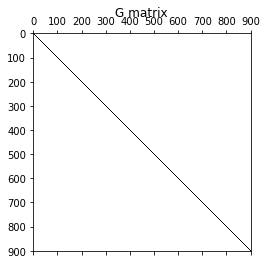

In [10]:
def create_Gmat2(nx,ny,Cmap):
    # create G matrix
    G = np.zeros((nx*ny,nx*ny))
    B = np.zeros((nx*ny,1))
    n = 0
    maxn = []
    for i in range(nx):
        for j in range(ny):
            n = map_back(i,j,nx,ny)
            if i == 0: # left wall
                G[n,:] = 0
                G[n,n] = 1
                B[n] = 1
            elif i == nx-1: # right wall
                G[n,:] = 0
                G[n,n] = 1

            elif j==0: # top
                nxm = n-ny
                nxp = n+ny
                nyp = n+1
                rxp = 0
                rxm = 0
                ryp = 0

                if(nxm > 0 and nxm < nx*ny):
                    rxm = (indexer(Cmap,n) + indexer(Cmap,nxm))/2
                    G[n,nxm] = rxm
                if(nxp > 0 and nxp < nx*ny):
                    rxp = (indexer(Cmap,n) + indexer(Cmap,nxp))/2
                    G[n,nxp] = rxp
                if(nyp > 0 and nyp < nx*ny):
                    ryp = (indexer(Cmap,n) + indexer(Cmap,nyp))/2
                    G[n,nyp] = ryp
                G[n,n] = -(rxm+rxp+ryp)


            elif j==ny: # bottom
                nxm = n-ny
                nxp = n+ny
                nym = n-1

                rxp = 0
                rxm = 0
                rym = 0

                if(nxm > 0 and nxm < nx*ny):
                    rxm = (indexer(Cmap,n) + indexer(Cmap,nxm))/2
                    G[n,nxm] = rxm
                if(nxp > 0 and nxp < nx*ny):
                    rxp = (indexer(Cmap,n) + indexer(Cmap,nxp))/2
                    G[n,nxp] = rxp
                if(nym > 0 and nym < nx*ny):
                    rym = (indexer(Cmap,n) + indexer(Cmap,nym))/2
                    G[n,nym] = rym
                G[n,n] = -(rxm+rxp+rym)

            else: # middle
                nxm = n-ny
                nxp = n+ny
                nym = n-1
                nyp = n+1

                if(nxm > 0 and nxm < nx*ny):
                    rxm = (indexer(Cmap,n) + indexer(Cmap,nxm))/2
                    G[n,nxm] = rxm
                if(nxp > 0 and nxp < nx*ny):
                    rxp = (indexer(Cmap,n) + indexer(Cmap,nxp))/2
                    G[n,nxp] = rxp
                if(nym > 0 and nym < nx*ny):
                    rym = (indexer(Cmap,n) + indexer(Cmap,nym))/2
                    G[n,nym] = rym
                if(nyp > 0 and nyp < nx*ny):
                    ryp = (indexer(Cmap,n) + indexer(Cmap,nyp))/2
                    G[n,nyp] = ryp
                G[n,n] = -(rxm+rxp+ryp+rym) 
    return G,B

G,B = create_Gmat2(nx,ny,Cmap)
plt.spy(G)
plt.title("G matrix");

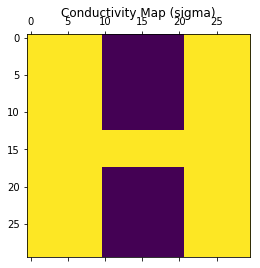

In [11]:
plt.matshow(Cmap);
plt.title("Conductivity Map (sigma)");

In [12]:
# create V vector from P matrix using mapping from slides
V = []
for i in range(nx*ny):
    V.append(indexer(Vmat,i))
V = np.array(V)

In [13]:
V = linalg.solve(G,B)

In [14]:
#map V back into P matrix
for i in range(nx*ny):
    indexer(Vmat,i,V[i])

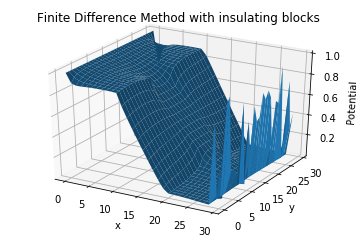

In [15]:
plt.ion()
x = np.arange(ny)
y = np.arange(nx)
X, Y = np.meshgrid(x, y)
fig2 = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,Vmat);
ax.set_title("Finite Difference Method with insulating blocks")
ax.set_zlabel("Potential")
ax.set_xlabel("x")
ax.set_ylabel("y");